# 7.15.(Ìôî)~

Î©îÏù∏


In [ ]:
# ================================================================
# [Colab] ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÏùÑ ÏúÑÌïú ÏµúÏ¢Ö ÏΩîÎìú (Ïù¥ ÏÖÄ ÌïòÎÇòÎßå Ïã§Ìñâ ÌõÑ, Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë)
# ================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÑ§ÏπòÌï©ÎãàÎã§.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë
# [Ï§ëÏöî!] Ïù¥ ÏÖÄÏùÑ Ïã§ÌñâÌïú ÌõÑÏóê, Colab Î©îÎâ¥ÏóêÏÑú [Îü∞ÌÉÄÏûÑ] -> [ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûë]ÏùÑ Î∞òÎìúÏãú Ïã§ÌñâÌï¥Ïïº Ìï©ÎãàÎã§.
#    ÏàòÎèôÏúºÎ°ú Ïû¨ÏãúÏûëÌïòÎäî Í≤ÉÏù¥ Í∞ÄÏû• ÌôïÏã§Ìï©ÎãàÎã§.
print("‚úÖ Ìè∞Ìä∏ ÏÑ§Ïπò Î∞è Ï∫êÏãú ÏÇ≠Ï†úÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
print("‚úÖ [Ï§ëÏöî] Colab Î©îÎâ¥ÏóêÏÑú [Îü∞ÌÉÄÏûÑ] -> [ÏÑ∏ÏÖò Îã§Ïãú ÏãúÏûë]ÏùÑ Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî!")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,916 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and dire

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# ‚ñ∂ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÌïòÍ∏∞
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] =False  # -1ÏùºÎïåÎèÑ ÌïúÍ∏Ä Ïïà Íπ®Ïßê

# ‚ñ∂ Warnings Ï†úÍ±∞
import warnings
warnings.filterwarnings('ignore')

# ‚ñ∂ Google drive mount or Ìè¥Îçî ÌÅ¥Î¶≠ ÌõÑ Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Í≤∞
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
null_id_enter_lesson_df=pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv',  parse_dates=['client_event_time'])
complete_signup_df=pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.signup.csv',  parse_dates=['client_event_time'])


fingerprint_cols= ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

attributed_df = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'client_event_time', 'event_type', 'content.id']], # `user_id`Îäî nullÏù¥ÎØÄÎ°ú ÌïÑÏöî ÏóÜÏùå
    complete_signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_non_member', '_signup')
)

attributed_df = attributed_df[attributed_df['client_event_time_non_member'] < attributed_df['client_event_time_signup']].copy()

# 4-2. ÏãúÍ∞Ñ Ï∞®Ïù¥ Í≥ÑÏÇ∞
attributed_df['time_diff'] = attributed_df['client_event_time_signup'] - attributed_df['client_event_time_non_member']

# 4-3. Í∞ÄÏû• Í∞ÄÎä•ÏÑ± ÎÜíÏùÄ Í∏∞Î°ù ÏÑ†ÌÉù (drop_duplicates)
attributed_df.sort_values(by='time_diff', ascending=True, inplace=True)
final_attributed_signups = attributed_df.drop_duplicates(subset=['user_id', 'client_event_time_signup'], keep='first')

# 5. ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏
print("--- ÎπÑÌöåÏõê Ïú†ÏûÖÍ≤ΩÎ°ú Î∞è ÏΩòÌÖêÏ∏† Î∂ÑÏÑù Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú) ---")
final_report = final_attributed_signups[['user_id', 'client_event_time_signup', 'content.id', 'time_diff']]
print(final_report.head(10))

print("\n--- ÌöåÏõêÍ∞ÄÏûÖ Í∏∞Ïó¨ÎèÑÍ∞Ä ÎÜíÏùÄ ÏΩòÌÖêÏ∏† Top 10 ---")
print(final_attributed_signups['content.id'].value_counts().head(10))

--- ÎπÑÌöåÏõê Ïú†ÏûÖÍ≤ΩÎ°ú Î∞è ÏΩòÌÖêÏ∏† Î∂ÑÏÑù Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú) ---
                                 user_id client_event_time_signup  \
140586  d000f604aac53070b9b0df9f2d8d6177  2023-09-01 04:35:04.020   
66455   e4e9fbb61644f072ea9305cf0590455b  2023-07-14 03:19:42.991   
222582  7e7d9bd1c47054c9b8e5f64492cb52d2  2023-07-07 07:09:47.286   
154358  d52040dc20f06bca0b69862c5f2f3e63  2023-08-01 07:36:10.924   
198657  0c5f3781949a6cbdbe258f9e55a76788  2023-08-30 06:37:17.527   
252975  640c54b3fa2a027281efaee6090ec54f  2023-11-15 10:24:48.514   
43947   bd2e9d9a66c87eecc93e5e6e96b396b1  2023-07-14 08:41:49.758   
195559  010a8eaf07235ab145f9e022a35879f3  2023-08-14 01:03:09.183   
160144  3268e69be9f693f08ace9ef5f630ae00  2023-08-01 11:44:57.118   
156167  dc3837abed36421a01b02e1b482401dd  2023-09-20 13:16:01.186   

                              content.id              time_diff  
140586  ca35d0138a7550f002f975310604a9b7 0 days 00:00:00.040000  
66455   b314d5aba64a0aab40602cb72a

In [ ]:
import sys

# Google Colab ÌôòÍ≤ΩÏóêÏÑú Ïã§Ìñâ Ï§ëÏù∏ÏßÄ ÌôïÏù∏
if 'google.colab' in sys.modules:
    # debconfÎ•º Noninteractive Î™®ÎìúÎ°ú ÏÑ§Ï†ï
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§Ïπò
    !sudo apt-get -qq -y install fonts-nanum

    # MatplotlibÏùò Ìè∞Ìä∏ Îß§ÎãàÏ†Ä Í∞ÄÏ†∏Ïò§Í∏∞
    import matplotlib.font_manager as fm

    # ÎÇòÎàî Ìè∞Ìä∏Ïùò ÏãúÏä§ÌÖú Í≤ΩÎ°ú Ï∞æÍ∏∞
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # Ï∞æÏùÄ Í∞Å ÎÇòÎàî Ìè∞Ìä∏Î•º Matplotlib Ìè∞Ìä∏ Îß§ÎãàÏ†ÄÏóê Ï∂îÍ∞Ä
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

---ÎπÑÌöåÏõê Ï≤¥Ìóò ÏΩòÌÖêÏ∏†Ïùò Ï≤´ Îì±Ïû•ÏùºÏùÑ  Í≥ÑÏÇ∞Ìï©ÎãàÎã§---
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
Í∞ÄÏûÖ Ï†Ñ 14Ïùº Ïù¥ÎÇ¥ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† Í∞ÄÏûÖÌïú ÎπÑÌöåÏõê ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: 2728 Í∞ú
Í∞ÄÏûÖ Ï†Ñ 30Ïùº Ïù¥ÎÇ¥ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† Í∞ÄÏûÖÌïú ÎπÑÌöåÏõê ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: 6218 Í∞ú
Í∞ÄÏûÖ Ï†Ñ 60Ïùº Ïù¥ÎÇ¥ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† Í∞ÄÏûÖÌïú ÎπÑÌöåÏõê ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: 9452 Í∞ú
ÎπÑÌöåÏõêÏù¥ Í∞ÄÏûÖ Ï†Ñ  Î≥∏ ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: 194936 Í∞ú
‚úÖ 1Îã®Í≥Ñ: Í≥†Ïú†Ìïú ÏùºÏùº ÏÇ¨Ïö©Ïûê(date + fingerprint) ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ™®Î•º Îã§Ïãú Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
---14Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: 2474Î™Ö---
---30Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: 4669Î™Ö---
---60Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: 8682Î™Ö-

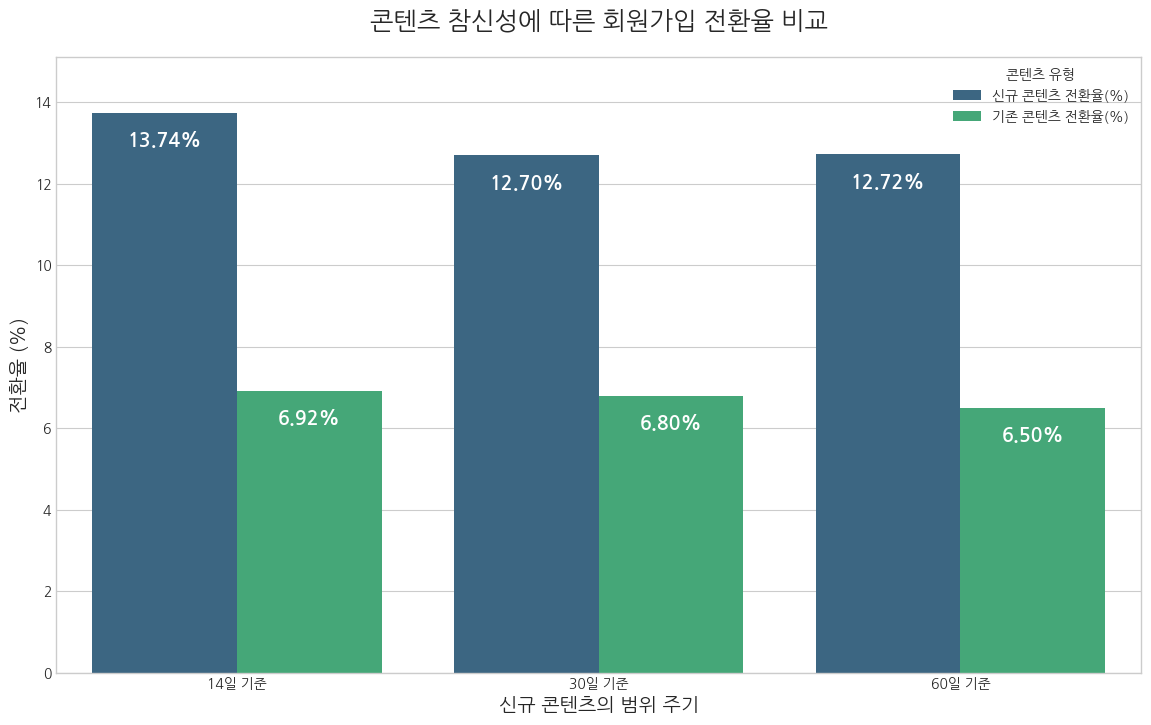

In [ ]:
import pandas as pd

null_id_enter_lesson_df = pd.read_csv(
    '/content/drive/MyDrive/codeit/Colab Notebooks/project2/null_id_enter_lesson.csv',
    parse_dates=['client_event_time'])

print(f"---ÎπÑÌöåÏõê Ï≤¥Ìóò ÏΩòÌÖêÏ∏†Ïùò Ï≤´ Îì±Ïû•ÏùºÏùÑ  Í≥ÑÏÇ∞Ìï©ÎãàÎã§---")
# 1. [ÌïµÏã¨] 'content.id'Î°ú Í∑∏Î£πÌôîÌïòÏó¨, Í∞Å Í∑∏Î£πÎ≥Ñ 'client_event_time'Ïùò ÏµúÏÜüÍ∞í(Í∞ÄÏû• Ïò§ÎûòÎêú ÏãúÍ∞Ñ)
null_id_first_seen_series = null_id_enter_lesson_df.groupby('content.id')['client_event_time'].min()

# 2. Í≤∞Í≥º Ïù¥Î¶Ñ(name)ÏùÑ ÏßÄÏ†ïÌïòÏó¨ SeriesÏùò ÏùòÎØ∏Î•º Î™ÖÌôïÌôî
null_id_first_seen_series.name = 'first_seen_by_non_member'

# 3. ÎπÑÌöåÏõê ÏóîÌÑ∞Î†àÏä® ÌéòÏù¥ÏßÄÏôÄ ÏΩòÌÖêÏ∏† ÏïÑÏù¥ÎîîÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï≤´Î≤àÏß∏ Îì±Ïû•Ìïú ÏãúÍ∞ÑÏùÑ Î∂ôÏûÑ
merged_null_id_df = pd.merge(null_id_enter_lesson_df, null_id_first_seen_series, left_on='content.id', right_index=True, how='left')

# 4.  ÏóîÌÑ∞Î†àÏä® ÏßÑÏûÖ ÏãúÍ∞ÑÍ≥º ÏΩòÌÖêÏ∏† Ï∂úÏãú ÏãúÍ∞Ñ(ÎπÑÌöåÏõê)Ïùò Ï∞®Ïù¥ Í≥ÑÏÇ∞, Îü∞Ïπò Ïù¥ÌõÑ Î™áÏùºÏß∏Ïù∏ÏßÄ ÏïåÎ†§Ï£ºÎäî Ïª¨Îüº ÏÉùÏÑ±
merged_null_id_df['days_since_launch'] = (merged_null_id_df['client_event_time'] - merged_null_id_df['first_seen_by_non_member']).dt.days

# 5-1.  Ï∂úÏãú ÌõÑ 14Ïùº(2Ï£º) Ïù¥ÎÇ¥Ïóê ÏãúÏ≤≠Îêú Í∏∞Î°ùÎßå ÌïÑÌÑ∞ÎßÅ
non_member_14logs_df = merged_null_id_df[merged_null_id_df['days_since_launch'] <= 14].copy()
# 5-2. Ï∂úÏãú ÌõÑ 30Ïùº(1Í∞úÏõî) Ïù¥ÎÇ¥Ïóê ÏãúÏ≤≠Îêú Í∏∞Î°ùÎßå ÌïÑÌÑ∞ÎßÅ
non_member_30logs_df = merged_null_id_df[merged_null_id_df['days_since_launch'] <= 30].copy()
#  5-3.  Ï∂úÏãú ÌõÑ 60Ïùº(2Í∞úÏõî) Ïù¥ÎÇ¥Ïóê ÏãúÏ≤≠Îêú Í∏∞Î°ùÎßå ÌïÑÌÑ∞ÎßÅ
non_member_60logs_df = merged_null_id_df[merged_null_id_df['days_since_launch'] <= 60].copy()

# 6. ÎπÑÌöåÏõê Îç∞Ïù¥ÌÑ∞Ïùò Ïã†Í∑ú ÏΩòÌÖêÏ∏†(Ï∂úÏãú 14Ïùº, 30Ïùº, 60Ïùº Ï†ëÍ∑º) Î°úÍ∑∏Ïàò ÌôïÏù∏
non_member_14log_count = len(non_member_14logs_df)
non_member_30log_count = len(non_member_30logs_df)
non_member_60log_count = len(non_member_60logs_df)
total_non_member_log_count = len(null_id_enter_lesson_df)

# 7. ÎπÑÌöåÏõê Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Ï†ëÍ∑º Î°úÍ∑∏Ïàò ÌôïÏù∏
non_member_14log_out_count = total_non_member_log_count-non_member_14log_count
non_member_30log_out_count = total_non_member_log_count-non_member_30log_count
non_member_60log_out_count = total_non_member_log_count-non_member_60log_count

# 8. ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£åÌïú ÎÇ† Í∏∞Ï§Ä ÎπÑÌöåÏõê Ï†ëÍ∑º ÏµúÏã† ÏΩòÌÖêÏ∏†(Ï∂úÏãú 14Ïùº Ïù¥ÎÇ¥, 30Ïùº Ïù¥ÎÇ¥, 60Ïùº Ïù¥ÎÇ¥)Ïùò Ïñë
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']
key_cols = ['date'] + fingerprint_cols

null_id_enter_lesson_df['fingerprint'] = null_id_enter_lesson_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
null_id_enter_lesson_df['date'] = null_id_enter_lesson_df['client_event_time'].dt.date

complete_signup_df['fingerprint'] = complete_signup_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
complete_signup_df['date'] = complete_signup_df['client_event_time'].dt.date

non_member_14logs_df['fingerprint'] = non_member_14logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_14logs_df['date'] = non_member_14logs_df['client_event_time'].dt.date

non_member_30logs_df['fingerprint'] = non_member_30logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_30logs_df['date'] = non_member_30logs_df['client_event_time'].dt.date

non_member_60logs_df['fingerprint'] = non_member_60logs_df[fingerprint_cols].astype(str).agg('_'.join, axis=1)
non_member_60logs_df['date'] = non_member_60logs_df['client_event_time'].dt.date


days_14merge_df = pd.merge(
    non_member_14logs_df, complete_signup_df[key_cols].drop_duplicates(), # Î†àÏä® ÌéòÏù¥ÏßÄ Í∏∞Ï§Ä ÌÇ§Î°ú Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ ÏÇ¨Ïö©
    on=key_cols,
    how='inner'
)

days_30merge_df = pd.merge(
    non_member_30logs_df, complete_signup_df[key_cols].drop_duplicates(), # Î†àÏä® ÌéòÏù¥ÏßÄ Í∏∞Ï§Ä ÌÇ§Î°ú Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ ÏÇ¨Ïö©
    on=key_cols,
    how='inner'
)

days_60merge_df = pd.merge(
    non_member_60logs_df, complete_signup_df[key_cols].drop_duplicates(), # Î†àÏä® ÌéòÏù¥ÏßÄ Í∏∞Ï§Ä ÌÇ§Î°ú Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ ÏÇ¨Ïö©
    on=key_cols,
    how='inner'
)

all_days_merge_df = pd.merge(
    null_id_enter_lesson_df, complete_signup_df[key_cols].drop_duplicates(), # Î†àÏä® ÌéòÏù¥ÏßÄ Í∏∞Ï§Ä ÌÇ§Î°ú Ï§ëÎ≥µ Ï†úÍ±∞ ÌõÑ ÏÇ¨Ïö©
    on=key_cols,
    how='inner'
)

# 9. ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£åÌïú ÎÇ† Í∏∞Ï§Ä ÎπÑÌöåÏõê Ï†ëÍ∑º Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†(Ï∂úÏãú 14Ïùº, 30Ïùº, 60Ïùº Ïù¥ÎÇ¥)Ïùò Ïñë
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")
print(f"Í∞ÄÏûÖ Ï†Ñ 14Ïùº Ïù¥ÎÇ¥ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† Í∞ÄÏûÖÌïú ÎπÑÌöåÏõê ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: {len(days_14merge_df)} Í∞ú")
print(f"Í∞ÄÏûÖ Ï†Ñ 30Ïùº Ïù¥ÎÇ¥ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† Í∞ÄÏûÖÌïú ÎπÑÌöåÏõê ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: {len(days_30merge_df)} Í∞ú")
print(f"Í∞ÄÏûÖ Ï†Ñ 60Ïùº Ïù¥ÎÇ¥ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† Í∞ÄÏûÖÌïú ÎπÑÌöåÏõê ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: {len(days_60merge_df)} Í∞ú")
print(f"ÎπÑÌöåÏõêÏù¥ Í∞ÄÏûÖ Ï†Ñ  Î≥∏ ÏΩòÌÖêÏ∏† Î°úÍ∑∏Ïàò: {len(all_days_merge_df)} Í∞ú")


# 10.  Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Í≥†Ïú† ÏùºÏùº ÏÇ¨Ïö©Ïûê Ïàò)' Ï§ëÎ≥µ Ï†úÍ±∞)
print("‚úÖ 1Îã®Í≥Ñ: Í≥†Ïú†Ìïú ÏùºÏùº ÏÇ¨Ïö©Ïûê(date + fingerprint) ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ™®Î•º Îã§Ïãú Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# [ÏàòÏ†ï] Í≥†Ïú†Ìïú (date, fingerprint) Ï°∞Ìï©Ïùò Í∞úÏàòÎ•º Ï†ïÌôïÌïòÍ≤å Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# Ïã†Í∑ú Í∑∏Î£π
unique_new_14 = len(non_member_14logs_df[['date', 'fingerprint']].drop_duplicates())
unique_new_30 = len(non_member_30logs_df[['date', 'fingerprint']].drop_duplicates())
unique_new_60 = len(non_member_60logs_df[['date', 'fingerprint']].drop_duplicates())

print(f"---14Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: {unique_new_14}Î™Ö---")
print(f"---30Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: {unique_new_30}Î™Ö---")
print(f"---60Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: {unique_new_60}Î™Ö---")

# Í∏∞Ï°¥ Í∑∏Î£π
all_non_member_sessions = set(map(tuple, null_id_enter_lesson_df[['date', 'fingerprint']].drop_duplicates().values))
new_14_sessions = set(map(tuple, non_member_14logs_df[['date', 'fingerprint']].drop_duplicates().values))
new_30_sessions = set(map(tuple, non_member_30logs_df[['date', 'fingerprint']].drop_duplicates().values))
new_60_sessions = set(map(tuple, non_member_60logs_df[['date', 'fingerprint']].drop_duplicates().values))

unique_old_14 = len(all_non_member_sessions - new_14_sessions)
unique_old_30 = len(all_non_member_sessions - new_30_sessions)
unique_old_60 = len(all_non_member_sessions - new_60_sessions)

print(f"---14Ïùº ÎÇ¥ Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: {unique_old_14}Î™Ö---")
print(f"---30Ïùº ÎÇ¥ Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: {unique_old_30}Î™Ö---")
print(f"---60Ïùº ÎÇ¥ Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Î•º Î≥∏ Ï†ÑÏ≤¥ ÏÇ¨Ïö©ÏûêÏàò: {unique_old_60}Î™Ö---")

# 11. Í∞Å Í∑∏Î£πÏùò 'Í∞ÄÏûÖ Ï†ÑÌôò ÏÇ¨Ïö©Ïûê Ïàò' Ïû¨Í≥ÑÏÇ∞
print("‚úÖ 2Îã®Í≥Ñ: Í∞ÄÏûÖÏúºÎ°ú Ï†ÑÌôòÎêú Í≥†Ïú†Ìïú ÏùºÏùº ÏÇ¨Ïö©Ïûê ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÏûêÎ•º Îã§Ïãú Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# =======Í∞ÄÏûÖÏúºÎ°ú Ï†ÑÌôòÎêú Í≥†Ïú†Ìïú (date, fingerprint) Ï°∞Ìï©Ïùò Í∞úÏàò Í≥ÑÏÇ∞
#========Ïã†Í∑ú Í∑∏Î£π (Í∞ÄÏûÖ Ï†ÑÌôò)
conversions_new_14 = len(days_14merge_df[['date', 'fingerprint']].drop_duplicates())
conversions_new_30 = len(days_30merge_df[['date', 'fingerprint']].drop_duplicates())
conversions_new_60 = len(days_60merge_df[['date', 'fingerprint']].drop_duplicates())

print(f"---14Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Í∞ÄÏûÖ Ï†ÑÌôò ÏÇ¨Ïö©ÏûêÏàò: {conversions_new_14}Î™Ö---")
print(f"---30Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Í∞ÄÏûÖ Ï†ÑÌôò ÏÇ¨Ïö©ÏûêÏàò: {conversions_new_30}Î™Ö---")
print(f"---60Ïùº ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Î•º Î≥∏ Í∞ÄÏûÖ Ï†ÑÌôò ÏÇ¨Ïö©ÏûêÏàò: {conversions_new_60}Î™Ö---")


# Í∏∞Ï°¥ Í∑∏Î£π (Í∞ÄÏûÖ Ï†ÑÌôò)
all_converted_sessions = set(map(tuple, all_days_merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_14_sessions = set(map(tuple, days_14merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_30_sessions = set(map(tuple, days_30merge_df[['date', 'fingerprint']].drop_duplicates().values))
converted_new_60_sessions = set(map(tuple, days_60merge_df[['date', 'fingerprint']].drop_duplicates().values))

conversions_old_14 = len(all_converted_sessions - converted_new_14_sessions)
conversions_old_30 = len(all_converted_sessions - converted_new_30_sessions)
conversions_old_60 = len(all_converted_sessions - converted_new_60_sessions)

print(f"---14Ïùº ÎÇ¥ Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Î•º Î≥∏ Í∞ÄÏûÖ Ï†ÑÌôò ÏÇ¨Ïö©ÏûêÏàò: {conversions_old_14}Î™Ö---")
print(f"---30Ïùº ÎÇ¥ Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Î•º Î≥∏ Í∞ÄÏûÖ Ï†ÑÌôò ÏÇ¨Ïö©ÏûêÏàò: {conversions_old_30}Î™Ö---")
print(f"---60Ïùº ÎÇ¥ Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Î•º Î≥∏ Í∞ÄÏûÖ Ï†ÑÌôò ÏÇ¨Ïö©ÏûêÏàò: {conversions_old_60}Î™Ö---")


# 12.  'Í≥†Ïú† ÏÇ¨Ïö©Ïûê' Í∏∞Ï§Ä Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("\n\n---Í≥†Ïú† ÏÇ¨Ïö©Ïûê Í∏∞Ï§Ä Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ ---")

# Í∞Å Í∑∏Î£πÏùò Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
conv_rate_new_14_user = (conversions_new_14 / unique_new_14 * 100) if unique_new_14 > 0 else 0
conv_rate_old_14_user = (conversions_old_14 / unique_old_14 * 100) if unique_old_14 > 0 else 0

conv_rate_new_30_user = (conversions_new_30 / unique_new_30 * 100) if unique_new_30 > 0 else 0
conv_rate_old_30_user = (conversions_old_30 / unique_old_30 * 100) if unique_old_30 > 0 else 0

conv_rate_new_60_user = (conversions_new_60 / unique_new_60 * 100) if unique_new_60 > 0 else 0
conv_rate_old_60_user = (conversions_old_60 / unique_old_60 * 100) if unique_old_60 > 0 else 0

# 13.  Í≤∞Í≥ºÎ•º Î≥¥Í∏∞ Ï¢ãÏùÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
conversion_data_user = {
    'Ïã†Í∑ú ÏΩòÌÖêÏ∏† Ï†ÑÌôòÏú®(%)': [conv_rate_new_14_user, conv_rate_new_30_user, conv_rate_new_60_user],
    'Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Ï†ÑÌôòÏú®(%)': [conv_rate_old_14_user, conv_rate_old_30_user, conv_rate_old_60_user]
}
conversion_df_user = pd.DataFrame(conversion_data_user, index=['14Ïùº Í∏∞Ï§Ä', '30Ïùº Í∏∞Ï§Ä', '60Ïùº Í∏∞Ï§Ä'])

print(conversion_df_user.round(2))

# -------------------- 14. ÏãúÍ∞ÅÌôî (ÏóÖÍ∑∏Î†àÏù¥Îìú Î≤ÑÏ†Ñ) --------------------
print("\n\n--- Ï†ÑÌôòÏú® ÏãúÍ∞ÅÌôî (ÏóÖÍ∑∏Î†àÏù¥Îìú) ---")

plt.style.use('seaborn-v0_8-whitegrid') # Îçî ÍπîÎÅîÌïú Ïä§ÌÉÄÏùº Ï†ÅÏö©
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# [ÏàòÏ†ï 1] ax Í∞ùÏ≤¥Î•º Î®ºÏ†Ä ÎßåÎì§Ïñ¥ÏÑú Îçî ÏÑ∏Î∞ÄÌïòÍ≤å Ï†úÏñ¥Ìï©ÎãàÎã§.
fig, ax = plt.subplots(figsize=(14, 8))

# pandasÏùò plot ÎåÄÏã†, seabornÏùò barplotÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îçî ÏòàÏÅú ÏÉâÏÉÅÍ≥º Î≤îÎ°Ä Í¥ÄÎ¶¨Î•º Ìï©ÎãàÎã§.
# Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÏóê Ïö©Ïù¥Ìïú 'long-form' ÌòïÌÉúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
plot_df = conversion_df_user.reset_index().melt(
    id_vars='index',
    var_name='ÏΩòÌÖêÏ∏† Ïú†Ìòï',
    value_name='Ï†ÑÌôòÏú®(%)'
)
plot_df.rename(columns={'index': 'Ïã†Í∑ú ÏΩòÌÖêÏ∏† Ï†ïÏùò Í∏∞Ï§Ä'}, inplace=True)

sns.barplot(data=plot_df, x='Ïã†Í∑ú ÏΩòÌÖêÏ∏† Ï†ïÏùò Í∏∞Ï§Ä', y='Ï†ÑÌôòÏú®(%)', hue='ÏΩòÌÖêÏ∏† Ïú†Ìòï', ax=ax, palette='viridis')


# [ÏàòÏ†ï 2] Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞íÏùÑ 'Ï†ïÏ§ëÏïô'Ïóê, 'ÌÅ¨Í≥† ÍµµÍ≤å' ÌëúÏãúÌï©ÎãàÎã§.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',                       # ÌëúÏãúÌï† ÌÖçÏä§Ìä∏ (ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨)
                (p.get_x() + p.get_width() / 2., p.get_height()),    # ÌÖçÏä§Ìä∏ ÏúÑÏπò (ÎßâÎåÄ ÏÉÅÎã® Ï§ëÏïô)
                ha='center', va='center',                       # Ï†ïÎ†¨
                xytext=(0, -20),                                # ÎßâÎåÄ ÏïàÏ™ΩÏúºÎ°ú 20Ìè¨Ïù∏Ìä∏ ÎÇ¥Î¶º
                textcoords='offset points',
                fontsize=14,                                    # Ìè∞Ìä∏ ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä
                weight='bold',                                  # Ìè∞Ìä∏ ÍµµÍ≤å
                color='white')                                  # Ìè∞Ìä∏ ÏÉâÏÉÅ Ìù∞ÏÉâ


# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
ax.set_title('ÏΩòÌÖêÏ∏† Ï∞∏Ïã†ÏÑ±Ïóê Îî∞Î•∏ ÌöåÏõêÍ∞ÄÏûÖ Ï†ÑÌôòÏú® ÎπÑÍµê', fontsize=18, pad=20)
ax.set_xlabel('Ïã†Í∑ú ÏΩòÌÖêÏ∏†Ïùò Î≤îÏúÑ Ï£ºÍ∏∞', fontsize=14)
ax.set_ylabel('Ï†ÑÌôòÏú® (%)', fontsize=14)

# YÏ∂ï Î≤îÏúÑÎ•º Îç∞Ïù¥ÌÑ∞Î≥¥Îã§ ÎÑâÎÑâÌïòÍ≤å ÏÑ§Ï†ï
ax.set_ylim(0, plot_df['Ï†ÑÌôòÏú®(%)'].max() * 1.1)

plt.show()

## a/b ÌÖåÏä§Ìä∏ Í≥ÑÌöç


In [ ]:
import pandas as pd


null_id_enter_main_page_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/unique_null_enter_page.csv', parse_dates=['client_event_time'])
null_id_signup_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/unique_null_signup_page.csv', parse_dates=['client_event_time'])
# -------------------- 0Îã®Í≥Ñ: 'Ï†ÑÏ≤¥ ÎπÑÌöåÏõê ÏÑ∏ÏÖò' Ï†ïÏùò (Í∞ÄÏû• Î®ºÏ†Ä Ïã§Ìñâ) --------------------
print("‚úÖ 0Îã®Í≥Ñ: Î∂ÑÏÑùÏùò Í∏∞Ï§ÄÏù¥ Îê† 'Ï†ÑÏ≤¥ ÎπÑÌöåÏõê ÏÑ∏ÏÖò'ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...")

fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

# Ï†ÑÏ≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïú Î™®Îì† DF Î¶¨Ïä§Ìä∏
dfs_to_process = [
    null_id_enter_lesson_df,
    null_id_enter_main_page_df,
    null_id_signup_df,
    complete_signup_df
]

for df in dfs_to_process:
    # Ïù¥ÎØ∏ Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÎ©¥ Í±¥ÎÑàÎõ∞ÎèÑÎ°ù Î∞©Ïñ¥ ÏΩîÎìúÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.
    if 'fingerprint' not in df.columns:
        df['fingerprint'] = df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
    if 'date' not in df.columns:
        df['date'] = df['client_event_time'].dt.date

# ÎπÑÌöåÏõê ÌôúÎèôÏù¥ Í∏∞Î°ùÎêú Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÏùò Î¶¨Ïä§Ìä∏Ïóê Îã¥ÏäµÎãàÎã§.
all_non_member_logs_list = [
    null_id_enter_lesson_df,
    null_id_enter_main_page_df,
    null_id_signup_df
]

# pd.concat()ÏúºÎ°ú Î™®Îì† Î°úÍ∑∏Î•º ÌïòÎÇòÏùò Í±∞ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©Ïπ©ÎãàÎã§.
all_non_member_logs_df = pd.concat(all_non_member_logs_list, ignore_index=True)

# Ìï©Ï≥êÏßÑ Ï†ÑÏ≤¥ Î°úÍ∑∏ÏóêÏÑú, Í≥†Ïú†Ìïú 'ÏùºÏùº ÏÇ¨Ïö©Ïûê ÏÑ∏ÏÖò(date + fingerprint)'ÏùÑ Ï∂îÏ∂úÌï©ÎãàÎã§.
all_non_member_act = set(map(tuple, all_non_member_logs_df[['date', 'fingerprint']].drop_duplicates().values))

print(f"  - Ï¥ù {len(all_non_member_act):,}Í∞úÏùò Í≥†Ïú†Ìïú Ï†ÑÏ≤¥ ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ Ï†ïÏùòÌñàÏäµÎãàÎã§.")

complete_signup_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.signup.csv', parse_dates=['client_event_time'])
complete_signup_df.info()
complete_signup_df.head(10)
unique_complete_signup = complete_signup_df['user_id'].nunique()

print(f"  - Ï¥ù {(unique_complete_signup):,}Í∞úÏùò Í≥†Ïú†Ìïú Ï†ÑÏ≤¥ ÌöåÏõê ÏÑ∏ÏÖòÏùÑ Ï†ïÏùòÌñàÏäµÎãàÎã§.")
# -------------------- 1Îã®Í≥Ñ: 'ÌòÑÏû¨ ÏÉÅÌÉú' Í≥ÑÏÇ∞ --------------------


print("‚úÖ 1Îã®Í≥Ñ: ÌòÑÏû¨Ïùò Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

total_sessions = len(all_non_member_act)
total_conversions = unique_complete_signup
current_total_conversion_rate = (total_conversions / total_sessions * 100) if total_sessions > 0 else 0

print(f"  - Ï†ÑÏ≤¥ ÎπÑÌöåÏõê ÏÑ∏ÏÖò Ïàò: {total_sessions:,}")
print(f"  - Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôò Ïàò: {total_conversions:,}")
print(f"  - ÌòÑÏû¨ Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôòÏú®: {current_total_conversion_rate:.2f}%")


# -------------------- 2Îã®Í≥Ñ & 3Îã®Í≥Ñ: 'Í∞úÏÑ† Ïû†Ïû¨Î†•' Î∞è 'Í∏∞ÎåÄ Ï†ÑÌôòÏú®' ÏÑ§Ï†ï --------------------
print("\n‚úÖ 2Îã®Í≥Ñ & 3Îã®Í≥Ñ: Í∞úÏÑ† Ïû†Ïû¨Î†• Î∞è Í∏∞ÎåÄ Ï†ÑÌôòÏú®ÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§...")

# [2Îã®Í≥Ñ] A/B ÌÖåÏä§Ìä∏Ïùò ÏòÅÌñ•ÏùÑ Î∞õÏùÑ Í∑∏Î£πÏùÄ 'Ïã†Í∑ú ÏΩòÌÖêÏ∏† Í≤ΩÌóò Í∑∏Î£π'ÏûÖÎãàÎã§.
#         Ïö∞Î¶¨Îäî Ïù¥ Í∑∏Î£πÏùò ÏÑ±Í≥ºÎ•º 'Í∏∞Ï°¥ Í∑∏Î£π' ÏàòÏ§ÄÏóêÏÑú 'Ïã†Í∑ú Í∑∏Î£π' ÏàòÏ§ÄÏúºÎ°ú ÎÅåÏñ¥Ïò¨Î¶¨Î†§Í≥† Ìï©ÎãàÎã§.
#         Îî∞ÎùºÏÑú, Ïö∞Î¶¨Îäî 'Í∏∞Ï°¥ Í∑∏Î£π'Ïù¥ ÏñºÎßàÎÇò 'Ïã†Í∑ú Í∑∏Î£π'Ï≤òÎüº ÌñâÎèôÌïòÍ≤å Îê†ÏßÄÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.


all_non_member_sessions = set(map(tuple, null_id_enter_lesson_df[['date', 'fingerprint']].drop_duplicates().values))
old_only_sessions = all_non_member_sessions -new_14_sessions
old_only_session_count = len(old_only_sessions)

# [3Îã®Í≥Ñ] Ïù¥ 'Í∏∞Ï°¥ Í∑∏Î£π'Ïùò Ï†ÑÌôòÏú®Ïù¥, Ïã§Ìóò ÏÑ±Í≥µ Ïãú 'Ïã†Í∑ú Í∑∏Î£π'Ïùò Ï†ÑÌôòÏú® ÏàòÏ§ÄÏúºÎ°ú ÏÉÅÏäπÌïúÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
#         Ïù¥Í≤ÉÏù¥ Ïö∞Î¶¨Ïùò 'Í∏∞ÎåÄ Ï†ÑÌôòÏú®'ÏûÖÎãàÎã§.
baseline_rate = conv_rate_old_14_user / 100 # Í∏∞Ï°¥ Í∑∏Î£πÏùò ÌòÑÏû¨ Ï†ÑÌôòÏú®
target_rate = conv_rate_new_14_user / 100   # Ïã†Í∑ú Í∑∏Î£πÏùò Ï†ÑÌôòÏú® (Ïö∞Î¶¨Ïùò Î™©Ìëú)

print(f"  - Í∞úÏÑ† ÎåÄÏÉÅ Í∑∏Î£π ('Í∏∞Ï°¥' Í≤ΩÌóòÏûê) Í∑úÎ™®: {old_only_session_count:,} ÏÑ∏ÏÖò")
print(f"  - Ïù¥Îì§Ïùò ÌòÑÏû¨ Ï†ÑÌôòÏú® (Baseline): {baseline_rate:.2%}")
print(f"  - Ïã§Ìóò ÏÑ±Í≥µ Ïãú Í∏∞ÎåÄ Ï†ÑÌôòÏú® (Target): {target_rate:.2%}")


# -------------------- 4Îã®Í≥Ñ: 'Í∏∞ÎåÄ Ìö®Í≥º' ÏµúÏ¢Ö Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Í∏∞ÎåÄ Ìö®Í≥ºÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# ÌòÑÏû¨ 'Í∏∞Ï°¥ Í∑∏Î£π'Ïùò Í∞ÄÏûÖÏûê Ïàò
current_old_conversions = old_only_session_count * baseline_rate
# Ïã§Ìóò ÏÑ±Í≥µ Ïãú 'Í∏∞Ï°¥ Í∑∏Î£π'Ïùò Í∏∞ÎåÄ Í∞ÄÏûÖÏûê Ïàò
expected_old_conversions = old_only_session_count * target_rate
# ÏàúÏàòÌïòÍ≤å Ï¶ùÍ∞ÄÌïòÎäî Í∞ÄÏûÖÏûê Ïàò
net_increase_in_conversions = expected_old_conversions - current_old_conversions

# Ï†ÑÏ≤¥ Í∞ÄÏûÖÏûê ÏàòÏùò Í∏∞ÎåÄÏπò
expected_total_conversions = total_conversions + net_increase_in_conversions
# Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôòÏú®Ïùò Í∏∞ÎåÄÏπò
expected_total_conversion_rate = (expected_total_conversions / total_sessions * 100)

# ÏµúÏ¢ÖÏ†ÅÏù∏ 'Ï†ÑÌôòÏú® Ìñ•ÏÉÅÎ•†'
percentage_improvement = ((expected_total_conversion_rate - current_total_conversion_rate) / current_total_conversion_rate) * 100


print("\n\n=======================================================")
print("  [A/B ÌÖåÏä§Ìä∏ Í∏∞ÎåÄ Ìö®Í≥º ÏµúÏ¢Ö Î∂ÑÏÑù]")
print("=======================================================")
print(f"  - Ïã§Ìóò ÏÑ±Í≥µ Ïãú, ÏàúÏàò Ï¶ùÍ∞Ä Í∞ÄÏûÖÏûê Ïàò: {int(net_increase_in_conversions):,} Î™Ö")
print(f"  - Ïã§Ìóò ÌõÑ, Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Í∏∞ÎåÄÏπò: {expected_total_conversion_rate:.2f}%")
print("-------------------------------------------------------")
print(f"  >>> ÏµúÏ¢Ö Í∏∞ÎåÄ Ìö®Í≥º: Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ÏïΩ {percentage_improvement:.1f}% Ìñ•ÏÉÅ")
print("=======================================================")

‚úÖ 0Îã®Í≥Ñ: Î∂ÑÏÑùÏùò Í∏∞Ï§ÄÏù¥ Îê† 'Ï†ÑÏ≤¥ ÎπÑÌöåÏõê ÏÑ∏ÏÖò'ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...
  - Ï¥ù 859,243Í∞úÏùò Í≥†Ïú†Ìïú Ï†ÑÏ≤¥ ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ Ï†ïÏùòÌñàÏäµÎãàÎã§.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145133 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object      

‚úÖ 1Îã®Í≥Ñ: A/B ÌÖåÏä§Ìä∏ Í≤∞Í≥º ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§...

‚úÖ 2Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º ÏòàÏ∏° Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...


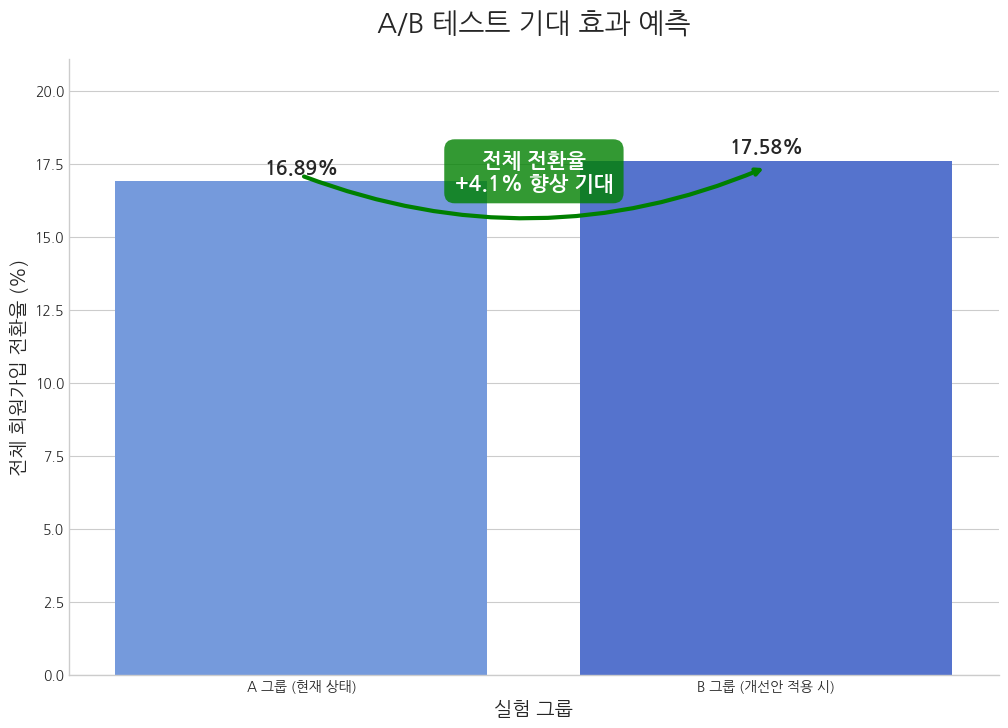

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- 1Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ --------------------
print("‚úÖ 1Îã®Í≥Ñ: A/B ÌÖåÏä§Ìä∏ Í≤∞Í≥º ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§...")

# [ÌïµÏã¨] ÎãπÏã†Ïù¥ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞Ìïú Ïã§Ï†ú Í∞íÎì§ÏùÑ Ïó¨Í∏∞Ïóê ÏûÖÎ†•Ìï©ÎãàÎã§.
current_total_conversion_rate = 16.89  # ÌòÑÏû¨ Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôòÏú®
expected_total_conversion_rate = 17.58 # Ïã§Ìóò ÏÑ±Í≥µ ÏãúÏùò Í∏∞ÎåÄ Ï†ÑÌôòÏú®
percentage_improvement = 4.1          # Í∏∞ÎåÄ ÏÉÅÏäπÌè≠ (%)

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
results_df = pd.DataFrame({
    'Group': ['A Í∑∏Î£π (ÌòÑÏû¨ ÏÉÅÌÉú)', 'B Í∑∏Î£π (Í∞úÏÑ†Ïïà Ï†ÅÏö© Ïãú)'],
    'Conversion Rate (%)': [current_total_conversion_rate, expected_total_conversion_rate]
})


# -------------------- 2Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º ÏòàÏ∏° Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º ÏòàÏ∏° Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('font', family='NanumGothic') # Colab ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False


fig, ax = plt.subplots(figsize=(12, 8))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
sns.barplot(data=results_df, x='Group', y='Conversion Rate (%)', palette=['cornflowerblue', 'royalblue'], ax=ax)

# Í∞Å ÎßâÎåÄ ÏúÑÏóê Ï†ÑÌôòÏú®(%) ÌëúÏãú
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=14, weight='bold')

# [ÌïµÏã¨] Îëê ÎßâÎåÄ ÏÇ¨Ïù¥Ïóê 'ÏÉÅÏäπÌè≠' Ï†ïÎ≥¥ Ï∂îÍ∞Ä
# ÌôîÏÇ¥Ìëú ÏãúÏûëÏ†êÍ≥º ÎÅùÏ†ê Ï¢åÌëú
x_start, y_start = 0, current_total_conversion_rate + 0.2
x_end, y_end = 1, expected_total_conversion_rate - 0.2

# ÌôîÏÇ¥ÌëúÏôÄ ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
ax.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start),
            arrowprops=dict(arrowstyle="->", color="green", lw=3, connectionstyle="arc3,rad=0.2"))

ax.text(0.5, (current_total_conversion_rate + expected_total_conversion_rate) / 2,
        f'Ï†ÑÏ≤¥ Ï†ÑÌôòÏú®\n{percentage_improvement:+.1f}% Ìñ•ÏÉÅ Í∏∞ÎåÄ',
        ha='center', va='center', fontsize=15, weight='bold', color='white',
        bbox=dict(boxstyle="round,pad=0.5", fc='green', ec='none', alpha=0.8))


# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
ax.set_title('A/B ÌÖåÏä§Ìä∏ Í∏∞ÎåÄ Ìö®Í≥º ÏòàÏ∏°', fontsize=20, pad=20)
ax.set_xlabel('Ïã§Ìóò Í∑∏Î£π', fontsize=14)
ax.set_ylabel('Ï†ÑÏ≤¥ ÌöåÏõêÍ∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=14)
ax.set_ylim(0, expected_total_conversion_rate * 1.2) # yÏ∂ï Î≤îÏúÑ ÎÑâÎÑâÌïòÍ≤å ÏÑ§Ï†ï
ax.spines[['top', 'right']].set_visible(False) # Ïò§Î•∏Ï™Ω, ÏúÑÏ™Ω ÌÖåÎëêÎ¶¨ Ï†úÍ±∞

plt.show()

In [ ]:
merged_null_id_df.head()

city       client_event_time      country  device_carrier device_family  \
0  NaN 2023-04-05 21:04:19.774  South Korea             NaN       Windows   
1  NaN 2023-04-05 21:16:34.067  South Korea             NaN       Windows   
2  NaN 2023-04-05 21:28:46.441  South Korea             NaN       Windows   
3  NaN 2023-04-05 21:36:06.042  South Korea             NaN       Windows   
4  NaN 2023-04-05 21:40:59.422  South Korea             NaN       Windows   

  device_type         event_type language os_name os_version platform  \
0     Windows  enter.lesson_page   Korean  Chrome  110.0.0.0      Web   
1     Windows  enter.lesson_page   Korean  Chrome  110.0.0.0      Web   
2     Windows  enter.lesson_page   Korean  Chrome  110.0.0.0      Web   
3     Windows  enter.lesson_page   Korean  Chrome  110.0.0.0      Web   
4     Windows  enter.lesson_page   Korean  Chrome  110.0.0.0      Web   

   user_id                        content.id is_trial  \
0      NaN  db1819d3a7a4c4d85dccb3b9e982fbcd    False   
1      NaN  8a72eed73d3f9d3ab1771548070e7338    False   
2      NaN  878bb38f14991c6ab57f3d7f5e456d75    False   
3      NaN  6c114626032aa4a43c62fd7fcdb19543    False   
4      NaN  db1819d3a7a4c4d85dccb3b9e982fbcd    False   

                          lesson.id is_free_trial first_seen_by_non_member  \
0  73ef28f4d72d40e571b5a3a3df826ef7           NaN  2022-01-02 08:11:15.155   
1  127a02f25f1872a98e46467e9a02a531           NaN  2022-01-01 04:56:14.466   
2  1a2aaeb4aad8991aed51e24e4b7c45de           NaN  2022-01-12 22:18:19.940   
3  5ba9d48917c21d8ad320b7a7e94b1f45           NaN  2022-01-08 08:55:51.107   
4  685c72776f4e9f3d1f61bcc81bc244f0           NaN  2022-01-02 08:11:15.155   

   days_since_launch  
0              458.0  
1              459.0  
2              447.0  
3              452.0  
4              458.0

Ïã†Í∑ú ÏΩòÌÖêÏ∏†Ïùò Í∞ÄÏûÖ Ï†ÑÌôòÎ•† Í∑∏ÎûòÌîÑ

‚úÖ [Ï†ÑÏ≤òÎ¶¨] Îç∞Ïù¥ÌÑ∞Ïóê 'ÎîîÏßÄÌÑ∏ ÏßÄÎ¨∏'ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...
‚úÖ 1Îã®Í≥Ñ: ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê 'Ï∂úÏãú ÌõÑ Í≤ΩÍ≥ºÏùº' Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: Ï∂úÏãú ÌõÑ Í≤ΩÍ≥ºÏùºÎ≥Ñ 'Ï†ÑÏ≤¥ Í≤ΩÌóòÏûê Ïàò(Î∂ÑÎ™®)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ 3Îã®Í≥Ñ: Ï∂úÏãú ÌõÑ Í≤ΩÍ≥ºÏùºÎ≥Ñ 'Í∞ÄÏûÖ Ï†ÑÌôòÏûê Ïàò(Î∂ÑÏûê)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...


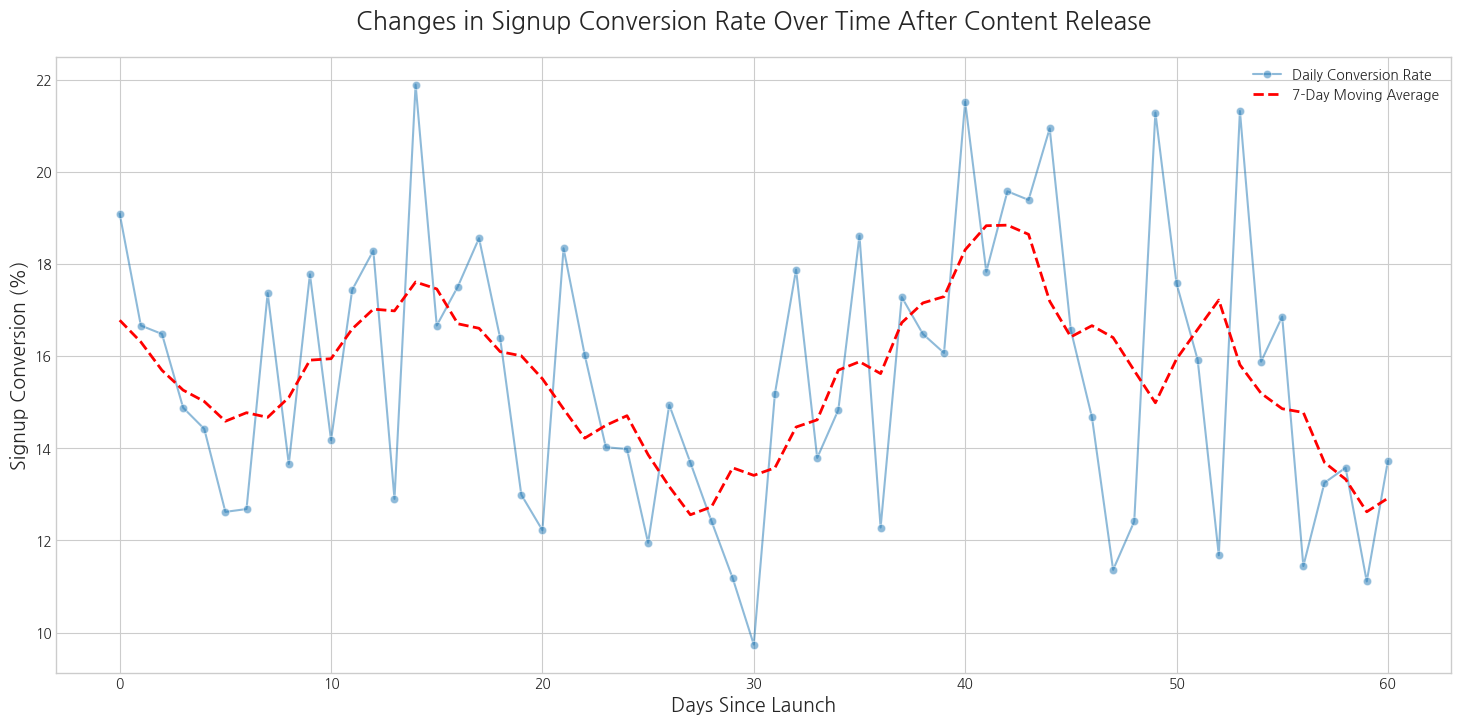

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- [Ï†ÑÏ≤òÎ¶¨] Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÏßÄÎ¨∏ ÏÉùÏÑ± --------------------
print("‚úÖ [Ï†ÑÏ≤òÎ¶¨] Îç∞Ïù¥ÌÑ∞Ïóê 'ÎîîÏßÄÌÑ∏ ÏßÄÎ¨∏'ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...")

# ÏõêÎ≥∏ÏùÑ Î≥µÏÇ¨ÌïòÏó¨ ÏïàÏ†ÑÌïòÍ≤å ÏûëÏóÖ
non_member_df = null_id_enter_lesson_df.copy()
signup_df = complete_signup_df.copy()

fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

non_member_df['fingerprint'] = non_member_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
non_member_df['date'] = non_member_df['client_event_time'].dt.date

signup_df['fingerprint'] = signup_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
signup_df['date'] = signup_df['client_event_time'].dt.date


# -------------------- 1Îã®Í≥Ñ: ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê 'Ï∂úÏãú ÌõÑ Í≤ΩÍ≥ºÏùº' Ï†ïÎ≥¥ Ï∂îÍ∞Ä --------------------
print("‚úÖ 1Îã®Í≥Ñ: ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê 'Ï∂úÏãú ÌõÑ Í≤ΩÍ≥ºÏùº' Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌï©ÎãàÎã§...")
# Ïù¥ Îã®Í≥ÑÏóêÏÑú merged_dfÍ∞Ä ÏÉùÏÑ±Îê©ÎãàÎã§.
merged_df = pd.merge(
    non_member_df,
    null_id_first_seen_series,
    left_on='content.id',
    right_index=True,
    how='left'
)
merged_df['days_since_launch'] = (merged_df['client_event_time'] - merged_df['first_seen_by_non_member']).dt.days


# -------------------- 2Îã®Í≥Ñ: 'ÏùºÏûêÎ≥Ñ Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)' Í≥ÑÏÇ∞ --------------------
print("‚úÖ 2Îã®Í≥Ñ: Ï∂úÏãú ÌõÑ Í≤ΩÍ≥ºÏùºÎ≥Ñ 'Ï†ÑÏ≤¥ Í≤ΩÌóòÏûê Ïàò(Î∂ÑÎ™®)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")
daily_pool = merged_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_pool.name = 'total_experiences'


# -------------------- 3Îã®Í≥Ñ: 'ÏùºÏûêÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)' Í≥ÑÏÇ∞ --------------------
print("‚úÖ 3Îã®Í≥Ñ: Ï∂úÏãú ÌõÑ Í≤ΩÍ≥ºÏùºÎ≥Ñ 'Í∞ÄÏûÖ Ï†ÑÌôòÏûê Ïàò(Î∂ÑÏûê)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")
attributed_df = pd.merge(
    merged_df[['date', 'fingerprint', 'days_since_launch']],
    signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)
daily_conversions = attributed_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_conversions.name = 'converted_experiences'


# -------------------- 4Îã®Í≥Ñ: 'ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®' Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî (ÏàòÏ†ï ÏôÑÎ£å) --------------------
print("‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
conversion_by_day_df = pd.concat([daily_pool, daily_conversions], axis=1).fillna(0)


conversion_by_day_df['conversion_rate(%)'] = (conversion_by_day_df['converted_experiences'] / conversion_by_day_df['total_experiences'] * 100)

# --- ÏãúÍ∞ÅÌôî Î∂ÄÎ∂Ñ ÏàòÏ†ï ---
# Ï∂úÏãú ÌõÑ 0Ïùº ~ 60ÏùºÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Îßå ÏãúÍ∞ÅÌôî ÎåÄÏÉÅÏúºÎ°ú ÏÇºÏäµÎãàÎã§.
plot_df = conversion_by_day_df[(conversion_by_day_df.index >= 0) & (conversion_by_day_df.index <= 60)]

# [ÌïµÏã¨ ÏàòÏ†ï 1] Ï∫îÎ≤ÑÏä§(fig)ÏôÄ ÎèÑÌôîÏßÄ(ax)Î•º Ìï®Íªò ÏÉùÏÑ±Ìï©ÎãàÎã§.
fig, ax = plt.subplots(figsize=(18, 8))

# [ÌïµÏã¨ ÏàòÏ†ï 2] Î®ºÏ†Ä, Î©îÏù∏ Îç∞Ïù¥ÌÑ∞Ïù∏ 'ÏùºÎ≥Ñ Ï†ÑÌôòÏú®'ÏùÑ Í∑∏Î¶ΩÎãàÎã§.
sns.lineplot(
    data=plot_df,
    x=plot_df.index,
    y='conversion_rate(%)',
    ax=ax,
    marker='o',
    linestyle='-',
    label='Daily Conversion Rate',
    alpha=0.5
)

# [ÌïµÏã¨ ÏàòÏ†ï 3] Í∑∏ ÏúÑÏóê 'Ïù¥Îèô ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†'ÏùÑ Í≤πÏ≥ê Í∑∏Î¶ΩÎãàÎã§.
plot_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax,
    color='red',
    linestyle='--',
    linewidth=2,
    label='7-Day Moving Average'
)

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (ÏòÅÎ¨∏ Î≤ÑÏ†Ñ)
plt.title('Changes in Signup Conversion Rate Over Time After Content Release', fontsize=18, pad=20)
plt.xlabel('Days Since Launch', fontsize=14)
plt.ylabel('Signup Conversion (%)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
conversion_by_day_df.head(20)

total_experiences  converted_experiences  \
days_since_launch                                             
0.0                              309                   59.0   
1.0                              186                   31.0   
2.0                              182                   30.0   
3.0                              215                   32.0   
4.0                              208                   30.0   
5.0                              206                   26.0   
6.0                              205                   26.0   
7.0                              213                   37.0   
8.0                              183                   25.0   
9.0                              180                   32.0   
10.0                             134                   19.0   
11.0                             172                   30.0   
12.0                             164                   30.0   
13.0                             155                   20.0   
14.0                             137                   30.0   
15.0                             150                   25.0   
16.0                             177                   31.0   
17.0                             167                   31.0   
18.0                             183                   30.0   
19.0                             177                   23.0   

                   conversion_rate(%)  
days_since_launch                      
0.0                         19.093851  
1.0                         16.666667  
2.0                         16.483516  
3.0                         14.883721  
4.0                         14.423077  
5.0                         12.621359  
6.0                         12.682927  
7.0                         17.370892  
8.0                         13.661202  
9.0                         17.777778  
10.0                        14.179104  
11.0                        17.441860  
12.0                        18.292683  
13.0                        12.903226  
14.0                        21.897810  
15.0                        16.666667  
16.0                        17.514124  
17.0                        18.562874  
18.0                        16.393443  
19.0                        12.994350

Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Ïùò ÎÇ†ÏßúÎ≥Ñ Í∞ÄÏûÖÏ†ÑÌôòÎ•† Î≥ÄÌôî

‚úÖ [Ï∂îÍ∞Ä] 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π'ÏùÑ Ï†ïÏùòÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌï©ÎãàÎã§...
  - 'Ïò§ÏßÅ 14Ïùº Ïù¥ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Îßå' Í≤ΩÌóòÌïú ÏàúÏàò ÏÑ∏ÏÖòÏùò Î°úÍ∑∏ 6429Í∞úÎ•º Ï∂îÏ∂úÌñàÏäµÎãàÎã§.
‚úÖ [Ï∂îÍ∞Ä] 2Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú Í∑∏Î£π'Ïùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: ÏÑ∏ Í∑∏Î£πÏùò Ï†ÑÌôòÏú® Ï∂îÏÑ∏Î•º ÎπÑÍµêÌï©ÎãàÎã§...


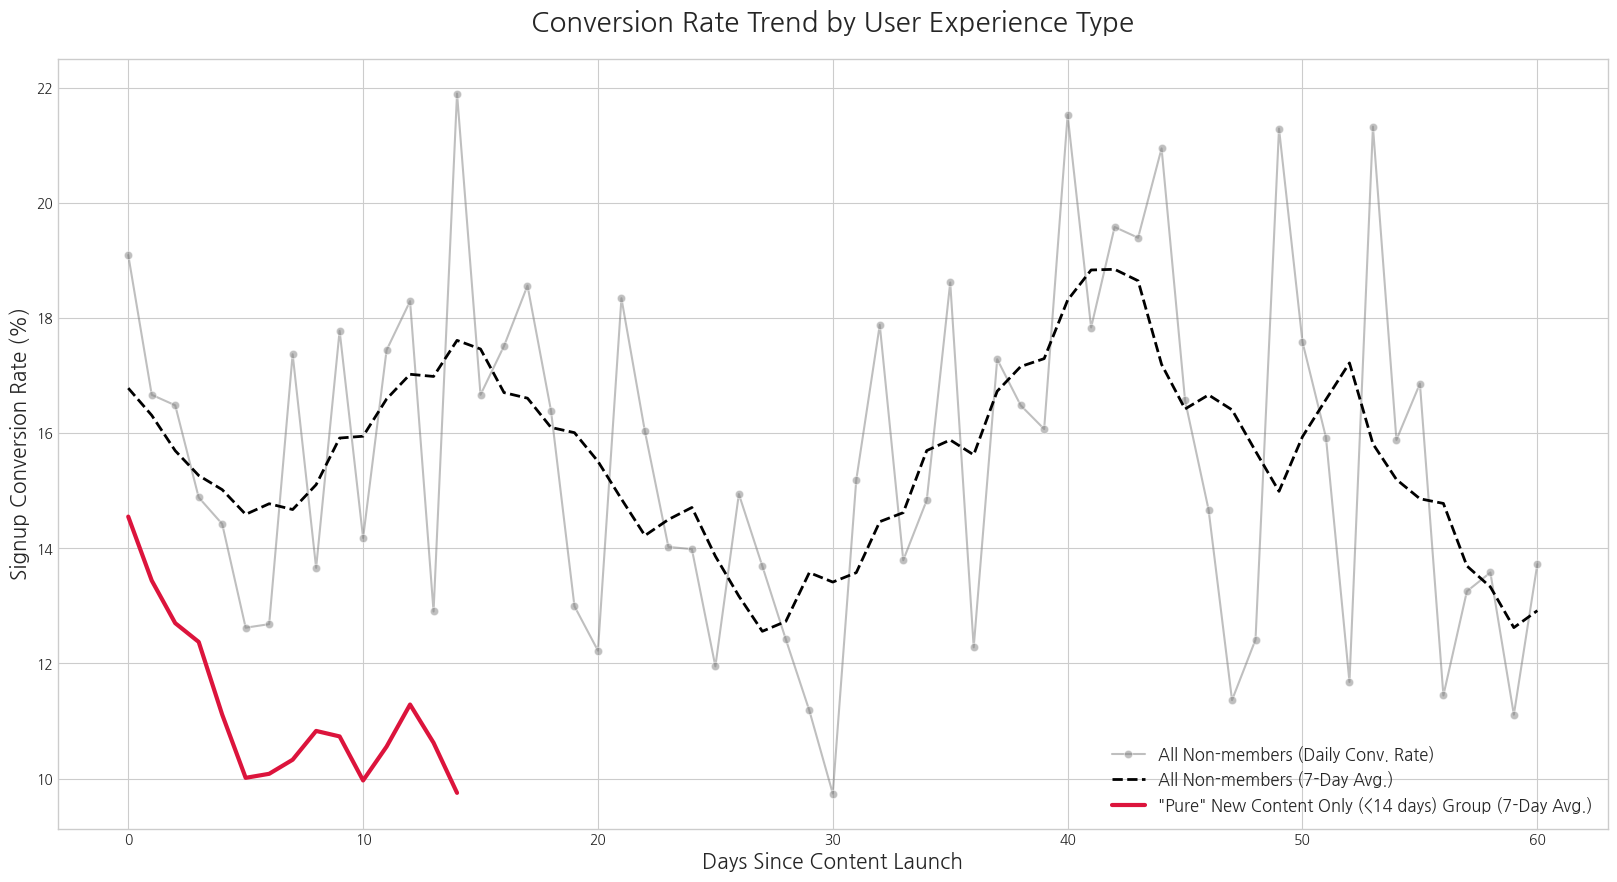

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------- [Ï∂îÍ∞Ä] 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò' Í∑∏Î£π Ï†ïÏùò Î∞è Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú --------------------
print("‚úÖ [Ï∂îÍ∞Ä] 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π'ÏùÑ Ï†ïÏùòÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌï©ÎãàÎã§...")

# Í∞Å (date, fingerprint) ÏÑ∏ÏÖòÎ≥ÑÎ°ú Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò ÏµúÎåÄ 'days_since_launch' Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
session_max_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].max()

# 'Ïã†Í∑ú'Ïùò Í∏∞Ï§ÄÏùÑ 14ÏùºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
NEW_CONTENT_DAY_THRESHOLD = 14

# Í≤ΩÌóòÌïú Î™®Îì† ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãú 14Ïùº Ïù¥ÎÇ¥Ïù∏ 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò' ÏÑ∏ÏÖòÎßå ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§.
pure_new_sessions = session_max_launch_days[session_max_launch_days <= NEW_CONTENT_DAY_THRESHOLD].index
pure_new_exp_df = merged_df[
    pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions)
]

print(f"  - 'Ïò§ÏßÅ {NEW_CONTENT_DAY_THRESHOLD}Ïùº Ïù¥ÎÇ¥ Ïã†Í∑ú ÏΩòÌÖêÏ∏†Îßå' Í≤ΩÌóòÌïú ÏàúÏàò ÏÑ∏ÏÖòÏùò Î°úÍ∑∏ {len(pure_new_exp_df)}Í∞úÎ•º Ï∂îÏ∂úÌñàÏäµÎãàÎã§.")


# -------------------- [Ï∂îÍ∞Ä] 2Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú Í∑∏Î£π'Ïùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("‚úÖ [Ï∂îÍ∞Ä] 2Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú Í∑∏Î£π'Ïùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Î∂ÑÎ™® Í≥ÑÏÇ∞
daily_pool_pure_new = pure_new_exp_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_pool_pure_new.name = 'total_experiences'

# Î∂ÑÏûê Í≥ÑÏÇ∞
attributed_pure_new_df = pd.merge(
    pure_new_exp_df[['date', 'fingerprint', 'days_since_launch']],
    signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)
daily_conversions_pure_new = attributed_pure_new_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
daily_conversions_pure_new.name = 'converted_experiences'

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conversion_pure_new_df = pd.concat([daily_pool_pure_new, daily_conversions_pure_new], axis=1).fillna(0)
conversion_pure_new_df['conversion_rate(%)'] = \
    (conversion_pure_new_df['converted_experiences'] / conversion_pure_new_df['total_experiences'] * 100).replace([np.inf, -np.inf], 0)


# -------------------- ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: ÏÑ∏ Í∞úÏùò Ï∂îÏÑ∏ÏÑ† Í≤πÏ≥ê Í∑∏Î¶¨Í∏∞ --------------------
print("‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: ÏÑ∏ Í∑∏Î£πÏùò Ï†ÑÌôòÏú® Ï∂îÏÑ∏Î•º ÎπÑÍµêÌï©ÎãàÎã§...")

# Ï∂úÏãú ÌõÑ 60ÏùºÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Îßå ÏãúÍ∞ÅÌôî ÎåÄÏÉÅÏúºÎ°ú ÏÇºÏäµÎãàÎã§.
plot_df_all = conversion_by_day_df[(conversion_by_day_df.index >= 0) & (conversion_by_day_df.index <= 60)]
plot_df_pure_new = conversion_pure_new_df[(conversion_pure_new_df.index >= 0) & (conversion_pure_new_df.index <= 60)]


fig, ax = plt.subplots(figsize=(20, 10))

# 1. Ï†ÑÏ≤¥ ÎπÑÌöåÏõê Í∑∏Î£πÏùò Ï†ÑÌôòÏú® Ï∂îÏÑ∏ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
sns.lineplot(
    data=plot_df_all, x=plot_df_all.index, y='conversion_rate(%)',
    ax=ax, marker='o', linestyle='-', label='All Non-members (Daily Conv. Rate)', alpha=0.5, color='gray'
)

# 2. Ï†ÑÏ≤¥ ÎπÑÌöåÏõê Í∑∏Î£πÏùò 7Ïùº Ïù¥Îèô ÌèâÍ∑†
plot_df_all['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='black', linestyle='--', linewidth=2, label='All Non-members (7-Day Avg.)'
)

# 3. [ÌïµÏã¨] 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò' Í∑∏Î£πÏùò 7Ïùº Ïù¥Îèô ÌèâÍ∑† (Í∞ïÏ°∞)
plot_df_pure_new['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='crimson', linestyle='-', linewidth=3, label=f'"Pure" New Content Only (<{NEW_CONTENT_DAY_THRESHOLD} days) Group (7-Day Avg.)'
)


# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (ÏòÅÎ¨∏ Î≤ÑÏ†Ñ)
plt.title('Conversion Rate Trend by User Experience Type', fontsize=20, pad=20)
plt.xlabel('Days Since Content Launch', fontsize=15)
plt.ylabel('Signup Conversion Rate (%)', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

‚úÖ [Ï∂îÍ∞Ä] 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú' Î∞è 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£πÏùÑ Ï†ïÏùòÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌï©ÎãàÎã§...
  - 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£π Î°úÍ∑∏ 6429Í∞ú, 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Î°úÍ∑∏ 1455575Í∞úÎ•º Ï∂îÏ∂úÌñàÏäµÎãàÎã§.
‚úÖ [Ï∂îÍ∞Ä] 2Îã®Í≥Ñ: Í∞Å 'ÏàúÏàò' Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: ÏÑ∏ Í∑∏Î£πÏùò Ï†ÑÌôòÏú® Ï∂îÏÑ∏Î•º ÎπÑÍµêÌï©ÎãàÎã§...


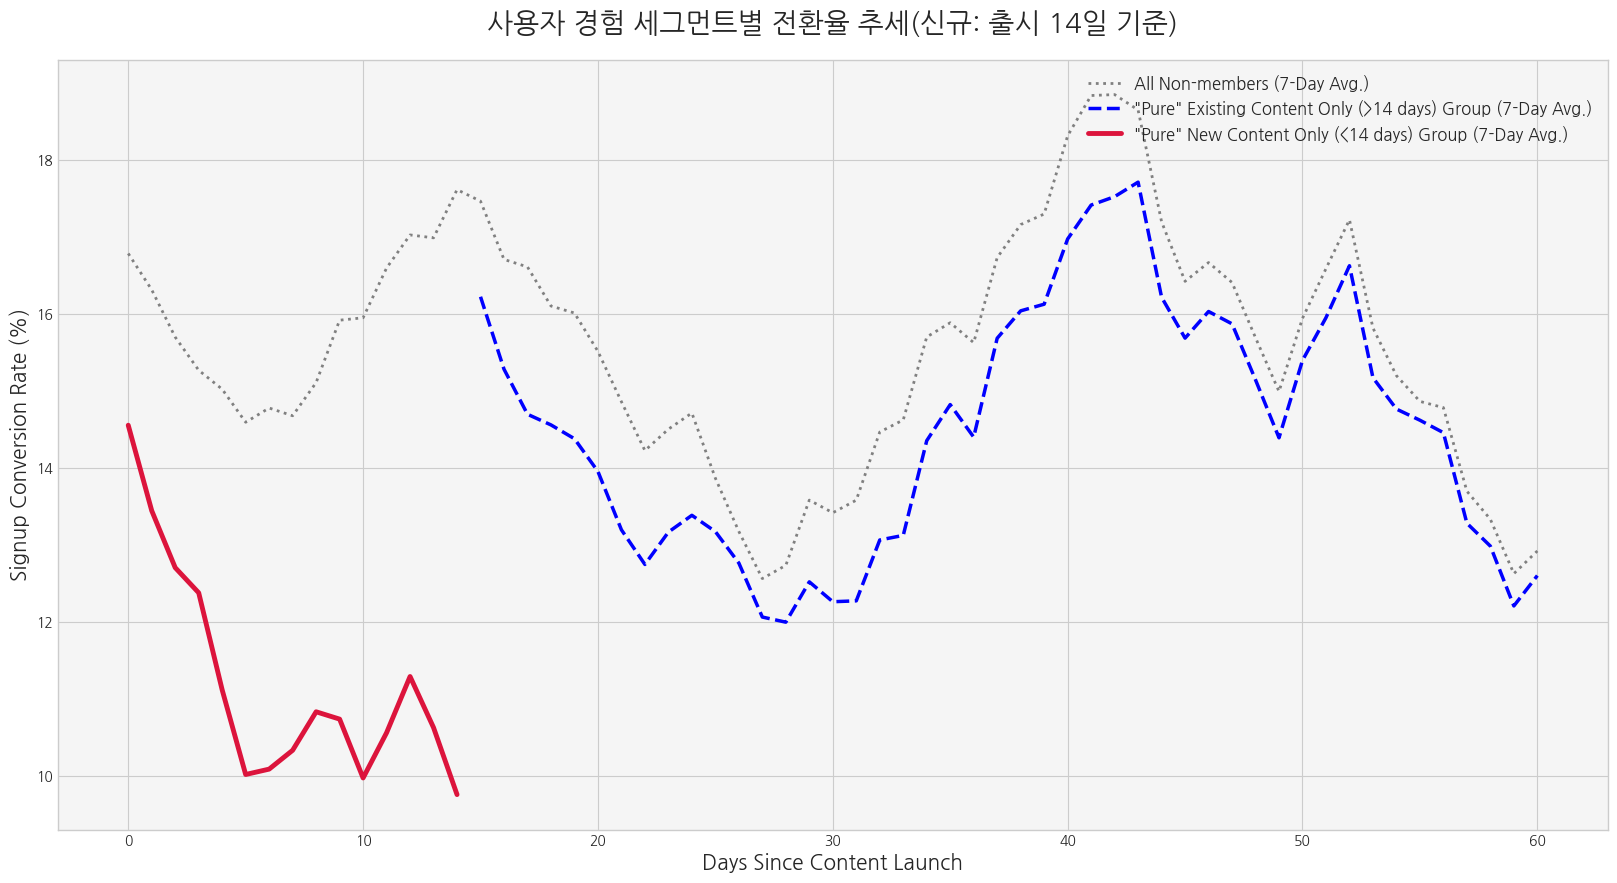

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î™®Îì† ÌïÑÏöîÌïú Î≥ÄÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. merged_df: ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê 'days_since_launch'Í∞Ä Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# 2. signup_df: ÌöåÏõêÍ∞ÄÏûÖ Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)
# 3. conversion_by_day_df: 'Ï†ÑÏ≤¥' ÎπÑÌöåÏõêÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®Ïù¥ Í≥ÑÏÇ∞Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

# -------------------- [Ï∂îÍ∞Ä] 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú' Î∞è 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Ï†ïÏùò --------------------
print("‚úÖ [Ï∂îÍ∞Ä] 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú' Î∞è 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£πÏùÑ Ï†ïÏùòÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌï©ÎãàÎã§...")

# Í∞Å ÏÑ∏ÏÖòÎ≥Ñ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò ÏµúÎåÄ/ÏµúÏÜå 'days_since_launch' Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
session_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])

# 'Ïã†Í∑ú'Ïùò Í∏∞Ï§ÄÏùÑ 14ÏùºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
NEW_CONTENT_DAY_THRESHOLD = 14

# 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò' ÏÑ∏ÏÖò: Í≤ΩÌóòÌïú Î™®Îì† ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãú 14Ïùº Ïù¥ÎÇ¥ (max <= 14)
pure_new_sessions = session_launch_days[session_launch_days['max'] <= NEW_CONTENT_DAY_THRESHOLD].index
pure_new_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions)]

# [ÌïµÏã¨] 'ÏàúÏàò Í∏∞Ï°¥ Í≤ΩÌóò' ÏÑ∏ÏÖò: Í≤ΩÌóòÌïú Î™®Îì† ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãú 14Ïùº Ïù¥ÌõÑ (min > 14)
pure_old_sessions = session_launch_days[session_launch_days['min'] > NEW_CONTENT_DAY_THRESHOLD].index
pure_old_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_old_sessions)]

print(f"  - 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£π Î°úÍ∑∏ {len(pure_new_exp_df)}Í∞ú, 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Î°úÍ∑∏ {len(pure_old_exp_df)}Í∞úÎ•º Ï∂îÏ∂úÌñàÏäµÎãàÎã§.")


# -------------------- [Ï∂îÍ∞Ä] 2Îã®Í≥Ñ: Í∞Å 'ÏàúÏàò' Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("‚úÖ [Ï∂îÍ∞Ä] 2Îã®Í≥Ñ: Í∞Å 'ÏàúÏàò' Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

def calculate_daily_conversion(experience_df, signup_df):
    """Í≤ΩÌóò Î°úÍ∑∏ÏôÄ Í∞ÄÏûÖ Î°úÍ∑∏Î•º Î∞õÏïÑ, ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò"""
    daily_pool = experience_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    attributed = pd.merge(experience_df[['date', 'fingerprint', 'days_since_launch']], signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
    daily_conversions = attributed.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))

    conv_df = pd.concat([daily_pool.rename('total'), daily_conversions.rename('converted')], axis=1).fillna(0)
    conv_df['conversion_rate(%)'] = (conv_df['converted'] / conv_df['total'] * 100).replace([np.inf, -np.inf], 0)
    return conv_df

# Í∞Å Í∑∏Î£πÎ≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conversion_pure_new_df = calculate_daily_conversion(pure_new_exp_df, signup_df)
conversion_pure_old_df = calculate_daily_conversion(pure_old_exp_df, signup_df)


# -------------------- ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: ÎÑ§ Í∞úÏùò Ï∂îÏÑ∏ÏÑ† Í≤πÏ≥ê Í∑∏Î¶¨Í∏∞ --------------------
print("‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: ÏÑ∏ Í∑∏Î£πÏùò Ï†ÑÌôòÏú® Ï∂îÏÑ∏Î•º ÎπÑÍµêÌï©ÎãàÎã§...")

# ÏãúÍ∞ÅÌôî ÎåÄÏÉÅ Í∏∞Í∞Ñ ÏÑ§Ï†ï
plot_df_all = conversion_by_day_df[(conversion_by_day_df.index >= 0) & (conversion_by_day_df.index <= 60)]
plot_df_pure_new = conversion_pure_new_df[(conversion_pure_new_df.index >= 0) & (conversion_pure_new_df.index <= 60)]
plot_df_pure_old = conversion_pure_old_df[(conversion_pure_old_df.index >= 0) & (conversion_pure_old_df.index <= 60)]

fig, ax = plt.subplots(figsize=(20, 10))

# 1. Ï†ÑÏ≤¥ ÎπÑÌöåÏõê Í∑∏Î£πÏùò 7Ïùº Ïù¥Îèô ÌèâÍ∑† (Í∏∞Ï§ÄÏÑ†)
plot_df_all['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='gray', linestyle=':', linewidth=2, label='All Non-members (7-Day Avg.)'
)

# 2. 'ÏàúÏàò Í∏∞Ï°¥ Í≤ΩÌóò' Í∑∏Î£πÏùò 7Ïùº Ïù¥Îèô ÌèâÍ∑† (Îëê Î≤àÏß∏ Í∏∞Ï§ÄÏÑ†)
plot_df_pure_old['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='blue', linestyle='--', linewidth=2.5, label=f'"Pure" Existing Content Only (>{NEW_CONTENT_DAY_THRESHOLD} days) Group (7-Day Avg.)'
)

# 3. 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò' Í∑∏Î£πÏùò 7Ïùº Ïù¥Îèô ÌèâÍ∑† (Í∞ïÏ°∞)
plot_df_pure_new['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean().plot(
    ax=ax, color='crimson', linestyle='-', linewidth=3.5, label=f'"Pure" New Content Only (<{NEW_CONTENT_DAY_THRESHOLD} days) Group (7-Day Avg.)'
)

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (ÏòÅÎ¨∏ Î≤ÑÏ†Ñ)
plt.title('ÏÇ¨Ïö©Ïûê Í≤ΩÌóò ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ Ï†ÑÌôòÏú® Ï∂îÏÑ∏(Ïã†Í∑ú: Ï∂úÏãú 14Ïùº Í∏∞Ï§Ä)', fontsize=20, pad=20)
plt.xlabel('Days Since Content Launch', fontsize=15)
plt.ylabel('Signup Conversion Rate (%)', fontsize=15)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True)
ax.set_facecolor('whitesmoke')
plt.show()

‚úÖ 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú(30Ïùº)' Î∞è 'ÏàúÏàò Í∏∞Ï°¥(30Ïùº)' Í∑∏Î£πÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: '30Ïùº Í∏∞Ï§Ä' Í∞Å Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: Î™®Îì† Ïò§Î•òÎ•º ÏàòÏ†ïÌïú ÏµúÏ¢Ö Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...


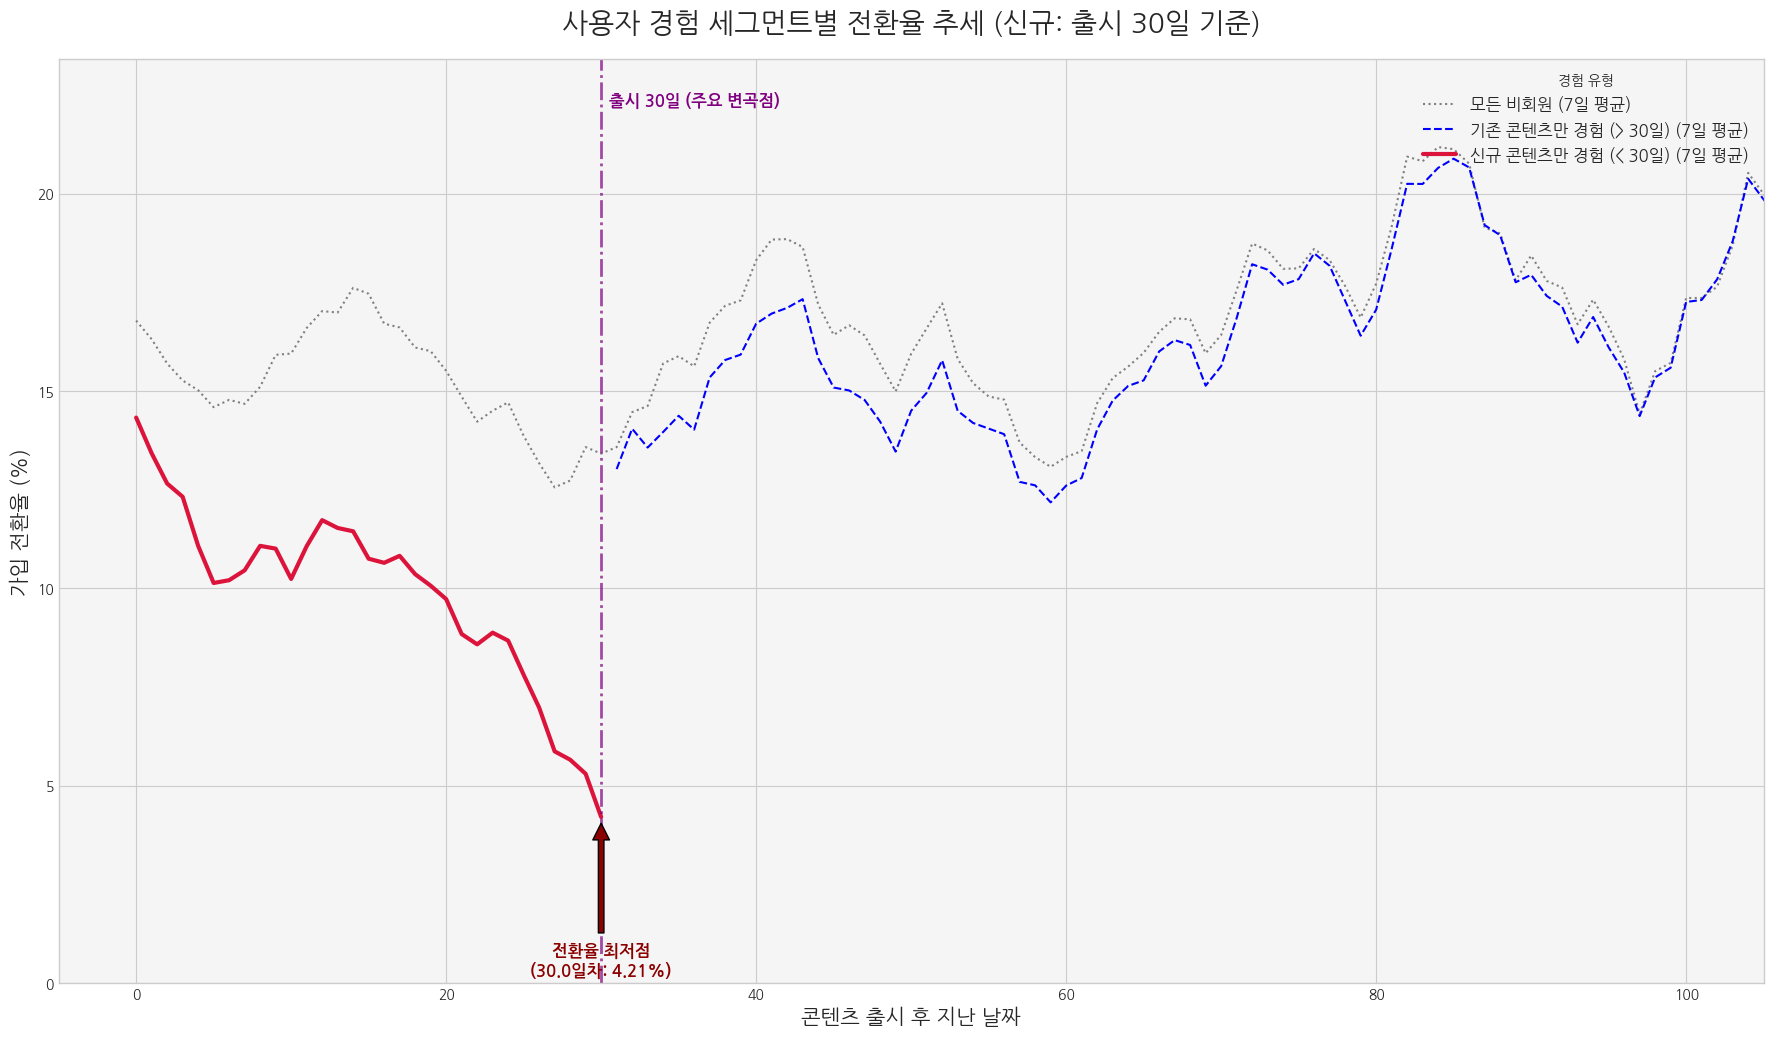

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú merged_df, signup_df, conv_all_dfÍ∞Ä Ï§ÄÎπÑÎêú ÏÉÅÌÉú

# -------------------- 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú' Î∞è 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Ï†ïÏùò (30Ïùº Í∏∞Ï§Ä) --------------------
print("‚úÖ 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú(30Ïùº)' Î∞è 'ÏàúÏàò Í∏∞Ï°¥(30Ïùº)' Í∑∏Î£πÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...")

session_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])
NEW_CONTENT_DAY_THRESHOLD = 30 # Í∏∞Ï§ÄÏùÑ '30Ïùº'Î°ú Î™ÖÌôïÌûà ÏÑ§Ï†ï

# 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£π: Í≤ΩÌóòÌïú Î™®Îì† ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãú 30Ïùº Ïù¥ÎÇ¥
pure_new_sessions = session_launch_days[session_launch_days['max'] <= NEW_CONTENT_DAY_THRESHOLD].index
pure_new_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions)]

# 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π: Í≤ΩÌóòÌïú Î™®Îì† ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãú 30Ïùº Ïù¥ÌõÑ
pure_old_sessions = session_launch_days[session_launch_days['min'] > NEW_CONTENT_DAY_THRESHOLD].index
pure_old_exp_df = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_old_sessions)]


# -------------------- 2Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("‚úÖ 2Îã®Í≥Ñ: '30Ïùº Í∏∞Ï§Ä' Í∞Å Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

def calculate_daily_conversion(experience_df, signup_df):
    if experience_df.empty: return pd.DataFrame(columns=['conversion_rate(%)'])
    daily_pool = experience_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    attributed = pd.merge(experience_df, signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
    daily_conversions = attributed.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    conv_df = pd.concat([daily_pool.rename('total'), daily_conversions.rename('converted')], axis=1).fillna(0)
    conv_df['conversion_rate(%)'] = (conv_df['converted'] / conv_df['total'] * 100).replace([np.inf, -np.inf], 0)
    return conv_df

conv_new_30_df = calculate_daily_conversion(pure_new_exp_df, signup_df)
conv_old_30_df = calculate_daily_conversion(pure_old_exp_df, signup_df)
# conv_all_dfÎäî Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Í≥ÑÏÇ∞ÎêòÏóàÎã§Í≥† Í∞ÄÏ†ï


# -------------------- ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî (Î™®Îì† Ïò§Î•ò ÏàòÏ†ï ÏôÑÎ£å) --------------------
print("‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: Î™®Îì† Ïò§Î•òÎ•º ÏàòÏ†ïÌïú ÏµúÏ¢Ö Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(22, 12))

# [ÌïµÏã¨ ÏàòÏ†ï] Ïù¥Îèô ÌèâÍ∑† Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨ Ï§ÄÎπÑ
# min_periods=1 ÏòµÏÖòÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±Ìïú Ï≤òÏùå Î©∞Ïπ†ÎèÑ Í≥ÑÏÇ∞ÌïòÏó¨, ÏÑ†Ïù¥ 0ÏùºÎ∂ÄÌÑ∞ ÏãúÏûëÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
trend_all = conv_all_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_new = conv_new_30_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_old = conv_old_30_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()

# --- Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ ---
trend_all.plot(ax=ax, color='gray', linestyle=':', label='Î™®Îì† ÎπÑÌöåÏõê (7Ïùº ÌèâÍ∑†)')
trend_old.plot(ax=ax, color='blue', linestyle='--', label=f'Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Îßå Í≤ΩÌóò (> {NEW_CONTENT_DAY_THRESHOLD}Ïùº) (7Ïùº ÌèâÍ∑†)')
trend_new.plot(ax=ax, color='crimson', linestyle='-', linewidth=3, label=f'Ïã†Í∑ú ÏΩòÌÖêÏ∏†Îßå Í≤ΩÌóò (< {NEW_CONTENT_DAY_THRESHOLD}Ïùº) (7Ïùº ÌèâÍ∑†)')


# --- Ï§ëÏöî ÏßÄÏ†ê Í∞ïÏ°∞ (ÏàòÏ†ï ÏôÑÎ£å) ---
# [ÏàòÏ†ï] '30Ïùº' Í∏∞Ï§Ä ÏàòÏßÅÏÑ† Ï∂îÍ∞Ä
ax.axvline(x=30, color='purple', linestyle='-.', linewidth=2, alpha=0.7)
ax.text(30.5, plt.ylim()[1]*0.95, 'Ï∂úÏãú 30Ïùº (Ï£ºÏöî Î≥ÄÍ≥°Ï†ê)', fontsize=12, color='purple', weight='bold')

# [ÏàòÏ†ï] 'Ïã†Í∑ú ÏΩòÌÖêÏ∏†' Í∑∏Î£πÏùò '0~30Ïùº ÏÇ¨Ïù¥' ÏµúÏ†ÄÏ†ê Ï∞æÍ∏∞ Î∞è ÌëúÏãú
if not trend_new.empty:
    trend_new_filtered = trend_new[trend_new.index <= 30]
    if not trend_new_filtered.empty:
        lowest_point_day = trend_new_filtered.idxmin()
        lowest_point_value = trend_new_filtered.min()
        ax.annotate(f'Ï†ÑÌôòÏú® ÏµúÏ†ÄÏ†ê\n({lowest_point_day}ÏùºÏ∞®: {lowest_point_value:.2f}%)',
                    xy=(lowest_point_day, lowest_point_value), xytext=(lowest_point_day, lowest_point_value - 4),
                    fontsize=12, color='darkred', weight='bold',
                    arrowprops=dict(facecolor='darkred', shrink=0.05), ha='center')


# --- Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ ---
ax.set_title(f'ÏÇ¨Ïö©Ïûê Í≤ΩÌóò ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ Ï†ÑÌôòÏú® Ï∂îÏÑ∏ (Ïã†Í∑ú: Ï∂úÏãú {NEW_CONTENT_DAY_THRESHOLD}Ïùº Í∏∞Ï§Ä)', fontsize=20, pad=20)
ax.set_xlabel('ÏΩòÌÖêÏ∏† Ï∂úÏãú ÌõÑ ÏßÄÎÇú ÎÇ†Ïßú', fontsize=15)
ax.set_ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=15)

ax.legend(title='Í≤ΩÌóò Ïú†Ìòï', fontsize=12, loc='upper right')
ax.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xlim(-5, 105)
ax.set_ylim(bottom=0)
plt.show()

‚úÖ 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú(60Ïùº)' Î∞è 'ÏàúÏàò Í∏∞Ï°¥(60Ïùº)' Í∑∏Î£πÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: '60Ïùº Í∏∞Ï§Ä' Í∞Å Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: Î™®Îì† ÏöîÍµ¨ÏÇ¨Ìï≠ÏùÑ Î∞òÏòÅÌïú ÏµúÏ¢Ö Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...


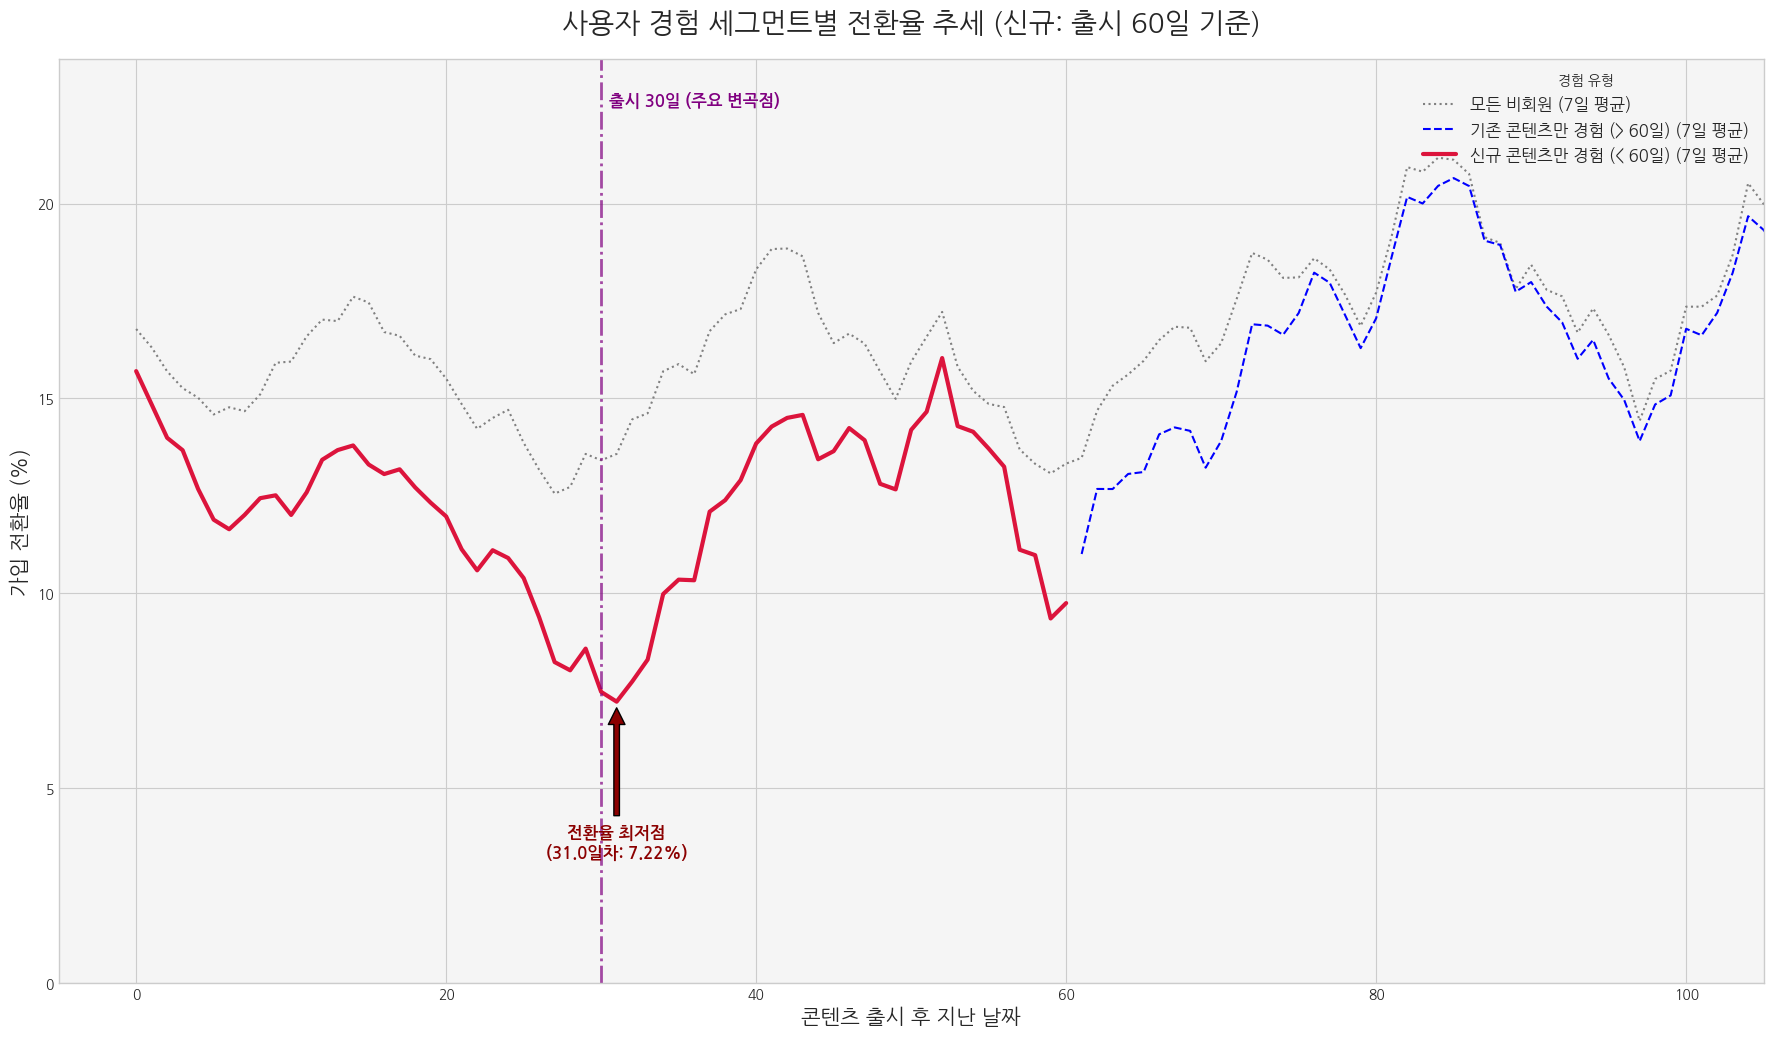

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú merged_df, signup_df, conv_all_dfÍ∞Ä Ï§ÄÎπÑÎêú ÏÉÅÌÉú

# -------------------- 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú' Î∞è 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Ï†ïÏùò (60Ïùº Í∏∞Ï§Ä) --------------------
print("‚úÖ 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú(60Ïùº)' Î∞è 'ÏàúÏàò Í∏∞Ï°¥(60Ïùº)' Í∑∏Î£πÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...")

session_launch_days_3 = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])
NEW_CONTENT_DAY_THRESHOLD_3 = 60 # Í∏∞Ï§ÄÏùÑ '60Ïùº'Î°ú Î™ÖÌôïÌûà ÏÑ§Ï†ï

pure_new_sessions_3 = session_launch_days_3[session_launch_days_3['max'] <= NEW_CONTENT_DAY_THRESHOLD_3].index
pure_new_exp_df_3 = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_new_sessions_3)]

pure_old_sessions_3 = session_launch_days_3[session_launch_days_3['min'] > NEW_CONTENT_DAY_THRESHOLD_3].index
pure_old_exp_df_3 = merged_df[pd.Series(map(tuple, merged_df[['date', 'fingerprint']].values)).isin(pure_old_sessions_3)]


# -------------------- 2Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("‚úÖ 2Îã®Í≥Ñ: '60Ïùº Í∏∞Ï§Ä' Í∞Å Í∑∏Î£πÏùò ÏùºÏûêÎ≥Ñ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

def calculate_daily_conversion(experience_df, signup_df):
    if experience_df.empty: return pd.DataFrame(columns=['conversion_rate(%)'])
    daily_pool = experience_df.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    attributed = pd.merge(experience_df, signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
    daily_conversions = attributed.groupby('days_since_launch')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
    conv_df = pd.concat([daily_pool.rename('total'), daily_conversions.rename('converted')], axis=1).fillna(0)
    conv_df['conversion_rate(%)'] = (conv_df['converted'] / conv_df['total'] * 100).replace([np.inf, -np.inf], 0)
    return conv_df

# [ÏàòÏ†ï] Î≥ÄÏàò Ïù¥Î¶ÑÏóê '_3'Î•º Î∂ôÏó¨ '60Ïùº Í∏∞Ï§Ä'ÏûÑÏùÑ Î™ÖÌôïÌûà Ìï©ÎãàÎã§.
conv_new_60_df_3 = calculate_daily_conversion(pure_new_exp_df_3, signup_df)
conv_old_60_df_3 = calculate_daily_conversion(pure_old_exp_df_3, signup_df)
# conv_all_dfÎäî Í∏∞Ï§ÄÍ≥º ÏÉÅÍ¥ÄÏóÜÏúºÎØÄÎ°ú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©


# -------------------- ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî (Î™®Îì† ÏöîÍµ¨ÏÇ¨Ìï≠ Î∞òÏòÅ ÏôÑÎ£å) --------------------
print("‚úÖ ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî: Î™®Îì† ÏöîÍµ¨ÏÇ¨Ìï≠ÏùÑ Î∞òÏòÅÌïú ÏµúÏ¢Ö Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(22, 12))

# Ïù¥Îèô ÌèâÍ∑† Í≥ÑÏÇ∞
trend_all = conv_all_df['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_new_3 = conv_new_60_df_3['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()
trend_old_3 = conv_old_60_df_3['conversion_rate(%)'].rolling(window=7, center=True, min_periods=1).mean()

# --- Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ ---
trend_all.plot(ax=ax, color='gray', linestyle=':', label='Î™®Îì† ÎπÑÌöåÏõê (7Ïùº ÌèâÍ∑†)')
trend_old_3.plot(ax=ax, color='blue', linestyle='--', label=f'Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Îßå Í≤ΩÌóò (> {NEW_CONTENT_DAY_THRESHOLD_3}Ïùº) (7Ïùº ÌèâÍ∑†)')
trend_new_3.plot(ax=ax, color='crimson', linestyle='-', linewidth=3, label=f'Ïã†Í∑ú ÏΩòÌÖêÏ∏†Îßå Í≤ΩÌóò (< {NEW_CONTENT_DAY_THRESHOLD_3}Ïùº) (7Ïùº ÌèâÍ∑†)')


# --- Ï§ëÏöî ÏßÄÏ†ê Í∞ïÏ°∞ ---
ax.axvline(x=30, color='purple', linestyle='-.', linewidth=2, alpha=0.7)
ax.text(30.5, plt.ylim()[1]*0.95, 'Ï∂úÏãú 30Ïùº (Ï£ºÏöî Î≥ÄÍ≥°Ï†ê)', fontsize=12, color='purple', weight='bold')

if not trend_new_3.empty:
    trend_new_filtered = trend_new_3[trend_new_3.index <= 60]
    if not trend_new_filtered.empty:
        lowest_point_day = trend_new_filtered.idxmin()
        lowest_point_value = trend_new_filtered.min()
        ax.annotate(f'Ï†ÑÌôòÏú® ÏµúÏ†ÄÏ†ê\n({lowest_point_day}ÏùºÏ∞®: {lowest_point_value:.2f}%)',
                    xy=(lowest_point_day, lowest_point_value), xytext=(lowest_point_day, lowest_point_value - 4),
                    fontsize=12, color='darkred', weight='bold',
                    arrowprops=dict(facecolor='darkred', shrink=0.05), ha='center')

# --- Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ ---
ax.set_title(f'ÏÇ¨Ïö©Ïûê Í≤ΩÌóò ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ Ï†ÑÌôòÏú® Ï∂îÏÑ∏ (Ïã†Í∑ú: Ï∂úÏãú {NEW_CONTENT_DAY_THRESHOLD_3}Ïùº Í∏∞Ï§Ä)', fontsize=20, pad=20)
ax.set_xlabel('ÏΩòÌÖêÏ∏† Ï∂úÏãú ÌõÑ ÏßÄÎÇú ÎÇ†Ïßú', fontsize=15)
ax.set_ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=15)
ax.legend(title='Í≤ΩÌóò Ïú†Ìòï', fontsize=12, loc='upper right')
ax.grid(True)
ax.set_facecolor('whitesmoke')
ax.set_xlim(-5, 105)
ax.set_ylim(bottom=0)
plt.show()


In [ ]:
# 1. 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£πÏúºÎ°ú ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞(`pure_old_exp_df`)ÏóêÏÑú,
#    'days_since_launch' Ïª¨ÎüºÏùò ÏµúÏÜüÍ∞íÍ≥º ÏµúÎåìÍ∞íÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
min_days = pure_old_exp_df['days_since_launch'].min()
max_days = pure_old_exp_df['days_since_launch'].max()

print(f"--- 'ÏàúÏàò Í∏∞Ï°¥(>60Ïùº)' Í∑∏Î£π Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù ---")
print(f"Ïù¥ Í∑∏Î£πÏóê Ìè¨Ìï®Îêú ÌôúÎèôÎì§Ïùò 'ÏΩòÌÖêÏ∏† ÎÇòÏù¥' Î≤îÏúÑ: {min_days}Ïùº ~ {max_days}Ïùº")

# 2. Í≤ÄÏ¶ù
if min_days > 60:
    print("\n‚úÖ Í≤ÄÏ¶ù ÏÑ±Í≥µ: Ïù¥ Í∑∏Î£πÏùò Î™®Îì† ÌôúÎèôÏùÄ 60ÏùºÏù¥ ÏßÄÎÇú ÏΩòÌÖêÏ∏†ÏóêÏÑú Î∞úÏÉùÌñàÏäµÎãàÎã§. (ÏòàÏÉÅÎåÄÎ°ú)")
else:
    print(f"\n‚ùå Í≤ÄÏ¶ù Ïã§Ìå®: ÎÖºÎ¶¨Ï†Å Ïò§Î•ò Î∞úÍ≤¨! Ïù¥ Í∑∏Î£πÏóê {min_days}Ïùº Îêú ÏΩòÌÖêÏ∏† ÌôúÎèôÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.")
    print("   - 'ÏàúÏàò Í∏∞Ï°¥ Í∑∏Î£π'ÏùÑ Ï†ïÏùòÌïòÍ±∞ÎÇò ÌïÑÌÑ∞ÎßÅÌïòÎäî ÏΩîÎìúÏóê Ïò§Î•òÍ∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏäµÎãàÎã§.")

--- 'ÏàúÏàò Í∏∞Ï°¥(>60Ïùº)' Í∑∏Î£π Îç∞Ïù¥ÌÑ∞ Í≤ÄÏ¶ù ---
Ïù¥ Í∑∏Î£πÏóê Ìè¨Ìï®Îêú ÌôúÎèôÎì§Ïùò 'ÏΩòÌÖêÏ∏† ÎÇòÏù¥' Î≤îÏúÑ: 61.0Ïùº ~ 759.0Ïùº

‚úÖ Í≤ÄÏ¶ù ÏÑ±Í≥µ: Ïù¥ Í∑∏Î£πÏùò Î™®Îì† ÌôúÎèôÏùÄ 60ÏùºÏù¥ ÏßÄÎÇú ÏΩòÌÖêÏ∏†ÏóêÏÑú Î∞úÏÉùÌñàÏäµÎãàÎã§. (ÏòàÏÉÅÎåÄÎ°ú)


1. Í∞ïÎ†•ÌïòÏßÄÎßå ÏßßÏùÄ 'Ï¥àÍ∏∞ Î∂ÄÏä§Ìä∏' Ìö®Í≥º (Îπ®Í∞ÑÏÉâ ÏÑ†, 0~30Ïùº)
* "Pure" New Content Only (<60 days) Í∑∏Î£π(Îπ®Í∞ÑÏÉâ ÏÑ†)ÏùÄ Ï∂úÏãú ÏßÅÌõÑ ÏïΩ 16%Ïóê Í∞ÄÍπåÏö¥ ÎÜíÏùÄ Ï†ÑÌôòÏú®Î°ú ÏãúÏûëÌïòÏßÄÎßå, Ï∂úÏãú ÌõÑ ÏïΩ 30ÏùºÏù¥ ÏßÄÎÇòÎ©¥ Í∏âÍ≤©Ìûà ÌïòÎùΩÌïòÏó¨ ÏµúÏ†ÄÏ†êÏùÑ Ï∞çÏäµÎãàÎã§.
* [Ìï¥ÏÑù] Ïù¥Îäî 'Ïã†ÏÑ†ÎèÑ Ìö®Í≥º'Í∞Ä Îß§Ïö∞ Í∞ïÎ†•ÌïòÏßÄÎßå, Í∑∏ Ïú†Ìö® Í∏∞Í∞ÑÏù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ ÏßßÎã§Îäî Í≤ÉÏùÑ Îã§Ïãú ÌïúÎ≤à ÌôïÏù∏ÏãúÏºú Ï§çÎãàÎã§. ÌäπÌûà Ï≤´ Ìïú Îã¨Ïù¥ ÏßÄÎÇòÎ©¥ Í∑∏ Ìö®Í≥ºÎäî Í±∞Ïùò ÏÇ¨ÎùºÏßÄÍ±∞ÎÇò Ïò§ÌûàÎ†§ Ïó≠Ìö®Í≥ºÍ∞Ä ÎÇòÎäî Í≤ÉÏ≤òÎüº Î≥¥ÏûÖÎãàÎã§.
2. 'ÏÑ±ÏàôÍ∏∞'Ïóê Ï†ëÏñ¥Îì† ÏΩòÌÖêÏ∏†Ïùò Ïû¨Î∞úÍ≤¨ (Îπ®Í∞ÑÏÉâ ÏÑ†, 30ÏóêÏÑú 55Ïùº)
* 30Ïùº ÏßÄÏ†êÏóêÏÑú ÏµúÏ†ÄÏ†êÏùÑ Ï∞çÏóàÎçò Îπ®Í∞ÑÏÉâ ÏÑ†Ïù¥ **Îã§Ïãú ÏÉÅÏäπÌïòÏó¨ 45~50Ïùº ÏÇ¨Ïù¥Ïóê Îëê Î≤àÏß∏ ÌîºÌÅ¨(peak)**Î•º ÎßåÎì†Îã§Îäî Ï†êÏûÖÎãàÎã§.
* ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãúÎêú ÏßÄ Ìïú Îã¨Ïù¥ ÏßÄÎÇòÎ©¥ 'Ïã†ÏÑ†ÎèÑ' Ìö®Í≥ºÎäî ÏÇ¨ÎùºÏßÄÏßÄÎßå, Í∑∏ Ïù¥ÌõÑÏóêÎäî Í≤ÄÏÉâ ÏóîÏßÑÏóê ÎÖ∏Ï∂ú(SEO)ÎêòÍ±∞ÎÇò, ÏÇ¨Ïö©ÏûêÎì§ ÏÇ¨Ïù¥Ïóê ÏûÖÏÜåÎ¨∏Ïù¥ ÎÇòÎ©¥ÏÑú ÏÉàÎ°úÏö¥ Í∞ÄÏπòÎ•º ÏñªÍ≤å ÎêòÎäî **'ÏÑ±ÏàôÍ∏∞'**Ïóê Ï†ëÏñ¥Îì†Îã§Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ ÏãúÍ∏∞ÏóêÎäî ÏΩòÌÖêÏ∏†Ïùò 'ÏÉàÎ°úÏõÄ'Ïù¥ ÏïÑÎãàÎùº 'Ïú†Ïö©ÏÑ±'Ïù¥ÎÇò 'ÍπäÏù¥'Í∞Ä Ï†ÑÌôòÏùÑ Ïú†ÎèÑÌïòÎäî ÌïµÏã¨ ÏöîÏù∏Ïù¥ Îê©ÎãàÎã§.
3. 'Ïä§ÌÖåÎîîÏÖÄÎü¨'Ïùò ÌûòÍ≥º ÏòàÏ∏° Í∞ÄÎä•Ìïú Ìå®ÌÑ¥ (ÌååÎûÄÏÉâ ÏÑ†)
* "Pure" Existing Content Only (>60 days) Í∑∏Î£π(ÌååÎûÄÏÉâ ÏÑ†)ÏùÄ 60Ïùº Ïù¥ÌõÑÏóê Îì±Ïû•ÌïòÎ©∞, Îß§Ïö∞ ÎÜíÏùÄ Ï†ÑÌôòÏú®(18~20%)ÏùÑ Í∏∞Î°ùÌï©ÎãàÎã§.
* [Ìï¥ÏÑù] Ï∂úÏãú ÌõÑ Îëê Îã¨Ïù¥ ÏßÄÎÇú 'ÏôÑÏ†ÑÌûà Í≤ÄÏ¶ùÎêú' ÏΩòÌÖêÏ∏†Îì§ÏùÄ Ïö∞Î¶¨ ÏÑúÎπÑÏä§Ïùò Í∞ÄÏû• Í∞ïÎ†•Ìïú ÏûêÏÇ∞ÏûÖÎãàÎã§. Ïù¥ ÏΩòÌÖêÏ∏†Îì§ÏùÄ Íæ∏Ï§ÄÌûà ÎÜíÏùÄ Í∞ÄÏπòÎ•º Ï†úÍ≥µÌïòÎ©∞, Í∞ÄÏû• ÌôïÏã§Ìïú Ïû†Ïû¨Í≥†Í∞ùÎì§ÏùÑ ÎÅåÏñ¥Î™®ÏúºÍ≥† ÏûàÏäµÎãàÎã§. ÎòêÌïú, Ïù¥ ÌååÎûÄÏÉâ ÏÑ†Ïùò Ìå®ÌÑ¥ÏùÄ ÌöåÏÉâ ÏÑ†(Ï†ÑÏ≤¥ ÌèâÍ∑†)Ïùò Ìå®ÌÑ¥Í≥º Îß§Ïö∞ Ïú†ÏÇ¨ÌïòÍ≤å ÏõÄÏßÅÏù¥ÎäîÎç∞, Ïù¥Îäî Ïö∞Î¶¨ ÏÑúÎπÑÏä§Ïùò Ï†ÑÎ∞òÏ†ÅÏù∏ Ï†ÑÌôòÏú®Ïù¥ ÏÇ¨Ïã§ÏÉÅ Ïù¥ 'Í∏∞Ï°¥ Ïä§ÌÖåÎîîÏÖÄÎü¨' ÏΩòÌÖêÏ∏†Îì§Ïùò ÏÑ±Í≥ºÏóê ÏùòÌï¥ Ï¢åÏö∞ÎêúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# -------------------- 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú' Î∞è 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Ï†ïÏùò --------------------
print("‚úÖ 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú(30Ïùº)' Î∞è 'ÏàúÏàò Í∏∞Ï°¥(30Ïùº)' Í∑∏Î£πÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...")

# Í∞Å ÏÑ∏ÏÖòÎ≥Ñ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò ÏµúÎåÄ/ÏµúÏÜå 'days_since_launch' Í∞íÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
session_launch_days = merged_df.groupby(['date', 'fingerprint'])['days_since_launch'].agg(['min', 'max'])

# 'Ïã†Í∑ú'Ïùò Í∏∞Ï§ÄÏùÑ 30ÏùºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
NEW_CONTENT_DAY_THRESHOLD = 30

# 'ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò' ÏÑ∏ÏÖò: Í≤ΩÌóòÌïú Î™®Îì† ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãú 30Ïùº Ïù¥ÎÇ¥ (max <= 30)
pure_new_sessions = set(session_launch_days[session_launch_days['max'] <= NEW_CONTENT_DAY_THRESHOLD].index)

# 'ÏàúÏàò Í∏∞Ï°¥ Í≤ΩÌóò' ÏÑ∏ÏÖò: Í≤ΩÌóòÌïú Î™®Îì† ÏΩòÌÖêÏ∏†Í∞Ä Ï∂úÏãú 30Ïùº Ïù¥ÌõÑ (min > 30)
pure_old_sessions = set(session_launch_days[session_launch_days['min'] > NEW_CONTENT_DAY_THRESHOLD].index)

print(f"  - 'ÏàúÏàò Ïã†Í∑ú({NEW_CONTENT_DAY_THRESHOLD}Ïùº Ïù¥ÎÇ¥)' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: {len(pure_new_sessions):,}")
print(f"  - 'ÏàúÏàò Í∏∞Ï°¥(>{NEW_CONTENT_DAY_THRESHOLD}Ïùº)' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: {len(pure_old_sessions):,}")


# -------------------- 2Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÎ≥Ñ 'Í∞ÄÏûÖ Ï†ÑÌôò ÏÑ∏ÏÖò' Ïàò Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò 'Í∞ÄÏûÖ Ï†ÑÌôò ÏÑ∏ÏÖò' ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôò ÏÑ∏ÏÖò Î™©Î°ùÏùÑ ÎØ∏Î¶¨ ÎßåÎì§Ïñ¥ Îë°ÎãàÎã§.
all_converted_sessions = set(map(tuple, signup_df[['date', 'fingerprint']].drop_duplicates().values))

# Í∞Å Í∑∏Î£πÍ≥º Ï†ÑÏ≤¥ Í∞ÄÏûÖ Ï†ÑÌôò ÏÑ∏ÏÖòÏùò ÍµêÏßëÌï©ÏùÑ Íµ¨Ìï©ÎãàÎã§.
conversions_pure_new = len(pure_new_sessions.intersection(all_converted_sessions))
conversions_pure_old = len(pure_old_sessions.intersection(all_converted_sessions))

print(f"  - 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£π Í∞ÄÏûÖ Ï†ÑÌôò Ïàò: {conversions_pure_new:,}")
print(f"  - 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Í∞ÄÏûÖ Ï†ÑÌôò Ïàò: {conversions_pure_old:,}")


# -------------------- 3Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò 'Í∞ÄÏûÖ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Í∞Å Í∑∏Î£πÏùò Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)
total_pure_new = len(pure_new_sessions)
total_pure_old = len(pure_old_sessions)

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conv_rate_pure_new = (conversions_pure_new / total_pure_new * 100) if total_pure_new > 0 else 0
conv_rate_pure_old = (conversions_pure_old / total_pure_old * 100) if total_pure_old > 0 else 0

print(f"  - 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£π Ï†ÑÌôòÏú®: {conv_rate_pure_new:.2f}%")
print(f"  - 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Ï†ÑÌôòÏú®: {conv_rate_pure_old:.2f}%")


# -------------------- 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÌÜµÌïú ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§...")

# Í∞Å Í∑∏Î£πÏùò 'ÎπÑÍ∞ÄÏûÖ' ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
non_conversions_pure_new = total_pure_new - conversions_pure_new
non_conversions_pure_old = total_pure_old - conversions_pure_old

# 2x2 Î∂ÑÌï†Ìëú ÏÉùÏÑ±: [[Ïã†Í∑ú-Í∞ÄÏûÖ, Ïã†Í∑ú-ÎπÑÍ∞ÄÏûÖ], [Í∏∞Ï°¥-Í∞ÄÏûÖ, Í∏∞Ï°¥-ÎπÑÍ∞ÄÏûÖ]]
observed_values = [
    [conversions_pure_new, non_conversions_pure_new],
    [conversions_pure_old, non_conversions_pure_old]
]

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2_statistic, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- [30Ïùº Í∏∞Ï§Ä] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2_statistic:.4f}")
print(f"p-value: {p_value:.10f}")

# p-value Ìï¥ÏÑù
alpha = 0.05
print("\n--- ÏµúÏ¢Ö Í≤∞Î°† ---")
if p_value < alpha:
    print(f"‚úÖ p-value ({p_value:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§.")
    print("   Í≤∞Î°†: 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£πÍ≥º 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÏúºÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† ÎßêÌï† Ïàò ÏóÜÏäµÎãàÎã§.")

‚úÖ 1Îã®Í≥Ñ: 'ÏàúÏàò Ïã†Í∑ú(30Ïùº)' Î∞è 'ÏàúÏàò Í∏∞Ï°¥(30Ïùº)' Í∑∏Î£πÏùÑ Ï†ïÏùòÌï©ÎãàÎã§...
  - 'ÏàúÏàò Ïã†Í∑ú(30Ïùº Ïù¥ÎÇ¥)' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: 2,558
  - 'ÏàúÏàò Í∏∞Ï°¥(>30Ïùº)' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: 84,524

‚úÖ 2Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò 'Í∞ÄÏûÖ Ï†ÑÌôò ÏÑ∏ÏÖò' ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
  - 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£π Í∞ÄÏûÖ Ï†ÑÌôò Ïàò: 208
  - 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Í∞ÄÏûÖ Ï†ÑÌôò Ïàò: 5,745

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò 'Í∞ÄÏûÖ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
  - 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£π Ï†ÑÌôòÏú®: 8.13%
  - 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£π Ï†ÑÌôòÏú®: 6.80%

‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§...

--- [30Ïùº Í∏∞Ï§Ä] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 6.7345
p-value: 0.0094566197

--- ÏµúÏ¢Ö Í≤∞Î°† ---
‚úÖ p-value (0.0095)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§.
   Í≤∞Î°†: 'ÏàúÏàò Ïã†Í∑ú' Í∑∏Î£πÍ≥º 'ÏàúÏàò Í∏∞Ï°¥' Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.


‚úÖ 1Îã®Í≥Ñ: ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï§ÄÎπÑ ÏôÑÎ£å.
--- Ï§ÄÎπÑÎêú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ---
                                               content_id
first_seen_time                                          
2022-01-07 10:28:06.021  03b4a290c08f7fa83933827a994f2e61
2023-11-19 13:57:30.052  040ccaa97a52e006a2c94bb7c5dce263
2023-12-06 02:41:57.737  079110dd9526425ed3cb7d5c3535707a
2023-11-24 04:28:11.912  07b0a0433178c5eecd11bcae017e5133
2022-11-06 11:11:13.176  0ab2b890d4068c1490b89676773256f6

‚úÖ 2Îã®Í≥Ñ: ÏõîÎ≥Ñ Ïã†Í∑ú ÏΩòÌÖêÏ∏† Îì±Ïû• ÌöüÏàò ÏßëÍ≥Ñ ÏôÑÎ£å.
--- ÏõîÎ≥Ñ ÏßëÍ≥Ñ Í≤∞Í≥º (ÏÉÅÏúÑ 5Í∞ú) ---
                 new_content_count
first_seen_time                   
2021-12-31                       2
2022-01-31                      67
2022-02-28                       2
2022-03-31                       1
2022-04-30                       1
‚úÖ 3Îã®Í≥Ñ: ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§...
‚úÖ 4Îã®Í≥Ñ: ÏÉÅÍ¥Ä Í≥ÑÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...


  [

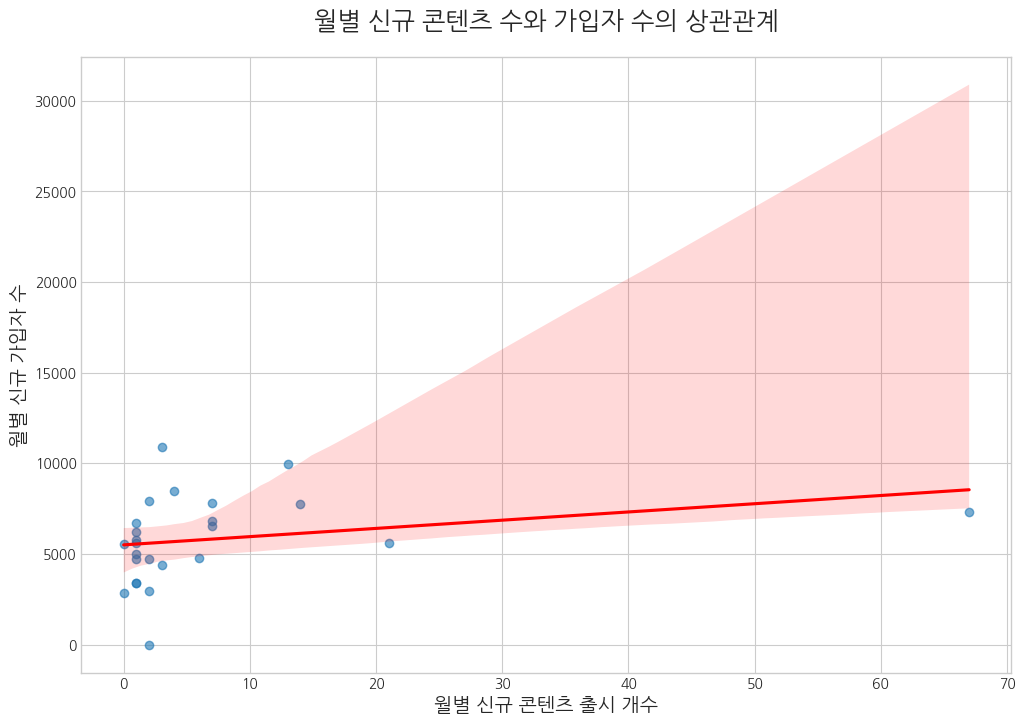

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÏãúÍ∞Ñ ÏãúÎ¶¨Ï¶à ÎßåÎì§Í∏∞

time_series_df = null_id_first_seen_series.reset_index()
time_series_df.columns = ['content_id', 'first_seen_time']

# 'first_seen_time' Ïª¨ÎüºÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
time_series_df.set_index('first_seen_time', inplace=True)

print("‚úÖ 1Îã®Í≥Ñ: ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï§ÄÎπÑ ÏôÑÎ£å.")
print("--- Ï§ÄÎπÑÎêú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ---")
print(time_series_df.head())


# -------------------- 2Îã®Í≥Ñ: ÏõîÎ≥Ñ Ïã†Í∑ú ÏΩòÌÖêÏ∏† Îì±Ïû• ÌöüÏàò ÏßëÍ≥Ñ --------------------
# .resample('M') : Îç∞Ïù¥ÌÑ∞Î•º 'ÏõîÎßê(Month-End)' Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôîÌï©ÎãàÎã§.
# .count() : Í∞Å ÏõîÎ≥Ñ Í∑∏Î£πÏóê ÏÜçÌïú Îç∞Ïù¥ÌÑ∞(ÏΩòÌÖêÏ∏†)Ïùò Í∞úÏàòÎ•º ÏÖâÎãàÎã§.
monthly_new_content_counts = time_series_df.resample('M').count()

# Ïª¨Îüº Ïù¥Î¶ÑÏùÑ Îçî Î™ÖÌôïÌïòÍ≤å Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
monthly_new_content_counts.rename(columns={'content_id': 'new_content_count'}, inplace=True)

print("\n‚úÖ 2Îã®Í≥Ñ: ÏõîÎ≥Ñ Ïã†Í∑ú ÏΩòÌÖêÏ∏† Îì±Ïû• ÌöüÏàò ÏßëÍ≥Ñ ÏôÑÎ£å.")
print("--- ÏõîÎ≥Ñ ÏßëÍ≥Ñ Í≤∞Í≥º (ÏÉÅÏúÑ 5Í∞ú) ---")
print(monthly_new_content_counts.head())


print("‚úÖ 3Îã®Í≥Ñ: ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§...")

# ÏõîÎ≥Ñ ÌöåÏõêÍ∞ÄÏûÖÏûê Ïàò ÏßëÍ≥Ñ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
monthly_signups = complete_signup_df.set_index('client_event_time').resample('M')['user_id'].nunique()
monthly_signups_df = monthly_signups.to_frame(name='signup_count')

# [Ï§ëÏöî] Îëê Îç∞Ïù¥ÌÑ∞Ïùò ÏõîÎ≥Ñ Ïù∏Îç±Ïä§Î•º Ï†ïÌôïÌûà ÎßûÏ∂îÏñ¥ Ï§çÎãàÎã§.
combined_index = monthly_new_content_counts.index.union(monthly_signups_df.index)
df1 = monthly_new_content_counts.reindex(combined_index, fill_value=0)
df2 = monthly_signups_df.reindex(combined_index, fill_value=0)


# -------------------- 4Îã®Í≥Ñ: ÏÉÅÍ¥Ä Í≥ÑÏàò Í≥ÑÏÇ∞ --------------------
print("‚úÖ 4Îã®Í≥Ñ: ÏÉÅÍ¥Ä Í≥ÑÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# df1Ïùò 'new_content_count' Ïª¨ÎüºÍ≥º df2Ïùò 'signup_count' Ïª¨Îüº Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
correlation = df1['new_content_count'].corr(df2['signup_count'])

print("\n\n=======================================================")
print("  [ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º]")
print("=======================================================")
print(f"ÏõîÎ≥Ñ Ïã†Í∑ú ÏΩòÌÖêÏ∏† ÏàòÏôÄ Í∞ÄÏûÖÏûê ÏàòÏùò ÏÉÅÍ¥Ä Í≥ÑÏàò: {correlation:.4f}")


# -------------------- 5Îã®Í≥Ñ: ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Ìï¥ÏÑù Î∞è ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 5Îã®Í≥Ñ: Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")

# ÏÉÅÍ¥Ä Í≥ÑÏàò Ìï¥ÏÑù Í∞ÄÏù¥Îìú
if correlation > 0.7:
    interpretation = "Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§."
elif correlation > 0.4:
    interpretation = "ÎöúÎ†∑Ìïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§."
elif correlation > 0.2:
    interpretation = "ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§."
elif correlation < -0.4:
    interpretation = "ÎöúÎ†∑Ìïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§."
else:
    interpretation = "ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Í±∞Ïùò ÏóÜÍ±∞ÎÇò Îß§Ïö∞ ÏïΩÌï©ÎãàÎã§."

print(f"Ìï¥ÏÑù: {interpretation}")
print("\n[Ï§ëÏöî] Ïù¥Îäî 'Ïã†Í∑ú ÏΩòÌÖêÏ∏†Í∞Ä ÎßéÏù¥ Ï∂úÏãúÎêú Îã¨Ïóê Í∞ÄÏûÖÏûê ÏàòÎèÑ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§'Îäî Í≤ÉÏùÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îí∑Î∞õÏπ®Ìï©ÎãàÎã§.")
print("      Îã®, 'ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ïù∏Í≥ºÍ¥ÄÍ≥ÑÎ•º ÏùòÎØ∏ÌïòÏßÄÎäî ÏïäÎäîÎã§'Îäî Ï†êÏùÑ Ìï≠ÏÉÅ Ïú†ÏùòÌï¥Ïïº Ìï©ÎãàÎã§.")


# ÏãúÍ∞ÅÌôî: ÏÇ∞Ï†êÎèÑ(Scatter Plot)ÏôÄ Ï∂îÏÑ∏ÏÑ†
# Îëê Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©Ï≥êÏÑú ÏãúÍ∞ÅÌôîÌïòÎ©¥ Ìé∏Î¶¨Ìï©ÎãàÎã§.
correlation_plot_df = pd.concat([df1['new_content_count'], df2['signup_count']], axis=1)

plt.figure(figsize=(12, 8))
# regplotÏùÄ ÏÇ∞Ï†êÎèÑÏôÄ Ìï®Íªò ÌöåÍ∑ÄÏÑ†(Ï∂îÏÑ∏ÏÑ†)ÏùÑ Í∑∏Î†§Ï£ºÏñ¥ Í¥ÄÍ≥ÑÎ•º ÌååÏïÖÌïòÍ∏∞ Ï¢ãÏäµÎãàÎã§.
sns.regplot(
    data=correlation_plot_df,
    x='new_content_count',
    y='signup_count',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

plt.title('ÏõîÎ≥Ñ Ïã†Í∑ú ÏΩòÌÖêÏ∏† ÏàòÏôÄ Í∞ÄÏûÖÏûê ÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', fontsize=18, pad=20)
plt.xlabel('ÏõîÎ≥Ñ Ïã†Í∑ú ÏΩòÌÖêÏ∏† Ï∂úÏãú Í∞úÏàò', fontsize=14)
plt.ylabel('ÏõîÎ≥Ñ Ïã†Í∑ú Í∞ÄÏûÖÏûê Ïàò', fontsize=14)
plt.grid(True)
plt.show()

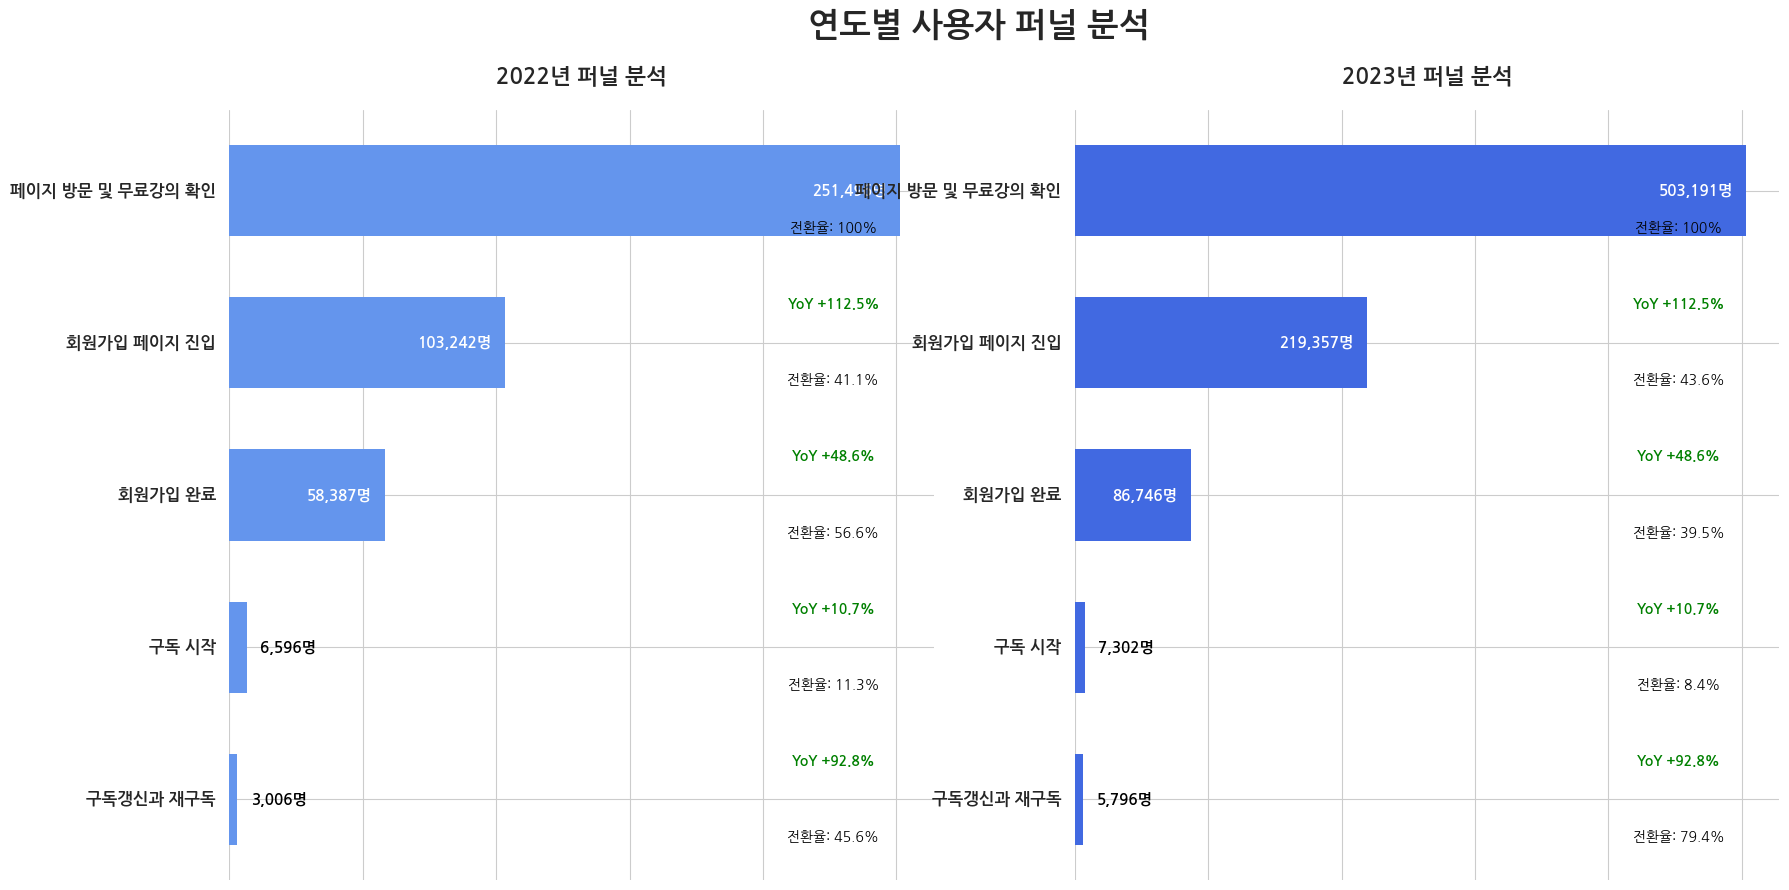

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# . Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumGothic')

#  ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# -------------------- 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÏßÄÌëú Í≥ÑÏÇ∞ --------------------
# Í∏∞Ï°¥Ïóê ÏßÅÏ†ë ÏûÖÎ†•Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
data = {
    'Îã®Í≥Ñ': ['ÌéòÏù¥ÏßÄ Î∞©Î¨∏ Î∞è Î¨¥Î£åÍ∞ïÏùò ÌôïÏù∏', 'ÌöåÏõêÍ∞ÄÏûÖ ÌéòÏù¥ÏßÄ ÏßÑÏûÖ', 'ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å', 'Íµ¨ÎèÖ ÏãúÏûë', 'Íµ¨ÎèÖÍ∞±Ïã†Í≥º Ïû¨Íµ¨ÎèÖ'],
    '2022ÎÖÑ': [251496, 103242, 58387, 6596, 3006],
    '2023ÎÖÑ': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('Îã®Í≥Ñ')

# [Ï∂îÍ∞Ä] Ïó∞Í∞Ñ ÏÑ±Ïû•Î•†(YoY) Í≥ÑÏÇ∞
df['YoY_ÏÑ±Ïû•Î•†(%)'] = (df['2023ÎÖÑ'] - df['2022ÎÖÑ']) / df['2022ÎÖÑ'] * 100

# [Ï∂îÍ∞Ä] Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
df['2022_Ï†ÑÌôòÏú®(%)'] = (df['2022ÎÖÑ'] / df['2022ÎÖÑ'].shift(1) * 100).fillna(100)
df['2023_Ï†ÑÌôòÏú®(%)'] = (df['2023ÎÖÑ'] / df['2023ÎÖÑ'].shift(1) * 100).fillna(100)


# -------------------- 2Îã®Í≥Ñ: ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò --------------------
def plot_funnel_with_annotations(ax, year, data, yoy_data, conversion_data, color):
    """ÏßÄÏ†ïÎêú Ï∂ï(ax)Ïóê ÌçºÎÑê Ï∞®Ìä∏ÏôÄ Ï£ºÏÑùÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò"""
    y_pos = np.arange(len(data))
    max_val = data.iloc[0]

    ax.barh(y_pos, data, color=color, height=0.6, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels('')
    ax.invert_yaxis()

    # ÌÖåÎëêÎ¶¨ÏôÄ ÎààÍ∏à Ï†úÍ±∞
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i, (stage, value) in enumerate(data.items()):
        # Îã®Í≥Ñ Ïù¥Î¶Ñ
        ax.text(-max_val * 0.02, i, stage, ha='right', va='center', fontsize=12, weight='bold')

        # --- [ÌïµÏã¨ ÏàòÏ†ï Î∂ÄÎ∂Ñ] ---
        # ÎßâÎåÄÏùò ÎÑàÎπÑÍ∞Ä Ï†ÑÏ≤¥Ïùò 15%Î≥¥Îã§ Ï¢ÅÏùÄÏßÄ ÌôïÏù∏
        if value < max_val * 0.15:
            # ÎßâÎåÄÍ∞Ä Ï¢ÅÏùÑ Í≤ΩÏö∞: ÌÖçÏä§Ìä∏Î•º ÎßâÎåÄ Î∞îÍπ•Ï™Ω Ïò§Î•∏Ìé∏Ïóê ÌëúÏãú
            ax.text(value + (max_val * 0.02), i, f'{value:,}Î™Ö', ha='left', va='center', color='black', fontsize=11, weight='bold')
        else:
            # ÎßâÎåÄÍ∞Ä Ï∂©Î∂ÑÌûà ÎÑìÏùÑ Í≤ΩÏö∞: ÌÖçÏä§Ìä∏Î•º ÎßâÎåÄ ÏïàÏ™Ω ÏôºÌé∏Ïóê ÌëúÏãú
            ax.text(value - (max_val * 0.02), i, f'{value:,}Î™Ö', ha='right', va='center', color='white', fontsize=11, weight='bold')
        # Ïó∞Í∞Ñ ÏÑ±Ïû•Î•† (Ï≤´ Îã®Í≥Ñ Ï†úÏô∏)
        if i > 0:
            growth = yoy_data.iloc[i]
            growth_text = f'YoY {growth:+.1f}%'
            growth_color = 'green' if growth > 0 else 'red'
            ax.text(max_val * 0.9, i-0.25, growth_text, ha='center', va='center', color=growth_color, fontsize=10, weight='bold')

        # Îã®Í≥ÑÎ≥Ñ Ï†ÑÌôòÏú®
        conv_rate = conversion_data.iloc[i]
        conv_text = f'Ï†ÑÌôòÏú®: {conv_rate:.1f}%'
        if i == 0: conv_text = 'Ï†ÑÌôòÏú®: 100%'
        ax.text(max_val * 0.9, i+0.25, conv_text, ha='center', va='center', color='black', fontsize=10, style='italic')

    ax.set_title(f"{year}ÎÖÑ ÌçºÎÑê Î∂ÑÏÑù", fontsize=16, weight='bold', pad=20)


# -------------------- 3Îã®Í≥Ñ: ÏµúÏ¢Ö Î¶¨Ìè¨Ìä∏ ÏãúÍ∞ÅÌôî --------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Ïö©Ïûê ÌçºÎÑê Î∂ÑÏÑù', fontsize=24, weight='bold')

# Í∞Å Ïó∞ÎèÑÎ≥Ñ ÌçºÎÑê Í∑∏Î¶¨Í∏∞
plot_funnel_with_annotations(ax1, 2022, df['2022ÎÖÑ'], df['YoY_ÏÑ±Ïû•Î•†(%)'], df['2022_Ï†ÑÌôòÏú®(%)'], 'cornflowerblue')
plot_funnel_with_annotations(ax2, 2023, df['2023ÎÖÑ'], df['YoY_ÏÑ±Ïû•Î•†(%)'], df['2023_Ï†ÑÌôòÏú®(%)'], 'royalblue')

plt.show()

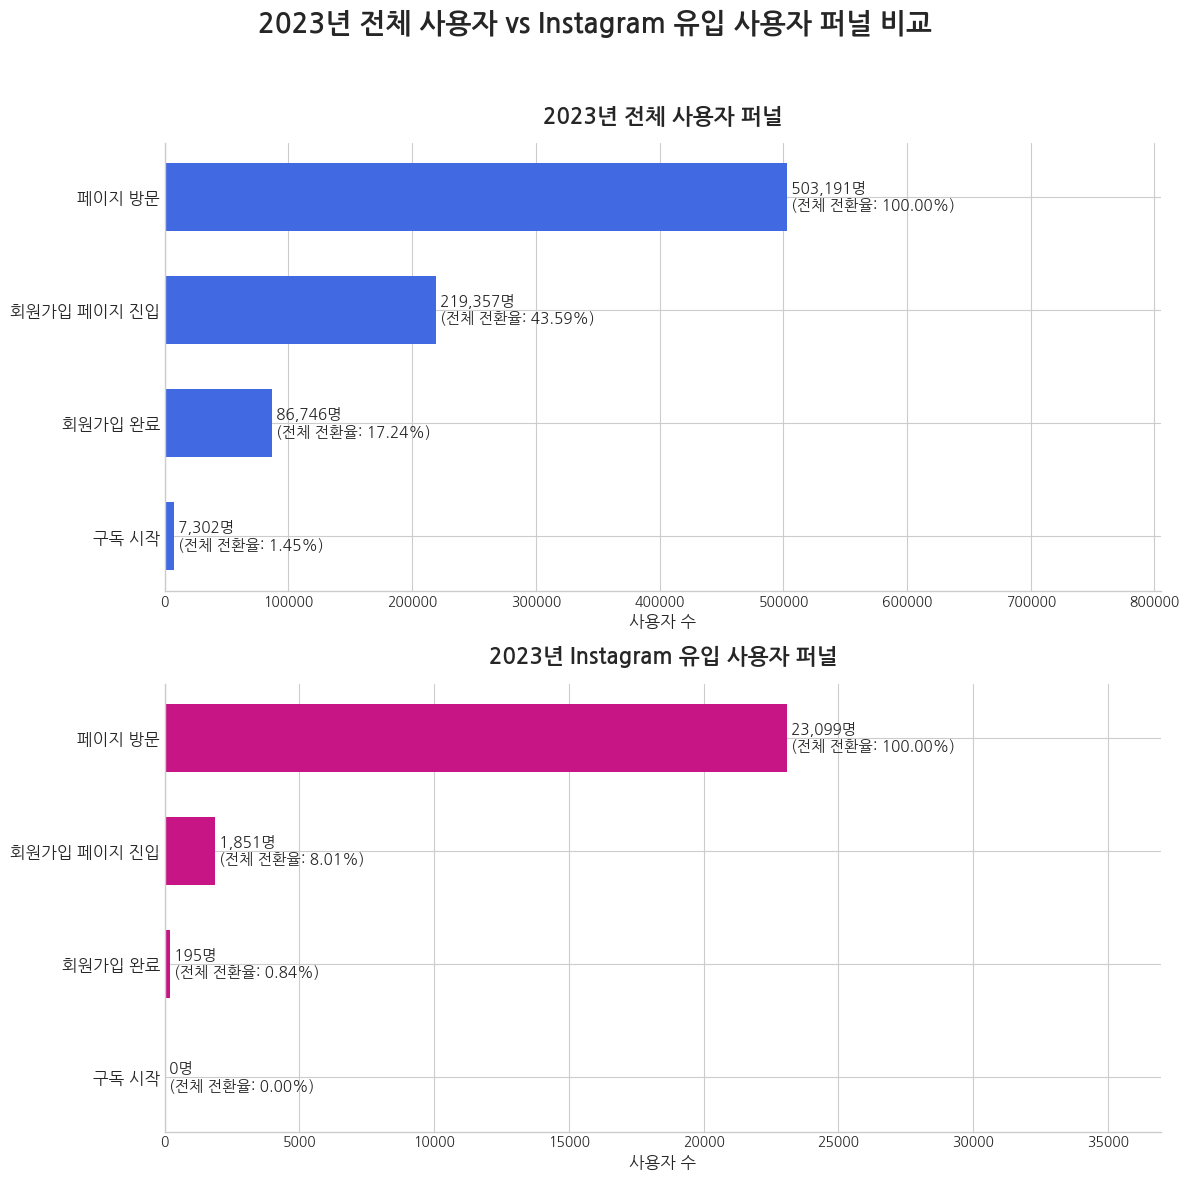

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- 1Îã®Í≥Ñ: ÎπÑÍµêÌï† Îëê Í∑∏Î£πÏùò Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ --------------------
# 2023ÎÖÑ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÌçºÎÑê Îç∞Ïù¥ÌÑ∞
total_2023_data = pd.Series(
    [503191, 219357, 86746, 7302],
    index=['ÌéòÏù¥ÏßÄ Î∞©Î¨∏', 'ÌöåÏõêÍ∞ÄÏûÖ ÌéòÏù¥ÏßÄ ÏßÑÏûÖ', 'ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å', 'Íµ¨ÎèÖ ÏãúÏûë']
)

# 2023ÎÖÑ Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Ïú†ÏûÖ ÏÇ¨Ïö©Ïûê ÌçºÎÑê Îç∞Ïù¥ÌÑ∞
insta_2023_data = pd.Series(
    [23099, 1851, 195, 0],
    index=['ÌéòÏù¥ÏßÄ Î∞©Î¨∏', 'ÌöåÏõêÍ∞ÄÏûÖ ÌéòÏù¥ÏßÄ ÏßÑÏûÖ', 'ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å', 'Íµ¨ÎèÖ ÏãúÏûë']
)


# -------------------- 2Îã®Í≥Ñ: ÌçºÎÑê Ï∞®Ìä∏Î•º Í∑∏Î¶¨Îäî Ïû¨ÏÇ¨Ïö© Ìï®Ïàò Ï†ïÏùò --------------------
def plot_comparison_funnel(ax, title, data, color):
    """ÏßÄÏ†ïÎêú Ï∂ï(ax)Ïóê ÌçºÎÑê Ï∞®Ìä∏ÏôÄ Ï£ºÏÑù(ÏÇ¨Ïö©Ïûê Ïàò, Ï†ÑÏ≤¥ Ï†ÑÌôòÏú®)ÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò"""

    y_pos = np.arange(len(data))

    # ÏàòÌèâ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÌçºÎÑêÏùò Î™∏ÌÜµÏùÑ Í∑∏Î¶ΩÎãàÎã§.
    ax.barh(y_pos, data.values, color=color, height=0.6, align='center')

    # yÏ∂ï ÏÑ§Ï†ï: Îã®Í≥Ñ Ïù¥Î¶ÑÏùÑ ÌëúÏãúÌïòÍ≥†, ÏúÑÏóêÏÑú ÏïÑÎûòÎ°ú Í∞ÄÎèÑÎ°ù Ï∂ïÏùÑ Îí§ÏßëÏäµÎãàÎã§.
    ax.set_yticks(y_pos)
    ax.set_yticklabels(data.index, fontsize=12)
    ax.invert_yaxis()

    # xÏ∂ï ÏÑ§Ï†ï: ÎùºÎ≤®ÏùÑ Ï∂îÍ∞ÄÌïòÍ≥†, Î∂àÌïÑÏöîÌïú ÌÖåÎëêÎ¶¨Î•º Ï†úÍ±∞Ìï©ÎãàÎã§.
    ax.set_xlabel('ÏÇ¨Ïö©Ïûê Ïàò', fontsize=12)
    ax.spines[['top', 'right']].set_visible(False)

    # Ï∞®Ìä∏ Ï†úÎ™© ÏÑ§Ï†ï
    ax.set_title(title, fontsize=16, weight='bold', pad=15)

    # ÎßâÎåÄ ÏòÜÏóê Í∞íÍ≥º 'Ï†ÑÏ≤¥ Ï†ÑÌôòÏú®' ÌëúÏãú
    for i, value in enumerate(data.values):
        # Ï≤´ Îã®Í≥Ñ ÎåÄÎπÑ Ï†ÑÏ≤¥ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
        total_conversion_rate = (value / data.values[0]) * 100 if data.values[0] > 0 else 0

        # ÌëúÏãúÌï† ÌÖçÏä§Ìä∏
        text = f' {value:,}Î™Ö\n (Ï†ÑÏ≤¥ Ï†ÑÌôòÏú®: {total_conversion_rate:.2f}%)'

        # ÌÖçÏä§Ìä∏Î•º ÎßâÎåÄ Ïò§Î•∏Ï™Ω ÎÅùÏóê ÏúÑÏπòÏãúÌÇ¥
        ax.text(value, i, text, va='center', ha='left', fontsize=11)

    # ÌÖçÏä§Ìä∏Í∞Ä ÏûòÎ¶¨ÏßÄ ÏïäÎèÑÎ°ù xÏ∂ï Î≤îÏúÑÎ•º ÎÑâÎÑâÌïòÍ≤å ÏÑ§Ï†ï
    ax.set_xlim(0, data.max() * 1.6)


# -------------------- 3Îã®Í≥Ñ: ÏµúÏ¢Ö ÎπÑÍµê Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî --------------------
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumGothic') # Colab ÌôòÍ≤Ω Í∏∞Ï§Ä
plt.rcParams['axes.unicode_minus'] = False # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# 2Í∞úÏùò Í∑∏ÎûòÌîÑÎ•º ÏúÑÏïÑÎûòÎ°ú Î∞∞ÏπòÌïòÍ∏∞ ÏúÑÌï¥ 2Ìñâ 1Ïó¥Ïùò Ï∫îÎ≤ÑÏä§Î•º ÎßåÎì≠ÎãàÎã§.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('2023ÎÖÑ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê vs Instagram Ïú†ÏûÖ ÏÇ¨Ïö©Ïûê ÌçºÎÑê ÎπÑÍµê', fontsize=20, weight='bold')

# Ï≤´ Î≤àÏß∏ ÎèÑÌôîÏßÄ(ax1)Ïóê Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÌçºÎÑê Í∑∏Î¶¨Í∏∞
plot_comparison_funnel(ax1, '2023ÎÖÑ Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ïûê ÌçºÎÑê', total_2023_data, 'royalblue')

# Îëê Î≤àÏß∏ ÎèÑÌôîÏßÄ(ax2)Ïóê Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Ïú†ÏûÖ ÏÇ¨Ïö©Ïûê ÌçºÎÑê Í∑∏Î¶¨Í∏∞
plot_comparison_funnel(ax2, '2023ÎÖÑ Instagram Ïú†ÏûÖ ÏÇ¨Ïö©Ïûê ÌçºÎÑê', insta_2023_data, 'mediumvioletred')

# Í∑∏ÎûòÌîÑ Í∞ÑÏùò Í∞ÑÍ≤©Í≥º Ï†ÑÏ≤¥ Î†àÏù¥ÏïÑÏõÉÏùÑ Î≥¥Í∏∞ Ï¢ãÍ≤å Ï°∞Ï†ïÌï©ÎãàÎã§.
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
click_review_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/click.content_page_more_review_button.csv', parse_dates=['client_event_time'])
click_review_df.info()
click_review_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               93792 non-null  object        
 1   client_event_time  93962 non-null  datetime64[ns]
 2   country            93944 non-null  object        
 3   device_carrier     0 non-null      float64       
 4   device_family      93962 non-null  object        
 5   device_type        93909 non-null  object        
 6   event_type         93962 non-null  object        
 7   language           93962 non-null  object        
 8   os_name            93962 non-null  object        
 9   os_version         93959 non-null  object        
 10  platform           93962 non-null  object        
 11  user_id            10702 non-null  object        
 12  content.id         93938 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 9.

city       client_event_time         country  device_carrier  \
0        Seo-gu 2023-04-10 14:10:01.402     South Korea             NaN   
1        London 2023-01-24 21:37:43.417  United Kingdom             NaN   
2  Eunpyeong-gu 2023-01-31 14:44:16.897     South Korea             NaN   
3         Seoul 2023-01-31 14:30:36.568     South Korea             NaN   
4         Seoul 2023-02-12 03:24:32.337     South Korea             NaN   
5        Seo-gu 2023-01-23 08:11:46.833     South Korea             NaN   
6         Seoul 2023-02-02 05:52:39.884     South Korea             NaN   
7     Anyang-si 2023-05-05 13:08:17.454     South Korea             NaN   
8     Namyangju 2023-04-11 12:41:15.468     South Korea             NaN   
9    Dongjak-gu 2023-04-12 05:18:01.321     South Korea             NaN   

         device_family            device_type  \
0              Windows                Windows   
1              Windows                Windows   
2              Windows                Windows   
3         Apple iPhone           Apple iPhone   
4              Windows                Windows   
5           Apple iPad             Apple iPad   
6              Windows                Windows   
7              Windows                Windows   
8  Samsung Galaxy Note  Samsung Galaxy Note 8   
9                  Mac                    Mac   

                              event_type language        os_name  \
0  click.content_page_more_review_button   Korean         Chrome   
1  click.content_page_more_review_button   Korean          Whale   
2  click.content_page_more_review_button   Korean         Chrome   
3  click.content_page_more_review_button   Korean  Mobile Safari   
4  click.content_page_more_review_button   Korean         Chrome   
5  click.content_page_more_review_button   Korean         Chrome   
6  click.content_page_more_review_button   Korean         Chrome   
7  click.content_page_more_review_button   Korean         Chrome   
8  click.content_page_more_review_button   Korean         Chrome   
9  click.content_page_more_review_button   Korean         Chrome   

      os_version platform                           user_id  \
0      112.0.0.0      Web  558fe7e8c06b8505f11b33d76f076e56   
1    3.18.154.13      Web  e48956538e4df690a5d12adf1e6f2ee3   
2      109.0.0.0      Web  e745da89019e303b122bfceac0521a8f   
3         15.6.1      Web  e2c59d444736eceee9eedba85bd4e209   
4      110.0.0.0      Web  74b66b738185ffdbec960db4a0da330a   
5  109.0.5414.83      Web  fb1ffc5625e730870f4e65fceda4cfcf   
6      109.0.0.0      Web                               NaN   
7      112.0.0.0      Web  18d3fd6795dcb6b2b38bd0fa326a7dc0   
8      112.0.0.0      Web                               NaN   
9      112.0.0.0      Web  c3a2ce9e89f70c9c6ebbd27c8a0f5590   

                         content.id  
0  a1eeebeb6c307641b75b94a2a1d5b9aa  
1  f491517f4737a60d661cd1fcacc702c0  
2  9aa7628a347707fb155943041e2cb524  
3  f491517f4737a60d661cd1fcacc702c0  
4  101e1d0dcc38d9c86156f008a145083e  
5  5cea8d6e02eb18b2660f98f424867e4d  
6  e543c38ec7fa6bcd5045049ecc31e5f8  
7  f491517f4737a60d661cd1fcacc702c0  
8  220ce7873b8895d0c81c37600b5bd1e7  
9  4641438a6c81ef572d997dbdc9100f8b

In [ ]:
start_content_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/start.content.csv', parse_dates=['client_event_time'])
start_content_df.info()
start_content_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_carrier      0 non-null       float64       
 4   device_family       122690 non-null  object        
 5   device_type         120068 non-null  object        
 6   event_type          124917 non-null  object        
 7   language            122692 non-null  object        
 8   os_name             122671 non-null  object        
 9   os_version          122585 non-null  object        
 10  platform            122692 non-null  object        
 11  user_id             124917 non-null  object        
 12  content.id          124917 non-null  object        
 13  content.difficulty  124917 no

city       client_event_time      country  device_carrier  \
0     Daejeon 2023-04-05 21:14:39.906  South Korea             NaN   
1       Seoul 2023-04-05 21:50:19.674  South Korea             NaN   
2       Seoul 2023-04-10 14:06:26.585  South Korea             NaN   
3     Toronto 2023-04-10 14:15:29.040       Canada             NaN   
4       Seoul 2023-04-10 14:21:36.467  South Korea             NaN   
5   Yongin-si 2023-04-10 14:07:01.134  South Korea             NaN   
6  Siheung-si 2023-04-10 14:08:42.539  South Korea             NaN   
7       Seoul 2023-04-10 14:44:31.128  South Korea             NaN   
8   Yongin-si 2023-04-10 14:00:11.027  South Korea             NaN   
9      Buk-gu 2023-04-10 14:02:34.712  South Korea             NaN   

   device_family            device_type     event_type language  \
0        Windows                Windows  start.content   Korean   
1            Mac                    Mac  start.content   Korean   
2            Mac                    Mac  start.content   Korean   
3        Windows                Windows  start.content  English   
4        Windows                Windows  start.content   Korean   
5        Windows                Windows  start.content   Korean   
6        Windows                Windows  start.content   Korean   
7            Mac                    Mac  start.content  English   
8  Samsung Phone  Samsung Galaxy S21 5G  start.content   Korean   
9        Windows                Windows  start.content   Korean   

           os_name     os_version platform                           user_id  \
0             Edge  111.0.1661.62      Web  41362ad5ebcade2bb1b78344a53e7ccf   
1           Safari         15.6.1      Web  06b6868000a5d576180aca47896d6cce   
2            Whale    3.19.166.16      Web  7b2ff3116db46b5e4326d49c7b027631   
3           Chrome      111.0.0.0      Web  eb7515590646ead796fdfb54e2729240   
4           Chrome      111.0.0.0      Web  85a332649d34bc7b5ebdec7660b1d57d   
5           Chrome      112.0.0.0      Web  649e32570ee5349aa8868024aeabb54f   
6            Whale    3.19.166.16      Web  add7a1651936dad3a139decfe8954fba   
7          Firefox          111.0      Web  00dae4b5b145ebb67aab108a2e8bdab1   
8  Samsung Browser           20.0      Web  810122e078c4b16d7ddb321c73c32a4c   
9             Edge  111.0.1661.62      Web  879687a97f0f3048ea13b68c1f455712   

                         content.id content.difficulty  
0  445fac33232adcb3d1cdab7d8a579430           beginner  
1  f4be1a0fe0e301b03115591777fddf29           beginner  
2  61b6463287573f00de13a930805a52d6           beginner  
3  61b6463287573f00de13a930805a52d6           beginner  
4  18992b667be06d6f29ba0008f99d9745           advanced  
5  61b6463287573f00de13a930805a52d6           beginner  
6  c269eb6df3a374b464f7c18f12fa398f           advanced  
7  7de35a9d8f14c68e5f2a8788dda5f72e           advanced  
8  4641438a6c81ef572d997dbdc9100f8b       intermediate  
9  165def8885b8a2ec0c92404048d7e345       intermediate

In [ ]:
content_id_map_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/content_id_map.csv',  encoding='euc-kr')
content_id_map_df.info()
content_id_map_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   topic.name             143 non-null    object 
 1   total_execution_count  143 non-null    float64
 2   content.id             151 non-null    object 
 3   event_count            151 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB


topic.name  total_execution_count  \
0       ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÏãúÏûëÌïòÍ∏∞ in Python                24986.0   
1                  ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïò§Î≤ÑÎ∑∞                15187.0   
2      ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÌïµÏã¨ Í∞úÎÖê in Python                 6600.0   
3   ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÏãúÏûëÌïòÍ∏∞ in JavaScript                 5557.0   
4                Ïõπ ÌçºÎ∏îÎ¶¨Ïã± ÏãúÏûëÌïòÍ∏∞                 4692.0   
5       ÌîÑÎ°úÍ∑∏ÎûòÎ∞çÍ≥º Îç∞Ïù¥ÌÑ∞ in Python                 4132.0   
6             SQLÎ°ú ÌïòÎäî Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù                 3440.0   
7                   ÌååÏù¥Ïç¨ ÏùëÏö©ÌïòÍ∏∞                 2981.0   
8  ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÌïµÏã¨ Í∞úÎÖê in JavaScript                 2679.0   
9              Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïñ∏Ïä§ ÏãúÏûëÌïòÍ∏∞                 2440.0   

                         content.id  event_count  
0  f4be1a0fe0e301b03115591777fddf29        25051  
1  61b6463287573f00de13a930805a52d6        15234  
2  f491517f4737a60d661cd1fcacc702c0         5617  
3  68a3658f1b936bfff3bd6960cd561b0a         5571  
4  445fac33232adcb3d1cdab7d8a579430         4717  
5  595cb4bbfc83e683b0314ca1312cfbde         4145  
6  c269eb6df3a374b464f7c18f12fa398f         3451  
7  b314d5aba64a0aab40602cb72a4a1504         2980  
8  d6227ba76134f6cf821bb98b5f235bd0         2442  
9  db1819d3a7a4c4d85dccb3b9e982fbcd         2414

In [ ]:
import pandas as pd

# [Í∞ÄÏ†ï] content_id_map_df ÎùºÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ Colab Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêòÏñ¥ ÏûàÎäî ÏÉÅÌÉú
# content_id_map_df = pd.read_csv(...)

# 1. Ï†ÄÏû•Ìï† ÏóëÏÖÄ ÌååÏùºÏùò Í≤ΩÎ°úÏôÄ Ïù¥Î¶ÑÏùÑ Ï†ïÌï©ÎãàÎã§.
#    ÌååÏùºÏùÄ ÎãπÏã†Ïùò Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å 'ÎÇ¥ ÎìúÎùºÏù¥Î∏å' Î∞îÎ°ú ÏïÑÎûòÏóê Ï†ÄÏû•Îê©ÎãàÎã§.
#    ÌäπÏ†ï Ìè¥ÎçîÏóê Ï†ÄÏû•ÌïòÍ≥† Ïã∂Îã§Î©¥ Í≤ΩÎ°úÎ•º ÏàòÏ†ïÌïòÏÑ∏Ïöî. (Ïòà: '/content/drive/MyDrive/my_folder/output.xlsx')
excel_file_path = '/content/drive/MyDrive/content_id_map.xlsx'

# 2. .to_excel() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏóëÏÖÄ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
#    index=False ÏòµÏÖòÏùÄ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïù∏Îç±Ïä§(0, 1, 2...)Í∞Ä ÏóëÏÖÄ ÌååÏùºÏùò Î∂àÌïÑÏöîÌïú Ï≤´ Î≤àÏß∏ Ïó¥Î°ú Ï†ÄÏû•ÎêòÎäî Í≤ÉÏùÑ ÎßâÏïÑÏ§çÎãàÎã§.
content_id_map_df.to_excel(excel_file_path, index=False)

print(f"‚úÖ ÏÑ±Í≥µ! Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÏóëÏÖÄ ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
print(f"   - Ï†ÄÏû• ÏúÑÏπò: {excel_file_path}")
print("\nÍµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÏóêÏÑú ÌååÏùºÏùÑ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî!")

‚úÖ ÏÑ±Í≥µ! Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ ÏóëÏÖÄ ÌååÏùºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
   - Ï†ÄÏû• ÏúÑÏπò: /content/drive/MyDrive/content_id_map.xlsx

Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÏóêÏÑú ÌååÏùºÏùÑ ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî!


In [ ]:
!pip3 install requests

In [ ]:
!pip3 install selenium openpyxl

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.4/9.4 MB 75.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 499.2/499.2 kB 14.8 MB/s eta 0:00:00


In [ ]:
# ColabÏóê ÌïÑÏöîÌïú ÏãúÏä§ÌÖú Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§ÏπòÌïòÍ≥† ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§.
!apt-get update
!apt install -y chromium-chromedriver

# ÌïÑÏöîÌïú Python ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌï©ÎãàÎã§.
!pip install selenium

# Selenium WebDriver ÏÑ§Ï†ïÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time

# [ÌïµÏã¨] Colab ÌôòÍ≤ΩÏùÑ ÏúÑÌïú Chrome WebDriver ÏòµÏÖòÏùÑ Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
options = webdriver.ChromeOptions()
# GUIÍ∞Ä ÏóÜÎäî ÌôòÍ≤ΩÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌïú ÌïÑÏàò ÏòµÏÖò
options.add_argument('--headless')
# ÏÉåÎìúÎ∞ïÏä§ Î™®Îç∏ ÏÇ¨Ïö© ÏïàÌï® (ColabÍ≥º Í∞ôÏùÄ Docker ÌôòÍ≤ΩÏóêÏÑú Ï∂©Îèå Î∞©ÏßÄ)
options.add_argument('--no-sandbox')
# /dev/shm Í≥µÏú† Î©îÎ™®Î¶¨ ÏÇ¨Ïö© ÏïàÌï® (ÏùºÎ∂Ä Î¶¨ÎàÖÏä§ ÌôòÍ≤ΩÏóêÏÑú ÌÅ¨Î°¨ Ï∂©Îèå Î∞©ÏßÄ)
options.add_argument('--disable-dev-shm-usage')
# GPU Í∞ÄÏÜç ÏÇ¨Ïö© ÏïàÌï®
options.add_argument('--disable-gpu')

# WebDriver Ï¥àÍ∏∞Ìôî
# ColabÏóê Í∏∞Î≥∏ÏúºÎ°ú ÏÑ§ÏπòÎêú chromedriver Í≤ΩÎ°úÎ•º Service Í∞ùÏ≤¥Î°ú Ï†ÑÎã¨Ìï©ÎãàÎã§.
try:
    service = Service('/usr/bin/chromedriver')
    driver = webdriver.Chrome(service=service, options=options)
    print("‚úÖ Selenium WebDriverÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï¥àÍ∏∞ÌôîÎêòÏóàÏäµÎãàÎã§.")

except Exception as e:
    print(f"‚ùå WebDriver Ï¥àÍ∏∞Ìôî Ï§ë ÏóêÎü¨Í∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")
    print("   - Îü∞ÌÉÄÏûÑ Ïú†ÌòïÏùÑ 'T4 GPU' ÎòêÎäî Îã§Î•∏ Ïú†ÌòïÏúºÎ°ú Î≥ÄÍ≤Ω ÌõÑ Îã§Ïãú ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî.")
    print("   - ÎòêÎäî, Îü∞ÌÉÄÏûÑ > Îü∞ÌÉÄÏûÑ Ï¥àÍ∏∞ÌôîÎ•º Ïã§ÌñâÌïòÍ≥† Îã§Ïãú ÏãúÎèÑÌï¥Î≥¥ÏÑ∏Ïöî.")


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,574 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,853 kB]
Get:13 http://archive.ubuntu.com/ubuntu 

In [ ]:
id_info_df = pd.read_excel('/content/drive/MyDrive/codeit/Colab Notebooks/project2/content_id_map.xlsx')
id_info_df.head()

topic.name  total_execution_count  \
0      ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÏãúÏûëÌïòÍ∏∞ in Python                24986.0   
1                 ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïò§Î≤ÑÎ∑∞                15187.0   
2     ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÌïµÏã¨ Í∞úÎÖê in Python                 6600.0   
3  ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÏãúÏûëÌïòÍ∏∞ in JavaScript                 5557.0   
4               Ïõπ ÌçºÎ∏îÎ¶¨Ïã± ÏãúÏûëÌïòÍ∏∞                 4692.0   

                         content.id  event_count  lesson_count  \
0  f4be1a0fe0e301b03115591777fddf29        25051          15.0   
1  61b6463287573f00de13a930805a52d6        15234          18.0   
2  f491517f4737a60d661cd1fcacc702c0         5617          46.0   
3  68a3658f1b936bfff3bd6960cd561b0a         5571          19.0   
4  445fac33232adcb3d1cdab7d8a579430         4717          52.0   

   studying_time(day) category 1  category2   category3  stream  note  \
0                 4.0       ÏΩîÎî©Í∏∞Ï¥à   ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥         NaN    10.0   0.0   
1                 3.0       ÏΩîÎî©Í∏∞Ï¥à  ÏÉùÏÑ±Ìòï AI ÌôúÏö©  ITÏã§Î¨¥/ ÎπÑÏ¶àÎãàÏä§    15.0   1.0   
2                 4.0       ÏΩîÎî©Í∏∞Ï¥à   ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥         NaN    21.0   6.0   
3                 4.0       ÏΩîÎî©Í∏∞Ï¥à   ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥         NaN    10.0   2.0   
4                 6.0       Ïõπ Í∞úÎ∞ú        NaN         NaN    24.0  10.0   

   prictice  quiz   review  review_point  
0       4.0   1.0  22768.0          99.0  
1       0.0   2.0   5924.0          99.0  
2      15.0   4.0  10036.0          98.0  
3       6.0   1.0   5692.0          98.0  
4      15.0   3.0   2579.0          99.0

In [ ]:
import pandas as pd

# [Í∞ÄÏ†ï] id_info_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏù¥ÏûÑÏù¥ Î©îÎ™®Î¶¨Ïóê Î°úÎìúÎêú ÏÉÅÌÉú

print("--- ÏàòÏ†ï Ï†Ñ Ïª¨Îüº Î™©Î°ù ---")
print(id_info_df.columns)

# [ÌïµÏã¨] .rename() Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 'prictice'Î•º 'practice'Î°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
# inplace=True ÏòµÏÖòÏùÄ, ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏù¥ÏûÑÏùÑ ÎßåÎì§ÏßÄ ÏïäÍ≥† ÏõêÎ≥∏(id_info_df)ÏùÑ ÏßÅÏ†ë ÏàòÏ†ïÌïòÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.
id_info_df.rename(columns={'prictice': 'practice'}, inplace=True)

print("\n--- ÏàòÏ†ï ÌõÑ Ïª¨Îüº Î™©Î°ù ---")
print(id_info_df.columns)

print("\n‚úÖ ÏÑ±Í≥µ! 'prictice' Ïª¨ÎüºÏùò Ïò§ÌÉÄÍ∞Ä 'practice'Î°ú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏàòÏ†ïÎêòÏóàÏäµÎãàÎã§.")

--- ÏàòÏ†ï Ï†Ñ Ïª¨Îüº Î™©Î°ù ---
Index(['topic.name', 'total_execution_count', 'content.id', 'event_count',
       'lesson_count', 'studying_time(day)', 'category 1', 'category2',
       'category3', 'stream', 'note', 'prictice', 'quiz', 'review',
       'review_point'],
      dtype='object')

--- ÏàòÏ†ï ÌõÑ Ïª¨Îüº Î™©Î°ù ---
Index(['topic.name', 'total_execution_count', 'content.id', 'event_count',
       'lesson_count', 'studying_time(day)', 'category 1', 'category2',
       'category3', 'stream', 'note', 'practice', 'quiz', 'review',
       'review_point'],
      dtype='object')

‚úÖ ÏÑ±Í≥µ! 'prictice' Ïª¨ÎüºÏùò Ïò§ÌÉÄÍ∞Ä 'practice'Î°ú ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏàòÏ†ïÎêòÏóàÏäµÎãàÎã§.


In [ ]:
import pandas as pd

difficulty_info = start_content_df[['content.id', 'content.difficulty']].drop_duplicates()

info_merged_df = pd.merge(
    merged_df,
    difficulty_info,
    on='content.id',
    how='left'
)
#==============

# [ÌïµÏã¨] 1Îã®Í≥Ñ Í≤∞Í≥ºÎ¨ºÏóê id_info_dfÎ•º Îã§Ïãú mergeÌï©ÎãàÎã§.
final_merged_df = pd.merge(
    info_merged_df,
    id_info_df,
    on='content.id',
    how='left'
)
print("  - Î™®Îì† Ï†ïÎ≥¥ Î≥ëÌï© ÏôÑÎ£å.")

# -------------------- 3Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏ --------------------
print("\n\n=============================================")
print("  [ÏµúÏ¢Ö Í≤∞Í≥º] Î™®Îì† Ï†ïÎ≥¥Í∞Ä ÌÜµÌï©Îêú Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏î")
print("=============================================")

# info()Î•º ÌÜµÌï¥ Î™®Îì† Ïª¨ÎüºÏù¥ Ïûò Ìï©Ï≥êÏ°åÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
print(final_merged_df.info())


  - Î™®Îì† Ï†ïÎ≥¥ Î≥ëÌï© ÏôÑÎ£å.


  [ÏµúÏ¢Ö Í≤∞Í≥º] Î™®Îì† Ï†ïÎ≥¥Í∞Ä ÌÜµÌï©Îêú Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏î
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710031 entries, 0 to 1710030
Data columns (total 35 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   city                      object        
 1   client_event_time         datetime64[ns]
 2   country                   object        
 3   device_carrier            float64       
 4   device_family             object        
 5   device_type               object        
 6   event_type                object        
 7   language                  object        
 8   os_name                   object        
 9   os_version                object        
 10  platform                  object        
 11  user_id                   float64       
 12  content.id                object        
 13  is_trial                  object        
 14  lesson.id                 object        
 15  

‚úÖ 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞Î•º 'Ïã†Í∑ú'(<=30Ïùº)ÏôÄ 'Í∏∞Ï°¥'(>30Ïùº) Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
  - Ïã†Í∑ú ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: 41,725
  - Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: 1,668,294

‚úÖ 2Îã®Í≥Ñ: Îëê Í∑∏Î£πÏùò Ï£ºÏöî ÏßÄÌëúÎ•º ÎπÑÍµê Î∂ÑÏÑùÌï©ÎãàÎã§...


--- [Î∂ÑÏÑù 1] ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê (%) ---
                    Ïã†Í∑ú ÏΩòÌÖêÏ∏† (<= 30Ïùº)  Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† (> 30Ïùº)
content.difficulty                                 
advanced                      18.65           28.53
beginner                       6.42           15.64
hard                           6.68            3.61
intermediate                  68.26           52.22


--- [Î∂ÑÏÑù 2] ÌèâÍ∑† ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ ÎπÑÍµê ---
                       Ïã†Í∑ú ÏΩòÌÖêÏ∏† (<= 30Ïùº)  Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† (> 30Ïùº)  Ï∞®Ïù¥ (%)
event_count                     908.07         3723.95  -75.62
total_execution_count           885.56         3811.18  -76.76
review_point                     96.53           97.65   -1.14

‚úÖ 3Îã®Í≥Ñ: Î∂ÑÏÑù Í≤∞Í≥ºÎ•º

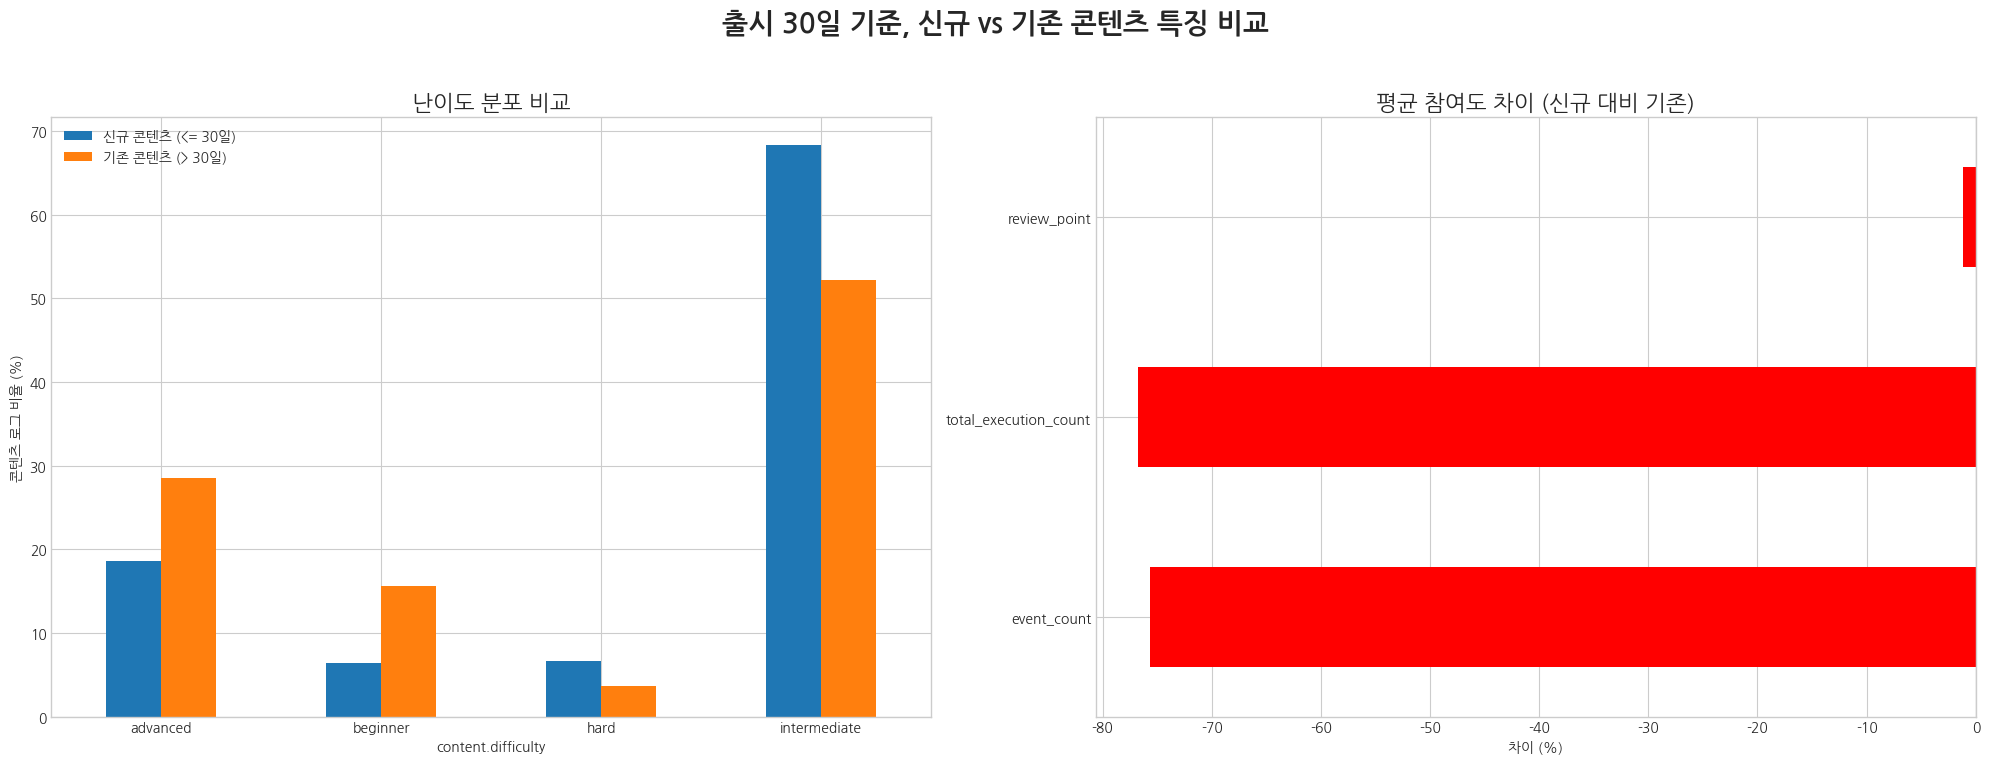

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î™®Îì† Ï†ïÎ≥¥Í∞Ä ÌÜµÌï©Îêú 'final_merged_df'Í∞Ä Ï§ÄÎπÑÎêú ÏÉÅÌÉú

# -------------------- 1Îã®Í≥Ñ: 'Ïã†Í∑ú' Í∑∏Î£πÍ≥º 'Í∏∞Ï°¥' Í∑∏Î£π Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ --------------------
print("‚úÖ 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞Î•º 'Ïã†Í∑ú'(<=30Ïùº)ÏôÄ 'Í∏∞Ï°¥'(>30Ïùº) Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")

# 'Ïã†Í∑ú'Ïùò Í∏∞Ï§ÄÏùÑ 30ÏùºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
NEW_CONTENT_DAY_THRESHOLD = 30

new_content_df = final_merged_df[final_merged_df['days_since_launch'] <= NEW_CONTENT_DAY_THRESHOLD].copy()
existing_content_df = final_merged_df[final_merged_df['days_since_launch'] > NEW_CONTENT_DAY_THRESHOLD].copy()

print(f"  - Ïã†Í∑ú ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: {len(new_content_df):,}")
print(f"  - Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: {len(existing_content_df):,}")


# -------------------- 2Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ ÌäπÏßï ÎπÑÍµê Î∂ÑÏÑù --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: Îëê Í∑∏Î£πÏùò Ï£ºÏöî ÏßÄÌëúÎ•º ÎπÑÍµê Î∂ÑÏÑùÌï©ÎãàÎã§...")

# --- Î∂ÑÏÑù 1: ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê ---
# Í∞Å Í∑∏Î£πÎ≥ÑÎ°ú 'content.difficulty'Ïùò ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
new_difficulty_dist = new_content_df['content.difficulty'].value_counts(normalize=True) * 100
existing_difficulty_dist = existing_content_df['content.difficulty'].value_counts(normalize=True) * 100

# Îëê Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©Ï≥êÏÑú ÎπÑÍµêÌï©ÎãàÎã§.
difficulty_comparison = pd.DataFrame({
    f'Ïã†Í∑ú ÏΩòÌÖêÏ∏† (<= {NEW_CONTENT_DAY_THRESHOLD}Ïùº)': new_difficulty_dist,
    f'Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† (> {NEW_CONTENT_DAY_THRESHOLD}Ïùº)': existing_difficulty_dist
}).fillna(0)

print("\n\n--- [Î∂ÑÏÑù 1] ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê (%) ---")
print(difficulty_comparison.round(2))


# --- Î∂ÑÏÑù 2: ÌèâÍ∑† ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ ÎπÑÍµê ---
# 'event_count'ÏôÄ Í∞ôÏù¥ ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïà´Ïûê Ïª¨ÎüºÎì§Ïùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
# (Ïª¨Îüº Ïù¥Î¶ÑÏùÄ ÎãπÏã†Ïùò Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§.)
metrics_to_compare = ['event_count', 'total_execution_count', 'review_point']

# Í∞Å Í∑∏Î£πÎ≥ÑÎ°ú ÌèâÍ∑† Í≥ÑÏÇ∞
new_metrics_mean = new_content_df[metrics_to_compare].mean()
existing_metrics_mean = existing_content_df[metrics_to_compare].mean()

# Í≤∞Í≥º ÌÖåÏù¥Î∏î ÏÉùÏÑ±
engagement_comparison = pd.DataFrame({
    f'Ïã†Í∑ú ÏΩòÌÖêÏ∏† (<= {NEW_CONTENT_DAY_THRESHOLD}Ïùº)': new_metrics_mean,
    f'Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† (> {NEW_CONTENT_DAY_THRESHOLD}Ïùº)': existing_metrics_mean
})
# Îëê Í∑∏Î£π Í∞ÑÏùò Ï∞®Ïù¥(%)Î•º Í≥ÑÏÇ∞ÌïòÏó¨ Ìö®Í≥ºÎ•º Î™ÖÌôïÌûà Î≥¥Ïó¨Ï§çÎãàÎã§.
engagement_comparison['Ï∞®Ïù¥ (%)'] = ((new_metrics_mean - existing_metrics_mean) / existing_metrics_mean * 100)

print("\n\n--- [Î∂ÑÏÑù 2] ÌèâÍ∑† ÏÇ¨Ïö©Ïûê Ï∞∏Ïó¨ÎèÑ ÎπÑÍµê ---")
print(engagement_comparison.round(2))


# -------------------- 3Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú ÏßÅÍ¥ÄÏ†ÅÏù∏ ÎπÑÍµê --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
plt.rc('font', family='NanumGothic')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle(f"Ï∂úÏãú {NEW_CONTENT_DAY_THRESHOLD}Ïùº Í∏∞Ï§Ä, Ïã†Í∑ú vs Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† ÌäπÏßï ÎπÑÍµê", fontsize=20, weight='bold')

# Í∑∏ÎûòÌîÑ 1: ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê
difficulty_comparison.plot(kind='bar', ax=ax1, rot=0)
ax1.set_title('ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)
ax1.set_ylabel('ÏΩòÌÖêÏ∏† Î°úÍ∑∏ ÎπÑÏú® (%)')

# Í∑∏ÎûòÌîÑ 2: Ï∞∏Ïó¨ÎèÑ Ï∞®Ïù¥ ÏãúÍ∞ÅÌôî
engagement_comparison['Ï∞®Ïù¥ (%)'].plot(kind='barh', ax=ax2, color=['red' if x < 0 else 'green' for x in engagement_comparison['Ï∞®Ïù¥ (%)']])
ax2.axvline(0, color='grey', linewidth=0.8) # 0Ï†ê Í∏∞Ï§ÄÏÑ†
ax2.set_title('ÌèâÍ∑† Ï∞∏Ïó¨ÎèÑ Ï∞®Ïù¥ (Ïã†Í∑ú ÎåÄÎπÑ Í∏∞Ï°¥)', fontsize=16)
ax2.set_xlabel('Ï∞®Ïù¥ (%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

‚úÖ 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞Î•º 'Ïã†Í∑ú'(<=30Ïùº)ÏôÄ 'Í∏∞Ï°¥'(>30Ïùº) Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
  - Ïã†Í∑ú ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: 41,725
  - Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: 1,668,294

‚úÖ 2Îã®Í≥Ñ: Îëê Í∑∏Î£πÏùò Ï£ºÏöî ÏßÄÌëúÎ•º ÎπÑÍµê Î∂ÑÏÑùÌï©ÎãàÎã§...


--- [Î∂ÑÏÑù 1] ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê (%) ---
                    Ïã†Í∑ú ÏΩòÌÖêÏ∏† (<= 30Ïùº)  Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† (> 30Ïùº)
content.difficulty                                 
advanced                      18.65           28.53
beginner                       6.42           15.64
hard                           6.68            3.61
intermediate                  68.26           52.22

‚úÖ 3Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Ï†ïÎπÑÌï©ÎãàÎã§...

‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...


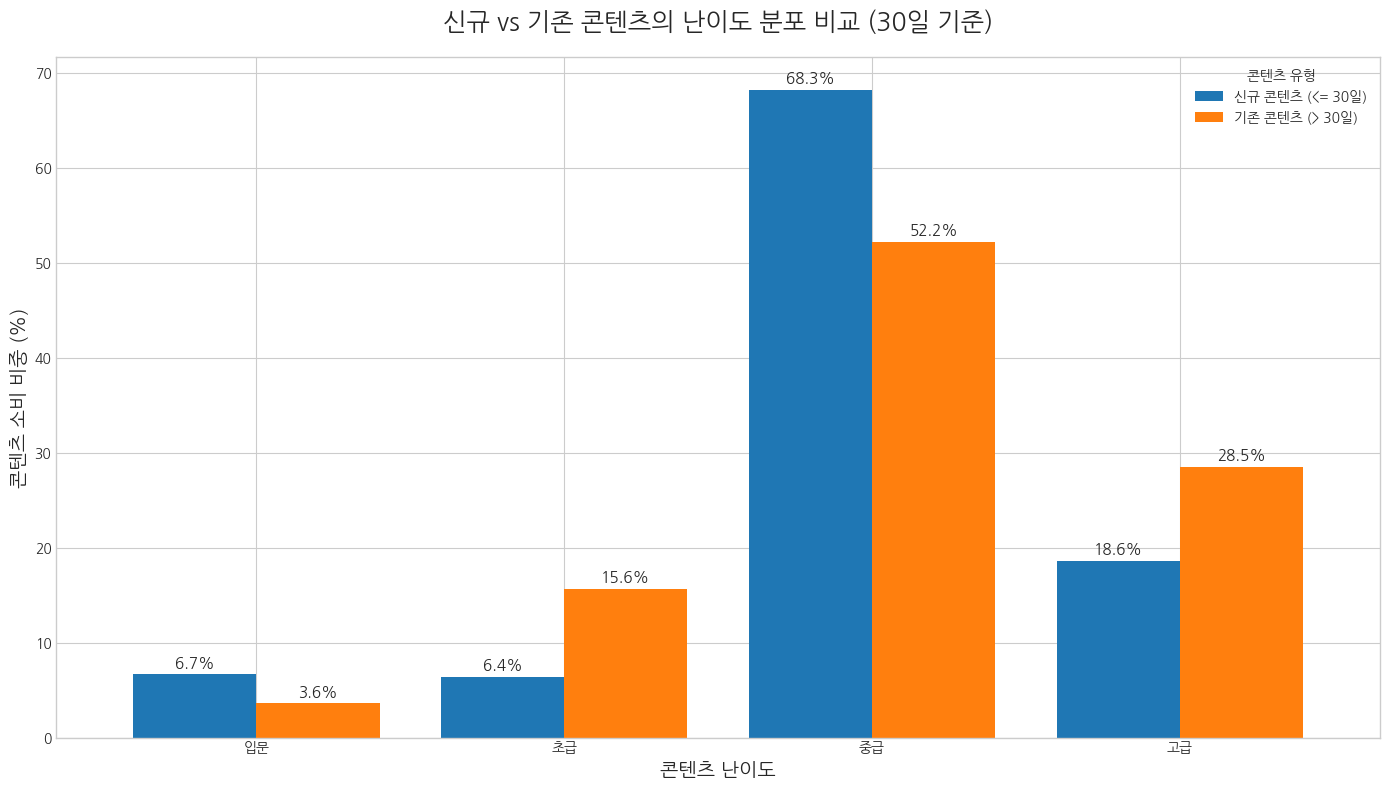

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î™®Îì† Ï†ïÎ≥¥Í∞Ä ÌÜµÌï©Îêú 'final_merged_df'Í∞Ä Ï§ÄÎπÑÎêú ÏÉÅÌÉú

# -------------------- 1Îã®Í≥Ñ: 'Ïã†Í∑ú' Í∑∏Î£πÍ≥º 'Í∏∞Ï°¥' Í∑∏Î£π Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ --------------------
print("‚úÖ 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞Î•º 'Ïã†Í∑ú'(<=30Ïùº)ÏôÄ 'Í∏∞Ï°¥'(>30Ïùº) Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")

# 'Ïã†Í∑ú'Ïùò Í∏∞Ï§ÄÏùÑ 30ÏùºÎ°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
NEW_CONTENT_DAY_THRESHOLD = 30

new_content_df = final_merged_df[final_merged_df['days_since_launch'] <= NEW_CONTENT_DAY_THRESHOLD].copy()
existing_content_df = final_merged_df[final_merged_df['days_since_launch'] > NEW_CONTENT_DAY_THRESHOLD].copy()

print(f"  - Ïã†Í∑ú ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: {len(new_content_df):,}")
print(f"  - Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Î°úÍ∑∏ Ïàò: {len(existing_content_df):,}")


# -------------------- 2Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ ÌäπÏßï ÎπÑÍµê Î∂ÑÏÑù --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: Îëê Í∑∏Î£πÏùò Ï£ºÏöî ÏßÄÌëúÎ•º ÎπÑÍµê Î∂ÑÏÑùÌï©ÎãàÎã§...")

# --- Î∂ÑÏÑù 1: ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê ---
# Í∞Å Í∑∏Î£πÎ≥ÑÎ°ú 'content.difficulty'Ïùò ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
new_difficulty_dist = new_content_df['content.difficulty'].value_counts(normalize=True) * 100
existing_difficulty_dist = existing_content_df['content.difficulty'].value_counts(normalize=True) * 100

# Îëê Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©Ï≥êÏÑú ÎπÑÍµêÌï©ÎãàÎã§.
difficulty_comparison = pd.DataFrame({
    f'Ïã†Í∑ú ÏΩòÌÖêÏ∏† (<= {NEW_CONTENT_DAY_THRESHOLD}Ïùº)': new_difficulty_dist,
    f'Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† (> {NEW_CONTENT_DAY_THRESHOLD}Ïùº)': existing_difficulty_dist
}).fillna(0)

print("\n\n--- [Î∂ÑÏÑù 1] ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê (%) ---")
print(difficulty_comparison.round(2))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú 'difficulty_comparison' Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ Ï§ÄÎπÑÎêú ÏÉÅÌÉú

# -------------------- 3Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∞è ÎùºÎ≤® Ïû¨Ï†ïÎπÑ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Ï†ïÎπÑÌï©ÎãàÎã§...")

# [ÌïµÏã¨ 1] XÏ∂ïÏóê ÌëúÏãúÎê† ÌïúÍ∏Ä ÎùºÎ≤®ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
#           (ÏàúÏÑúÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÏöîÎèÑÎÇò ÎÇúÏù¥ÎèÑ ÏàúÏúºÎ°ú Ï†ïÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.)
difficulty_order_korean = ['ÏûÖÎ¨∏', 'Ï¥àÍ∏â', 'Ï§ëÍ∏â', 'Í≥†Í∏â']
difficulty_map_korean = {
    'beginner': 'Ï¥àÍ∏â',
    'intermediate': 'Ï§ëÍ∏â',
    'advanced': 'Í≥†Í∏â',
    'hard': 'ÏûÖÎ¨∏'  # 'hard'Í∞Ä 'ÏûÖÎ¨∏'ÏùÑ ÏùòÎØ∏ÌïúÎã§Í≥† Í∞ÄÏ†ï. ÎßåÏïΩ Îã§Î•¥Îã§Î©¥ Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
}

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïù∏Îç±Ïä§Î•º ÌïúÍ∏ÄÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥†, Ï†ïÏùòÎêú ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§.
plot_df = difficulty_comparison.rename(index=difficulty_map_korean)
# category ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏàúÏÑúÎ•º Í≥†Ï†ïÏãúÌÇµÎãàÎã§.
plot_df.index = pd.Categorical(plot_df.index, categories=difficulty_order_korean, ordered=True)
plot_df.sort_index(inplace=True)


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö Îã®Ïùº Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
plt.rc('font', family='NanumGothic')

# [ÌïµÏã¨ 2] 1Í∞úÏùò ÎèÑÌôîÏßÄ(ax)Îßå ÏÉùÏÑ±Ìï©ÎãàÎã§.
fig, ax = plt.subplots(figsize=(14, 8))

# Í∑∏Î£π ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
plot_df.plot(kind='bar', ax=ax, rot=0, width=0.8)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
ax.set_title('Ïã†Í∑ú vs Í∏∞Ï°¥ ÏΩòÌÖêÏ∏†Ïùò ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ÎπÑÍµê (30Ïùº Í∏∞Ï§Ä)', fontsize=18, pad=20)
ax.set_ylabel('ÏΩòÌÖêÏ∏† ÏÜåÎπÑ ÎπÑÏ§ë (%)', fontsize=14)
ax.set_xlabel('ÏΩòÌÖêÏ∏† ÎÇúÏù¥ÎèÑ', fontsize=14)
ax.legend(title='ÏΩòÌÖêÏ∏† Ïú†Ìòï')

# Í∞Å ÎßâÎåÄÏóê Í∞í ÌëúÏãú
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize=11)

plt.tight_layout()
plt.show()

‚úÖ 1Îã®Í≥Ñ: Í∞Å ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïú 'Ï†ÑÏ≤¥ Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò(Î∂ÑÎ™®)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: Í∞Å ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† 'Í∞ÄÏûÖÌïú Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò(Î∂ÑÏûê)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
‚úÖ 3Îã®Í≥Ñ: 'ÏΩòÌÖêÏ∏†Î≥Ñ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÏµúÏ¢Ö ÌÖåÏù¥Î∏îÏùÑ ÎßåÎì≠ÎãàÎã§...


  [ÏµúÏ¢Ö Í≤∞Í≥º] 50Î™Ö Ïù¥ÏÉÅ ÏãúÏ≤≠Ìïú ÏΩòÌÖêÏ∏† Ï§ë, Í∞ÄÏûÖ Ï†ÑÌôòÏú® Top 20
                               total_viewers  converted_users  \
topic.name                                                      
ÌÖåÏä§Ìä∏ ÌÜ†ÌîΩ                                    93             25.0   
React Ïä§ÌÉÄÏùºÎßÅ: Styled Components             76             16.0   
Ï∂îÏ≤ú ÏãúÏä§ÌÖú                                  1304            271.0   
2018 ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÏãúÏûëÌïòÍ∏∞                           54             11.0   
React Ïª¥Ìè¨ÎÑåÌä∏ ÏÑ§Í≥Ñ                             64             13.0   
ÏΩîÎìúÏûá Ïä§ÌîÑÎ¶∞Ìä∏: ÌîÑÎ°†Ìä∏ÏóîÎìú Ìä∏Îûô 3Í∏∞ OT                 193             37.0   
ÌîÑÎ°úÍ∑∏ÎûòÎ®

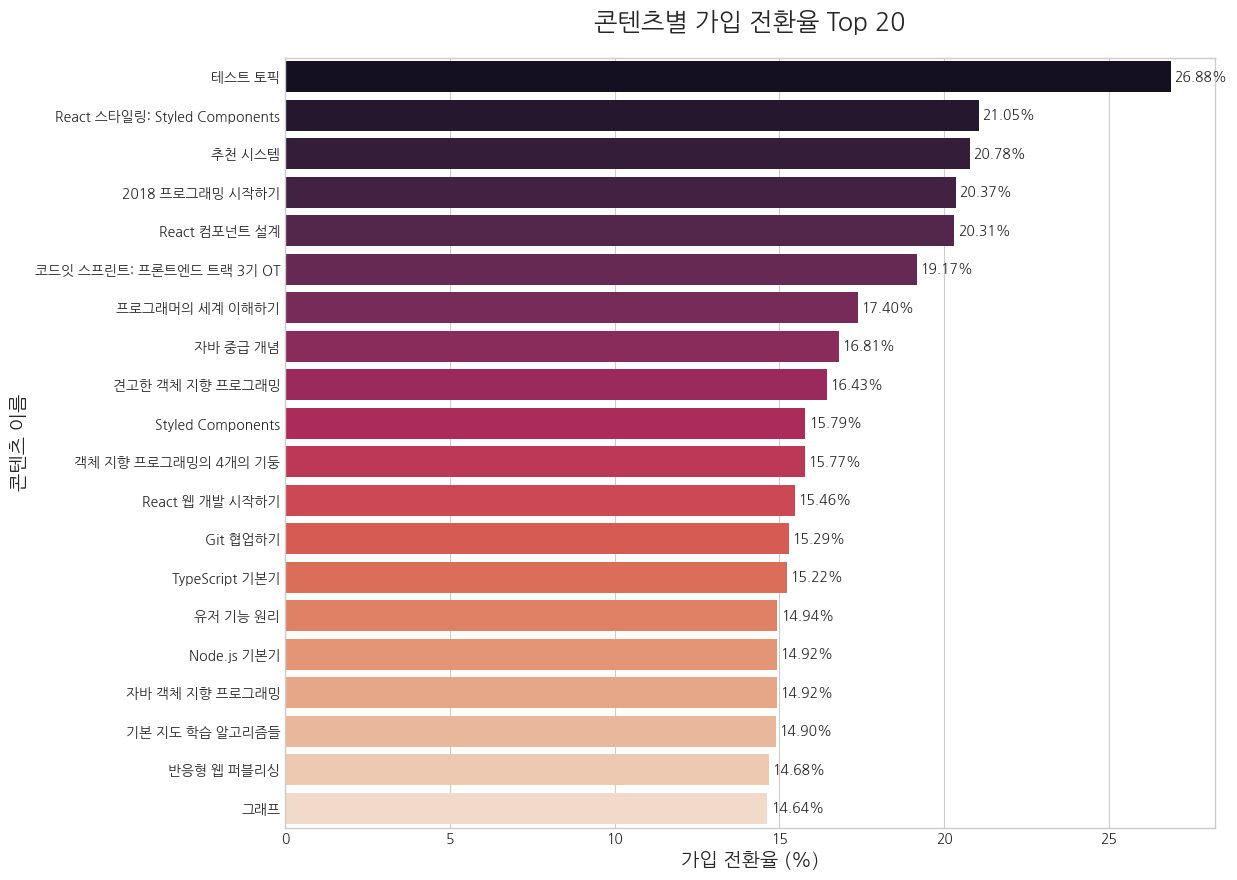

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏïÑÎûò Î≥ÄÏàòÎì§Ïù¥ Î™®Îëê Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. merged_df: ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê 'days_since_launch'Í∞Ä Ï∂îÍ∞ÄÎêú ÏôÑÏ†ÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# 2. signup_df: ÌöåÏõêÍ∞ÄÏûÖ Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)


# -------------------- 1Îã®Í≥Ñ: ÏΩòÌÖêÏ∏†Î≥Ñ 'Ï†ÑÏ≤¥ Í≤ΩÌóòÏûê Ïàò(Î∂ÑÎ™®)' Í≥ÑÏÇ∞ --------------------
print("‚úÖ 1Îã®Í≥Ñ: Í∞Å ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïú 'Ï†ÑÏ≤¥ Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò(Î∂ÑÎ™®)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# 'content.id'Î°ú Í∑∏Î£πÌôîÌïòÏó¨, Í∞Å ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïú Í≥†Ïú†Ìïú (date, fingerprint) Ï°∞Ìï©Ïùò ÏàòÎ•º ÏÖâÎãàÎã§.
total_viewers_per_content = final_merged_df.groupby('topic.name')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
total_viewers_per_content.name = 'total_viewers'


# -------------------- 2Îã®Í≥Ñ: ÏΩòÌÖêÏ∏†Î≥Ñ 'Í∞ÄÏûÖ Ï†ÑÌôòÏûê Ïàò(Î∂ÑÏûê)' Í≥ÑÏÇ∞ --------------------
print("‚úÖ 2Îã®Í≥Ñ: Í∞Å ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïòÍ≥† 'Í∞ÄÏûÖÌïú Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò(Î∂ÑÏûê)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Î®ºÏ†Ä, ÎπÑÌöåÏõê ÌôúÎèôÍ≥º Í∞ÄÏûÖ Í∏∞Î°ùÏùÑ Î™®Îëê Ïó∞Í≤∞Ìï©ÎãàÎã§. (Í∞ÄÏûÖÌïú Í≤ΩÏö∞Îßå ÎÇ®ÍπÄ)
attributed_df = pd.merge(
    final_merged_df[['date', 'fingerprint', 'topic.name']],
    signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)

# 'content.id'Î°ú Í∑∏Î£πÌôîÌïòÏó¨, Í∞ÄÏûÖÏúºÎ°ú Ï†ÑÌôòÎêú Í≥†Ïú†Ìïú (date, fingerprint) Ï°∞Ìï©Ïùò ÏàòÎ•º ÏÖâÎãàÎã§.
converters_per_content = attributed_df.groupby('topic.name')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
converters_per_content.name = 'converted_users'


# -------------------- 3Îã®Í≥Ñ: 'ÏΩòÌÖêÏ∏†Î≥Ñ Ï†ÑÌôòÏú®' Í≥ÑÏÇ∞ Î∞è ÏµúÏ¢Ö ÌÖåÏù¥Î∏î ÏÉùÏÑ± (ÏàòÏ†ï Î≤ÑÏ†Ñ) --------------------
print("‚úÖ 3Îã®Í≥Ñ: 'ÏΩòÌÖêÏ∏†Î≥Ñ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÏµúÏ¢Ö ÌÖåÏù¥Î∏îÏùÑ ÎßåÎì≠ÎãàÎã§...")

# Îëê SeriesÎ•º DataFrameÏúºÎ°ú Ìï©Ïπ©ÎãàÎã§.
content_conversion_df = pd.concat([total_viewers_per_content, converters_per_content], axis=1).fillna(0)

# Ï†ÑÌôòÏú®(%) Í≥ÑÏÇ∞
content_conversion_df['conversion_rate(%)'] = \
    (content_conversion_df['converted_users'] / content_conversion_df['total_viewers'] * 100).fillna(0)


# [ÌïµÏã¨ ÏàòÏ†ï] Î∂ÑÏÑùÏùò Ïã†Î¢∞ÎèÑÎ•º ÏúÑÌï¥, ÏµúÏÜå NÎ™Ö Ïù¥ÏÉÅÏù¥ Î≥∏ ÏΩòÌÖêÏ∏†Îßå ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§.
MINIMUM_VIEWERS = 50 # ÏµúÏÜå 50Î™Ö Ïù¥ÏÉÅÏù¥ Î≥∏ ÏΩòÌÖêÏ∏†Îßå ÎåÄÏÉÅÏúºÎ°ú Ìï® (Ïù¥ Ïà´ÏûêÎäî Ï°∞Ï†à Í∞ÄÎä•)
reliable_conversion_df = content_conversion_df[content_conversion_df['total_viewers'] >= MINIMUM_VIEWERS].copy()


# Ïã†Î¢∞ÎèÑ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ÑÌôòÏú®Ïù¥ ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§.
reliable_conversion_df.sort_values(by='conversion_rate(%)', ascending=False, inplace=True)


print("\n\n=======================================================")
print(f"  [ÏµúÏ¢Ö Í≤∞Í≥º] {MINIMUM_VIEWERS}Î™Ö Ïù¥ÏÉÅ ÏãúÏ≤≠Ìïú ÏΩòÌÖêÏ∏† Ï§ë, Í∞ÄÏûÖ Ï†ÑÌôòÏú® Top 20")
print("=======================================================")
print(reliable_conversion_df.head(20).round(2))


# -------------------- 4Îã®Í≥Ñ: ÏãúÍ∞ÅÌôî (Ïã†Î¢∞ÎèÑ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©) --------------------
# ÏãúÍ∞ÅÌôî ÎåÄÏÉÅÏùÑ reliable_conversion_dfÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
plot_df = reliable_conversion_df.head(20)


plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 10))

ax = sns.barplot(data=plot_df, x='conversion_rate(%)', y=plot_df.index, palette='rocket')

plt.title('ÏΩòÌÖêÏ∏†Î≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Top 20', fontsize=18, pad=20)
plt.xlabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=14)
plt.ylabel('ÏΩòÌÖêÏ∏† Ïù¥Î¶Ñ', fontsize=14)

# Í∞Å ÎßâÎåÄÏóê Í∞í ÌëúÏãú
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2, f'{width:.2f}%', va='center')

plt.show()

‚úÖ ÏµúÏ¢Ö Î∂ÑÏÑù: 'Ìö®Ïú®ÏÑ±(Ï†ÑÌôòÏú®)'Í≥º 'Í∏∞Ïó¨ÎèÑ(Í∞ÄÏûÖÏûê Ïàò)'Î•º ÎπÑÍµêÌïòÏó¨ ÏΩòÌÖêÏ∏†Î•º ÏßÑÎã®Ìï©ÎãàÎã§...


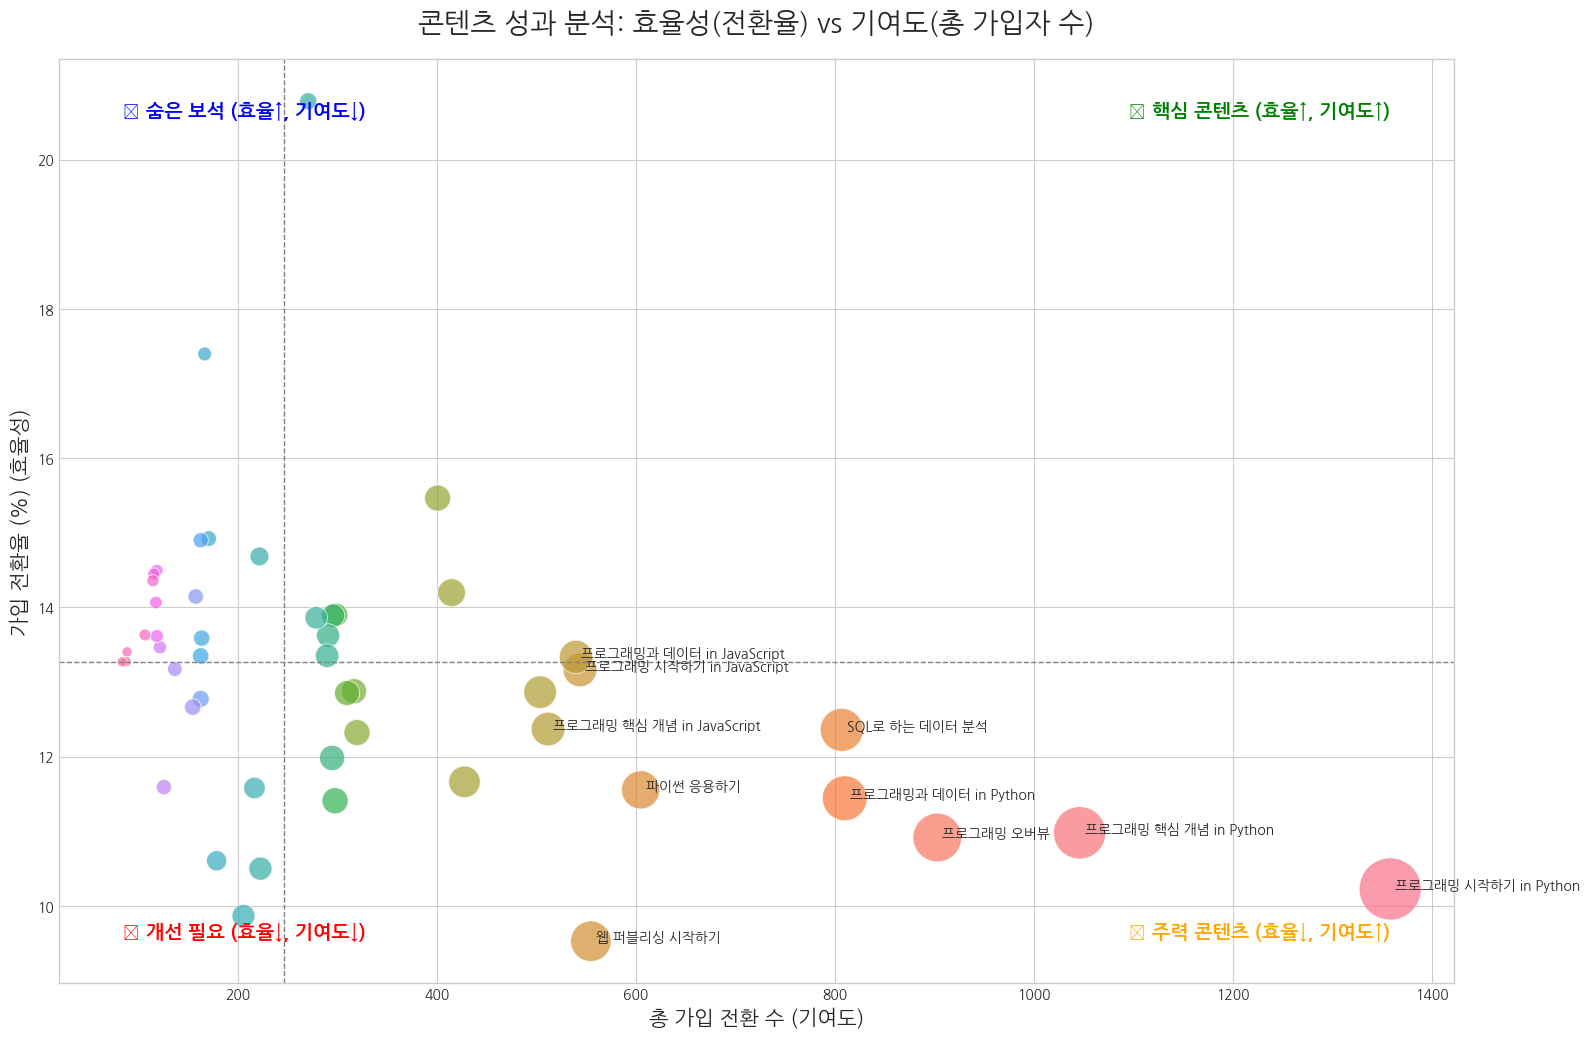

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú 'reliable_conversion_df'Í∞Ä ÏÉùÏÑ±Îêú ÏÉÅÌÉú
# (ÏµúÏÜå NÎ™Ö Ïù¥ÏÉÅ ÏãúÏ≤≠Ìïú ÏΩòÌÖêÏ∏†Îì§Ïùò Ï†ÑÌôòÏú® Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ)

# -------------------- 1Îã®Í≥Ñ: Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ --------------------
# ÏãúÍ∞ÅÌôîÏùò Í∞ÄÎèÖÏÑ±ÏùÑ ÏúÑÌï¥, 'Ï¥ù Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(converted_users)'Í∞Ä ÎßéÏùÄ ÏÉÅÏúÑ 50Í∞ú ÏΩòÌÖêÏ∏†Îßå ÎåÄÏÉÅÏúºÎ°ú Ìï©ÎãàÎã§.
plot_df = reliable_conversion_df.sort_values(by='converted_users', ascending=False).head(50)


# -------------------- 2Îã®Í≥Ñ: "Ìö®Ïú®ÏÑ± vs Í∏∞Ïó¨ÎèÑ" ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî --------------------
print("‚úÖ ÏµúÏ¢Ö Î∂ÑÏÑù: 'Ìö®Ïú®ÏÑ±(Ï†ÑÌôòÏú®)'Í≥º 'Í∏∞Ïó¨ÎèÑ(Í∞ÄÏûÖÏûê Ïàò)'Î•º ÎπÑÍµêÌïòÏó¨ ÏΩòÌÖêÏ∏†Î•º ÏßÑÎã®Ìï©ÎãàÎã§...")

plt.rc('font', family='NanumGothic')
plt.figure(figsize=(18, 12))

# ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î¶ΩÎãàÎã§. Ï†êÏùò ÌÅ¨Í∏∞(size)Îäî Ï†ÑÏ≤¥ ÏãúÏ≤≠Ïûê ÏàòÏóê ÎπÑÎ°ÄÌïòÎèÑÎ°ù ÌïòÏó¨ Ï∂îÍ∞Ä Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌï©ÎãàÎã§.
ax = sns.scatterplot(
    data=plot_df,
    x='converted_users',
    y='conversion_rate(%)',
    size='total_viewers', # Ï†êÏùò ÌÅ¨Í∏∞
    sizes=(50, 2000),    # Ï†ê ÌÅ¨Í∏∞ Î≤îÏúÑ
    hue=plot_df.index,   # Í∞Å Ï†êÏóê Îã§Î•∏ ÏÉâÏÉÅ Î∂ÄÏó¨ (Î≤îÎ°Ä Ïà®ÍπÄ)
    alpha=0.7,
    legend=False
)

# -------------------- 3Îã®Í≥Ñ: 4Î∂ÑÎ©¥ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä --------------------
# Í∞Å Ï∂ïÏùò Ï§ëÏïôÍ∞í(median)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú 4Í∞úÏùò ÏÇ¨Î∂ÑÎ©¥ÏùÑ ÎÇòÎàïÎãàÎã§.
median_conversions = plot_df['converted_users'].median()
median_rate = plot_df['conversion_rate(%)'].median()

ax.axhline(median_rate, color='grey', linestyle='--', linewidth=1)
ax.axvline(median_conversions, color='grey', linestyle='--', linewidth=1)


# -------------------- 4Îã®Í≥Ñ: Ï£ºÏöî ÏΩòÌÖêÏ∏† ÎùºÎ≤®ÎßÅ Î∞è ÏÇ¨Î∂ÑÎ©¥ ÏÑ§Î™Ö Ï∂îÍ∞Ä --------------------
# ÏÉÅÏúÑ 10Í∞ú Ï£ºÏöî ÏΩòÌÖêÏ∏†ÏóêÎßå Ïù¥Î¶ÑÏùÑ ÌëúÏãúÌïòÏó¨ Í∞ÄÎèÖÏÑ±ÏùÑ ÎÜíÏûÖÎãàÎã§.
top_10_contents = plot_df.head(10)
for i, point in top_10_contents.iterrows():
    plt.text(point['converted_users'] + 5, point['conversion_rate(%)'], str(i), fontsize=10)

# Í∞Å ÏÇ¨Î∂ÑÎ©¥Ïóê ÎåÄÌïú ÏÑ§Î™Ö Ï∂îÍ∞Ä
plt.text(plot_df['converted_users'].max(), plot_df['conversion_rate(%)'].max(), 'üåü ÌïµÏã¨ ÏΩòÌÖêÏ∏† (Ìö®Ïú®‚Üë, Í∏∞Ïó¨ÎèÑ‚Üë)', ha='right', va='top', fontsize=14, color='green', weight='bold')
plt.text(plot_df['converted_users'].min(), plot_df['conversion_rate(%)'].max(), 'üíé Ïà®ÏùÄ Î≥¥ÏÑù (Ìö®Ïú®‚Üë, Í∏∞Ïó¨ÎèÑ‚Üì)', ha='left', va='top', fontsize=14, color='blue', weight='bold')
plt.text(plot_df['converted_users'].max(), plot_df['conversion_rate(%)'].min(), 'üí™ Ï£ºÎ†• ÏΩòÌÖêÏ∏† (Ìö®Ïú®‚Üì, Í∏∞Ïó¨ÎèÑ‚Üë)', ha='right', va='bottom', fontsize=14, color='orange', weight='bold')
plt.text(plot_df['converted_users'].min(), plot_df['conversion_rate(%)'].min(), 'ü§î Í∞úÏÑ† ÌïÑÏöî (Ìö®Ïú®‚Üì, Í∏∞Ïó¨ÎèÑ‚Üì)', ha='left', va='bottom', fontsize=14, color='red', weight='bold')


# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.title('ÏΩòÌÖêÏ∏† ÏÑ±Í≥º Î∂ÑÏÑù: Ìö®Ïú®ÏÑ±(Ï†ÑÌôòÏú®) vs Í∏∞Ïó¨ÎèÑ(Ï¥ù Í∞ÄÏûÖÏûê Ïàò)', fontsize=20, pad=20)
plt.xlabel('Ï¥ù Í∞ÄÏûÖ Ï†ÑÌôò Ïàò (Í∏∞Ïó¨ÎèÑ)', fontsize=15)
plt.ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%) (Ìö®Ïú®ÏÑ±)', fontsize=15)
plt.grid(True)
plt.show()

‚úÖ 1Îã®Í≥Ñ: Í∞Å ÏΩòÌÖêÏ∏†Ïóê 'ÏÑ±Í≥º Í∑∏Î£π' ÎùºÎ≤®ÏùÑ Î∂ÄÏó¨Ìï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò ÏÉÅÏÑ∏ ÌäπÏßï Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌïòÍ≥† Î≥ëÌï©Ìï©ÎãàÎã§...
‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÎ≥Ñ ÌäπÏßïÏùÑ ÏßëÍ≥ÑÌïòÍ≥† Î∂ÑÏÑùÌï©ÎãàÎã§...


--- [Î∂ÑÏÑù 1] Í∞Å Í∑∏Î£πÎ≥Ñ ÎåÄÌëú ÏΩòÌÖêÏ∏† (Í∞ÄÏûÖ Í∏∞Ïó¨ÎèÑ Ïàú) ---

--- üåü ÌïµÏã¨ ÏΩòÌÖêÏ∏† ---
                        Í∞ïÏùòÏ†úÎ™©  conversion_rate(%)  converted_users
50  ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÏãúÏûëÌïòÍ∏∞ in JavaScript           13.162352            544.0
46  ÌîÑÎ°úÍ∑∏ÎûòÎ∞çÍ≥º Îç∞Ïù¥ÌÑ∞ in JavaScript           13.336626            540.0
55             Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ïñ∏Ïä§ ÏãúÏûëÌïòÍ∏∞           12.863706            504.0
26                       Git           14.197742            415.0
11           React Ïõπ Í∞úÎ∞ú ÏãúÏûëÌïòÍ∏∞           15.464713            401.0

--- üíé Ïà®ÏùÄ Î≥¥ÏÑù ---
                   Í∞ïÏùòÏ†úÎ™©  conversion_rate(%)  converted_users
36       Django Î™®Îç∏ ÌååÌó§ÏπòÍ∏∞           13.644860             73.0
10  Í∞ùÏ≤¥ ÏßÄÌñ• 

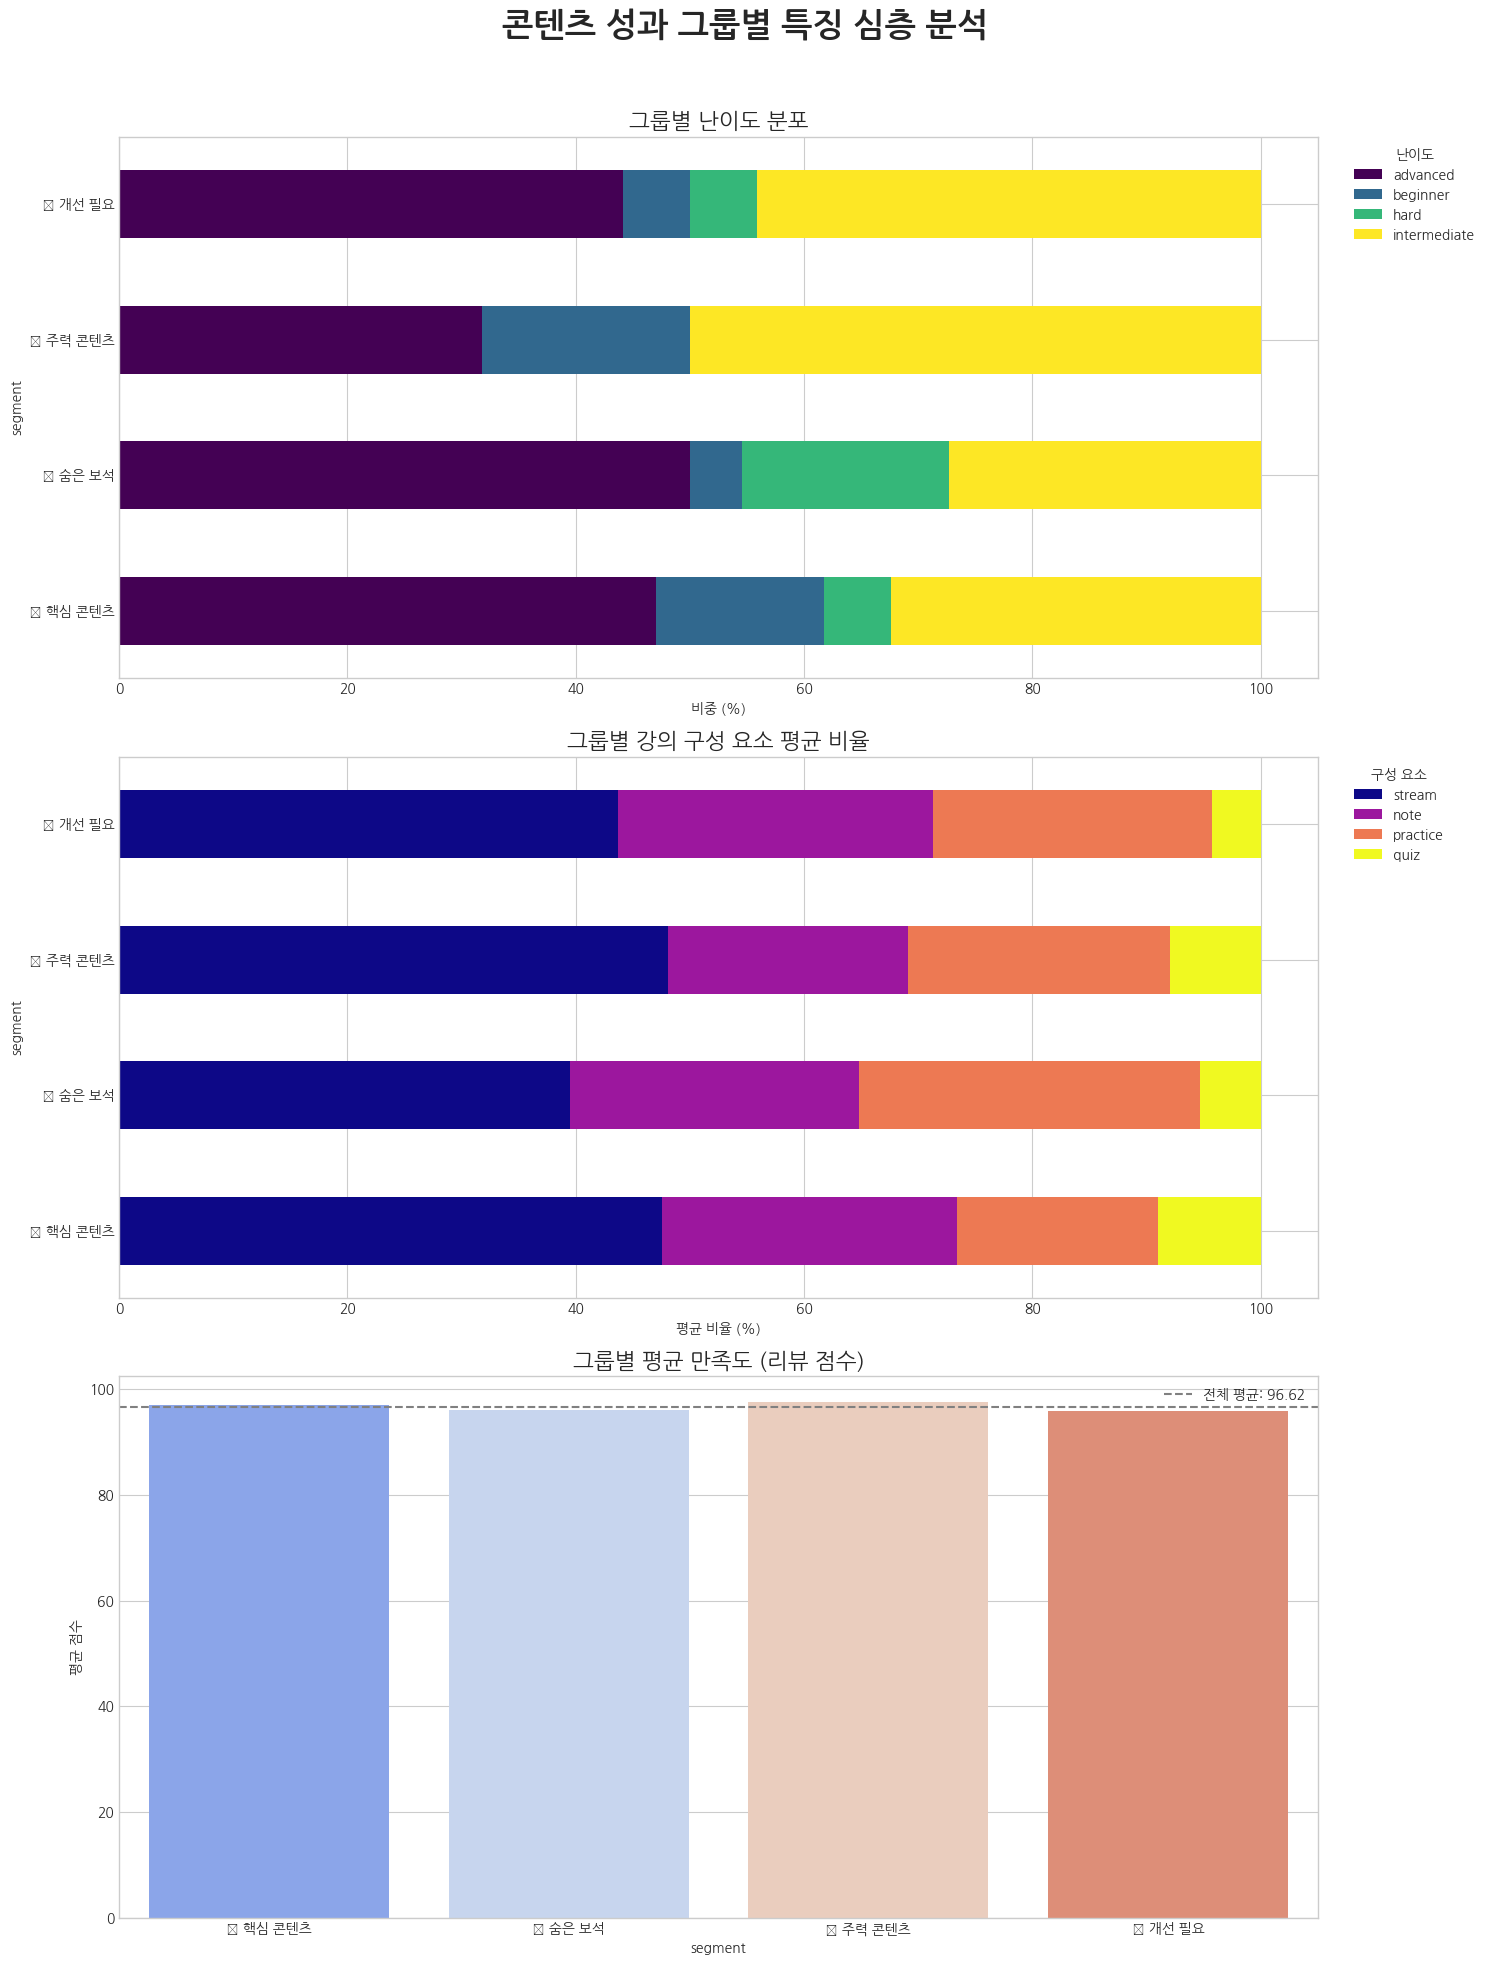

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# [Í∞ÄÏ†ï]
# 1. reliable_conversion_df: 'Ïã†Î¢∞ÎèÑ ÌïÑÌÑ∞ÎßÅ'Ïù¥ Ï†ÅÏö©Îêú ÏΩòÌÖêÏ∏†Î≥Ñ Ï†ÑÌôòÏú® Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
#    (Ïù¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÎäî 'total_viewers', 'converted_users', 'conversion_rate(%)'Í∞Ä Ìè¨Ìï®ÎêòÏñ¥Ïïº Ìï®)
# 2. final_merged_df: Î™®Îì† Ï†ïÎ≥¥Í∞Ä ÌÜµÌï©Îêú ÏõêÎ≥∏ Î°úÍ∑∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
#    ('content.id', 'content.difficulty', 'stream', 'note', 'prictice', 'quiz', 'review_point' Îì± Ìè¨Ìï®)

# -------------------- 1Îã®Í≥Ñ: Í∞Å ÏΩòÌÖêÏ∏†Ïóê 'ÏÑ±Í≥º Í∑∏Î£π' ÎùºÎ≤®ÎßÅÌïòÍ∏∞ --------------------
print("‚úÖ 1Îã®Í≥Ñ: Í∞Å ÏΩòÌÖêÏ∏†Ïóê 'ÏÑ±Í≥º Í∑∏Î£π' ÎùºÎ≤®ÏùÑ Î∂ÄÏó¨Ìï©ÎãàÎã§...")

# Î∂ÑÏÑù ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î≥µÏÇ¨ÌïòÏó¨ ÏïàÏ†ÑÌïòÍ≤å ÏûëÏóÖ
analysis_df = reliable_conversion_df.copy()

# 4Î∂ÑÎ©¥ÏùÑ ÎÇòÎàÑÍ∏∞ ÏúÑÌïú Ï§ëÏïôÍ∞í(median) Í≥ÑÏÇ∞
median_conversions = analysis_df['converted_users'].median()
median_rate = analysis_df['conversion_rate(%)'].median()

# Í∞Å ÏΩòÌÖêÏ∏†Ïóê Í∑∏Î£πÏùÑ Ìï†ÎãπÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def assign_segment(row):
    if row['conversion_rate(%)'] >= median_rate and row['converted_users'] >= median_conversions:
        return 'üåü ÌïµÏã¨ ÏΩòÌÖêÏ∏†'
    elif row['conversion_rate(%)'] >= median_rate and row['converted_users'] < median_conversions:
        return 'üíé Ïà®ÏùÄ Î≥¥ÏÑù'
    elif row['conversion_rate(%)'] < median_rate and row['converted_users'] >= median_conversions:
        return 'üí™ Ï£ºÎ†• ÏΩòÌÖêÏ∏†'
    else:
        return 'ü§î Í∞úÏÑ† ÌïÑÏöî'

# ÏúÑ Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ 'segment' Ïª¨Îüº ÏÉùÏÑ±
analysis_df['segment'] = analysis_df.apply(assign_segment, axis=1)


# -------------------- 2Îã®Í≥Ñ: 'ÏÑ±Í≥º Í∑∏Î£π'Î≥Ñ ÌäπÏßï Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú Î∞è Î≥ëÌï© --------------------
print("‚úÖ 2Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò ÏÉÅÏÑ∏ ÌäπÏßï Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌïòÍ≥† Î≥ëÌï©Ìï©ÎãàÎã§...")

# id_info_df ÎòêÎäî Ïú†ÏÇ¨Ìïú Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÉÅÏÑ∏ Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî final_merged_dfÏóêÏÑú Í≥†Ïú†Ìïú ÏΩòÌÖêÏ∏† Ï†ïÎ≥¥Îßå Ï∂îÏ∂úÌïòÏó¨ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
content_details_df = final_merged_df[[
    'content.id', 'topic.name', 'content.difficulty', 'stream', 'note',
    'practice', 'quiz', 'review_point'
]].drop_duplicates(subset=['content.id'])

# 'ÏÑ±Í≥º Í∑∏Î£π' Ï†ïÎ≥¥ÏôÄ 'ÏΩòÌÖêÏ∏† ÏÉÅÏÑ∏ Ï†ïÎ≥¥'Î•º content.idÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
# (topic.nameÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú, reset_index() ÌõÑ merge)
final_analysis_df = pd.merge(
    analysis_df.reset_index().rename(columns={'topic.name': 'Í∞ïÏùòÏ†úÎ™©'}),
    content_details_df.rename(columns={'topic.name': 'Í∞ïÏùòÏ†úÎ™©'}),
    on='Í∞ïÏùòÏ†úÎ™©',
    how='left'
)


# -------------------- 3Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ ÌäπÏßï ÏßëÍ≥Ñ Î∞è Î∂ÑÏÑù --------------------
print("‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÎ≥Ñ ÌäπÏßïÏùÑ ÏßëÍ≥ÑÌïòÍ≥† Î∂ÑÏÑùÌï©ÎãàÎã§...")

# --- Î∂ÑÏÑù 1: Í∑∏Î£πÎ≥Ñ ÏΩòÌÖêÏ∏† Î™©Î°ù ---
print("\n\n--- [Î∂ÑÏÑù 1] Í∞Å Í∑∏Î£πÎ≥Ñ ÎåÄÌëú ÏΩòÌÖêÏ∏† (Í∞ÄÏûÖ Í∏∞Ïó¨ÎèÑ Ïàú) ---")
for segment_name in ['üåü ÌïµÏã¨ ÏΩòÌÖêÏ∏†', 'üíé Ïà®ÏùÄ Î≥¥ÏÑù', 'üí™ Ï£ºÎ†• ÏΩòÌÖêÏ∏†', 'ü§î Í∞úÏÑ† ÌïÑÏöî']:
    print(f"\n--- {segment_name} ---")
    segment_contents = final_analysis_df[final_analysis_df['segment'] == segment_name]
    print(segment_contents.sort_values(by='converted_users', ascending=False)[['Í∞ïÏùòÏ†úÎ™©', 'conversion_rate(%)', 'converted_users']].head(5))

# --- Î∂ÑÏÑù 2: ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ ---
difficulty_dist = final_analysis_df.groupby('segment')['content.difficulty'].value_counts(normalize=True).unstack().fillna(0) * 100

# --- Î∂ÑÏÑù 3: Í∞ïÏùò Íµ¨ÏÑ± ÎπÑÏú® ---
composition_cols = ['stream', 'note', 'practice', 'quiz']
composition_mean = final_analysis_df.groupby('segment')[composition_cols].mean()
composition_ratio = composition_mean.div(composition_mean.sum(axis=1), axis=0) * 100

# --- Î∂ÑÏÑù 4: ÌèâÍ∑† ÎßåÏ°±ÎèÑ ---
satisfaction_comparison = final_analysis_df.groupby('segment')['review_point'].mean()


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ï¢ÖÌï©ÌïòÏó¨ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
plt.rc('font', family='NanumGothic')
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle('ÏΩòÌÖêÏ∏† ÏÑ±Í≥º Í∑∏Î£πÎ≥Ñ ÌäπÏßï Ïã¨Ï∏µ Î∂ÑÏÑù', fontsize=24, weight='bold')

# Í∑∏ÎûòÌîÑ 1: ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨ (100% ÎàÑÏ†Å ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
difficulty_dist.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Í∑∏Î£πÎ≥Ñ ÎÇúÏù¥ÎèÑ Î∂ÑÌè¨', fontsize=16)
axes[0].set_xlabel('ÎπÑÏ§ë (%)')
axes[0].legend(title='ÎÇúÏù¥ÎèÑ', bbox_to_anchor=(1.02, 1), loc='upper left')

# Í∑∏ÎûòÌîÑ 2: Í∞ïÏùò Íµ¨ÏÑ± ÎπÑÏú® (100% ÎàÑÏ†Å ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
composition_ratio.plot(kind='barh', stacked=True, ax=axes[1], colormap='plasma')
axes[1].set_title('Í∑∏Î£πÎ≥Ñ Í∞ïÏùò Íµ¨ÏÑ± ÏöîÏÜå ÌèâÍ∑† ÎπÑÏú®', fontsize=16)
axes[1].set_xlabel('ÌèâÍ∑† ÎπÑÏú® (%)')
axes[1].legend(title='Íµ¨ÏÑ± ÏöîÏÜå', bbox_to_anchor=(1.02, 1), loc='upper left')

# Í∑∏ÎûòÌîÑ 3: ÌèâÍ∑† ÎßåÏ°±ÎèÑ ÎπÑÍµê (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
sns.barplot(x=satisfaction_comparison.index, y=satisfaction_comparison.values, ax=axes[2], palette='coolwarm')
axes[2].axhline(final_analysis_df['review_point'].mean(), color='grey', linestyle='--', label=f"Ï†ÑÏ≤¥ ÌèâÍ∑†: {final_analysis_df['review_point'].mean():.2f}")
axes[2].set_title('Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† ÎßåÏ°±ÎèÑ (Î¶¨Î∑∞ Ï†êÏàò)', fontsize=16)
axes[2].set_ylabel('ÌèâÍ∑† Ï†êÏàò')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
sub_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/complete.subscription.csv', parse_dates=['client_event_time'])
renew_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/renew.subscription.csv', parse_dates=['client_event_time'])
resub_df = pd.read_csv('/content/drive/MyDrive/codeit/Colab Notebooks/project2/resubscribe.subscription.csv', parse_dates=['client_event_time'])

sub = sub_df.groupby(sub_df['client_event_time'].dt.year)['user_id'].nunique()
renew = renew_df.groupby(renew_df['client_event_time'].dt.year)['user_id'].nunique()
resub = resub_df.groupby(resub_df['client_event_time'].dt.year)['user_id'].nunique()
print("=== Íµ¨ÎèÖ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ===")
print("Íµ¨ÎèÖ ÏãúÏûë:", sub)
print("Íµ¨ÎèÖ Í∞±Ïã†:", renew)
print("Ïû¨Íµ¨ÎèÖ:", resub)

=== Íµ¨ÎèÖ Í¥ÄÎ†® Îç∞Ïù¥ÌÑ∞ ===
Íµ¨ÎèÖ ÏãúÏûë: client_event_time
2022    6596
2023    7302
Name: user_id, dtype: int64
Íµ¨ÎèÖ Í∞±Ïã†: client_event_time
2022    2939
2023    5563
Name: user_id, dtype: int64
Ïû¨Íµ¨ÎèÖ: client_event_time
2022    151
2023    621
Name: user_id, dtype: int64


In [ ]:
import pandas as pd

# -------------------- 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÏßÄÎ¨∏ ÏÉùÏÑ± --------------------
print("‚úÖ 1Îã®Í≥Ñ: ÎπÑÌöåÏõê Î∞è ÌöåÏõêÍ∞ÄÏûÖ Îç∞Ïù¥ÌÑ∞Ïóê 'ÎîîÏßÄÌÑ∏ ÏßÄÎ¨∏'ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...")

# Î∂ÑÏÑùÏùò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î≥µÏÇ¨ÌïòÏó¨ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
non_member_df = null_id_enter_lesson_df.copy()
signup_df = complete_signup_df.copy()

# ÏßÄÎ¨∏ÏúºÎ°ú ÏÇ¨Ïö©Ìï† Ïª¨Îüº Î™©Î°ù
fingerprint_cols = ['city', 'device_family', 'device_type', 'os_name', 'os_version', 'platform']

# ÎπÑÌöåÏõê Îç∞Ïù¥ÌÑ∞Ïóê ÏßÄÎ¨∏ ÏÉùÏÑ± (Í≤∞Ï∏°Í∞íÏùÄ 'NA' Î¨∏ÏûêÏó¥Î°ú Ï≤òÎ¶¨ÌïòÏó¨ ÏïàÏ†ïÏÑ± ÌôïÎ≥¥)
non_member_df['fingerprint'] = non_member_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
non_member_df['date'] = non_member_df['client_event_time'].dt.date

# ÌöåÏõêÍ∞ÄÏûÖ Îç∞Ïù¥ÌÑ∞Ïóê ÏßÄÎ¨∏ ÏÉùÏÑ±
signup_df['fingerprint'] = signup_df[fingerprint_cols].fillna('NA').astype(str).agg('_'.join, axis=1)
signup_df['date'] = signup_df['client_event_time'].dt.date


# -------------------- 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÌôúÎèôÍ≥º ÌöåÏõêÍ∞ÄÏûÖ Ïó∞Í≤∞ --------------------
print("‚úÖ 2Îã®Í≥Ñ: 'ÎÇ†Ïßú'ÏôÄ 'ÏßÄÎ¨∏'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îëê Îç∞Ïù¥ÌÑ∞Î•º Î≥ëÌï©Ìï©ÎãàÎã§...")

# 'ÎÇ†Ïßú'ÏôÄ 'ÏßÄÎ¨∏'Ïù¥ Í∞ôÏùÄ Í∏∞Î°ùÏùÑ Î™®Îëê Ïó∞Í≤∞Ìï©ÎãàÎã§.
attributed_df = pd.merge(
    non_member_df[['date', 'fingerprint', 'client_event_time', 'content.id']],
    signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_watch', '_signup')
)

# -------------------- 3Îã®Í≥Ñ: ÎÖºÎ¶¨Ï†Å ÌïÑÌÑ∞ÎßÅ Î∞è ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± --------------------
print("‚úÖ 3Îã®Í≥Ñ: ÎÖºÎ¶¨Ï†Å ÌïÑÌÑ∞ÎßÅÏùÑ ÌÜµÌï¥ 'Í∞ÄÏûÖÏóê Í∏∞Ïó¨Ìïú ÌôúÎèô'ÏùÑ ÏµúÏ¢Ö Ï†ïÏùòÌï©ÎãàÎã§...")

# 3-1. ÎπÑÌöåÏõê ÌôúÎèôÏù¥ ÌöåÏõêÍ∞ÄÏûÖÎ≥¥Îã§ 'Î®ºÏ†Ä' Î∞úÏÉùÌïú Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§.
attributed_df = attributed_df[attributed_df['client_event_time_watch'] < attributed_df['client_event_time_signup']].copy()

# 3-2. Í∞ÄÏûÖ ÏãúÍ∞ÑÍ≥º ÌôúÎèô ÏãúÍ∞ÑÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
attributed_df['time_diff'] = attributed_df['client_event_time_signup'] - attributed_df['client_event_time_watch']

# 3-3. Í∞Å 'ÌöåÏõêÍ∞ÄÏûÖ' Ïù¥Î≤§Ìä∏Ïóê ÎåÄÌï¥, ÏãúÍ∞Ñ Ï∞®Ïù¥Í∞Ä Í∞ÄÏû• Ï†ÅÏùÄ (Í∞ÄÏû• ÏßÅÏ†ÑÏùò) ÌôúÎèôÎßå ÎÇ®ÍπÅÎãàÎã§.
#      Î®ºÏ†Ä ÏãúÍ∞Ñ Ï∞®Ïù¥Î°ú Ï†ïÎ†¨Ìï©ÎãàÎã§.
attributed_df.sort_values(by='time_diff', ascending=True, inplace=True)
#      Í∑∏ Îã§Ïùå, Í∞Å Í∞ÄÏûÖ Ïù¥Î≤§Ìä∏Î≥ÑÎ°ú Ï≤´ Î≤àÏß∏ Í∏∞Î°ùÎßå ÎÇ®ÍπÅÎãàÎã§.
final_attributed_df = attributed_df.drop_duplicates(subset=['user_id', 'client_event_time_signup'], keep='first')


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º ÌôïÏù∏ --------------------
print("\n\n=============================================")
print("  [ÏÉùÏÑ± ÏôÑÎ£å] Í∞ÄÏûÖ Í∏∞Ïó¨ ÌôúÎèô Îç∞Ïù¥ÌÑ∞ (final_attributed_df)")
print("=============================================")
print(f"  - Ï¥ù {len(final_attributed_df):,}Í∞úÏùò Í∞ÄÏûÖ Í∏∞Ïó¨ ÌôúÎèôÏùÑ ÏãùÎ≥ÑÌñàÏäµÎãàÎã§.")

print("\n--- Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ (info) ---")
print(final_attributed_df.info())

print("\n--- Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå (head) ---")
print(final_attributed_df.head())

‚úÖ 1Îã®Í≥Ñ: ÎπÑÌöåÏõê Î∞è ÌöåÏõêÍ∞ÄÏûÖ Îç∞Ïù¥ÌÑ∞Ïóê 'ÎîîÏßÄÌÑ∏ ÏßÄÎ¨∏'ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: 'ÎÇ†Ïßú'ÏôÄ 'ÏßÄÎ¨∏'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îëê Îç∞Ïù¥ÌÑ∞Î•º Î≥ëÌï©Ìï©ÎãàÎã§...
‚úÖ 3Îã®Í≥Ñ: ÎÖºÎ¶¨Ï†Å ÌïÑÌÑ∞ÎßÅÏùÑ ÌÜµÌï¥ 'Í∞ÄÏûÖÏóê Í∏∞Ïó¨Ìïú ÌôúÎèô'ÏùÑ ÏµúÏ¢Ö Ï†ïÏùòÌï©ÎãàÎã§...


  [ÏÉùÏÑ± ÏôÑÎ£å] Í∞ÄÏûÖ Í∏∞Ïó¨ ÌôúÎèô Îç∞Ïù¥ÌÑ∞ (final_attributed_df)
  - Ï¥ù 5,932Í∞úÏùò Í∞ÄÏûÖ Í∏∞Ïó¨ ÌôúÎèôÏùÑ ÏãùÎ≥ÑÌñàÏäµÎãàÎã§.

--- Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ (info) ---
<class 'pandas.core.frame.DataFrame'>
Index: 5932 entries, 140586 to 10372
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   date                      5932 non-null   object         
 1   fingerprint               5932 non-null   object         
 2   client_event_time_watch   5932 non-null   datetime64[ns] 
 3   content.id                5932 non-null   object         
 4   user_id                   5932 non-null   object         
 

In [ ]:
# 1-1. 'Ï≤´ Îì±Ïû•Ïùº' Ï†ïÎ≥¥Î•º Í∞ÄÏûÖ Í∏∞Ïó¨ ÌôúÎèô Îç∞Ïù¥ÌÑ∞Ïóê Ìï©Ïπ®
analysis_df = pd.merge(final_attributed_df, null_id_first_seen_series, on='content.id', how='left')
analysis_df['days_since_launch'] = (analysis_df['client_event_time_watch'] - analysis_df['first_seen_by_non_member']).dt.days

# 1-2. 'Ïã†Í∑ú' Í∏∞Ï§Ä(30Ïùº)ÏúºÎ°ú 'experience_type' Ïª¨Îüº ÏÉùÏÑ±
analysis_df['experience_type'] = np.where(analysis_df['days_since_launch'] <= 30, 'Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π', 'Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£π')

# 1-2. 'Ïã†Í∑ú' Í∏∞Ï§Ä(30Ïùº)ÏúºÎ°ú 'experience_type' Ïª¨Îüº ÏÉùÏÑ±
analysis_df['experience_type'] = np.where(analysis_df['days_since_launch'] <= 30, 'Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π', 'Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£π')

# 1-3. Í∞Å Í∑∏Î£πÏóê ÏÜçÌïú Í≥†Ïú†Ìïú user_id Î™©Î°ù(set)ÏùÑ Ï∂îÏ∂ú
new_exp_users = set(analysis_df[analysis_df['experience_type'] == 'Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π']['user_id'].unique())
old_exp_users = set(analysis_df[analysis_df['experience_type'] == 'Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£π']['user_id'].unique())

print(f"Ïã†Í∑ú ÏΩòÌÖêÏ∏† Í≤ΩÌóò ÌõÑ Í∞ÄÏûÖÏûê Ïàò: {len(new_exp_users)}Î™Ö")
print(f"Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Í≤ΩÌóò ÌõÑ Í∞ÄÏûÖÏûê Ïàò: {len(old_exp_users)}Î™Ö")

Ïã†Í∑ú ÏΩòÌÖêÏ∏† Í≤ΩÌóò ÌõÑ Í∞ÄÏûÖÏûê Ïàò: 404Î™Ö
Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Í≤ΩÌóò ÌõÑ Í∞ÄÏûÖÏûê Ïàò: 5528Î™Ö


In [ ]:
# 2-1. Ï†ÑÏ≤¥ Íµ¨ÎèÖÏûê(Ïã†Í∑ú Íµ¨ÎèÖ)Ïùò user_id Î™©Î°ùÏùÑ setÏúºÎ°ú ÎßåÎì¶
subscribers = set(sub_df['user_id'].unique())

# 2-2. Í∞Å Í∑∏Î£πÍ≥º Ï†ÑÏ≤¥ Íµ¨ÎèÖÏûêÏùò ÍµêÏßëÌï©ÏùÑ Íµ¨ÌïòÏó¨, Í∑∏Î£πÎ≥Ñ 'Íµ¨ÎèÖ Ï†ÑÌôòÏûê Ïàò'Î•º Í≥ÑÏÇ∞
new_exp_subscribers = len(new_exp_users.intersection(subscribers))
old_exp_subscribers = len(old_exp_users.intersection(subscribers))

# 2-3. Í∑∏Î£πÎ≥Ñ Íµ¨ÎèÖ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conv_rate_new_to_sub = (new_exp_subscribers / len(new_exp_users) * 100) if len(new_exp_users) > 0 else 0
conv_rate_old_to_sub = (old_exp_subscribers / len(old_exp_users) * 100) if len(old_exp_users) > 0 else 0

print(f"\n--- Íµ¨ÎèÖ Ï†ÑÌôòÏú® ÎπÑÍµê ---")
print(f"Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®: {conv_rate_new_to_sub:.2f}%")
print(f"Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®: {conv_rate_old_to_sub:.2f}%")


--- Íµ¨ÎèÖ Ï†ÑÌôòÏú® ÎπÑÍµê ---
Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®: 5.20%
Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®: 11.20%


In [ ]:
# 3-1. Í∞Å Í∑∏Î£πÏóê ÏÜçÌïú ÏÇ¨Ïö©ÏûêÎì§Ïùò 'Íµ¨ÎèÖ Í∞±Ïã†' Í∏∞Î°ùÎßå ÌïÑÌÑ∞ÎßÅ
renew_logs_new_exp = renew_df[renew_df['user_id'].isin(new_exp_users)]
renew_logs_old_exp = renew_df[renew_df['user_id'].isin(old_exp_users)]

# 3-2. Í∑∏Î£πÎ≥Ñ Ï¥ù Í∞±Ïã† ÌöüÏàòÎ•º Í≥ÑÏÇ∞
total_renews_new = len(renew_logs_new_exp)
total_renews_old = len(renew_logs_old_exp)

# 3-3. 1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò Í≥ÑÏÇ∞ (LTV ÎåÄÎ¶¨ ÏßÄÌëú)
avg_renews_new = total_renews_new / len(new_exp_users) if len(new_exp_users) > 0 else 0
avg_renews_old = total_renews_old / len(old_exp_users) if len(old_exp_users) > 0 else 0

print(f"\n--- LTV (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ÎπÑÍµê ---")
print(f"Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£πÏùò 1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò: {avg_renews_new:.2f}Ìöå")
print(f"Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£πÏùò 1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò: {avg_renews_old:.2f}Ìöå")


--- LTV (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ÎπÑÍµê ---
Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£πÏùò 1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò: 0.06Ìöå
Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£πÏùò 1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò: 0.11Ìöå




--- [ÏµúÏ¢Ö Í≤∞Í≥º] Í∑∏Î£πÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò ÎπÑÍµê ---
          Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)  1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò
Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π        5.2          0.06
Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£π       11.2          0.11


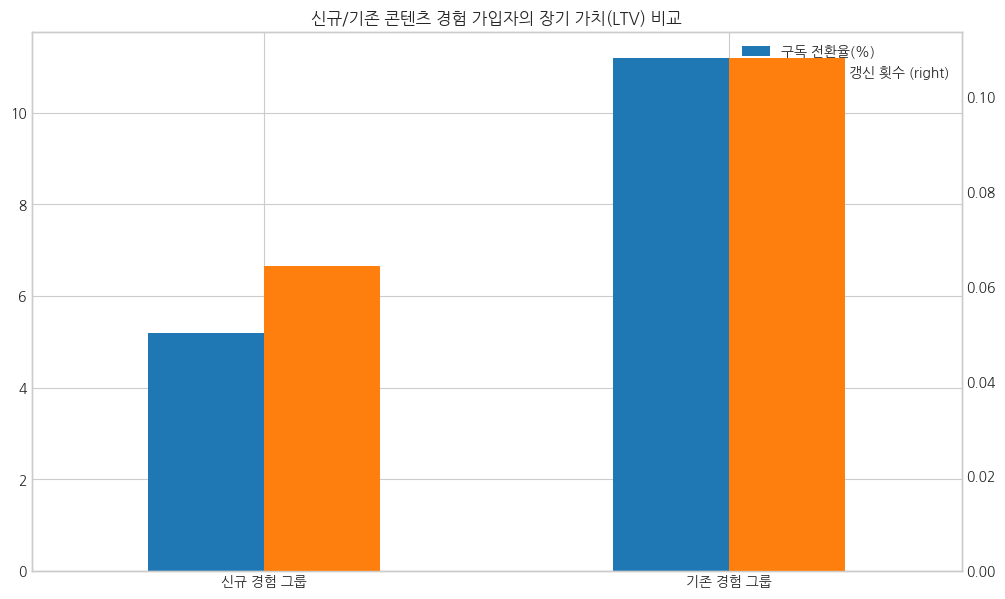

In [ ]:
# ÏµúÏ¢Ö Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
ltv_analysis_df = pd.DataFrame({
    'Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)': [conv_rate_new_to_sub, conv_rate_old_to_sub],
    '1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò': [avg_renews_new, avg_renews_old]
}, index=['Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π', 'Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£π'])

print("\n\n--- [ÏµúÏ¢Ö Í≤∞Í≥º] Í∑∏Î£πÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò ÎπÑÍµê ---")
print(ltv_analysis_df.round(2))

# ÏãúÍ∞ÅÌôî
ltv_analysis_df.plot(
    kind='bar',
    figsize=(12, 7),
    rot=0,
    secondary_y='1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò', # Îëê ÏßÄÌëúÏùò Ïä§ÏºÄÏùºÏù¥ Îã§Î•¥ÎØÄÎ°ú Ïù¥Ï§ë Ï∂ï ÏÇ¨Ïö©
    title='Ïã†Í∑ú/Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Í≤ΩÌóò Í∞ÄÏûÖÏûêÏùò Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê'
)
plt.show()

In [ ]:
# [ÎîîÎ≤ÑÍπÖ ÏΩîÎìú Ï∂îÍ∞Ä]
# LTV Í≥ÑÏÇ∞ Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÍ∏∞ Ï†ÑÏóê, Ïû¨Î£åÍ∞Ä ÎêòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïã§Ï†ú Íµ¨Ï°∞Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
print("\n--- [ÎîîÎ≤ÑÍπÖ] sub_dfÏùò Ïã§Ï†ú Ï†ïÎ≥¥ ---")
print(sub_df.info())
print("\n--- [ÎîîÎ≤ÑÍπÖ] sub_dfÏùò ÏÉÅÏúÑ 5Ï§Ñ ---")
print(sub_df.head())

print("\n--- [ÎîîÎ≤ÑÍπÖ] renew_dfÏùò Ïã§Ï†ú Ï†ïÎ≥¥ ---")
print(renew_df.info())
print("\n--- [ÎîîÎ≤ÑÍπÖ] renew_dfÏùò ÏÉÅÏúÑ 5Ï§Ñ ---")
print(renew_df.head())


# Ïù¥ ÏïÑÎûò ÏΩîÎìúÏóêÏÑú LTV Í≥ÑÏÇ∞ Ìï®ÏàòÍ∞Ä Ìò∏Ï∂úÎê©ÎãàÎã§.
# cr_new, ltv_new = calculate_ltv_metrics(pure_new_users, sub_df, renew_df)


--- [ÎîîÎ≤ÑÍπÖ] sub_dfÏùò Ïã§Ï†ú Ï†ïÎ≥¥ ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    13757 non-null  object        
 1   client_event_time       14289 non-null  datetime64[ns]
 2   country                 13906 non-null  object        
 3   device_carrier          0 non-null      float64       
 4   device_family           13914 non-null  object        
 5   device_type             13764 non-null  object        
 6   event_type              14289 non-null  object        
 7   language                13914 non-null  object        
 8   os_name                 13908 non-null  object        
 9   os_version              13899 non-null  object        
 10  platform                13914 non-null  object        
 11  user_id                 14289 non-null  object        
 12  p

‚úÖ 1Îã®Í≥Ñ: Í∞ÄÏûÖ Ï†Ñ 'Î™®Îì†' ÎπÑÌöåÏõê ÌôúÎèôÍ≥º Í∞ÄÏûÖ Í∏∞Î°ùÏùÑ Ïó∞Í≤∞Ìï©ÎãàÎã§...
  - Ï¥ù 122,606Í∞úÏùò 'Í∞ÄÏûÖ Ï†Ñ ÌôúÎèô'ÏùÑ ÏãùÎ≥ÑÌñàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: Í∞ÄÏûÖÏûêÎ•º ÏÑ∏ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ•òÌï©ÎãàÎã§...
  - 'ÏàúÏàò Ïã†Í∑ú' Í≤ΩÌóò Í∞ÄÏûÖÏûê Ïàò: 307
  - 'ÏàúÏàò Í∏∞Ï°¥' Í≤ΩÌóò Í∞ÄÏûÖÏûê Ïàò: 5,136
  - 'ÌòºÌï©' Í≤ΩÌóò Í∞ÄÏûÖÏûê Ïàò: 298

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú® Î∞è LTV(ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò)Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...


--- [ÏµúÏ¢Ö Í≤∞Í≥º] Í∑∏Î£πÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê ---
             Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)  1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò
ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π       4.56          0.07
ÌòºÌï© Í≤ΩÌóò Í∑∏Î£π         10.74          0.04
ÏàúÏàò Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£π      11.47          0.11


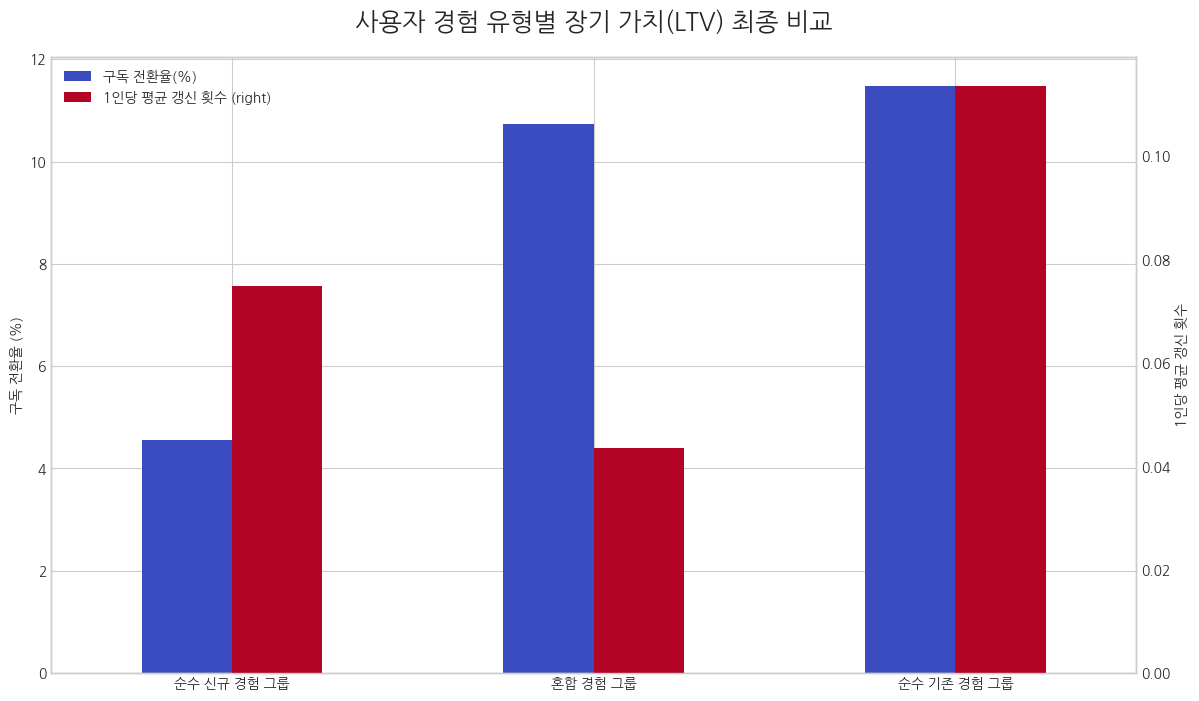

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- 1Îã®Í≥Ñ: 'Ï†ÑÏ≤¥ Í∏∞Ïó¨ ÌôúÎèô' Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± --------------------
print("‚úÖ 1Îã®Í≥Ñ: Í∞ÄÏûÖ Ï†Ñ 'Î™®Îì†' ÎπÑÌöåÏõê ÌôúÎèôÍ≥º Í∞ÄÏûÖ Í∏∞Î°ùÏùÑ Ïó∞Í≤∞Ìï©ÎãàÎã§...")


# [ÌïµÏã¨] drop_duplicatesÎ•º Ï†úÍ±∞ÌïòÏó¨ Î™®Îì† ÌôúÎèôÏùÑ Ìè¨Ìï®ÏãúÌÇµÎãàÎã§.
attributed_df = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'client_event_time', 'content.id']],
    signup_df[['date', 'fingerprint', 'user_id', 'client_event_time']],
    on=['date', 'fingerprint'],
    suffixes=('_watch', '_signup')
)
all_attributed_activities_df = attributed_df[attributed_df['client_event_time_watch'] < attributed_df['client_event_time_signup']].copy()

print(f"  - Ï¥ù {len(all_attributed_activities_df):,}Í∞úÏùò 'Í∞ÄÏûÖ Ï†Ñ ÌôúÎèô'ÏùÑ ÏãùÎ≥ÑÌñàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: Í∞ÄÏûÖÏûêÎ•º 'ÏàúÏàò Ïã†Í∑ú', 'ÏàúÏàò Í∏∞Ï°¥', 'ÌòºÌï©' Í∑∏Î£πÏúºÎ°ú Ï†ïÏùò --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: Í∞ÄÏûÖÏûêÎ•º ÏÑ∏ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ•òÌï©ÎãàÎã§...")

# 'Ï≤´ Îì±Ïû•Ïùº' Ï†ïÎ≥¥Î•º Ìï©ÏπòÍ≥†, Í∞Å ÌôúÎèôÏù¥ 'Ïã†Í∑ú'Ïù∏ÏßÄ ÏïÑÎãåÏßÄ ÌåêÎã®Ìï©ÎãàÎã§.
analysis_df = pd.merge(all_attributed_activities_df,  null_id_first_seen_series, on='content.id', how='left')
analysis_df['days_since_launch'] = (analysis_df['client_event_time_watch'] - analysis_df['first_seen_by_non_member']).dt.days
analysis_df['is_new'] = analysis_df['days_since_launch'] <= 30 # 30Ïùº Í∏∞Ï§Ä

# Í∞Å Í∞ÄÏûÖÏûê(user_id)Î≥ÑÎ°ú Ïã†Í∑ú/Í∏∞Ï°¥ ÏΩòÌÖêÏ∏† Í≤ΩÌóò Ïó¨Î∂ÄÎ•º ÏöîÏïΩÌï©ÎãàÎã§.
user_experience_summary = analysis_df.groupby('user_id')['is_new'].agg(['any', 'all'])

# [ÏàòÏ†ï] .indexÎ•º ÏÇ¨Ïö©ÌïòÏó¨ user_idÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
pure_new_users = set(user_experience_summary[user_experience_summary['all'] == True].index)
pure_old_users = set(user_experience_summary[user_experience_summary['any'] == False].index)

# [ÏàòÏ†ï] 'user_id' Ïª¨ÎüºÏù¥ ÏïÑÎãå, user_experience_summaryÏùò Ïù∏Îç±Ïä§Î•º ÏÇ¨Ïö©
all_grouped_users = set(user_experience_summary.index)
mixed_users = all_grouped_users - pure_new_users - pure_old_users

print(f"  - 'ÏàúÏàò Ïã†Í∑ú' Í≤ΩÌóò Í∞ÄÏûÖÏûê Ïàò: {len(pure_new_users):,}")
print(f"  - 'ÏàúÏàò Í∏∞Ï°¥' Í≤ΩÌóò Í∞ÄÏûÖÏûê Ïàò: {len(pure_old_users):,}")
print(f"  - 'ÌòºÌï©' Í≤ΩÌóò Í∞ÄÏûÖÏûê Ïàò: {len(mixed_users):,}") # Ïù¥Ï†ú 0Ïù¥ ÏïÑÎãê Í≤ÉÏûÖÎãàÎã§!


# -------------------- 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÎ≥Ñ LTV ÏßÄÌëú Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú® Î∞è LTV(ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò)Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ìï®Ïàò Ï†ïÏùò
def calculate_ltv_metrics(user_set, sub_df, renew_df):
    """ÌäπÏ†ï ÏÇ¨Ïö©Ïûê Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®Í≥º ÌèâÍ∑† Í∞±Ïã† ÌöüÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò"""
    total_users = len(user_set)
    if total_users == 0:
        return 0, 0

    # 'user_id' Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ Î®ºÏ†Ä ÌôïÏù∏ÌïòÍ≥†, ÏóÜÏúºÎ©¥ Ïù∏Îç±Ïä§ÏóêÏÑú Í∞ÄÏ†∏ÏòµÎãàÎã§.
    if 'user_id' in sub_df.columns:
        sub_user_ids = sub_df['user_id']
    else:
        sub_user_ids = sub_df.index

    if 'user_id' in renew_df.columns:
        renew_user_ids = renew_df['user_id']
    else:
        renew_user_ids = renew_df.index

    # Íµ¨ÎèÖ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
    subscribers = set(sub_user_ids.unique())
    converted_users = len(user_set.intersection(subscribers))
    conversion_rate = (converted_users / total_users * 100)

    # ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò Í≥ÑÏÇ∞
    # .isin()ÏùÄ SeriesÏôÄ Index Î™®ÎëêÏóê Ïûò ÏûëÎèôÌï©ÎãàÎã§.
    total_renews = len(renew_df[renew_user_ids.isin(user_set)])
    avg_renews = total_renews / total_users

    return conversion_rate, avg_renews
# Í∞Å Í∑∏Î£πÎ≥ÑÎ°ú LTV ÏßÄÌëú Í≥ÑÏÇ∞
cr_new, ltv_new = calculate_ltv_metrics(pure_new_users, sub_df, renew_df)
cr_old, ltv_old = calculate_ltv_metrics(pure_old_users, sub_df, renew_df) # <<<< 'sub_df'Î°ú ÏàòÏ†ï!
cr_mix, ltv_mix = calculate_ltv_metrics(mixed_users, sub_df, renew_df) # <<<< 'sub_df'Î°ú ÏàòÏ†ï!


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º Ï¢ÖÌï© Î∞è ÏãúÍ∞ÅÌôî --------------------
# ÏµúÏ¢Ö Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
ltv_analysis_df = pd.DataFrame({
    'Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)': [cr_new, cr_mix, cr_old],
    '1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò': [ltv_new, ltv_mix, ltv_old]
}, index=['ÏàúÏàò Ïã†Í∑ú Í≤ΩÌóò Í∑∏Î£π', 'ÌòºÌï© Í≤ΩÌóò Í∑∏Î£π', 'ÏàúÏàò Í∏∞Ï°¥ Í≤ΩÌóò Í∑∏Î£π'])

print("\n\n--- [ÏµúÏ¢Ö Í≤∞Í≥º] Í∑∏Î£πÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê ---")
print(ltv_analysis_df.round(2))

# ÏãúÍ∞ÅÌôî
plt.rc('font', family='NanumGothic')
ax = ltv_analysis_df.plot(
    kind='bar',
    figsize=(14, 8),
    rot=0,
    secondary_y='1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò',
    colormap='coolwarm'
)
plt.title('ÏÇ¨Ïö©Ïûê Í≤ΩÌóò Ïú†ÌòïÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÏµúÏ¢Ö ÎπÑÍµê', fontsize=18, pad=20)
ax.set_ylabel('Íµ¨ÎèÖ Ï†ÑÌôòÏú® (%)')
ax.right_ax.set_ylabel('1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway # ANOVA Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Ìï®Ïàò


# -------------------- 1. Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ Í≤ÄÏ¶ù (Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï) --------------------
print("="*40)
print("  [Í≤ÄÏ¶ù 1] ÏÑ∏ Í∑∏Î£π Í∞Ñ Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù")
print("="*40)

# 1-1. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Î∂ÑÌï†Ìëú(Contingency Table) ÏÉùÏÑ±
# Í∞Å Í∑∏Î£πÏùò 'Íµ¨ÎèÖÏûê' Ïàò
subscribers_new = len(sub_df[sub_df['user_id'].isin(pure_new_users)])
subscribers_old = len(sub_df[sub_df['user_id'].isin(pure_old_users)])
subscribers_mix = len(sub_df[sub_df['user_id'].isin(mixed_users)])

# Í∞Å Í∑∏Î£πÏùò 'ÎπÑÍµ¨ÎèÖÏûê' Ïàò
non_subscribers_new = len(pure_new_users) - subscribers_new
non_subscribers_old = len(pure_old_users) - subscribers_old
non_subscribers_mix = len(mixed_users) - subscribers_mix

# 3x2 Î∂ÑÌï†Ìëú Îç∞Ïù¥ÌÑ∞
observed_values_sub = [
    [subscribers_new, non_subscribers_new], # ÏàúÏàò Ïã†Í∑ú Í∑∏Î£π [Íµ¨ÎèÖ, ÎπÑÍµ¨ÎèÖ]
    [subscribers_mix, non_subscribers_mix], # ÌòºÌï© Í∑∏Î£π [Íµ¨ÎèÖ, ÎπÑÍµ¨ÎèÖ]
    [subscribers_old, non_subscribers_old]  # ÏàúÏàò Í∏∞Ï°¥ Í∑∏Î£π [Íµ¨ÎèÖ, ÎπÑÍµ¨ÎèÖ]
]

# 1-2. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p_value_sub, _, _ = chi2_contingency(observed_values_sub)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.4f}")
print(f"p-value: {p_value_sub:.4f}")

# 1-3. p-value Ìï¥ÏÑù
alpha = 0.05
print("\n--- Í≤∞Î°† (Íµ¨ÎèÖ Ï†ÑÌôòÏú®) ---")
if p_value_sub < alpha:
    print(f"‚úÖ p-value ({p_value_sub:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
    print("   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®ÏóêÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value_sub:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")


# -------------------- 2. ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ Í≤ÄÏ¶ù (ANOVA) --------------------
print("\n\n" + "="*40)
print("  [Í≤ÄÏ¶ù 2] ÏÑ∏ Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù")
print("="*40)

# 2-1. ANOVAÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: Í∞Å ÏÇ¨Ïö©ÏûêÎ≥Ñ 'Í∞±Ïã† ÌöüÏàò'Î•º Í≥ÑÏÇ∞
renew_counts_per_user = renew_df['user_id'].value_counts()

# Í∞Å Í∑∏Î£πÏóê ÏÜçÌïú ÏÇ¨Ïö©ÏûêÎì§Ïùò Í∞±Ïã† ÌöüÏàòÎßå Series ÌòïÌÉúÎ°ú Ï∂îÏ∂ú
# (Í∞±Ïã† Í∏∞Î°ùÏù¥ ÏóÜÎäî ÏÇ¨Ïö©ÏûêÎäî 0ÏúºÎ°ú Ï≤òÎ¶¨Ìï¥Ïïº Ï†ïÌôïÌïú ÌèâÍ∑† ÎπÑÍµêÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§)
def get_renew_counts(user_set, renew_counts):
    # user_setÏóê ÏûàÎäî Î™®Îì† Ïú†Ï†ÄÏóê ÎåÄÌï¥, Í∞±Ïã† ÌöüÏàòÎ•º Í∞ÄÏ†∏Ïò§Í≥† ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú Ï±ÑÏõÅÎãàÎã§.
    return pd.Series(list(user_set)).map(renew_counts).fillna(0)

renew_data_new = get_renew_counts(pure_new_users, renew_counts_per_user)
renew_data_mix = get_renew_counts(mixed_users, renew_counts_per_user)
renew_data_old = get_renew_counts(pure_old_users, renew_counts_per_user)

# 2-2. ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù (ANOVA) ÏàòÌñâ
f_statistic, p_value_ltv = f_oneway(renew_data_new, renew_data_mix, renew_data_old)

print(f"\n--- ANOVA Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"F-ÌÜµÍ≥ÑÎüâ: {f_statistic:.4f}")
print(f"p-value: {p_value_ltv:.4f}")

# 2-3. p-value Ìï¥ÏÑù
print("\n--- Í≤∞Î°† (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ---")
if p_value_ltv < alpha:
    print(f"‚úÖ p-value ({p_value_ltv:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
    print("   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£πÏùò ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÎäî Îã§Î•∏ Í∑∏Î£πÍ≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Î≥¥ÏûÖÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value_ltv:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")
    print("   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† ÎßêÌï† Ïàò ÏóÜÏäµÎãàÎã§.")

  [Í≤ÄÏ¶ù 1] ÏÑ∏ Í∑∏Î£π Í∞Ñ Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 15.2655
p-value: 0.0005

--- Í≤∞Î°† (Íµ¨ÎèÖ Ï†ÑÌôòÏú®) ---
‚úÖ p-value (0.0005)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.
   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®ÏóêÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.


  [Í≤ÄÏ¶ù 2] ÏÑ∏ Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

--- ANOVA Í≤ÄÏ†ï Í≤∞Í≥º ---
F-ÌÜµÍ≥ÑÎüâ: 2.0759
p-value: 0.1255

--- Í≤∞Î°† (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ---
‚ùå p-value (0.1255)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.
   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† ÎßêÌï† Ïàò ÏóÜÏäµÎãàÎã§.


In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710031 entries, 0 to 1710030
Data columns (total 35 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   city                      object        
 1   client_event_time         datetime64[ns]
 2   country                   object        
 3   device_carrier            float64       
 4   device_family             object        
 5   device_type               object        
 6   event_type                object        
 7   language                  object        
 8   os_name                   object        
 9   os_version                object        
 10  platform                  object        
 11  user_id                   float64       
 12  content.id                object        
 13  is_trial                  object        
 14  lesson.id                 object        
 15  is_free_trial             object        
 16  fingerprint               object        
 17  date    

In [ ]:
complete_signup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_carrier     0 non-null       float64       
 4   device_family      45767 non-null   object        
 5   device_type        44659 non-null   object        
 6   event_type         145133 non-null  object        
 7   language           45767 non-null   object        
 8   os_name            45745 non-null   object        
 9   os_version         45651 non-null   object        
 10  platform           45767 non-null   object        
 11  user_id            145133 non-null  object        
 12  type               144958 non-null  object        
 13  fingerprint        145133 non-null  object  

‚úÖ 1Îã®Í≥Ñ: 'Ïã§Ïäµ ÏúÑÏ£º' ÏΩòÌÖêÏ∏†Î•º Ï†ïÏùòÌï©ÎãàÎã§...
  - Ï¥ù 151Í∞ú ÏΩòÌÖêÏ∏† Ï§ë, 24Í∞úÎ•º 'Ïã§Ïäµ ÏúÑÏ£º'Î°ú Ï†ïÏùòÌñàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùò 'Ï≤´ Í≤ΩÌóò' ÏΩòÌÖêÏ∏†Î•º ÏãùÎ≥ÑÌï©ÎãàÎã§...
  - Ï¥ù 89,195Í∞úÏùò 'Ï≤´ Í≤ΩÌóò' ÏÑ∏ÏÖòÏùÑ ÏãùÎ≥ÑÌñàÏäµÎãàÎã§.

‚úÖ 3Îã®Í≥Ñ: 'Ï≤´ Í≤ΩÌóò'Ïùò Ïú†ÌòïÏóê Îî∞Îùº ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ Îëê Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
experience_type
Í∞ïÏùò ÏúÑÏ£º Ï≤´ Í≤ΩÌóò    60565
Ïã§Ïäµ ÏúÑÏ£º Ï≤´ Í≤ΩÌóò    28630
Name: count, dtype: int64
‚úÖ 4Îã®Í≥Ñ: Í∞Å 'Ï≤´ Í≤ΩÌóò' Í∑∏Î£πÏù¥ Ïñ¥Îñ§ user_idÎ°ú Í∞ÄÏûÖÌñàÎäîÏßÄ ÏãùÎ≥ÑÌï©ÎãàÎã§...
  - 'Ïã§Ïäµ ÏúÑÏ£º Ï≤´ Í≤ΩÌóò' ÌõÑ (Í∞ôÏùÄ ÎÇ†) Í∞ÄÏûÖÌïú Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: 2,501
  - 'Í∞ïÏùò ÏúÑÏ£º Ï≤´ Í≤ΩÌóò' ÌõÑ (Í∞ôÏùÄ ÎÇ†) Í∞ÄÏûÖÌïú Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: 5,860

‚úÖ 5Îã®Í≥Ñ: Ïò§ÏßÅ 'user_id'ÎßåÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞Å Í∑∏Î£πÏùò LTVÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...


--- [ÏµúÏ¢Ö Í≤∞Í≥º] Ï≤´ Í≤ΩÌóò Ïú†ÌòïÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê (user_id Í∏∞Ï§Ä) ---
               Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)  1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã

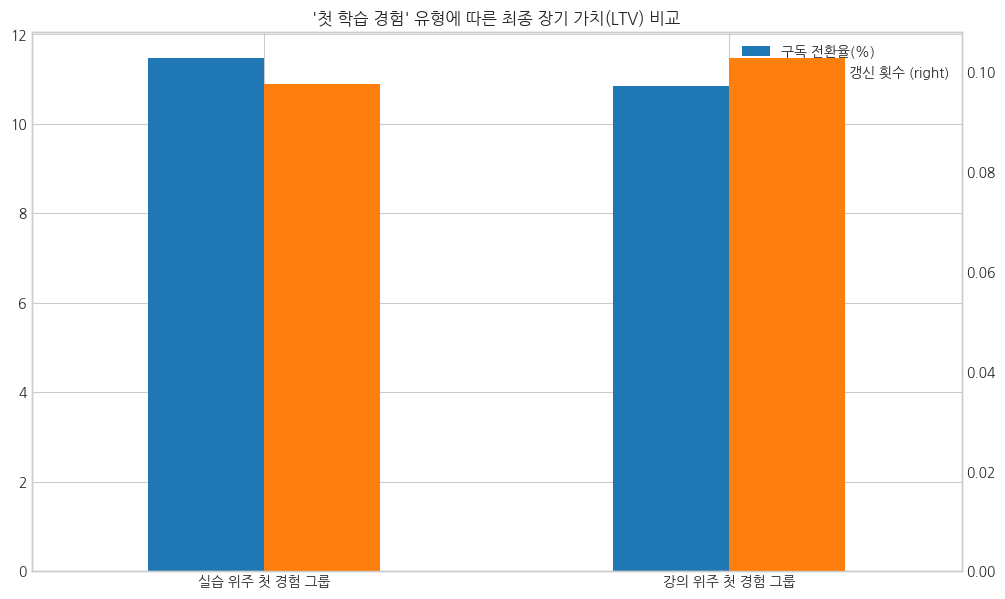

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- 1Îã®Í≥Ñ: 'Ïã§Ïäµ ÏúÑÏ£º' ÏΩòÌÖêÏ∏† Ï†ïÏùò --------------------
print("‚úÖ 1Îã®Í≥Ñ: 'Ïã§Ïäµ ÏúÑÏ£º' ÏΩòÌÖêÏ∏†Î•º Ï†ïÏùòÌï©ÎãàÎã§...")

# Í∞ïÏùò Íµ¨ÏÑ± ÏöîÏÜå Ïª¨Îüº (Ïò§ÌÉÄÎ•º 'practice'Î°ú ÏàòÏ†ïÌñàÎã§Í≥† Í∞ÄÏ†ï)
composition_cols = ['stream', 'note', 'practice', 'quiz']
# final_merged_dfÏóê 'practice' Ïª¨ÎüºÏù¥ ÏóÜÎã§Î©¥ 'prictice'Î°ú ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
final_merged_df['total_components'] = final_merged_df[composition_cols].sum(axis=1)
final_merged_df['practice_ratio'] = final_merged_df['practice'] /final_merged_df['total_components']

# 'Ïã§Ïäµ'Ïùò ÎπÑÏ§ëÏù¥ 30% Ïù¥ÏÉÅÏù∏ ÏΩòÌÖêÏ∏†Î•º 'Ïã§Ïäµ ÏúÑÏ£º'Î°ú Ï†ïÏùòÌï©ÎãàÎã§.
PRACTICE_THRESHOLD = 0.3
practice_heavy_content_ids = set(final_merged_df[final_merged_df['practice_ratio'] >= PRACTICE_THRESHOLD]['content.id'].unique())

print(f"  - Ï¥ù {len(id_info_df)}Í∞ú ÏΩòÌÖêÏ∏† Ï§ë, {len(practice_heavy_content_ids)}Í∞úÎ•º 'Ïã§Ïäµ ÏúÑÏ£º'Î°ú Ï†ïÏùòÌñàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: ÎπÑÌöåÏõêÏùò 'Ï≤´ Í≤ΩÌóò' ÏΩòÌÖêÏ∏† ÏãùÎ≥Ñ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùò 'Ï≤´ Í≤ΩÌóò' ÏΩòÌÖêÏ∏†Î•º ÏãùÎ≥ÑÌï©ÎãàÎã§...")

# Í∞Å (date, fingerprint) Í∑∏Î£πÎ≥ÑÎ°ú Í∞ÄÏû• Ïò§ÎûòÎêú(Ï≤´) ÌôúÎèô Í∏∞Î°ùÏùò Ïù∏Îç±Ïä§Î•º Ï∞æÏäµÎãàÎã§.
first_touch_indices = final_merged_df.loc[
    final_merged_df.groupby(['date', 'fingerprint'])['client_event_time'].idxmin()
].index

# Ìï¥Îãπ Ïù∏Îç±Ïä§Î°ú 'Ï≤´ Í≤ΩÌóò' Í∏∞Î°ùÎßå Ï∂îÏ∂úÌï©ÎãàÎã§.
first_touch_df = final_merged_df.loc[first_touch_indices].copy()

print(f"  - Ï¥ù {len(first_touch_df):,}Í∞úÏùò 'Ï≤´ Í≤ΩÌóò' ÏÑ∏ÏÖòÏùÑ ÏãùÎ≥ÑÌñàÏäµÎãàÎã§.")


# -------------------- 3Îã®Í≥Ñ: 'Ï≤´ Í≤ΩÌóò'Ïóê Îî∞Îùº Í∑∏Î£π Î∂ÑÎ¶¨ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: 'Ï≤´ Í≤ΩÌóò'Ïùò Ïú†ÌòïÏóê Îî∞Îùº ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ Îëê Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")

# 'Ï≤´ Í≤ΩÌóò' ÏΩòÌÖêÏ∏†Í∞Ä 'Ïã§Ïäµ ÏúÑÏ£º'Ïù∏ÏßÄ Ïó¨Î∂ÄÏóê Îî∞Îùº Í∑∏Î£πÏùÑ ÎÇòÎàïÎãàÎã§.
first_touch_df['experience_type'] = 'Í∞ïÏùò ÏúÑÏ£º Ï≤´ Í≤ΩÌóò'
first_touch_df.loc[first_touch_df['content.id'].isin(practice_heavy_content_ids), 'experience_type'] = 'Ïã§Ïäµ ÏúÑÏ£º Ï≤´ Í≤ΩÌóò'

# Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
total_pool_by_exp_type = first_touch_df['experience_type'].value_counts()
print(total_pool_by_exp_type)

# -------------------- 4Îã®Í≥Ñ: 'Ï≤´ Í≤ΩÌóò' Í∑∏Î£πÎ≥ÑÎ°ú 'Í∞ÄÏûÖÏûê user_id Î™©Î°ù' ÌôïÎ≥¥ --------------------
print("‚úÖ 4Îã®Í≥Ñ: Í∞Å 'Ï≤´ Í≤ΩÌóò' Í∑∏Î£πÏù¥ Ïñ¥Îñ§ user_idÎ°ú Í∞ÄÏûÖÌñàÎäîÏßÄ ÏãùÎ≥ÑÌï©ÎãàÎã§...")

# [ÏàòÏ†ï] 'date'ÏôÄ 'fingerprint'Î•º Î™®Îëê ÏÇ¨Ïö©ÌïòÏó¨, 'Í∞ôÏùÄ ÎÇ†' Í∞ÄÏûÖÌïú Í≤ΩÏö∞Îßå Ïó∞Í≤∞Ìï©ÎãàÎã§.
converted_to_signup_df = pd.merge(
    first_touch_df,
    complete_signup_df[['date', 'fingerprint', 'user_id']],
    on=['date', 'fingerprint'],
    how='inner'
)
# [ÌïµÏã¨] Ïù¥Ï†úÎ∂ÄÌÑ∞Îäî Ïù¥ 'user_id'Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îì† Í≤ÉÏùÑ Ï∂îÏ†ÅÌï©ÎãàÎã§.
practice_first_users = set(converted_to_signup_df[converted_to_signup_df['experience_type'] == 'Ïã§Ïäµ ÏúÑÏ£º Ï≤´ Í≤ΩÌóò']['user_id_y'].unique())
lecture_first_users = set(converted_to_signup_df[converted_to_signup_df['experience_type'] == 'Í∞ïÏùò ÏúÑÏ£º Ï≤´ Í≤ΩÌóò']['user_id_y'].unique())

print(f"  - 'Ïã§Ïäµ ÏúÑÏ£º Ï≤´ Í≤ΩÌóò' ÌõÑ (Í∞ôÏùÄ ÎÇ†) Í∞ÄÏûÖÌïú Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: {len(practice_first_users):,}")
print(f"  - 'Í∞ïÏùò ÏúÑÏ£º Ï≤´ Í≤ΩÌóò' ÌõÑ (Í∞ôÏùÄ ÎÇ†) Í∞ÄÏûÖÌïú Í≥†Ïú† ÏÇ¨Ïö©Ïûê Ïàò: {len(lecture_first_users):,}")


# -------------------- 5Îã®Í≥Ñ: 'user_id'ÎßåÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Íµ¨ÎèÖ Ï†ÑÌôòÏú® Î∞è LTV Í≥ÑÏÇ∞ (ÏàòÏ†ï ÏôÑÎ£å) --------------------
print("\n‚úÖ 5Îã®Í≥Ñ: Ïò§ÏßÅ 'user_id'ÎßåÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞Å Í∑∏Î£πÏùò LTVÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

def calculate_ltv_by_userid(user_set, sub_df, renew_df):
    """user_id Î™©Î°ùÏùÑ Î∞õÏïÑ, Ìï¥Îãπ Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®Í≥º ÌèâÍ∑† Í∞±Ïã† ÌöüÏàòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò"""
    total_users = len(user_set)
    if total_users == 0:
        return 0, 0

    subscribers_in_group = len(sub_df[sub_df['user_id'].isin(user_set)])
    conversion_rate = (subscribers_in_group / total_users * 100)

    total_renews_in_group = len(renew_df[renew_df['user_id'].isin(user_set)])
    avg_renews = total_renews_in_group / total_users

    return conversion_rate, avg_renews

# [ÏàòÏ†ï] Î™ÖÌôïÌïú Î≥ÄÏàò Ïù¥Î¶Ñ(subscribe_df)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ LTV ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
cr_practice, ltv_practice = calculate_ltv_by_userid(practice_first_users, sub_df, renew_df)
cr_lecture, ltv_lecture = calculate_ltv_by_userid(lecture_first_users, sub_df, renew_df)


# -------------------- 6Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º Ï¢ÖÌï© Î∞è ÏãúÍ∞ÅÌôî --------------------
# ÏµúÏ¢Ö Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
ltv_analysis_df = pd.DataFrame({
    'Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)': [cr_practice, cr_lecture],
    '1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò': [ltv_practice, ltv_lecture]
}, index=['Ïã§Ïäµ ÏúÑÏ£º Ï≤´ Í≤ΩÌóò Í∑∏Î£π', 'Í∞ïÏùò ÏúÑÏ£º Ï≤´ Í≤ΩÌóò Í∑∏Î£π'])

print("\n\n--- [ÏµúÏ¢Ö Í≤∞Í≥º] Ï≤´ Í≤ΩÌóò Ïú†ÌòïÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê (user_id Í∏∞Ï§Ä) ---")
print(ltv_analysis_df.round(2))

# ÏãúÍ∞ÅÌôî
ltv_analysis_df.plot(
    kind='bar',
    figsize=(12, 7),
    rot=0,
    secondary_y='1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò',
    title="'Ï≤´ ÌïôÏäµ Í≤ΩÌóò' Ïú†ÌòïÏóê Îî∞Î•∏ ÏµúÏ¢Ö Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê"
)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏïÑÎûò Î™®Îì† Î≥ÄÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêú ÏÉÅÌÉúÏó¨Ïïº Ìï©ÎãàÎã§.
# 1. total_pool_by_exp_type: Í∞Å 'Ï≤´ Í≤ΩÌóò' Í∑∏Î£πÏùò Ï†ÑÏ≤¥ Í∞ÄÏûÖÏûê Ïàò (Î∂ÑÎ™®)
# 2. practice_first_users, lecture_first_users: Í∞Å Í∑∏Î£πÏóê ÏÜçÌïú user_id Î™©Î°ù (set)
# 3. subscribe_df, renew_df: Íµ¨ÎèÖ Î∞è Í∞±Ïã† Î°úÍ∑∏

# -------------------- 1. Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ Í≤ÄÏ¶ù (Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï) --------------------
print("="*30)
print("  [Í≤ÄÏ¶ù 1] Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù")
print("="*30)

# 1-1. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Î∂ÑÌï†Ìëú(Contingency Table) ÏÉùÏÑ±
# Í∞Å Í∑∏Î£πÏùò 'Íµ¨ÎèÖÏûê' Ïàò
subscribers_practice = len(sub_df[sub_df['user_id'].isin(practice_first_users)])
subscribers_lecture = len(sub_df[sub_df['user_id'].isin(lecture_first_users)])

# Í∞Å Í∑∏Î£πÏùò 'ÎπÑÍµ¨ÎèÖÏûê' Ïàò
non_subscribers_practice = len(practice_first_users) - subscribers_practice
non_subscribers_lecture = len(lecture_first_users) - subscribers_lecture

# Î∂ÑÌï†Ìëú Îç∞Ïù¥ÌÑ∞: [[Ïã§Ïäµ-Íµ¨ÎèÖ, Ïã§Ïäµ-ÎπÑÍµ¨ÎèÖ], [Í∞ïÏùò-Íµ¨ÎèÖ, Í∞ïÏùò-ÎπÑÍµ¨ÎèÖ]]
observed_values_sub = [
    [subscribers_practice, non_subscribers_practice],
    [subscribers_lecture, non_subscribers_lecture]
]

# 1-2. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p_value_sub, _, _ = chi2_contingency(observed_values_sub)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.4f}")
print(f"p-value: {p_value_sub:.4f}")

# 1-3. p-value Ìï¥ÏÑù
alpha = 0.05
print("\n--- Í≤∞Î°† (Íµ¨ÎèÖ Ï†ÑÌôòÏú®) ---")
if p_value_sub < alpha:
    print(f"‚úÖ p-value ({p_value_sub:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value_sub:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")


# -------------------- 2. ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ Í≤ÄÏ¶ù (T-Í≤ÄÏ†ï) --------------------
print("\n\n" + "="*30)
print("  [Í≤ÄÏ¶ù 2] ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù")
print("="*30)

# 2-1. T-Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: Í∞Å ÏÇ¨Ïö©ÏûêÎ≥Ñ 'Í∞±Ïã† ÌöüÏàò'Î•º Í≥ÑÏÇ∞
renew_counts_per_user = renew_df['user_id'].value_counts()

# Í∞Å Í∑∏Î£πÏóê ÏÜçÌïú ÏÇ¨Ïö©ÏûêÎì§Ïùò Í∞±Ïã† ÌöüÏàòÎßå Ï∂îÏ∂ú
renew_data_practice = renew_counts_per_user[renew_counts_per_user.index.isin(practice_first_users)]
renew_data_lecture = renew_counts_per_user[renew_counts_per_user.index.isin(lecture_first_users)]

# 2-2. ÎèÖÎ¶ΩÌëúÎ≥∏ T-Í≤ÄÏ†ï ÏàòÌñâ
# equal_var=False ÏòµÏÖòÏùÄ Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•º Ïàò ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÎäî Welch's t-testÎ•º ÏàòÌñâÌïòÏó¨ Îçî ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§.
t_statistic, p_value_ltv = ttest_ind(renew_data_practice, renew_data_lecture, equal_var=False)

print(f"\n--- ÎèÖÎ¶ΩÌëúÎ≥∏ T-Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"T-ÌÜµÍ≥ÑÎüâ: {t_statistic:.4f}")
print(f"p-value: {p_value_ltv:.4f}")

# 2-3. p-value Ìï¥ÏÑù
print("\n--- Í≤∞Î°† (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ---")
if p_value_ltv < alpha:
    print(f"‚úÖ p-value ({p_value_ltv:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, Îëê Í∑∏Î£πÏùò ÌèâÍ∑† Í∞±Ïã† ÌöüÏàòÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value_ltv:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌèâÍ∑† Í∞±Ïã† ÌöüÏàòÏùò Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")


  [Í≤ÄÏ¶ù 1] Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 0.6663
p-value: 0.4143

--- Í≤∞Î°† (Íµ¨ÎèÖ Ï†ÑÌôòÏú®) ---
‚ùå p-value (0.4143)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.


  [Í≤ÄÏ¶ù 2] ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

--- ÎèÖÎ¶ΩÌëúÎ≥∏ T-Í≤ÄÏ†ï Í≤∞Í≥º ---
T-ÌÜµÍ≥ÑÎüâ: -0.0057
p-value: 0.9955

--- Í≤∞Î°† (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ---
‚ùå p-value (0.9955)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌèâÍ∑† Í∞±Ïã† ÌöüÏàòÏùò Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.


In [ ]:
import pandas as pd

difficulty_info = start_content_df[['content.id', 'content.difficulty']].drop_duplicates()

infomation_df = pd.merge(id_info_df, difficulty_info, on='content.id', how='left')


  [Î∂ÑÏÑù 1] ÌïôÏäµ Í∏∞Í∞ÑÍ≥º Î†àÏä® ÏàòÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ

ÌîºÏñ¥Ïä® ÏÉÅÍ¥Ä Í≥ÑÏàò: 0.4215
-> Ìï¥ÏÑù: Î†àÏä® ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÌïôÏäµ Í∏∞Í∞ÑÎèÑ Í∏∏Ïñ¥ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§.


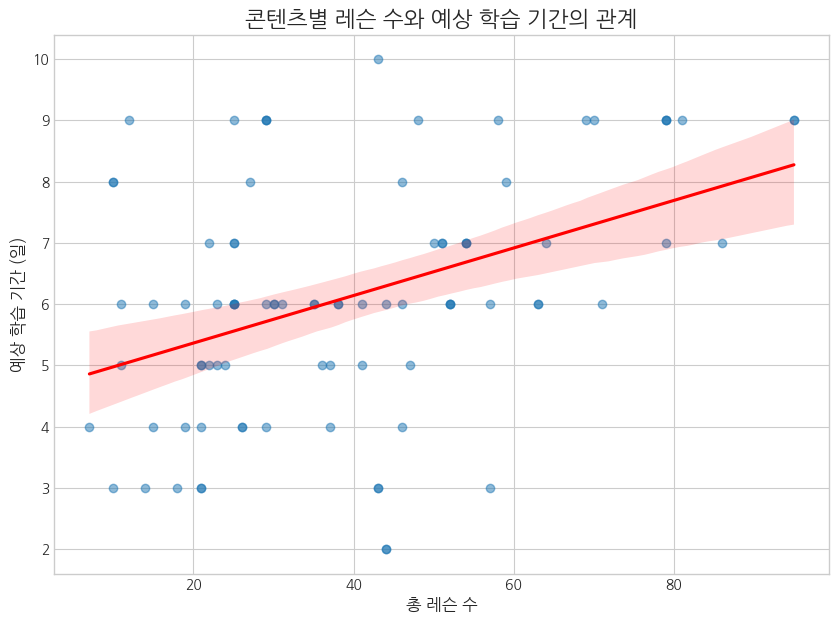



  [Î∂ÑÏÑù 2] ÎÇúÏù¥ÎèÑÎ≥Ñ Ï¥ù Î†àÏä® Ïàò Î∂ÑÌè¨
              count   mean    std   min    25%   50%    75%   max
difficulty                                                       
advanced       34.0  41.47  23.60  10.0  23.50  36.0  56.25  95.0
beginner       12.0  33.00  20.28  11.0  17.25  28.5  45.00  79.0
hard            6.0  39.33  28.37  10.0  25.00  25.5  59.75  79.0
intermediate   36.0  40.11  18.16   7.0  25.75  39.5  51.25  95.0


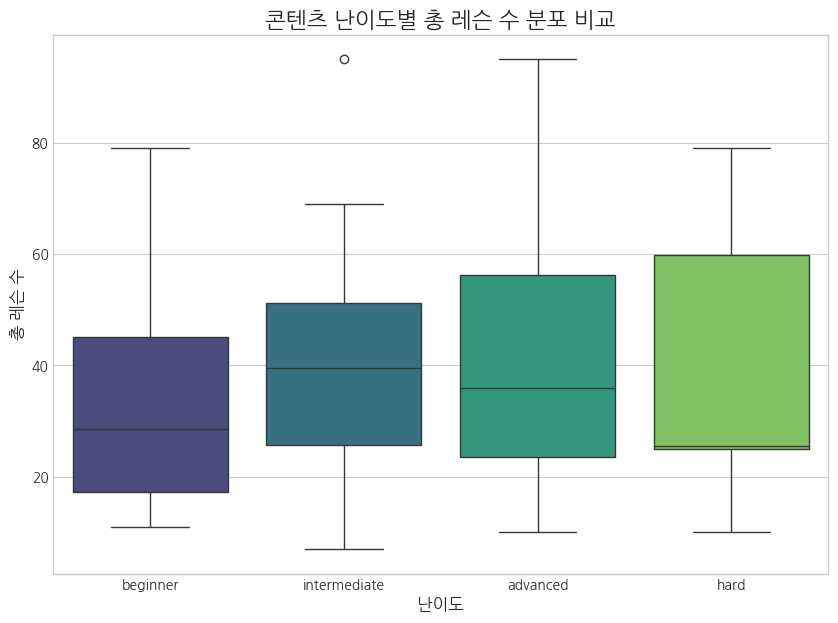



  [Î∂ÑÏÑù 3] ÎÇúÏù¥ÎèÑÎ≥Ñ ÏòàÏÉÅ ÌïôÏäµ Í∏∞Í∞Ñ Î∂ÑÌè¨
              count  mean   std  min  25%  50%   75%   max
difficulty                                                
advanced       34.0  6.38  2.24  2.0  5.0  6.5  8.75  10.0
beginner       12.0  5.83  1.59  3.0  5.5  6.0  6.25   9.0
hard            6.0  6.50  1.76  4.0  6.0  6.0  7.50   9.0
intermediate   36.0  5.92  1.83  2.0  5.0  6.0  7.00   9.0


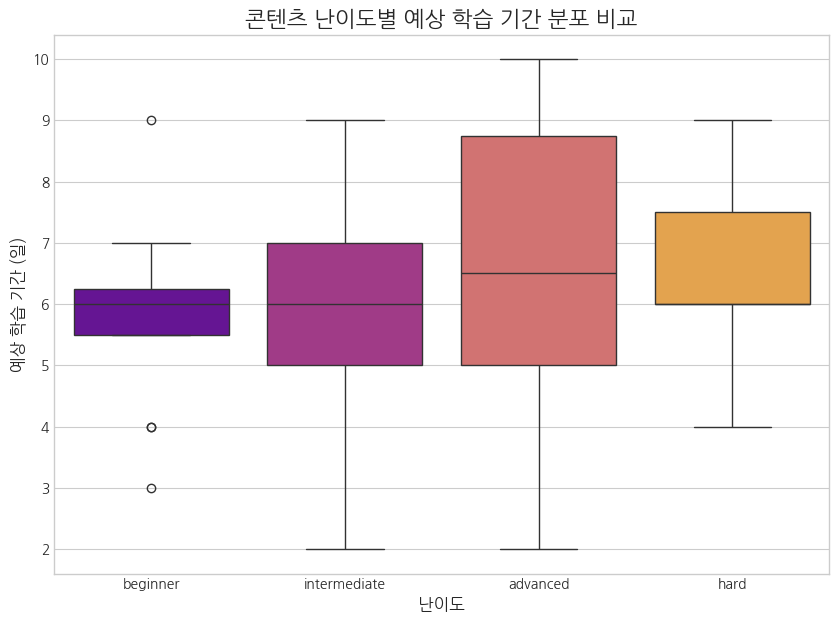

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

analysis_data = infomation_df.rename(columns={
    'content.difficulty': 'difficulty',
    'lesson_count': 'lesson_count',
    'studying_time(day)': 'learning_days'
})

# -------------------- Î∂ÑÏÑù 1: ÌïôÏäµ Í∏∞Í∞Ñ vs Î†àÏä® Ïàò (ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ) --------------------
print("="*40)
print("  [Î∂ÑÏÑù 1] ÌïôÏäµ Í∏∞Í∞ÑÍ≥º Î†àÏä® ÏàòÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ")
print("="*40)

# ÌîºÏñ¥Ïä® ÏÉÅÍ¥Ä Í≥ÑÏàò Í≥ÑÏÇ∞
correlation = analysis_data['lesson_count'].corr(analysis_data['learning_days'])
print(f"\nÌîºÏñ¥Ïä® ÏÉÅÍ¥Ä Í≥ÑÏàò: {correlation:.4f}")
if correlation > 0.7:
    print("-> Ìï¥ÏÑù: Î†àÏä® ÏàòÏôÄ ÌïôÏäµ Í∏∞Í∞Ñ ÏÇ¨Ïù¥ÏóêÎäî Îß§Ïö∞ Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏäµÎãàÎã§.")
else:
    print("-> Ìï¥ÏÑù: Î†àÏä® ÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÌïôÏäµ Í∏∞Í∞ÑÎèÑ Í∏∏Ïñ¥ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏäµÎãàÎã§.")

# ÏãúÍ∞ÅÌôî: ÏÇ∞Ï†êÎèÑ(Scatter Plot)ÏôÄ Ï∂îÏÑ∏ÏÑ†
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 7))
sns.regplot(data=analysis_data, x='lesson_count', y='learning_days',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('ÏΩòÌÖêÏ∏†Î≥Ñ Î†àÏä® ÏàòÏôÄ ÏòàÏÉÅ ÌïôÏäµ Í∏∞Í∞ÑÏùò Í¥ÄÍ≥Ñ', fontsize=16)
plt.xlabel('Ï¥ù Î†àÏä® Ïàò', fontsize=12)
plt.ylabel('ÏòàÏÉÅ ÌïôÏäµ Í∏∞Í∞Ñ (Ïùº)', fontsize=12)
plt.grid(True)
plt.show()


# -------------------- Î∂ÑÏÑù 2: ÎÇúÏù¥ÎèÑÎ≥Ñ Î†àÏä® Ïàò (Í∑∏Î£π ÎπÑÍµê) --------------------
print("\n\n" + "="*40)
print("  [Î∂ÑÏÑù 2] ÎÇúÏù¥ÎèÑÎ≥Ñ Ï¥ù Î†àÏä® Ïàò Î∂ÑÌè¨")
print("="*40)

# ÎÇúÏù¥ÎèÑÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ
print(analysis_data.groupby('difficulty')['lesson_count'].describe().round(2))

# ÏãúÍ∞ÅÌôî: Î∞ïÏä§ÌîåÎ°Ø(Box Plot)
difficulty_order = ['beginner', 'intermediate', 'advanced', 'hard'] # ÎÇúÏù¥ÎèÑ ÏàúÏÑú Ï†ïÎ†¨
plt.figure(figsize=(10, 7))
sns.boxplot(data=analysis_data, x='difficulty', y='lesson_count', order=difficulty_order, palette='viridis')
plt.title('ÏΩòÌÖêÏ∏† ÎÇúÏù¥ÎèÑÎ≥Ñ Ï¥ù Î†àÏä® Ïàò Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)
plt.xlabel('ÎÇúÏù¥ÎèÑ', fontsize=12)
plt.ylabel('Ï¥ù Î†àÏä® Ïàò', fontsize=12)
plt.show()


# -------------------- Î∂ÑÏÑù 3: ÎÇúÏù¥ÎèÑÎ≥Ñ ÌïôÏäµ Í∏∞Í∞Ñ (Í∑∏Î£π ÎπÑÍµê) --------------------
print("\n\n" + "="*40)
print("  [Î∂ÑÏÑù 3] ÎÇúÏù¥ÎèÑÎ≥Ñ ÏòàÏÉÅ ÌïôÏäµ Í∏∞Í∞Ñ Î∂ÑÌè¨")
print("="*40)

# ÎÇúÏù¥ÎèÑÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ
print(analysis_data.groupby('difficulty')['learning_days'].describe().round(2))

# ÏãúÍ∞ÅÌôî: Î∞ïÏä§ÌîåÎ°Ø(Box Plot)
plt.figure(figsize=(10, 7))
sns.boxplot(data=analysis_data, x='difficulty', y='learning_days', order=difficulty_order, palette='plasma')
plt.title('ÏΩòÌÖêÏ∏† ÎÇúÏù¥ÎèÑÎ≥Ñ ÏòàÏÉÅ ÌïôÏäµ Í∏∞Í∞Ñ Î∂ÑÌè¨ ÎπÑÍµê', fontsize=16)
plt.xlabel('ÎÇúÏù¥ÎèÑ', fontsize=12)
plt.ylabel('ÏòàÏÉÅ ÌïôÏäµ Í∏∞Í∞Ñ (Ïùº)', fontsize=12)
plt.show()

‚úÖ 1Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏù¥ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
  - Ï¥ù 89,080Í∞úÏùò ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏóê ÎåÄÌïú ÌèâÍ∑† ÎÇúÏù¥ÎèÑÎ•º Í≥ÑÏÇ∞ÌñàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: ÌèâÍ∑† ÎÇúÏù¥ÎèÑ Ï†êÏàòÏóê Îî∞Îùº ÏÑ∏ÏÖòÏùÑ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
difficulty_segment
Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò    40627
Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò    28829
Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò    19624
Name: count, dtype: int64

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò 'Í∞ÄÏûÖ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÎπÑÍµêÌï©ÎãàÎã§...


--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Í≤ΩÌóò ÎÇúÏù¥ÎèÑÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ---
                    Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®)  Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)  Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)
difficulty_segment                                     
Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò                  40627         3362       8.28
Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò                  28829         1986       6.89
Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò                  19624          982       5.00


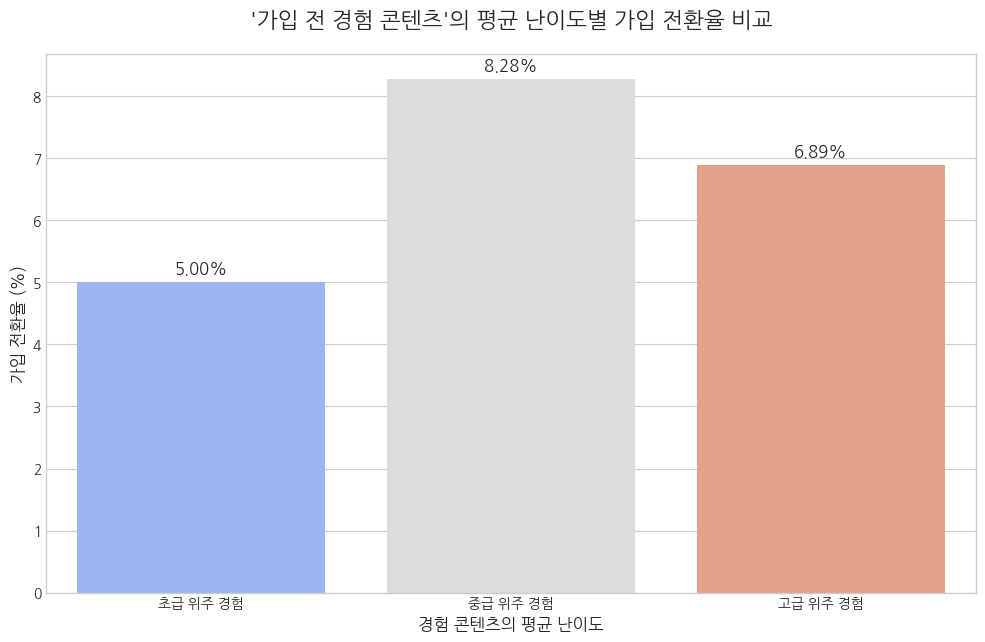

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- 1Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ' Í≥ÑÏÇ∞ --------------------
print("‚úÖ 1Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏù¥ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# 1-1. ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê ÎÇúÏù¥ÎèÑ Ï†ïÎ≥¥ Î≥ëÌï©
#      Î∂ÑÏÑùÏùò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÍ≥†, Í≤∞Ï∏°Í∞íÏùÄ ÎØ∏Î¶¨ Ï†úÍ±∞Ìï©ÎãàÎã§.
non_member_logs_with_difficulty = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'content.id']],
    infomation_df[['content.id', 'content.difficulty']].dropna(),
    on='content.id',
    how='inner' # ÎÇúÏù¥ÎèÑ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî Î°úÍ∑∏Îßå ÎåÄÏÉÅÏúºÎ°ú Ìï®
)

# 1-2. ÎÇúÏù¥ÎèÑÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌïú Îß§Ìïë(mapping) Ï†ïÏùò
#      (Ïã§Ï†ú ÎÇúÏù¥ÎèÑ Ïù¥Î¶ÑÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§.)
difficulty_map = {'beginner': 1, 'intermediate': 2, 'advanced': 3, 'hard': 4}
non_member_logs_with_difficulty['difficulty_score'] = non_member_logs_with_difficulty['content.difficulty'].map(difficulty_map)

# 1-3. Í∞Å ÏÑ∏ÏÖòÎ≥ÑÎ°ú Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ Ï†êÏàò'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
session_avg_difficulty = non_member_logs_with_difficulty.groupby(['date', 'fingerprint'])['difficulty_score'].mean()
session_avg_difficulty = session_avg_difficulty.to_frame(name='avg_difficulty_score')

print(f"  - Ï¥ù {len(session_avg_difficulty):,}Í∞úÏùò ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏóê ÎåÄÌïú ÌèâÍ∑† ÎÇúÏù¥ÎèÑÎ•º Í≥ÑÏÇ∞ÌñàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ'Ïóê Îî∞Îùº Í∑∏Î£π Î∂ÑÎ¶¨ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: ÌèâÍ∑† ÎÇúÏù¥ÎèÑ Ï†êÏàòÏóê Îî∞Îùº ÏÑ∏ÏÖòÏùÑ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")

# ÌèâÍ∑† Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£π ÎùºÎ≤®ÏùÑ Î∂ÄÏó¨Ìï©ÎãàÎã§. (pd.cut ÏÇ¨Ïö©)
bins = [0, 1.5, 2.5, float('inf')] # 1.5 ÎØ∏Îßå: Ï¥àÍ∏â, 1.5~2.5: Ï§ëÍ∏â, 2.5 Ï¥àÍ≥º: Í≥†Í∏â
labels = ['Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò', 'Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò', 'Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò']
session_avg_difficulty['difficulty_segment'] = pd.cut(
    session_avg_difficulty['avg_difficulty_score'],
    bins=bins,
    labels=labels,
    right=False # ÏôºÏ™Ω Í≤ΩÍ≥ÑÎäî Ìè¨Ìï®, Ïò§Î•∏Ï™Ω Í≤ΩÍ≥ÑÎäî ÎØ∏Ìè¨Ìï®
)

# Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
total_pool_by_difficulty = session_avg_difficulty['difficulty_segment'].value_counts()
print(total_pool_by_difficulty)


# -------------------- 3Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ 'Í∞ÄÏûÖ Ï†ÑÌôòÏú®' Í≥ÑÏÇ∞ Î∞è ÎπÑÍµê --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò 'Í∞ÄÏûÖ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÎπÑÍµêÌï©ÎãàÎã§...")

# Í∞ÄÏûÖÏóê ÏÑ±Í≥µÌïú ÏÑ∏ÏÖò Î™©Î°ùÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
converted_sessions = complete_signup_df[['date', 'fingerprint']].drop_duplicates()
converted_sessions['converted'] = True # Í∞ÄÏûÖ Ïó¨Î∂Ä ÌëúÏãú

# ÏÑ∏ÏÖòÎ≥Ñ ÌèâÍ∑† ÎÇúÏù¥ÎèÑ Ï†ïÎ≥¥ÏôÄ Í∞ÄÏûÖ Ï†ïÎ≥¥Î•º Ìï©Ïπ©ÎãàÎã§.
conversion_analysis_df = pd.merge(
    session_avg_difficulty,
    converted_sessions,
    on=['date', 'fingerprint'],
    how='left'
).fillna({'converted': False}) # Í∞ÄÏûÖ Í∏∞Î°ùÏù¥ ÏóÜÏúºÎ©¥ FalseÎ°ú Ï±ÑÏõÄ

# Í∞Å ÎÇúÏù¥ÎèÑ Í∑∏Î£πÎ≥Ñ 'Í∞ÄÏûÖÏûê Ïàò(Î∂ÑÏûê)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
converters_by_difficulty = conversion_analysis_df[conversion_analysis_df['converted'] == True]['difficulty_segment'].value_counts()

# ÏµúÏ¢Ö Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ ÌÖåÏù¥Î∏îÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
final_conversion_df = pd.DataFrame({
    'Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®)': total_pool_by_difficulty,
    'Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)': converters_by_difficulty
}).fillna(0)

final_conversion_df['Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)'] = \
    (final_conversion_df['Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)'] / final_conversion_df['Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®)']) * 100

print("\n\n--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Í≤ΩÌóò ÎÇúÏù¥ÎèÑÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ---")
print(final_conversion_df.round(2))


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî --------------------
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=final_conversion_df, x=final_conversion_df.index, y='Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)', palette='coolwarm', order=labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title("'Í∞ÄÏûÖ Ï†Ñ Í≤ΩÌóò ÏΩòÌÖêÏ∏†'Ïùò ÌèâÍ∑† ÎÇúÏù¥ÎèÑÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ÎπÑÍµê", fontsize=16, pad=20)
plt.xlabel('Í≤ΩÌóò ÏΩòÌÖêÏ∏†Ïùò ÌèâÍ∑† ÎÇúÏù¥ÎèÑ', fontsize=12)
plt.ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=12)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Î∂ÑÏÑù Îã®Í≥ÑÏóêÏÑú ÏïÑÎûò Îëê Î≥ÄÏàòÍ∞Ä Î™®Îëê Ï†ïÌôïÌïòÍ≤å Í≥ÑÏÇ∞Îêú ÏÉÅÌÉúÏó¨Ïïº Ìï©ÎãàÎã§.
# 1. total_pool_by_difficulty: Í∞Å ÎÇúÏù¥ÎèÑ Í∑∏Î£πÎ≥Ñ 'Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®)'
# 2. converters_by_difficulty: Í∞Å ÎÇúÏù¥ÎèÑ Í∑∏Î£πÎ≥Ñ 'Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)'

# -------------------- 1Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Î∂ÑÌï†Ìëú(Contingency Table) ÏÉùÏÑ± --------------------
print("‚úÖ 1Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÎ•º ÏãúÏûëÌï©ÎãàÎã§...")

# ÏµúÏ¢Ö Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ ÌÖåÏù¥Î∏îÏùÑ Îã§Ïãú ÎßåÎì≠ÎãàÎã§. (Ïù¥Ï†Ñ ÏΩîÎìú Ïû¨ÏÇ¨Ïö©)
final_conversion_df = pd.DataFrame({
    'Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò': total_pool_by_difficulty,
    'Í∞ÄÏûÖ Ï†ÑÌôò Ïàò': converters_by_difficulty
}).fillna(0)

# [ÌïµÏã¨] Í∞Å Í∑∏Î£πÏùò 'ÎπÑÍ∞ÄÏûÖ' ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§. (Ï†ÑÏ≤¥ - Í∞ÄÏûÖ)
final_conversion_df['ÎπÑÍ∞ÄÏûÖ Ïàò'] = final_conversion_df['Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò'] - final_conversion_df['Í∞ÄÏûÖ Ï†ÑÌôò Ïàò']

# Í≤ÄÏ†ïÏóê ÏÇ¨Ïö©Ìï† 'Í∞ÄÏûÖ'Í≥º 'ÎπÑÍ∞ÄÏûÖ' Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂úÌï©ÎãàÎã§.
observed_values = final_conversion_df[['Í∞ÄÏûÖ Ï†ÑÌôò Ïàò', 'ÎπÑÍ∞ÄÏûÖ Ïàò']].values

print("\n--- [Î∂ÑÌï†Ìëú] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ---")
print(final_conversion_df[['Í∞ÄÏûÖ Ï†ÑÌôò Ïàò', 'ÎπÑÍ∞ÄÏûÖ Ïàò']])


# -------------------- 2Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ Î∞è Í≤∞Í≥º Ìï¥ÏÑù --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌïòÍ≥† Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌï©ÎãàÎã§...")

# scipy.stats ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò chi2_contingency Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
chi2_statistic, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ (Chi-squared Statistic): {chi2_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# p-valueÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÜµÍ≥ÑÏ†Å Í≤∞Î°†ÏùÑ ÎÇ¥Î¶ΩÎãàÎã§.
alpha = 0.05  # Ïú†ÏùòÏàòÏ§Ä 5% (ÏóÖÍ≥Ñ ÌëúÏ§Ä)

print("\n--- ÏµúÏ¢Ö Í≤∞Î°† ---")
if p_value < alpha:
    print(f"‚úÖ p-value ({p_value:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏäµÎãàÎã§.")
    print("   Îî∞ÎùºÏÑú, 'ÏÑ∏ Í∑∏Î£πÏùò Ï†ÑÌôòÏú®Ïù¥ Î™®Îëê Í∞ôÎã§'Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§.")
    print("   Í≤∞Î°†: Í∞ÄÏûÖ Ï†Ñ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò ÌèâÍ∑† ÎÇúÏù¥ÎèÑÏóê Îî∞Îùº, Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÏäµÎãàÎã§.")
    print("   Îî∞ÎùºÏÑú, 'ÏÑ∏ Í∑∏Î£πÏùò Ï†ÑÌôòÏú®Ïù¥ Î™®Îëê Í∞ôÎã§'Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† ÎßêÌï† Ïàò ÏóÜÏäµÎãàÎã§.")

‚úÖ 1Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÎ•º ÏãúÏûëÌï©ÎãàÎã§...

--- [Î∂ÑÌï†Ìëú] Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ---
                    Í∞ÄÏûÖ Ï†ÑÌôò Ïàò  ÎπÑÍ∞ÄÏûÖ Ïàò
difficulty_segment                
Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò               3362  37265
Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò               1986  26843
Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò                982  18642

‚úÖ 2Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌïòÍ≥† Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌï©ÎãàÎã§...

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ (Chi-squared Statistic): 217.5505
p-value: 0.0000

--- ÏµúÏ¢Ö Í≤∞Î°† ---
‚úÖ p-value (0.0000)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÏûëÏäµÎãàÎã§.
   Îî∞ÎùºÏÑú, 'ÏÑ∏ Í∑∏Î£πÏùò Ï†ÑÌôòÏú®Ïù¥ Î™®Îëê Í∞ôÎã§'Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§.
   Í≤∞Î°†: Í∞ÄÏûÖ Ï†Ñ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò ÌèâÍ∑† ÎÇúÏù¥ÎèÑÏóê Îî∞Îùº, Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.


‚úÖ 1Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏù¥ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
  - Ï¥ù 89,080Í∞úÏùò ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏóê ÎåÄÌïú ÌèâÍ∑† ÎÇúÏù¥ÎèÑÎ•º Í≥ÑÏÇ∞ÌñàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: ÌèâÍ∑† ÎÇúÏù¥ÎèÑ Ï†êÏàòÏóê Îî∞Îùº ÏÑ∏ÏÖòÏùÑ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
difficulty_segment
Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò    40627
Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò    28829
Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò    19624
Name: count, dtype: int64

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖÏûê ÏãùÎ≥Ñ Î∞è LTV ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...


--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Í≤ΩÌóò ÎÇúÏù¥ÎèÑÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê ---
          Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)  1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò
Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò      11.15          0.09
Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò      10.79          0.11
Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò      10.57          0.08


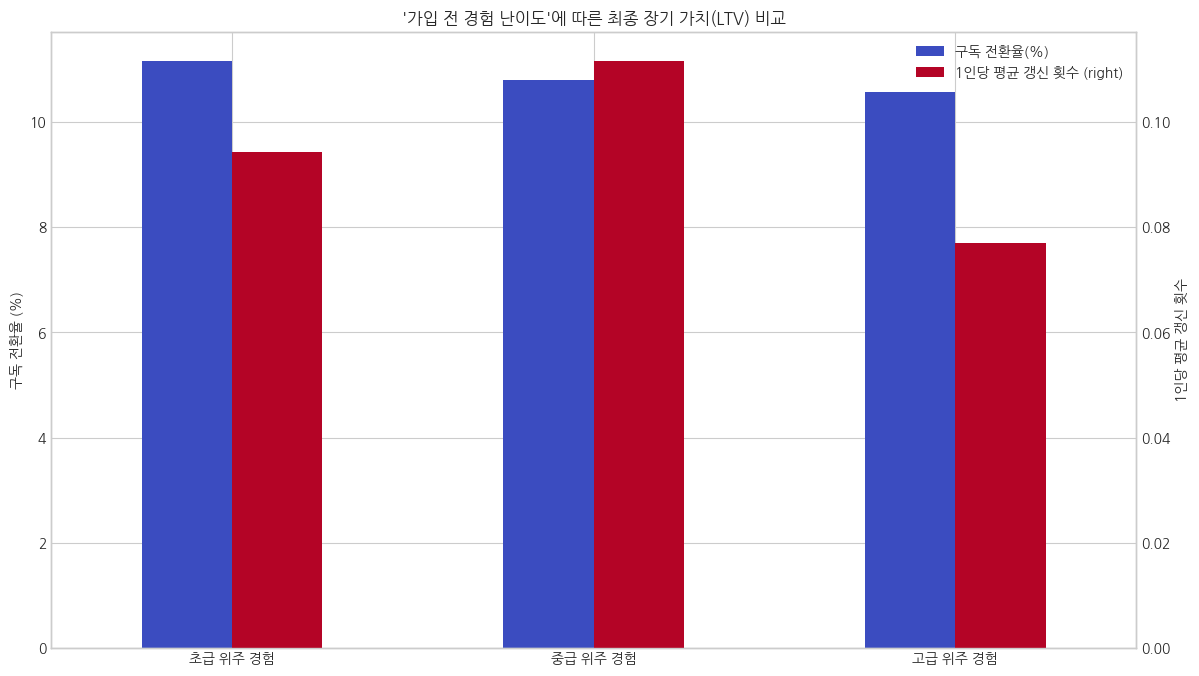

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- 1Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ' Í≥ÑÏÇ∞ --------------------
print("‚úÖ 1Îã®Í≥Ñ: Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏù¥ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# 1-1. ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê ÎÇúÏù¥ÎèÑ Ï†ïÎ≥¥ Î≥ëÌï©
#      Î∂ÑÏÑùÏùò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÍ≥†, Í≤∞Ï∏°Í∞íÏùÄ ÎØ∏Î¶¨ Ï†úÍ±∞Ìï©ÎãàÎã§.
non_member_logs_with_difficulty = pd.merge(
    null_id_enter_lesson_df[['date', 'fingerprint', 'content.id']],
    infomation_df[['content.id', 'content.difficulty']].dropna(),
    on='content.id',
    how='inner' # ÎÇúÏù¥ÎèÑ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî Î°úÍ∑∏Îßå ÎåÄÏÉÅÏúºÎ°ú Ìï®
)

# 1-2. ÎÇúÏù¥ÎèÑÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÍ∏∞ ÏúÑÌïú Îß§Ìïë(mapping) Ï†ïÏùò
#      (Ïã§Ï†ú ÎÇúÏù¥ÎèÑ Ïù¥Î¶ÑÏóê ÎßûÍ≤å ÏàòÏ†ïÌï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§.)
difficulty_map = {'beginner': 1, 'intermediate': 2, 'advanced': 3, 'hard': 4}
non_member_logs_with_difficulty['difficulty_score'] = non_member_logs_with_difficulty['content.difficulty'].map(difficulty_map)

# 1-3. Í∞Å ÏÑ∏ÏÖòÎ≥ÑÎ°ú Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ Ï†êÏàò'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
session_avg_difficulty = non_member_logs_with_difficulty.groupby(['date', 'fingerprint'])['difficulty_score'].mean()
session_avg_difficulty = session_avg_difficulty.to_frame(name='avg_difficulty_score')

print(f"  - Ï¥ù {len(session_avg_difficulty):,}Í∞úÏùò ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏóê ÎåÄÌïú ÌèâÍ∑† ÎÇúÏù¥ÎèÑÎ•º Í≥ÑÏÇ∞ÌñàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: 'ÌèâÍ∑† ÎÇúÏù¥ÎèÑ'Ïóê Îî∞Îùº Í∑∏Î£π Î∂ÑÎ¶¨ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: ÌèâÍ∑† ÎÇúÏù¥ÎèÑ Ï†êÏàòÏóê Îî∞Îùº ÏÑ∏ÏÖòÏùÑ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")

# ÌèâÍ∑† Ï†êÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£π ÎùºÎ≤®ÏùÑ Î∂ÄÏó¨Ìï©ÎãàÎã§. (pd.cut ÏÇ¨Ïö©)
bins = [0, 1.5, 2.5, float('inf')] # 1.5 ÎØ∏Îßå: Ï¥àÍ∏â, 1.5~2.5: Ï§ëÍ∏â, 2.5 Ï¥àÍ≥º: Í≥†Í∏â
labels = ['Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò', 'Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò', 'Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò']
session_avg_difficulty['difficulty_segment'] = pd.cut(
    session_avg_difficulty['avg_difficulty_score'],
    bins=bins,
    labels=labels,
    right=False # ÏôºÏ™Ω Í≤ΩÍ≥ÑÎäî Ìè¨Ìï®, Ïò§Î•∏Ï™Ω Í≤ΩÍ≥ÑÎäî ÎØ∏Ìè¨Ìï®
)

# Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
total_pool_by_difficulty = session_avg_difficulty['difficulty_segment'].value_counts()
print(total_pool_by_difficulty)

# -------------------- [ÏàòÏ†ï] 3Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ 'Í∞ÄÏûÖ' Î∞è 'LTV' ÏßÄÌëú Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖÏûê ÏãùÎ≥Ñ Î∞è LTV ÏßÄÌëúÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# 3-1. Í∞ÄÏûÖÏóê ÏÑ±Í≥µÌïú ÏÑ∏ÏÖòÏùò 'user_id'Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
converted_sessions_with_id = pd.merge(
    session_avg_difficulty.reset_index(), # Ïù∏Îç±Ïä§(date, fingerprint)Î•º Ïª¨ÎüºÏúºÎ°ú Î≥ÄÌôò
    complete_signup_df[['date', 'fingerprint', 'user_id']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)

# 3-2. Í∞Å 'ÎÇúÏù¥ÎèÑ Í∑∏Î£π'Î≥ÑÎ°ú Í∞ÄÏûÖÌïú user_id Î™©Î°ù(set)ÏùÑ ÎßåÎì≠ÎãàÎã§.
beginner_users = set(converted_sessions_with_id[converted_sessions_with_id['difficulty_segment'] == 'Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò']['user_id'].unique())
intermediate_users = set(converted_sessions_with_id[converted_sessions_with_id['difficulty_segment'] == 'Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò']['user_id'].unique())
advanced_users = set(converted_sessions_with_id[converted_sessions_with_id['difficulty_segment'] == 'Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò']['user_id'].unique())


# 3-3. Í∞Å Í∑∏Î£πÎ≥ÑÎ°ú LTV ÏßÄÌëú(Íµ¨ÎèÖ Ï†ÑÌôòÏú®, ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò)Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
def calculate_ltv_by_userid(user_set, subscribe_df, renew_df):
    """user_id Î™©Î°ùÏùÑ Î∞õÏïÑ, Ìï¥Îãπ Í∑∏Î£πÏùò Íµ¨ÎèÖ Ï†ÑÌôòÏú®Í≥º ÌèâÍ∑† Í∞±Ïã† ÌöüÏàòÎ•º Í≥ÑÏÇ∞"""
    total_users = len(user_set)
    if total_users == 0: return 0, 0

    subscribers_in_group = len(subscribe_df[subscribe_df['user_id'].isin(user_set)])
    conversion_rate = (subscribers_in_group / total_users * 100)

    total_renews_in_group = len(renew_df[renew_df['user_id'].isin(user_set)])
    avg_renews = total_renews_in_group / total_users

    return conversion_rate, avg_renews

cr_beginner, ltv_beginner = calculate_ltv_by_userid(beginner_users, sub_df, renew_df)
cr_intermediate, ltv_intermediate = calculate_ltv_by_userid(intermediate_users, sub_df, renew_df)
cr_advanced, ltv_advanced = calculate_ltv_by_userid(advanced_users, sub_df, renew_df)


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö Í≤∞Í≥º Ï¢ÖÌï© Î∞è ÏãúÍ∞ÅÌôî --------------------
# ÏµúÏ¢Ö Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
ltv_by_difficulty_df = pd.DataFrame({
    'Íµ¨ÎèÖ Ï†ÑÌôòÏú®(%)': [cr_beginner, cr_intermediate, cr_advanced],
    '1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò': [ltv_beginner, ltv_intermediate, ltv_advanced]
}, index=['Ï¥àÍ∏â ÏúÑÏ£º Í≤ΩÌóò', 'Ï§ëÍ∏â ÏúÑÏ£º Í≤ΩÌóò', 'Í≥†Í∏â ÏúÑÏ£º Í≤ΩÌóò'])

print("\n\n--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Í≤ΩÌóò ÎÇúÏù¥ÎèÑÎ≥Ñ Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê ---")
print(ltv_by_difficulty_df.round(2))

# ÏãúÍ∞ÅÌôî (Ïù¥Ï§ë Ï∂ï Ï∞®Ìä∏)
plt.rc('font', family='NanumGothic')
ax = ltv_by_difficulty_df.plot(
    kind='bar',
    figsize=(14, 8),
    rot=0,
    secondary_y='1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò', # Ïù¥Ï§ë Ï∂ï ÏÇ¨Ïö©
    colormap='coolwarm',
    title="'Í∞ÄÏûÖ Ï†Ñ Í≤ΩÌóò ÎÇúÏù¥ÎèÑ'Ïóê Îî∞Î•∏ ÏµúÏ¢Ö Ïû•Í∏∞ Í∞ÄÏπò(LTV) ÎπÑÍµê"
)
ax.set_ylabel('Íµ¨ÎèÖ Ï†ÑÌôòÏú® (%)')
ax.right_ax.set_ylabel('1Ïù∏Îãπ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency  # Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï
from scipy.stats import f_oneway          # ANOVA

# -------------------- 1. Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ Í≤ÄÏ¶ù (Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï) --------------------
print("="*40)
print("  [Í≤ÄÏ¶ù 1] ÏÑ∏ Í∑∏Î£π Í∞Ñ Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù")
print("="*40)

# 1-1. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ ÏúÑÌïú Î∂ÑÌï†Ìëú(Contingency Table) ÏÉùÏÑ±
# Í∞Å Í∑∏Î£πÏùò 'Íµ¨ÎèÖÏûê' Ïàò
subscribers_beginner = len(sub_df[sub_df['user_id'].isin(beginner_users)])
subscribers_intermediate = len(sub_df[sub_df['user_id'].isin(intermediate_users)])
subscribers_advanced = len(sub_df[sub_df['user_id'].isin(advanced_users)])

# Í∞Å Í∑∏Î£πÏùò 'ÎπÑÍµ¨ÎèÖÏûê' Ïàò (Í∞ÄÏûÖÏùÄ ÌñàÏßÄÎßå Íµ¨ÎèÖÏùÄ Ïïà Ìïú ÏÇ¨Îûå)
non_subscribers_beginner = len(beginner_users) - subscribers_beginner
non_subscribers_intermediate = len(intermediate_users) - subscribers_intermediate
non_subscribers_advanced = len(advanced_users) - subscribers_advanced

# 3x2 Î∂ÑÌï†Ìëú Îç∞Ïù¥ÌÑ∞
observed_values_sub = [
    [subscribers_beginner, non_subscribers_beginner],
    [subscribers_intermediate, non_subscribers_intermediate],
    [subscribers_advanced, non_subscribers_advanced]
]

# 1-2. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï ÏàòÌñâ
chi2, p_value_sub, _, _ = chi2_contingency(observed_values_sub)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.4f}")
print(f"p-value: {p_value_sub:.4f}")

# 1-3. p-value Ìï¥ÏÑù
alpha = 0.05
print("\n--- Í≤∞Î°† (Íµ¨ÎèÖ Ï†ÑÌôòÏú®) ---")
if p_value_sub < alpha:
    print(f"‚úÖ p-value ({p_value_sub:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
    print("   Í≤∞Î°†: Í∞ÄÏûÖ Ï†Ñ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò ÌèâÍ∑† ÎÇúÏù¥ÎèÑÎäî 'Íµ¨ÎèÖ Ï†ÑÌôòÏú®'Ïóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value_sub:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")


# -------------------- 2. ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ Í≤ÄÏ¶ù (ANOVA) --------------------
print("\n\n" + "="*40)
print("  [Í≤ÄÏ¶ù 2] ÏÑ∏ Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù")
print("="*40)

# 2-1. ANOVAÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: Í∞Å ÏÇ¨Ïö©ÏûêÎ≥Ñ 'Í∞±Ïã† ÌöüÏàò'Î•º Í≥ÑÏÇ∞
renew_counts_per_user = renew_df['user_id'].value_counts()

# Í∞Å Í∑∏Î£πÏóê ÏÜçÌïú ÏÇ¨Ïö©ÏûêÎì§Ïùò Í∞±Ïã† ÌöüÏàòÎßå Series ÌòïÌÉúÎ°ú Ï∂îÏ∂ú
# (Í∞±Ïã† Í∏∞Î°ùÏù¥ ÏóÜÎäî ÏÇ¨Ïö©ÏûêÎäî 0ÏúºÎ°ú Ï≤òÎ¶¨Ìï¥Ïïº Ï†ïÌôïÌïú ÌèâÍ∑† ÎπÑÍµêÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§)
def get_renew_counts(user_set, renew_counts):
    return pd.Series(list(user_set)).map(renew_counts).fillna(0)

renew_data_beginner = get_renew_counts(beginner_users, renew_counts_per_user)
renew_data_intermediate = get_renew_counts(intermediate_users, renew_counts_per_user)
renew_data_advanced = get_renew_counts(advanced_users, renew_counts_per_user)

# 2-2. ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù (ANOVA) ÏàòÌñâ
f_statistic, p_value_ltv = f_oneway(renew_data_beginner, renew_data_intermediate, renew_data_advanced)

print(f"\n--- ANOVA Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"F-ÌÜµÍ≥ÑÎüâ: {f_statistic:.4f}")
print(f"p-value: {p_value_ltv:.4f}")

# 2-3. p-value Ìï¥ÏÑù
print("\n--- Í≤∞Î°† (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ---")
if p_value_ltv < alpha:
    print(f"‚úÖ p-value ({p_value_ltv:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÏûëÏúºÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.")
    print("   Í≤∞Î°†: Í∞ÄÏûÖ Ï†Ñ Í≤ΩÌóòÌïú ÏΩòÌÖêÏ∏†Ïùò ÌèâÍ∑† ÎÇúÏù¥ÎèÑÎäî 'ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV)'Ïóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.")
else:
    print(f"‚ùå p-value ({p_value_ltv:.4f})Í∞Ä Ïú†ÏùòÏàòÏ§Ä ({alpha})Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")

  [Í≤ÄÏ¶ù 1] ÏÑ∏ Í∑∏Î£π Í∞Ñ Íµ¨ÎèÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 0.2968
p-value: 0.8621

--- Í≤∞Î°† (Íµ¨ÎèÖ Ï†ÑÌôòÏú®) ---
‚ùå p-value (0.8621)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.


  [Í≤ÄÏ¶ù 2] ÏÑ∏ Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò(LTV) Ï∞®Ïù¥ ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù

--- ANOVA Í≤ÄÏ†ï Í≤∞Í≥º ---
F-ÌÜµÍ≥ÑÎüâ: 2.9454
p-value: 0.0526

--- Í≤∞Î°† (ÌèâÍ∑† Í∞±Ïã† ÌöüÏàò) ---
‚ùå p-value (0.0526)Í∞Ä Ïú†ÏùòÏàòÏ§Ä (0.05)Î≥¥Îã§ ÌÅ¨ÎØÄÎ°ú, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.


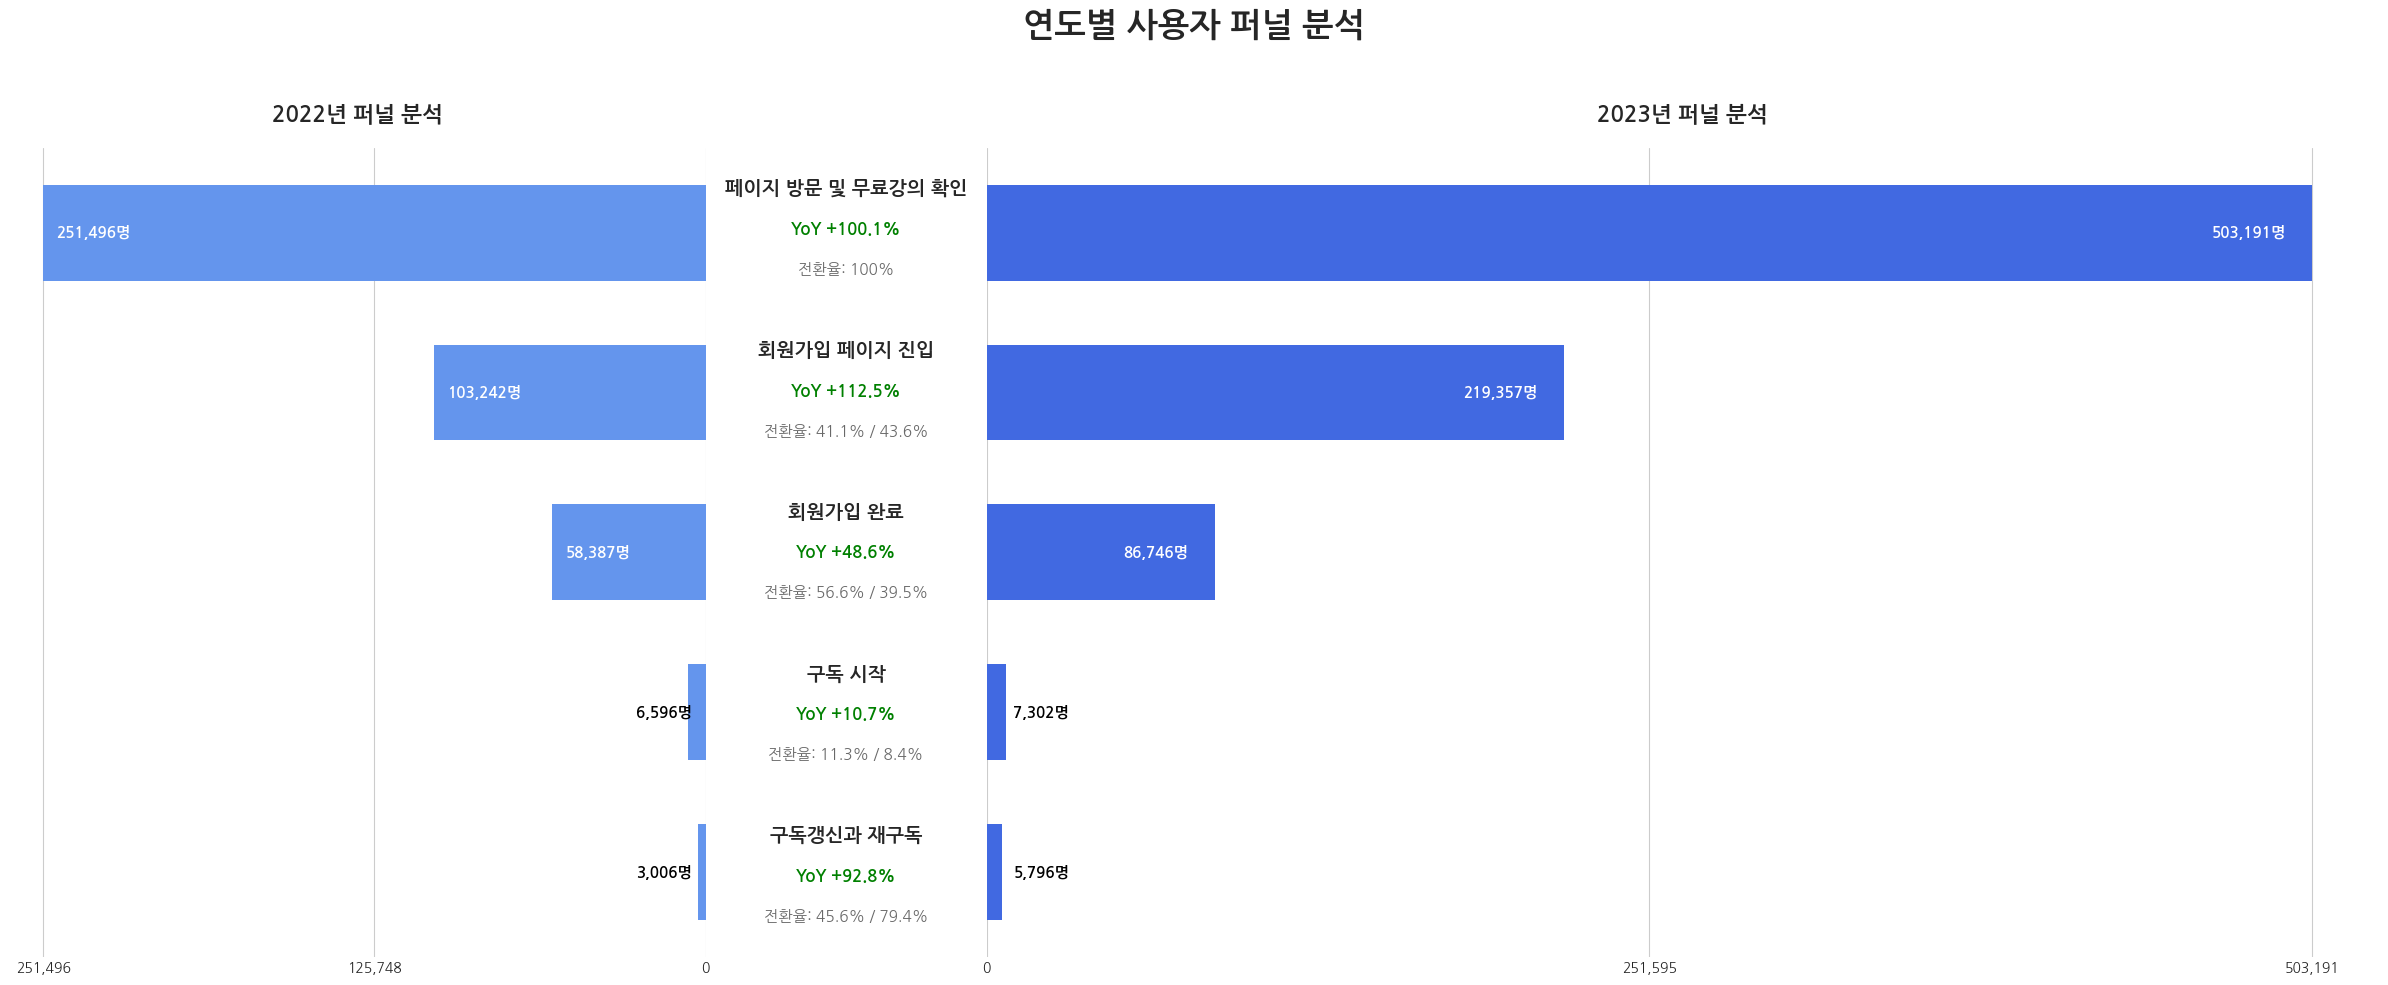

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÏßÄÌëú Í≥ÑÏÇ∞ (ÎèôÏùº) --------------------
# (Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùºÌïòÍ≤å dfÎ•º Ï§ÄÎπÑÌï©ÎãàÎã§)
data = {
    'Îã®Í≥Ñ': ['ÌéòÏù¥ÏßÄ Î∞©Î¨∏ Î∞è Î¨¥Î£åÍ∞ïÏùò ÌôïÏù∏', 'ÌöåÏõêÍ∞ÄÏûÖ ÌéòÏù¥ÏßÄ ÏßÑÏûÖ', 'ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å', 'Íµ¨ÎèÖ ÏãúÏûë', 'Íµ¨ÎèÖÍ∞±Ïã†Í≥º Ïû¨Íµ¨ÎèÖ'],
    '2022ÎÖÑ': [251496, 103242, 58387, 6596, 3006],
    '2023ÎÖÑ': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('Îã®Í≥Ñ')
df['YoY_ÏÑ±Ïû•Î•†(%)'] = (df['2023ÎÖÑ'] - df['2022ÎÖÑ']) / df['2022ÎÖÑ'] * 100
df['2022_Ï†ÑÌôòÏú®(%)'] = (df['2022ÎÖÑ'] / df['2022ÎÖÑ'].shift(1) * 100).fillna(100)
df['2023_Ï†ÑÌôòÏú®(%)'] = (df['2023ÎÖÑ'] / df['2023ÎÖÑ'].shift(1) * 100).fillna(100)


# -------------------- 2Îã®Í≥Ñ: ÏóÖÍ∑∏Î†àÏù¥ÎìúÎêú ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò --------------------
def plot_funnel_infographic(ax, data, title, color, align='left'):
    """ÌçºÎÑê Ï∞®Ìä∏Ïùò ÌïúÏ™Ω Î©¥ÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò (ÌÖçÏä§Ìä∏ ÏóÜÏùå)"""
    y_pos = np.arange(len(data))

    # [ÌïµÏã¨] ÎßâÎåÄÎ•º ÏôºÏ™Ω ÎòêÎäî Ïò§Î•∏Ï™ΩÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ï§ëÏïôÏóê Í≥µÍ∞Ñ ÌôïÎ≥¥
    if align == 'left':
        # ÏôºÏ™Ω Í∑∏ÎûòÌîÑÎäî ÏùåÏàò Î∞©Ìñ•ÏúºÎ°ú Í∑∏Î†§ÏÑú Ïò§Î•∏Ï™ΩÏúºÎ°ú Ï†ïÎ†¨Îêú Í≤ÉÏ≤òÎüº Î≥¥Ïù¥Í≤å Ìï®
        ax.barh(y_pos, -data, color=color, height=0.6, align='center')
        ax.set_xticks([-data.iloc[0], -data.iloc[0]/2, 0])
        ax.set_xticklabels([f'{int(data.iloc[0]):,}', f'{int(data.iloc[0]/2):,}', '0'], fontsize=10)
    else: # align == 'right'
        ax.barh(y_pos, data, color=color, height=0.6, align='center')
        ax.set_xticks([0, data.iloc[0]/2, data.iloc[0]])
        ax.set_xticklabels(['0', f'{int(data.iloc[0]/2):,}', f'{int(data.iloc[0]):,}'], fontsize=10)

    ax.set_yticks([]) # yÏ∂ï ÎààÍ∏àÏùÄ Ï§ëÏïô ÌÖçÏä§Ìä∏Î°ú ÎåÄÏ≤¥
    ax.invert_yaxis()
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_title(title, fontsize=16, weight='bold', pad=20)

    # ÎßâÎåÄ ÏïàÏóê Í∞í ÌëúÏãú
    for i, value in enumerate(data):
        text_color = 'white'
        if align == 'left':
            ha = 'left'
            x_pos = -value + (data.iloc[0] * 0.02)
        else:
            ha = 'right'
            x_pos = value - (data.iloc[0] * 0.02)

        # ÎßâÎåÄÍ∞Ä ÎÑàÎ¨¥ Ï¢ÅÏúºÎ©¥ ÌÖçÏä§Ìä∏ ÏÉâ Î≥ÄÍ≤Ω
        if value < data.iloc[0] * 0.1:
            text_color = 'black'
            ha = 'right' if align == 'left' else 'left'
            x_pos = -data.iloc[0] * 0.02 if align == 'left' else data.iloc[0] * 0.02

        ax.text(x_pos, i, f'{value:,}Î™Ö', ha=ha, va='center', color=text_color, fontsize=11, weight='bold')

# -------------------- 3Îã®Í≥Ñ: ÏµúÏ¢Ö Î¶¨Ìè¨Ìä∏ ÏãúÍ∞ÅÌôî (ÏàòÏ†ï ÏôÑÎ£å) --------------------
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# [ÌïµÏã¨] 3Í∞úÏùò subplotÏùÑ ÎßåÎì≠ÎãàÎã§ (ÏôºÏ™Ω ÌçºÎÑê, Ï§ëÏïô ÌÖçÏä§Ìä∏, Ïò§Î•∏Ï™Ω ÌçºÎÑê)
fig, axes = plt.subplots(1, 3, figsize=(24, 10),
                         gridspec_kw={'width_ratios': [df['2022ÎÖÑ'].max(), 1, df['2023ÎÖÑ'].max()]})
fig.suptitle('Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Ïö©Ïûê ÌçºÎÑê Î∂ÑÏÑù', fontsize=24, weight='bold')

# --- ÏôºÏ™Ω: 2022ÎÖÑ ÌçºÎÑê ---
plot_funnel_infographic(axes[0], df['2022ÎÖÑ'], '2022ÎÖÑ ÌçºÎÑê Î∂ÑÏÑù', 'cornflowerblue', align='left')

# --- Ïò§Î•∏Ï™Ω: 2023ÎÖÑ ÌçºÎÑê ---
plot_funnel_infographic(axes[2], df['2023ÎÖÑ'], '2023ÎÖÑ ÌçºÎÑê Î∂ÑÏÑù', 'royalblue', align='right')

# --- Ï§ëÏïô: ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥ ---
ax_center = axes[1]
ax_center.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax_center.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax_center.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax_center.set_ylim(len(df)-0.5, -0.5) # yÏ∂ï Î≤îÏúÑ ÎßûÏ∂îÍ∏∞

for i, stage in enumerate(df.index):
    # Îã®Í≥Ñ Ïù¥Î¶Ñ
    ax_center.text(0.5, i-0.25, stage, ha='center', va='center', fontsize=14, weight='bold')

    # YoY ÏÑ±Ïû•Î•†
    growth = df['YoY_ÏÑ±Ïû•Î•†(%)'].iloc[i]
    growth_text = f'YoY {growth:+.1f}%'
    growth_color = 'green' if growth > 0 else 'red'
    ax_center.text(0.5, i, growth_text, ha='center', va='center', color=growth_color, fontsize=12, weight='bold')

    # Ï†ÑÌôòÏú® (2022ÎÖÑ / 2023ÎÖÑ)
    conv_22 = df['2022_Ï†ÑÌôòÏú®(%)'].iloc[i]
    conv_23 = df['2023_Ï†ÑÌôòÏú®(%)'].iloc[i]
    conv_text = f'Ï†ÑÌôòÏú®: {conv_22:.1f}% / {conv_23:.1f}%'
    if i == 0: conv_text = 'Ï†ÑÌôòÏú®: 100%'
    ax_center.text(0.5, i+0.25, conv_text, ha='center', va='center', color='dimgray', fontsize=11, style='italic')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

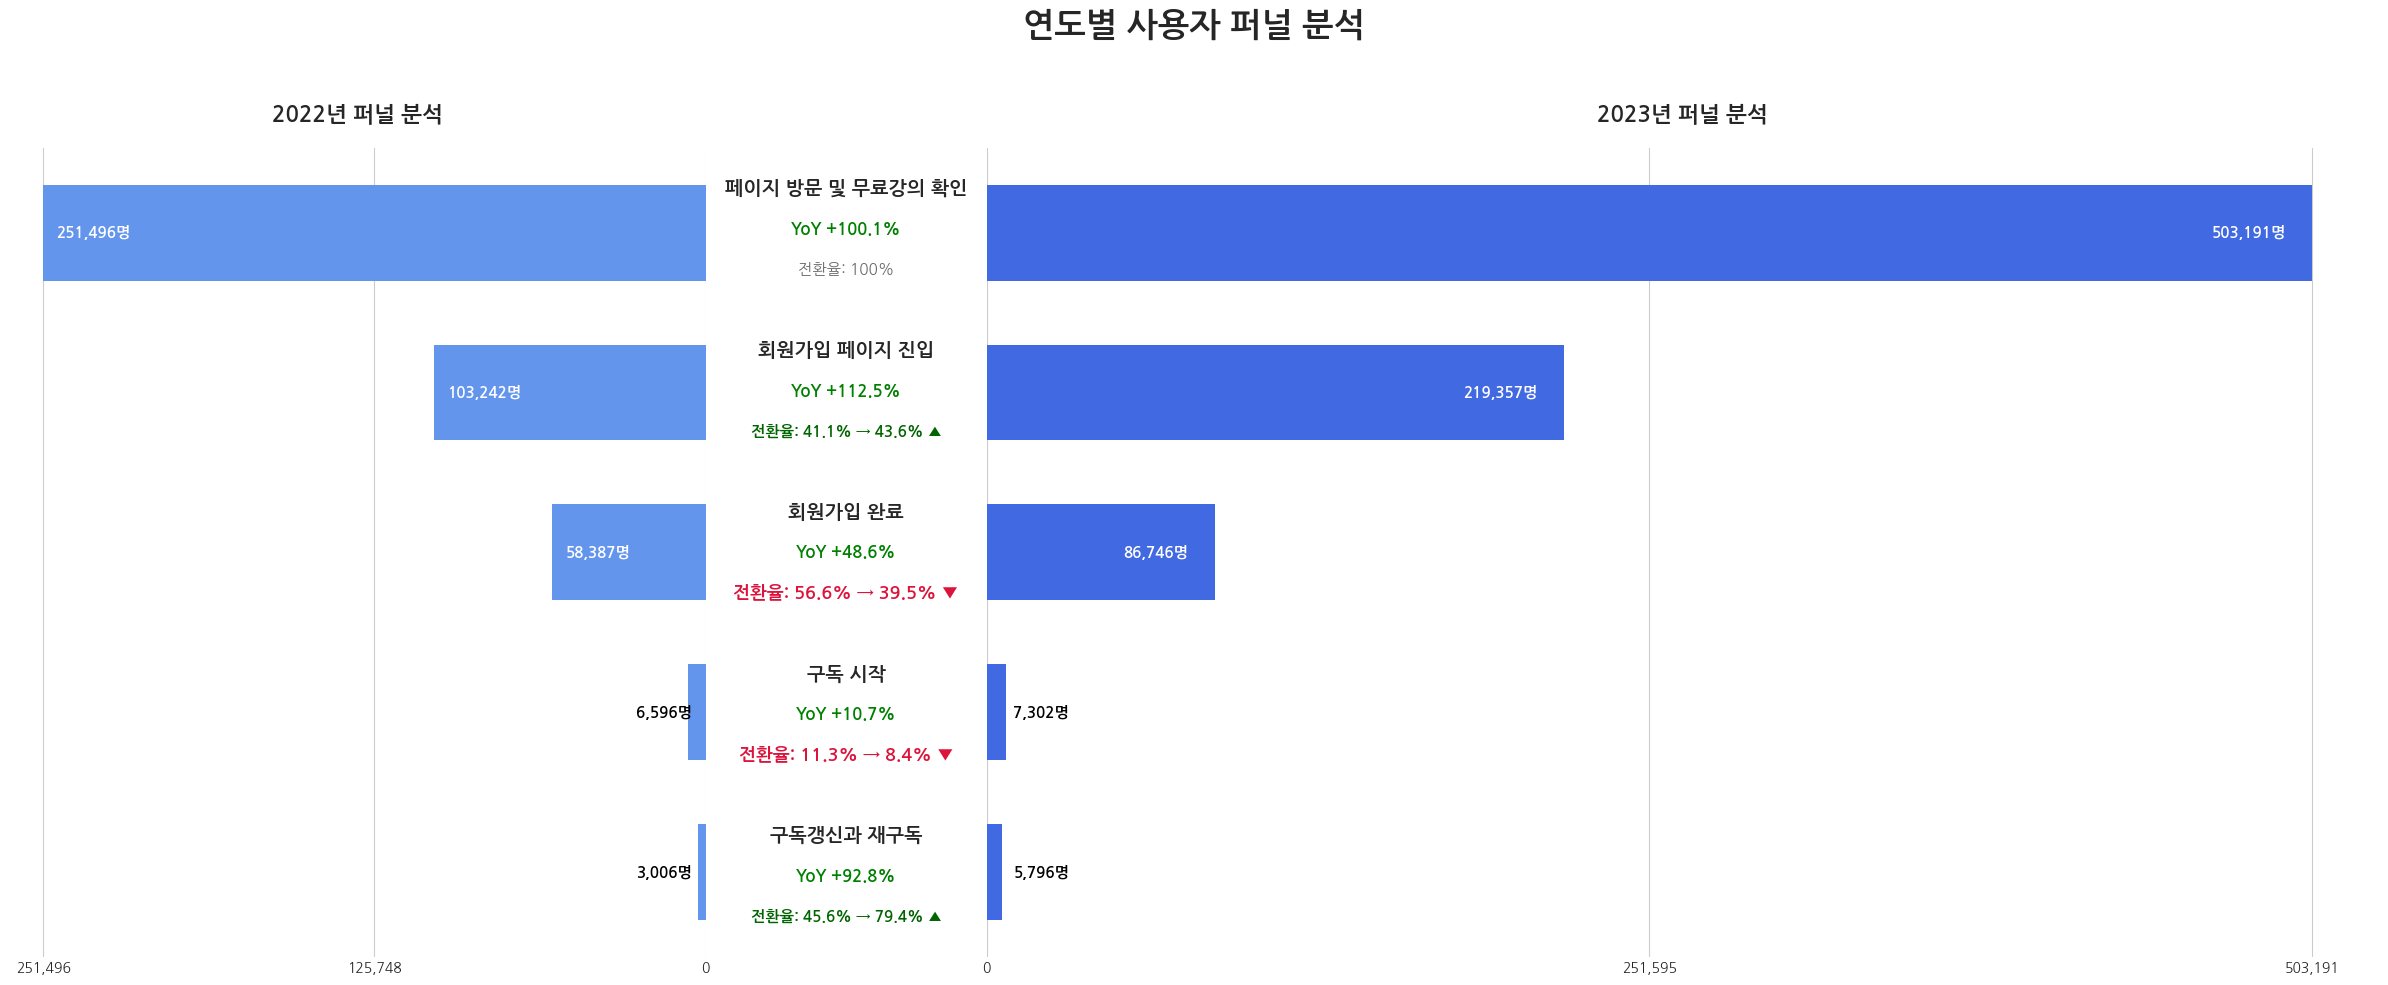

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è ÏßÄÌëú Í≥ÑÏÇ∞ (ÎèôÏùº) --------------------
# (Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùºÌïòÍ≤å dfÎ•º Ï§ÄÎπÑÌï©ÎãàÎã§)
data = {
    'Îã®Í≥Ñ': ['ÌéòÏù¥ÏßÄ Î∞©Î¨∏ Î∞è Î¨¥Î£åÍ∞ïÏùò ÌôïÏù∏', 'ÌöåÏõêÍ∞ÄÏûÖ ÌéòÏù¥ÏßÄ ÏßÑÏûÖ', 'ÌöåÏõêÍ∞ÄÏûÖ ÏôÑÎ£å', 'Íµ¨ÎèÖ ÏãúÏûë', 'Íµ¨ÎèÖÍ∞±Ïã†Í≥º Ïû¨Íµ¨ÎèÖ'],
    '2022ÎÖÑ': [251496, 103242, 58387, 6596, 3006],
    '2023ÎÖÑ': [503191, 219357, 86746, 7302, 5796]
}
df = pd.DataFrame(data).set_index('Îã®Í≥Ñ')
df['YoY_ÏÑ±Ïû•Î•†(%)'] = (df['2023ÎÖÑ'] - df['2022ÎÖÑ']) / df['2022ÎÖÑ'] * 100
df['2022_Ï†ÑÌôòÏú®(%)'] = (df['2022ÎÖÑ'] / df['2022ÎÖÑ'].shift(1) * 100).fillna(100)
df['2023_Ï†ÑÌôòÏú®(%)'] = (df['2023ÎÖÑ'] / df['2023ÎÖÑ'].shift(1) * 100).fillna(100)


# -------------------- 2Îã®Í≥Ñ: ÏóÖÍ∑∏Î†àÏù¥ÎìúÎêú ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò --------------------
def plot_funnel_infographic(ax, data, title, color, align='left'):
    """ÌçºÎÑê Ï∞®Ìä∏Ïùò ÌïúÏ™Ω Î©¥ÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò (ÌÖçÏä§Ìä∏ ÏóÜÏùå)"""
    y_pos = np.arange(len(data))

    # [ÌïµÏã¨] ÎßâÎåÄÎ•º ÏôºÏ™Ω ÎòêÎäî Ïò§Î•∏Ï™ΩÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ï§ëÏïôÏóê Í≥µÍ∞Ñ ÌôïÎ≥¥
    if align == 'left':
        # ÏôºÏ™Ω Í∑∏ÎûòÌîÑÎäî ÏùåÏàò Î∞©Ìñ•ÏúºÎ°ú Í∑∏Î†§ÏÑú Ïò§Î•∏Ï™ΩÏúºÎ°ú Ï†ïÎ†¨Îêú Í≤ÉÏ≤òÎüº Î≥¥Ïù¥Í≤å Ìï®
        ax.barh(y_pos, -data, color=color, height=0.6, align='center')
        ax.set_xticks([-data.iloc[0], -data.iloc[0]/2, 0])
        ax.set_xticklabels([f'{int(data.iloc[0]):,}', f'{int(data.iloc[0]/2):,}', '0'], fontsize=10)
    else: # align == 'right'
        ax.barh(y_pos, data, color=color, height=0.6, align='center')
        ax.set_xticks([0, data.iloc[0]/2, data.iloc[0]])
        ax.set_xticklabels(['0', f'{int(data.iloc[0]/2):,}', f'{int(data.iloc[0]):,}'], fontsize=10)

    ax.set_yticks([]) # yÏ∂ï ÎààÍ∏àÏùÄ Ï§ëÏïô ÌÖçÏä§Ìä∏Î°ú ÎåÄÏ≤¥
    ax.invert_yaxis()
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_title(title, fontsize=16, weight='bold', pad=20)

    # ÎßâÎåÄ ÏïàÏóê Í∞í ÌëúÏãú
    for i, value in enumerate(data):
        text_color = 'white'
        if align == 'left':
            ha = 'left'
            x_pos = -value + (data.iloc[0] * 0.02)
        else:
            ha = 'right'
            x_pos = value - (data.iloc[0] * 0.02)

        # ÎßâÎåÄÍ∞Ä ÎÑàÎ¨¥ Ï¢ÅÏúºÎ©¥ ÌÖçÏä§Ìä∏ ÏÉâ Î≥ÄÍ≤Ω
        if value < data.iloc[0] * 0.1:
            text_color = 'black'
            ha = 'right' if align == 'left' else 'left'
            x_pos = -data.iloc[0] * 0.02 if align == 'left' else data.iloc[0] * 0.02

        ax.text(x_pos, i, f'{value:,}Î™Ö', ha=ha, va='center', color=text_color, fontsize=11, weight='bold')
# -------------------- 3Îã®Í≥Ñ: ÏµúÏ¢Ö Î¶¨Ìè¨Ìä∏ ÏãúÍ∞ÅÌôî (ÏàòÏ†ï ÏôÑÎ£å) --------------------
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 3Í∞úÏùò subplot ÏÉùÏÑ± (Ïù¥Ï†ÑÍ≥º ÎèôÏùº)
fig, axes = plt.subplots(1, 3, figsize=(24, 10),
                         gridspec_kw={'width_ratios': [df['2022ÎÖÑ'].max(), 1.2, df['2023ÎÖÑ'].max()]}) # Ï§ëÏïô Í≥µÍ∞Ñ ÏïΩÍ∞Ñ ÎÑìÌûò
fig.suptitle('Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Ïö©Ïûê ÌçºÎÑê Î∂ÑÏÑù', fontsize=24, weight='bold')

# --- ÏôºÏ™Ω: 2022ÎÖÑ ÌçºÎÑê ---
plot_funnel_infographic(axes[0], df['2022ÎÖÑ'], '2022ÎÖÑ ÌçºÎÑê Î∂ÑÏÑù', 'cornflowerblue', align='left')

# --- Ïò§Î•∏Ï™Ω: 2023ÎÖÑ ÌçºÎÑê ---
plot_funnel_infographic(axes[2], df['2023ÎÖÑ'], '2023ÎÖÑ ÌçºÎÑê Î∂ÑÏÑù', 'royalblue', align='right')


# --- [ÌïµÏã¨ ÏàòÏ†ï] Ï§ëÏïô: ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥ (Ï°∞Í±¥Î∂Ä ÏÑúÏãù Ï∂îÍ∞Ä) ---
ax_center = axes[1]
ax_center.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax_center.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax_center.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax_center.set_ylim(len(df)-0.5, -0.5)

for i, stage in enumerate(df.index):
    # Îã®Í≥Ñ Ïù¥Î¶Ñ
    ax_center.text(0.5, i-0.25, stage, ha='center', va='center', fontsize=14, weight='bold')

    # YoY ÏÑ±Ïû•Î•†
    growth = df['YoY_ÏÑ±Ïû•Î•†(%)'].iloc[i]
    growth_text = f'YoY {growth:+.1f}%'
    growth_color = 'green' if growth > 0 else 'red'
    ax_center.text(0.5, i, growth_text, ha='center', va='center', color=growth_color, fontsize=12, weight='bold')

    # [ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ] Ï†ÑÌôòÏú® (Ï°∞Í±¥Î∂Ä ÏÑúÏãù Ï†ÅÏö©)
    conv_22 = df['2022_Ï†ÑÌôòÏú®(%)'].iloc[i]
    conv_23 = df['2023_Ï†ÑÌôòÏú®(%)'].iloc[i]

    # Í∏∞Î≥∏ ÌÖçÏä§Ìä∏ÏôÄ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
    conv_text = f'Ï†ÑÌôòÏú®: {conv_22:.1f}% ‚Üí {conv_23:.1f}%'
    text_color = 'dimgray'
    font_weight = 'normal'
    font_size = 11

    # Ï≤´ Îã®Í≥ÑÎäî 100%Î°ú Í≥†Ï†ï
    if i == 0:
        conv_text = 'Ï†ÑÌôòÏú®: 100%'
    # Ï†ÑÌôòÏú®Ïù¥ ÌïòÎùΩÌïú Í≤ΩÏö∞
    elif conv_23 < conv_22:
        arrow = '‚ñº'
        conv_text = f'Ï†ÑÌôòÏú®: {conv_22:.1f}% ‚Üí {conv_23:.1f}% {arrow}'
        text_color = 'crimson' # ÏßÑÌïú Îπ®Í∞ÑÏÉâ
        font_weight = 'bold'
        font_size = 13 # Í∏ÄÏî® ÌÅ¨Í∏∞ ÌÇ§ÏõÄ
    # (ÏÑ†ÌÉù) Ï†ÑÌôòÏú®Ïù¥ ÏÉÅÏäπÌïú Í≤ΩÏö∞
    elif conv_23 > conv_22:
        arrow = '‚ñ≤'
        conv_text = f'Ï†ÑÌôòÏú®: {conv_22:.1f}% ‚Üí {conv_23:.1f}% {arrow}'
        text_color = 'darkgreen' # ÏßÑÌïú Ï¥àÎ°ùÏÉâ
        font_weight = 'bold'

    ax_center.text(0.5, i+0.25, conv_text, ha='center', va='center',
                   color=text_color, fontsize=font_size, weight=font_weight, style='italic')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏïÑÎûò Î≥ÄÏàòÎì§Ïù¥ Î™®Îëê Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. null_id_enter_lesson_df: Î™®Îì† ÎπÑÌöåÏõê Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)
# 2. id_info_df: content.idÎ≥Ñ Í∞ïÏùò Íµ¨ÏÑ±(stream, practice Îì±) Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# 3. complete_signup_df: ÌöåÏõêÍ∞ÄÏûÖ Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)


# -------------------- 1Îã®Í≥Ñ: 'Ïã§ÏäµÌòï' ÏΩòÌÖêÏ∏† Ï†ïÏùò --------------------
print("‚úÖ 1Îã®Í≥Ñ: 'Ïã§ÏäµÌòï' ÏΩòÌÖêÏ∏†Î•º Ï†ïÏùòÌï©ÎãàÎã§...")
# 'practice' Ïª¨ÎüºÏùò Ïò§ÌÉÄÎ•º ÏàòÏ†ïÌñàÎã§Í≥† Í∞ÄÏ†ï
id_info_df['total_components'] = id_info_df[['stream', 'note', 'practice', 'quiz']].sum(axis=1)
id_info_df['practice_ratio'] = id_info_df['practice'] / id_info_df['total_components']
practice_heavy_content_ids = set(id_info_df[id_info_df['practice_ratio'] >= 0.3]['content.id'].unique())
print(f"  - Ï¥ù {len(id_info_df)}Í∞ú ÏΩòÌÖêÏ∏† Ï§ë, {len(practice_heavy_content_ids)}Í∞úÎ•º 'Ïã§ÏäµÌòï'ÏúºÎ°ú Ï†ïÏùòÌñàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ ÏÑ∏ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ 'Ïã§ÏäµÌòïÎßå', 'Í∞ïÏùòÌòïÎßå', 'ÌòºÌï©' Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")
# ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê 'Ïã§ÏäµÌòï Ïó¨Î∂Ä'Î•º ÌëúÏãú
non_member_logs_with_type = pd.merge(
    null_id_enter_lesson_df,
    id_info_df[['content.id']], # 'Ïã§ÏäµÌòï' Ï†ïÏùòÎ•º ÏúÑÌï¥ id_info_dfÏùò content.idÎ•º ÏÇ¨Ïö©
    on='content.id',
    how='left',
    indicator=True
)
non_member_logs_with_type['is_practice_heavy'] = non_member_logs_with_type['content.id'].isin(practice_heavy_content_ids)


# Í∞Å ÏÑ∏ÏÖòÎ≥Ñ Í≤ΩÌóò Ïú†ÌòïÏùÑ ÏöîÏïΩ
session_experience_summary = non_member_logs_with_type.groupby(['date', 'fingerprint'])['is_practice_heavy'].agg(['any', 'all'])

# 'Ïã§ÏäµÌòïÎßå' Í∑∏Î£π: Í≤ΩÌóòÌïú Î™®Îì† Í≤ÉÏù¥ Ïã§ÏäµÌòï (all == True)
practice_only_sessions = set(session_experience_summary[session_experience_summary['all'] == True].index)
# 'Í∞ïÏùòÌòïÎßå' Í∑∏Î£π: Í≤ΩÌóòÌïú Î™®Îì† Í≤ÉÏù¥ Í∞ïÏùòÌòï (any == False)
lecture_only_sessions = set(session_experience_summary[session_experience_summary['any'] == False].index)
# 'ÌòºÌï©' Í∑∏Î£π: Í∑∏ Ïô∏ ÎÇòÎ®∏ÏßÄ
all_sessions = set(session_experience_summary.index)
mixed_sessions = all_sessions - practice_only_sessions - lecture_only_sessions

# Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)'
total_pool_by_type = {
    'Ïã§ÏäµÌòïÎßå Í≤ΩÌóò': len(practice_only_sessions),
    'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò': len(lecture_only_sessions),
    'ÌòºÌï© Í≤ΩÌóò': len(mixed_sessions)
}
print("  - Í∞Å Í∑∏Î£πÎ≥Ñ Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®):", total_pool_by_type)


# -------------------- 3Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")
# Í∞ÄÏûÖÏóê ÏÑ±Í≥µÌïú ÏÑ∏ÏÖò Î™©Î°ù
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

# Í∞Å Í∑∏Î£πÍ≥º Í∞ÄÏûÖ ÏÑ∏ÏÖòÏùò ÍµêÏßëÌï©ÏùÑ Íµ¨ÌïòÏó¨ 'Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)' Í≥ÑÏÇ∞
conversions_practice_only = len(practice_only_sessions.intersection(converted_sessions))
conversions_lecture_only = len(lecture_only_sessions.intersection(converted_sessions))
conversions_mixed = len(mixed_sessions.intersection(converted_sessions))

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conv_rate_practice = (conversions_practice_only / total_pool_by_type['Ïã§ÏäµÌòïÎßå Í≤ΩÌóò'] * 100) if total_pool_by_type['Ïã§ÏäµÌòïÎßå Í≤ΩÌóò'] > 0 else 0
conv_rate_lecture = (conversions_lecture_only / total_pool_by_type['Í∞ïÏùòÌòïÎßå Í≤ΩÌóò'] * 100) if total_pool_by_type['Í∞ïÏùòÌòïÎßå Í≤ΩÌóò'] > 0 else 0
conv_rate_mixed = (conversions_mixed / total_pool_by_type['ÌòºÌï© Í≤ΩÌóò'] * 100) if total_pool_by_type['ÌòºÌï© Í≤ΩÌóò'] > 0 else 0

# ÏµúÏ¢Ö Í≤∞Í≥º ÌÖåÏù¥Î∏î
conversion_df = pd.DataFrame({
    'Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)': [conv_rate_practice, conv_rate_lecture, conv_rate_mixed]
}, index=['Ïã§ÏäµÌòïÎßå Í≤ΩÌóò', 'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò', 'ÌòºÌï© Í≤ΩÌóò'])
print(conversion_df.round(2))


# -------------------- 4Îã®Í≥Ñ: 'Ïã§ÏäµÌòïÎßå' vs 'Í∞ïÏùòÌòïÎßå' Í∑∏Î£π ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú 'Ïã§ÏäµÌòïÎßå' vs 'Í∞ïÏùòÌòïÎßå' Í∑∏Î£πÏùò Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌï©ÎãàÎã§...")
# Î∂ÑÌï†Ìëú ÏÉùÏÑ±: [[Ïã§Ïäµ-Í∞ÄÏûÖ, Ïã§Ïäµ-ÎπÑÍ∞ÄÏûÖ], [Í∞ïÏùò-Í∞ÄÏûÖ, Í∞ïÏùò-ÎπÑÍ∞ÄÏûÖ]]
observed_values = [
    [conversions_practice_only, total_pool_by_type['Ïã§ÏäµÌòïÎßå Í≤ΩÌóò'] - conversions_practice_only],
    [conversions_lecture_only, total_pool_by_type['Í∞ïÏùòÌòïÎßå Í≤ΩÌóò'] - conversions_lecture_only]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.")
else:
    print("   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")

‚úÖ 1Îã®Í≥Ñ: 'Ïã§ÏäµÌòï' ÏΩòÌÖêÏ∏†Î•º Ï†ïÏùòÌï©ÎãàÎã§...
  - Ï¥ù 151Í∞ú ÏΩòÌÖêÏ∏† Ï§ë, 24Í∞úÎ•º 'Ïã§ÏäµÌòï'ÏúºÎ°ú Ï†ïÏùòÌñàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ 'Ïã§ÏäµÌòïÎßå', 'Í∞ïÏùòÌòïÎßå', 'ÌòºÌï©' Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
  - Í∞Å Í∑∏Î£πÎ≥Ñ Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®): {'Ïã§ÏäµÌòïÎßå Í≤ΩÌóò': 22034, 'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò': 51856, 'ÌòºÌï© Í≤ΩÌóò': 15305}

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
         Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)
Ïã§ÏäµÌòïÎßå Í≤ΩÌóò       4.59
Í∞ïÏùòÌòïÎßå Í≤ΩÌóò       5.70
ÌòºÌï© Í≤ΩÌóò        15.48

‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú 'Ïã§ÏäµÌòïÎßå' vs 'Í∞ïÏùòÌòïÎßå' Í∑∏Î£πÏùò Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌï©ÎãàÎã§...

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 37.6630
p-value: 0.0000
   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.


‚úÖ 1Îã®Í≥Ñ: 'Ïã§ÏäµÌòï'Í≥º 'Í∞ïÏùòÌòï' ÏΩòÌÖêÏ∏†Î•º Ï†ïÏùòÌï©ÎãàÎã§...

‚úÖ 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ ÏÉàÎ°úÏö¥ ÏÑ∏ Í∑∏Î£π('Í∞ïÏùòÌòïÎßå', 'ÌòºÌï©', 'Ïã§ÏäµÌòï')ÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
  - Í∞Å Í∑∏Î£πÎ≥Ñ Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®): {'Ïã§ÏäµÌòï Í≤ΩÌóò': 37339, 'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò': 51856}

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...
         Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)
Ïã§ÏäµÌòï Í≤ΩÌóò        9.05
Í∞ïÏùòÌòïÎßå Í≤ΩÌóò       5.70

‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º (p-value): 0.0000 ---
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 368.1105
   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.


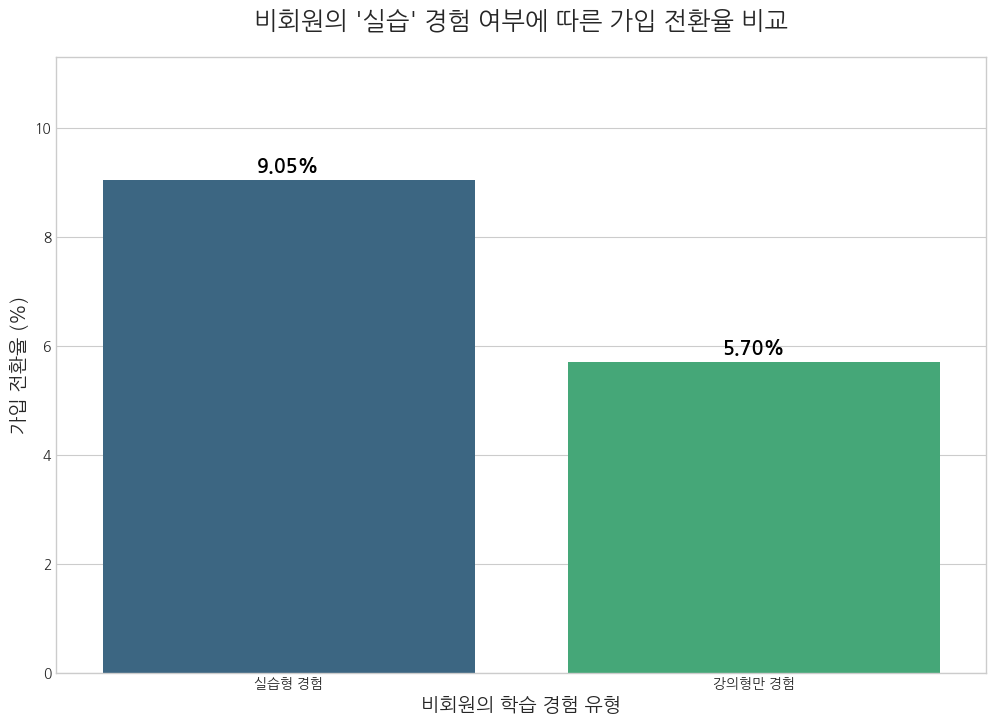

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î™®Îì† ÌïÑÏöîÌïú Î≥ÄÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. null_id_enter_lesson_df: Î™®Îì† ÎπÑÌöåÏõê Î°úÍ∑∏
# 2. id_info_df: content.idÎ≥Ñ Í∞ïÏùò Íµ¨ÏÑ± Ï†ïÎ≥¥
# 3. complete_signup_df: ÌöåÏõêÍ∞ÄÏûÖ Î°úÍ∑∏

# -------------------- 1Îã®Í≥Ñ: ÏΩòÌÖêÏ∏† Ïú†Ìòï Ï†ïÏùò (Ïã§ÏäµÌòï/Í∞ïÏùòÌòï) --------------------
print("‚úÖ 1Îã®Í≥Ñ: 'Ïã§ÏäµÌòï'Í≥º 'Í∞ïÏùòÌòï' ÏΩòÌÖêÏ∏†Î•º Ï†ïÏùòÌï©ÎãàÎã§...")
id_info_df['total_components'] = id_info_df[['stream', 'note', 'practice', 'quiz']].sum(axis=1)
id_info_df['practice_ratio'] = id_info_df['practice'] / id_info_df['total_components']
practice_heavy_content_ids = set(id_info_df[id_info_df['practice_ratio'] >= 0.3]['content.id'].unique())


# -------------------- 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ ÏÉàÎ°úÏö¥ ÏÑ∏ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùÑ ÏÉàÎ°úÏö¥ ÏÑ∏ Í∑∏Î£π('Í∞ïÏùòÌòïÎßå', 'ÌòºÌï©', 'Ïã§ÏäµÌòï')ÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")
# ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê 'Ïã§ÏäµÌòï Ïó¨Î∂Ä'Î•º ÌëúÏãú
non_member_logs_with_type = pd.merge(
    null_id_enter_lesson_df,
    id_info_df[['content.id']],
    on='content.id',
    how='left', # Î™®Îì† ÎπÑÌöåÏõê Î°úÍ∑∏Î•º Ïú†ÏßÄ
)
non_member_logs_with_type['is_practice_heavy'] = non_member_logs_with_type['content.id'].isin(practice_heavy_content_ids)

# Í∞Å ÏÑ∏ÏÖòÎ≥Ñ Í≤ΩÌóò Ïú†ÌòïÏùÑ ÏöîÏïΩ ('any': Ïã§ÏäµÌòïÏùÑ ÌïòÎÇòÎùºÎèÑ Î¥§ÎäîÍ∞Ä)
session_experience_summary = non_member_logs_with_type.groupby(['date', 'fingerprint'])['is_practice_heavy'].any()

# [ÏàòÏ†ï] ÏÉàÎ°úÏö¥ Í∑∏Î£π Ï†ïÏùò
# 'Ïã§ÏäµÌòï Í≤ΩÌóò' Í∑∏Î£π: Ïã§ÏäµÌòï ÏΩòÌÖêÏ∏†Î•º Ìïú Î≤àÏù¥ÎùºÎèÑ Í≤ΩÌóòÌïú Î™®Îì† ÏÑ∏ÏÖò
practice_experience_sessions = set(session_experience_summary[session_experience_summary == True].index)
# 'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò' Í∑∏Î£π: Í≤ΩÌóòÌïú Î™®Îì† Í≤ÉÏù¥ Í∞ïÏùòÌòïÏù∏ ÏÑ∏ÏÖò
lecture_only_sessions = set(session_experience_summary[session_experience_summary == False].index)


# Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)'
# [ÏàòÏ†ï] 'ÌòºÌï©' Í∑∏Î£πÏùÄ Ïù¥ Î∂ÑÏÑùÏóêÏÑúÎäî Îî∞Î°ú Ï†ïÏùòÌïòÏßÄ ÏïäÍ≥†, 'Ïã§ÏäµÌòï'Í≥º 'Í∞ïÏùòÌòï'Ïùò ÏßÅÏ†ë ÎπÑÍµêÏóê ÏßëÏ§ëÌï©ÎãàÎã§.
total_pool_by_type = {
    'Ïã§ÏäµÌòï Í≤ΩÌóò': len(practice_experience_sessions),
    'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò': len(lecture_only_sessions)
}
print("  - Í∞Å Í∑∏Î£πÎ≥Ñ Ï†ÑÏ≤¥ ÏÑ∏ÏÖò Ïàò(Î∂ÑÎ™®):", total_pool_by_type)


# -------------------- 3Îã®Í≥Ñ: Í∑∏Î£πÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

conversions_practice = len(practice_experience_sessions.intersection(converted_sessions))
conversions_lecture_only = len(lecture_only_sessions.intersection(converted_sessions))

conv_rate_practice = (conversions_practice / total_pool_by_type['Ïã§ÏäµÌòï Í≤ΩÌóò'] * 100) if total_pool_by_type['Ïã§ÏäµÌòï Í≤ΩÌóò'] > 0 else 0
conv_rate_lecture = (conversions_lecture_only / total_pool_by_type['Í∞ïÏùòÌòïÎßå Í≤ΩÌóò'] * 100) if total_pool_by_type['Í∞ïÏùòÌòïÎßå Í≤ΩÌóò'] > 0 else 0

# ÏµúÏ¢Ö Í≤∞Í≥º ÌÖåÏù¥Î∏î
conversion_df = pd.DataFrame({
    'Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)': [conv_rate_practice, conv_rate_lecture]
}, index=['Ïã§ÏäµÌòï Í≤ΩÌóò', 'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò'])
print(conversion_df.round(2))


# -------------------- 4Îã®Í≥Ñ: ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù Î∞è ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
observed_values = [
    [conversions_practice, total_pool_by_type['Ïã§ÏäµÌòï Í≤ΩÌóò'] - conversions_practice],
    [conversions_lecture_only, total_pool_by_type['Í∞ïÏùòÌòïÎßå Í≤ΩÌóò'] - conversions_lecture_only]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º (p-value): {p_value:.4f} ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.4f}")
if p_value < 0.05:
    print("   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.")
else:
    print("   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")

# --- [ÌïµÏã¨ ÏàòÏ†ï] ÏãúÍ∞ÅÌôî Î∂ÄÎ∂Ñ ---
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8)) # figsizeÎ•º ÏïΩÍ∞Ñ Ï°∞Ï†ïÌïòÏó¨ Í≥µÍ∞Ñ ÌôïÎ≥¥

# [ÏàòÏ†ï 1] ax Í∞ùÏ≤¥Î•º Î∞õÏïÑÏôÄÏÑú Îçî ÏÑ∏Î∞ÄÌïòÍ≤å Ï†úÏñ¥Ìï©ÎãàÎã§.
ax = sns.barplot(data=conversion_df, x=conversion_df.index, y='Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)', palette='viridis')

# [ÏàòÏ†ï 2] Í∞Å ÎßâÎåÄ(patch) ÏúÑÏóê Í∞íÏùÑ ÌÅ¨Í≥† ÍµµÍ≤å ÌëúÏãúÌï©ÎãàÎã§.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',                   # ÌëúÏãúÌï† ÌÖçÏä§Ìä∏ (ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ)
                (p.get_x() + p.get_width() / 2., p.get_height()), # ÌÖçÏä§Ìä∏ ÏúÑÏπò (ÎßâÎåÄ ÏÉÅÎã® Ï§ëÏïô)
                ha='center', va='center',                   # Ï†ïÎ†¨
                xytext=(0, 10),                             # ÎßâÎåÄÏóêÏÑú 10Ìè¨Ïù∏Ìä∏ ÏúÑÎ°ú ÎùÑÏõÄ
                textcoords='offset points',
                fontsize=14,                                # Ìè∞Ìä∏ ÌÅ¨Í∏∞
                weight='bold',                              # Ìè∞Ìä∏ ÍµµÍ∏∞
                color='black')                              # Ìè∞Ìä∏ ÏÉâÏÉÅ

# [ÏàòÏ†ï 3] XÏ∂ïÍ≥º YÏ∂ï ÎùºÎ≤®ÏùÑ Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏÑ§Ï†ïÌïòÏó¨ 'None'Ïù¥ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÍ≤å Ìï©ÎãàÎã§.
ax.set_xlabel('ÎπÑÌöåÏõêÏùò ÌïôÏäµ Í≤ΩÌóò Ïú†Ìòï', fontsize=14)
ax.set_ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=14)

# YÏ∂ï Î≤îÏúÑÎ•º Îç∞Ïù¥ÌÑ∞Î≥¥Îã§ ÎÑâÎÑâÌïòÍ≤å ÏÑ§Ï†ïÌïòÏó¨, ÎßâÎåÄ ÏúÑ ÌÖçÏä§Ìä∏Í∞Ä ÏûòÎ¶¨ÏßÄ ÏïäÍ≤å Ìï©ÎãàÎã§.
ax.set_ylim(0, conversion_df['Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)'].max() * 1.25)

# Ï∞®Ìä∏ Ï†úÎ™©
plt.title("ÎπÑÌöåÏõêÏùò 'Ïã§Ïäµ' Í≤ΩÌóò Ïó¨Î∂ÄÏóê Îî∞Î•∏ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ÎπÑÍµê", fontsize=18, pad=20)

plt.show()

‚úÖ 1Îã®Í≥Ñ: 'Ï§ëÍ∏â' ÎÇúÏù¥ÎèÑ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïú ÎπÑÌöåÏõê ÌôúÎèôÏùÑ ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§...
  - Ï¥ù 483,246Í∞úÏùò 'Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Í≤ΩÌóò' Î°úÍ∑∏Î•º Ï∂îÏ∂úÌñàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: 'Ï§ëÍ∏â' Í≤ΩÌóòÏûêÎì§ÏùÑ Í≤ΩÌóò Ïú†ÌòïÏóê Îî∞Îùº Îëê Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Ïã§ÏäµÌòï' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: 8,426
  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Í∞ïÏùòÌòïÎßå' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: 27,941

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...

--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] ---
              Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)
Ïã§ÏäµÌòï Í≤ΩÌóò (Ï§ëÍ∏â)       12.15
Í∞ïÏùòÌòïÎßå Í≤ΩÌóò (Ï§ëÍ∏â)       9.07

‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...
Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 69.3988

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º (p-value): 0.0000 ---
   Í≤∞Î°†: 'Ï§ëÍ∏âÏûê' ÎÇ¥ÏóêÏÑú, Ïã§ÏäµÌòï/Í∞ïÏùòÌòï Í≤ΩÌóòÏóê Îî∞Î•∏ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.


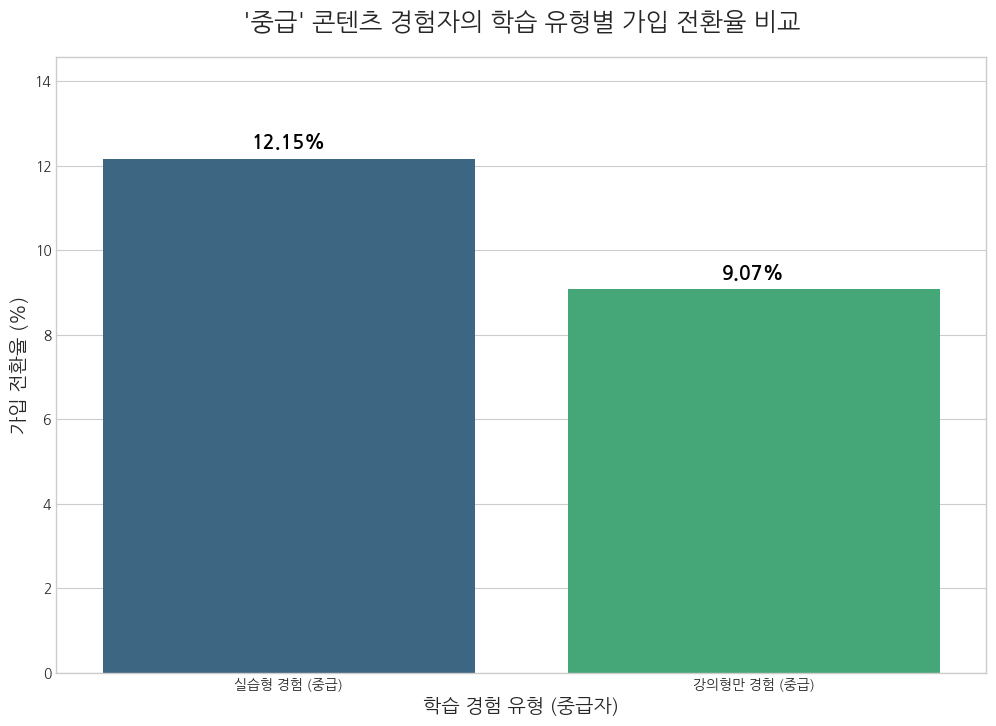

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î™®Îì† ÌïÑÏöîÌïú Î≥ÄÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. null_id_enter_lesson_df: Î™®Îì† ÎπÑÌöåÏõê Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)
# 2. id_info_df: content.idÎ≥Ñ Í∞ïÏùò Íµ¨ÏÑ± Î∞è ÎÇúÏù¥ÎèÑ Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# 3. complete_signup_df: ÌöåÏõêÍ∞ÄÏûÖ Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)


# -------------------- 1Îã®Í≥Ñ: 'Ï§ëÍ∏â' ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïú ÎπÑÌöåÏõê ÌôúÎèô ÌïÑÌÑ∞ÎßÅ --------------------
print("‚úÖ 1Îã®Í≥Ñ: 'Ï§ëÍ∏â' ÎÇúÏù¥ÎèÑ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïú ÎπÑÌöåÏõê ÌôúÎèôÏùÑ ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§...")

# id_info_dfÏóêÏÑú 'advanced' ÎÇúÏù¥ÎèÑÏùò content.id Î™©Î°ùÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.
intermediate_content_ids = set(infomation_df[infomation_df['content.difficulty'] == 'advanced']['content.id'].unique())

# ÎπÑÌöåÏõê Î°úÍ∑∏ Ï§ëÏóêÏÑú, 'Ï§ëÍ∏â' ÏΩòÌÖêÏ∏†Î•º Î≥∏ Í∏∞Î°ùÎßå ÎÇ®ÍπÅÎãàÎã§.
intermediate_logs_df = null_id_enter_lesson_df[null_id_enter_lesson_df['content.id'].isin(intermediate_content_ids)].copy()

print(f"  - Ï¥ù {len(intermediate_logs_df):,}Í∞úÏùò 'Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Í≤ΩÌóò' Î°úÍ∑∏Î•º Ï∂îÏ∂úÌñàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: 'Ï§ëÍ∏â' Í≤ΩÌóòÏûêÎì§ÏùÑ 'Ïã§ÏäµÌòï' vs 'Í∞ïÏùòÌòï'ÏúºÎ°ú Î∂ÑÎ¶¨ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: 'Ï§ëÍ∏â' Í≤ΩÌóòÏûêÎì§ÏùÑ Í≤ΩÌóò Ïú†ÌòïÏóê Îî∞Îùº Îëê Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")

# 'Ïã§ÏäµÌòï' ÏΩòÌÖêÏ∏† ID Î™©Î°ù (Ïù¥Ï†Ñ ÏΩîÎìúÏóêÏÑú Í≥ÑÏÇ∞)
# practice_heavy_content_ids = set(...)

# 'Ï§ëÍ∏â' Î°úÍ∑∏Ïóê 'Ïã§ÏäµÌòï Ïó¨Î∂Ä'Î•º ÌëúÏãú
intermediate_logs_df['is_practice_heavy'] = intermediate_logs_df['content.id'].isin(practice_heavy_content_ids)

# Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏù¥ 'Ïã§ÏäµÌòï'ÏùÑ Í≤ΩÌóòÌñàÎäîÏßÄ Ïó¨Î∂ÄÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÏùÑ ÎÇòÎàïÎãàÎã§.
# (Ïó¨Í∏∞ÏÑúÎäî 'Ïã§ÏäµÌòï'ÏùÑ Ìïú Î≤àÏù¥ÎùºÎèÑ Í≤ΩÌóòÌñàÏúºÎ©¥ 'Ïã§Ïäµ Í≤ΩÌóò Í∑∏Î£π'ÏúºÎ°ú Î∂ÑÎ•ò)
session_has_practice = intermediate_logs_df.groupby(['date', 'fingerprint'])['is_practice_heavy'].any()

practice_sessions = set(session_has_practice[session_has_practice == True].index)
lecture_sessions = set(session_has_practice[session_has_practice == False].index)

# Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)'
total_pool_practice = len(practice_sessions)
total_pool_lecture = len(lecture_sessions)

print(f"  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Ïã§ÏäµÌòï' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: {total_pool_practice:,}")
print(f"  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Í∞ïÏùòÌòïÎßå' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: {total_pool_lecture:,}")


# -------------------- 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Í∞ÄÏûÖÏóê ÏÑ±Í≥µÌïú ÏÑ∏ÏÖò Î™©Î°ù
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

# Í∞Å Í∑∏Î£πÍ≥º Í∞ÄÏûÖ ÏÑ∏ÏÖòÏùò ÍµêÏßëÌï©ÏùÑ Íµ¨ÌïòÏó¨ 'Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)' Í≥ÑÏÇ∞
conversions_practice = len(practice_sessions.intersection(converted_sessions))
conversions_lecture = len(lecture_sessions.intersection(converted_sessions))

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conv_rate_practice = (conversions_practice / total_pool_practice * 100) if total_pool_practice > 0 else 0
conv_rate_lecture = (conversions_lecture / total_pool_lecture * 100) if total_pool_lecture > 0 else 0

# ÏµúÏ¢Ö Í≤∞Í≥º ÌÖåÏù¥Î∏î
conversion_df_intermediate = pd.DataFrame({
    'Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)': [conv_rate_practice, conv_rate_lecture]
}, index=['Ïã§ÏäµÌòï Í≤ΩÌóò (Ï§ëÍ∏â)', 'Í∞ïÏùòÌòïÎßå Í≤ΩÌóò (Ï§ëÍ∏â)'])
print("\n--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] ---")
print(conversion_df_intermediate.round(2))


# -------------------- 4Îã®Í≥Ñ: ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù Î∞è ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
# Î∂ÑÌï†Ìëú ÏÉùÏÑ±
observed_values = [
    [conversions_practice, total_pool_practice - conversions_practice],
    [conversions_lecture, total_pool_lecture - conversions_lecture]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.4f}")
print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º (p-value): {p_value:.4f} ---")
if p_value < 0.05:
    print("   Í≤∞Î°†: 'Ï§ëÍ∏âÏûê' ÎÇ¥ÏóêÏÑú, Ïã§ÏäµÌòï/Í∞ïÏùòÌòï Í≤ΩÌóòÏóê Îî∞Î•∏ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï©ÎãàÎã§.")
else:
    print("   Í≤∞Î°†: Îëê Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")

# --- [ÌïµÏã¨ ÏàòÏ†ï] ÏãúÍ∞ÅÌôî Î∂ÄÎ∂Ñ ---
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8)) # figsizeÎ•º ÏïΩÍ∞Ñ Ï°∞Ï†ïÌïòÏó¨ Í≥µÍ∞Ñ ÌôïÎ≥¥

# [ÏàòÏ†ï 1] ax Í∞ùÏ≤¥Î•º Î∞õÏïÑÏôÄÏÑú Îçî ÏÑ∏Î∞ÄÌïòÍ≤å Ï†úÏñ¥Ìï©ÎãàÎã§.
ax = sns.barplot(data=conversion_df_intermediate, x=conversion_df_intermediate.index, y='Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)', palette='viridis')

# [ÏàòÏ†ï 2] Í∞Å ÎßâÎåÄ(patch) ÏúÑÏóê Í∞íÏùÑ ÌÅ¨Í≥† ÍµµÍ≤å ÌëúÏãúÌï©ÎãàÎã§.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',                   # ÌëúÏãúÌï† ÌÖçÏä§Ìä∏ (ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ)
                (p.get_x() + p.get_width() / 2., p.get_height()), # ÌÖçÏä§Ìä∏ ÏúÑÏπò (ÎßâÎåÄ ÏÉÅÎã® Ï§ëÏïô)
                ha='center', va='center',                   # Ï†ïÎ†¨
                xytext=(0, 12),                             # ÎßâÎåÄÏóêÏÑú 12Ìè¨Ïù∏Ìä∏ ÏúÑÎ°ú ÎùÑÏõÄ
                textcoords='offset points',
                fontsize=14,                                # Ìè∞Ìä∏ ÌÅ¨Í∏∞
                weight='bold',                              # Ìè∞Ìä∏ ÍµµÍ∏∞
                color='black')                              # Ìè∞Ìä∏ ÏÉâÏÉÅ

# [ÏàòÏ†ï 3] XÏ∂ïÍ≥º YÏ∂ï ÎùºÎ≤®ÏùÑ Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏÑ§Ï†ïÌïòÏó¨ 'None'Ïù¥ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÍ≤å Ìï©ÎãàÎã§.
ax.set_xlabel('ÌïôÏäµ Í≤ΩÌóò Ïú†Ìòï (Ï§ëÍ∏âÏûê)', fontsize=14)
ax.set_ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=14)

# YÏ∂ï Î≤îÏúÑÎ•º Îç∞Ïù¥ÌÑ∞Î≥¥Îã§ ÎÑâÎÑâÌïòÍ≤å ÏÑ§Ï†ïÌïòÏó¨, ÎßâÎåÄ ÏúÑ ÌÖçÏä§Ìä∏Í∞Ä ÏûòÎ¶¨ÏßÄ ÏïäÍ≤å Ìï©ÎãàÎã§.
ax.set_ylim(0, conversion_df_intermediate['Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)'].max() * 1.2)

# Ï∞®Ìä∏ Ï†úÎ™©
plt.title("'Ï§ëÍ∏â' ÏΩòÌÖêÏ∏† Í≤ΩÌóòÏûêÏùò ÌïôÏäµ Ïú†ÌòïÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ÎπÑÍµê", fontsize=18, pad=20)

plt.show()


‚úÖ 2Îã®Í≥Ñ: 'Ï§ëÍ∏â' Í≤ΩÌóòÏûêÎì§ÏùÑ 'ÏàúÏàò Ïã§Ïäµ', 'ÏàúÏàò Í∞ïÏùò', 'ÌòºÌï©' Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...
  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Ïã§ÏäµÌòïÎßå' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: 5,219
  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Í∞ïÏùòÌòïÎßå' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: 27,941
  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'ÌòºÌï©' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: 3,207

‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...

--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] ---
          Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)
ÏàúÏàò Ïã§Ïäµ Í≤ΩÌóò       7.24
ÌòºÌï© Í≤ΩÌóò         20.14
ÏàúÏàò Í∞ïÏùò Í≤ΩÌóò       9.07

‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...

--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º (p-value): 0.0000 ---
   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.


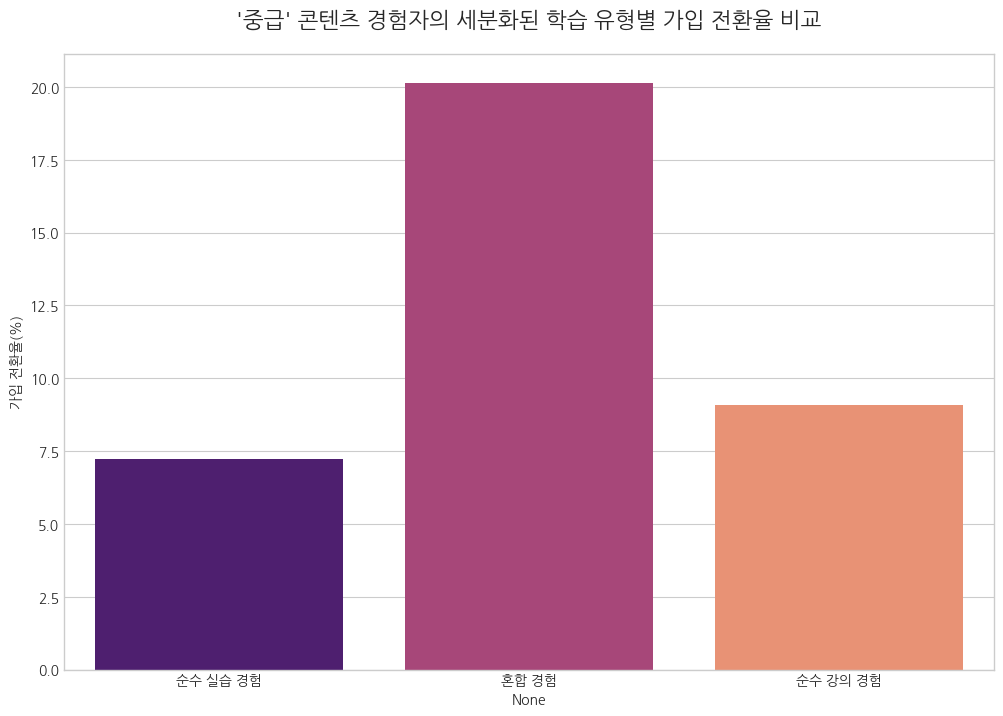

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î™®Îì† ÌïÑÏöîÌïú Î≥ÄÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. intermediate_logs_df: 'Ï§ëÍ∏â' ÎÇúÏù¥ÎèÑ ÏΩòÌÖêÏ∏†Î•º Í≤ΩÌóòÌïú Î™®Îì† ÎπÑÌöåÏõê ÌôúÎèô Î°úÍ∑∏
# 2. complete_signup_df: ÌöåÏõêÍ∞ÄÏûÖ Î°úÍ∑∏

# -------------------- [ÏàòÏ†ï] 2Îã®Í≥Ñ: 'Ï§ëÍ∏â' Í≤ΩÌóòÏûêÎì§ÏùÑ ÏÑ∏ Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨ --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: 'Ï§ëÍ∏â' Í≤ΩÌóòÏûêÎì§ÏùÑ 'ÏàúÏàò Ïã§Ïäµ', 'ÏàúÏàò Í∞ïÏùò', 'ÌòºÌï©' Í∑∏Î£πÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§...")

# 'Ïã§ÏäµÌòï' ÏΩòÌÖêÏ∏† ID Î™©Î°ù (Ïù¥Ï†Ñ ÏΩîÎìúÏóêÏÑú Í≥ÑÏÇ∞)
# practice_heavy_content_ids = set(...)

# 'Ï§ëÍ∏â' Î°úÍ∑∏Ïóê 'Ïã§ÏäµÌòï Ïó¨Î∂Ä'Î•º ÌëúÏãú
intermediate_logs_df['is_practice_heavy'] = intermediate_logs_df['content.id'].isin(practice_heavy_content_ids)

# Í∞Å ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùò Í≤ΩÌóò Ïú†ÌòïÏùÑ ÏöîÏïΩÌï©ÎãàÎã§. ('any': Ïã§ÏäµÏùÑ ÌïòÎÇòÎùºÎèÑ Î¥§ÎäîÍ∞Ä, 'all': Î≥∏ Î™®Îì† Í≤ÉÏù¥ Ïã§ÏäµÏù∏Í∞Ä)
session_experience_summary = intermediate_logs_df.groupby(['date', 'fingerprint'])['is_practice_heavy'].agg(['any', 'all'])

# 'ÏàúÏàò Ïã§Ïäµ' Í∑∏Î£π: Í≤ΩÌóòÌïú Î™®Îì† Í≤ÉÏù¥ Ïã§ÏäµÌòï (all == True)
practice_only_sessions = set(session_experience_summary[session_experience_summary['all'] == True].index)
# 'ÏàúÏàò Í∞ïÏùò' Í∑∏Î£π: Í≤ΩÌóòÌïú Î™®Îì† Í≤ÉÏù¥ Í∞ïÏùòÌòï (any == False)
lecture_only_sessions = set(session_experience_summary[session_experience_summary['any'] == False].index)
# 'ÌòºÌï©' Í∑∏Î£π: Í∑∏ Ïô∏ ÎÇòÎ®∏ÏßÄ (Ïã§ÏäµÍ≥º Í∞ïÏùòÎ•º Î™®Îëê Í≤ΩÌóò)
all_intermediate_sessions = set(session_experience_summary.index)
mixed_sessions = all_intermediate_sessions - practice_only_sessions - lecture_only_sessions

# Í∞Å Í∑∏Î£πÏùò 'Ï†ÑÏ≤¥ Î™®Ïàò(Î∂ÑÎ™®)'
total_pool_practice_only = len(practice_only_sessions)
total_pool_lecture_only = len(lecture_only_sessions)
total_pool_mixed = len(mixed_sessions)

print(f"  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Ïã§ÏäµÌòïÎßå' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: {total_pool_practice_only:,}")
print(f"  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'Í∞ïÏùòÌòïÎßå' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: {total_pool_lecture_only:,}")
print(f"  - Ï§ëÍ∏â ÏΩòÌÖêÏ∏† Ï§ë 'ÌòºÌï©' Í≤ΩÌóò ÏÑ∏ÏÖò Ïàò: {total_pool_mixed:,}")


# -------------------- 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Í∑∏Î£πÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Í∞ÄÏûÖÏóê ÏÑ±Í≥µÌïú ÏÑ∏ÏÖò Î™©Î°ù
converted_sessions = set(map(tuple, complete_signup_df[['date', 'fingerprint']].drop_duplicates().values))

# Í∞Å Í∑∏Î£πÍ≥º Í∞ÄÏûÖ ÏÑ∏ÏÖòÏùò ÍµêÏßëÌï©ÏùÑ Íµ¨ÌïòÏó¨ 'Í∞ÄÏûÖ Ï†ÑÌôò Ïàò(Î∂ÑÏûê)' Í≥ÑÏÇ∞
conversions_practice_only = len(practice_only_sessions.intersection(converted_sessions))
conversions_lecture_only = len(lecture_only_sessions.intersection(converted_sessions))
conversions_mixed = len(mixed_sessions.intersection(converted_sessions))

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞
conv_rate_practice = (conversions_practice_only / total_pool_practice_only * 100) if total_pool_practice_only > 0 else 0
conv_rate_lecture = (conversions_lecture_only / total_pool_lecture_only * 100) if total_pool_lecture_only > 0 else 0
conv_rate_mixed = (conversions_mixed / total_pool_mixed * 100) if total_pool_mixed > 0 else 0

# ÏµúÏ¢Ö Í≤∞Í≥º ÌÖåÏù¥Î∏î
conversion_df_segmented = pd.DataFrame({
    'Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)': [conv_rate_practice, conv_rate_mixed, conv_rate_lecture]
}, index=['ÏàúÏàò Ïã§Ïäµ Í≤ΩÌóò', 'ÌòºÌï© Í≤ΩÌóò', 'ÏàúÏàò Í∞ïÏùò Í≤ΩÌóò'])
print("\n--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] ---")
print(conversion_df_segmented.round(2))


# -------------------- 4Îã®Í≥Ñ: ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù Î∞è ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏúºÎ°ú Ï∞®Ïù¥Î•º Í≤ÄÏ¶ùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")

# Î∂ÑÌï†Ìëú ÏÉùÏÑ± (3x2)
observed_values = [
    [conversions_practice_only, total_pool_practice_only - conversions_practice_only],
    [conversions_mixed, total_pool_mixed - conversions_mixed],
    [conversions_lecture_only, total_pool_lecture_only - conversions_lecture_only]
]
chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º (p-value): {p_value:.4f} ---")
if p_value < 0.05:
    print("   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.")
else:
    print("   Í≤∞Î°†: ÏÑ∏ Í∑∏Î£π Í∞ÑÏùò Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")

# ÏãúÍ∞ÅÌôî
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8))
sns.barplot(data=conversion_df_segmented, x=conversion_df_segmented.index, y='Í∞ÄÏûÖ Ï†ÑÌôòÏú®(%)', palette='magma')
plt.title("'Ï§ëÍ∏â' ÏΩòÌÖêÏ∏† Í≤ΩÌóòÏûêÏùò ÏÑ∏Î∂ÑÌôîÎêú ÌïôÏäµ Ïú†ÌòïÎ≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ÎπÑÍµê", fontsize=16, pad=20)
plt.show()

‚úÖ 1Îã®Í≥Ñ: 'Ï≤´ Îì±Ïû•Ïùº' Ï†ïÎ≥¥ÏôÄ 'ÎÇúÏù¥ÎèÑ' Ï†ïÎ≥¥Î•º ÌÜµÌï©Ìï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: ÎÇúÏù¥ÎèÑ Ïù¥Î¶ÑÏùÑ ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Í≥†, Ï†ïÌôïÌïú ÏàúÏÑúÎ•º Ï†ïÏùòÌï©ÎãàÎã§...
‚úÖ 3Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÎÇúÏù¥ÎèÑÎ≥ÑÎ°ú Ïã†Í∑ú Ï∂úÏãúÎêú ÏΩòÌÖêÏ∏† ÏàòÎ•º ÏßëÍ≥ÑÌï©ÎãàÎã§...
‚úÖ 4Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ìëú ÌòïÌÉúÎ°ú Ïû¨Íµ¨ÏÑ±Ìï©ÎãàÎã§...

‚úÖ 5Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...


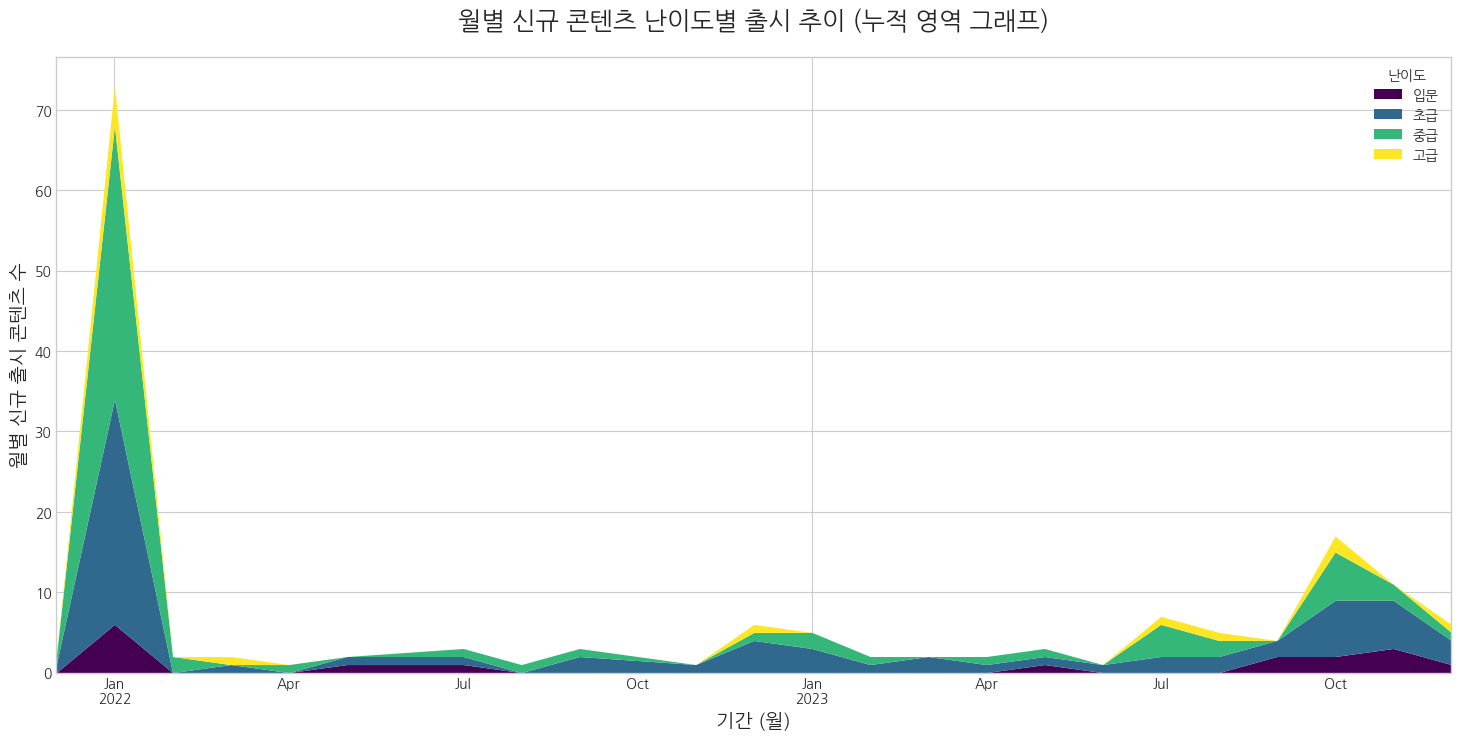

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú null_id_first_seen_seriesÏôÄ id_info_dfÍ∞Ä Ï§ÄÎπÑÎêú ÏÉÅÌÉú

# 1Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ ÌÜµÌï©
print("‚úÖ 1Îã®Í≥Ñ: 'Ï≤´ Îì±Ïû•Ïùº' Ï†ïÎ≥¥ÏôÄ 'ÎÇúÏù¥ÎèÑ' Ï†ïÎ≥¥Î•º ÌÜµÌï©Ìï©ÎãàÎã§...")
first_seen_df = null_id_first_seen_series.reset_index()
first_seen_df.columns = ['content.id', 'first_seen_time']
analysis_df = pd.merge(first_seen_df, infomation_df[['content.id', 'content.difficulty']].dropna(), on='content.id', how='left')

# 2Îã®Í≥Ñ: ÎÇúÏù¥ÎèÑ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω Î∞è ÏàúÏÑú Ï†ïÏùò (ÏàòÏ†ï ÏôÑÎ£å)
print("‚úÖ 2Îã®Í≥Ñ: ÎÇúÏù¥ÎèÑ Ïù¥Î¶ÑÏùÑ ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Í≥†, Ï†ïÌôïÌïú ÏàúÏÑúÎ•º Ï†ïÏùòÌï©ÎãàÎã§...")
difficulty_map = {
    'beginner': 'ÏûÖÎ¨∏', 'intermediate': 'Ï¥àÍ∏â', 'advanced': 'Ï§ëÍ∏â', 'hard': 'Í≥†Í∏â'
}
difficulty_order = ['ÏûÖÎ¨∏', 'Ï¥àÍ∏â', 'Ï§ëÍ∏â', 'Í≥†Í∏â']
analysis_df['difficulty_korean'] = pd.Categorical(
    analysis_df['content.difficulty'].map(difficulty_map),
    categories=difficulty_order,
    ordered=True
)

# 3Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÎÇúÏù¥ÎèÑÎ≥Ñ Ï∂úÏãú Ïàò ÏßëÍ≥Ñ
print("‚úÖ 3Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÎÇúÏù¥ÎèÑÎ≥ÑÎ°ú Ïã†Í∑ú Ï∂úÏãúÎêú ÏΩòÌÖêÏ∏† ÏàòÎ•º ÏßëÍ≥ÑÌï©ÎãàÎã§...")
analysis_df['year_month'] = analysis_df['first_seen_time'].dt.to_period('M')
monthly_difficulty_counts = analysis_df.groupby(['year_month', 'difficulty_korean']).size()

# 4Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ±
print("‚úÖ 4Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º Ìëú ÌòïÌÉúÎ°ú Ïû¨Íµ¨ÏÑ±Ìï©ÎãàÎã§...")
plot_df = monthly_difficulty_counts.unstack(fill_value=0)

# 5Îã®Í≥Ñ: ÏµúÏ¢Ö ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
print("\n‚úÖ 5Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
plt.rc('font', family='NanumGothic')
ax = plot_df.plot(
    kind='area', stacked=True, figsize=(18, 8), colormap='viridis', linewidth=0
)
ax.set_title('ÏõîÎ≥Ñ Ïã†Í∑ú ÏΩòÌÖêÏ∏† ÎÇúÏù¥ÎèÑÎ≥Ñ Ï∂úÏãú Ï∂îÏù¥ (ÎàÑÏ†Å ÏòÅÏó≠ Í∑∏ÎûòÌîÑ)', fontsize=18, pad=20)
ax.set_xlabel('Í∏∞Í∞Ñ (Ïõî)', fontsize=14)
ax.set_ylabel('ÏõîÎ≥Ñ Ïã†Í∑ú Ï∂úÏãú ÏΩòÌÖêÏ∏† Ïàò', fontsize=14)
ax.legend(title='ÎÇúÏù¥ÎèÑ')
plt.grid(True)
plt.show()

‚úÖ 1Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏†Î≥Ñ ÏãúÏ≤≠ ÌöüÏàòÎ•º ÏßëÍ≥ÑÌï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: ÏµúÍ≥† ÏãúÏ≤≠ ÌöüÏàòÎ•º Í∏∞Î°ùÌïú Top 5 ÏΩòÌÖêÏ∏†Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§...
‚úÖ 3Îã®Í≥Ñ: ÏΩòÌÖêÏ∏† IDÎ•º ÏùΩÍ∏∞ Ïâ¨Ïö¥ ÌïúÍ∏Ä Í∞ïÏùò Ï†úÎ™©ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§...
‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...


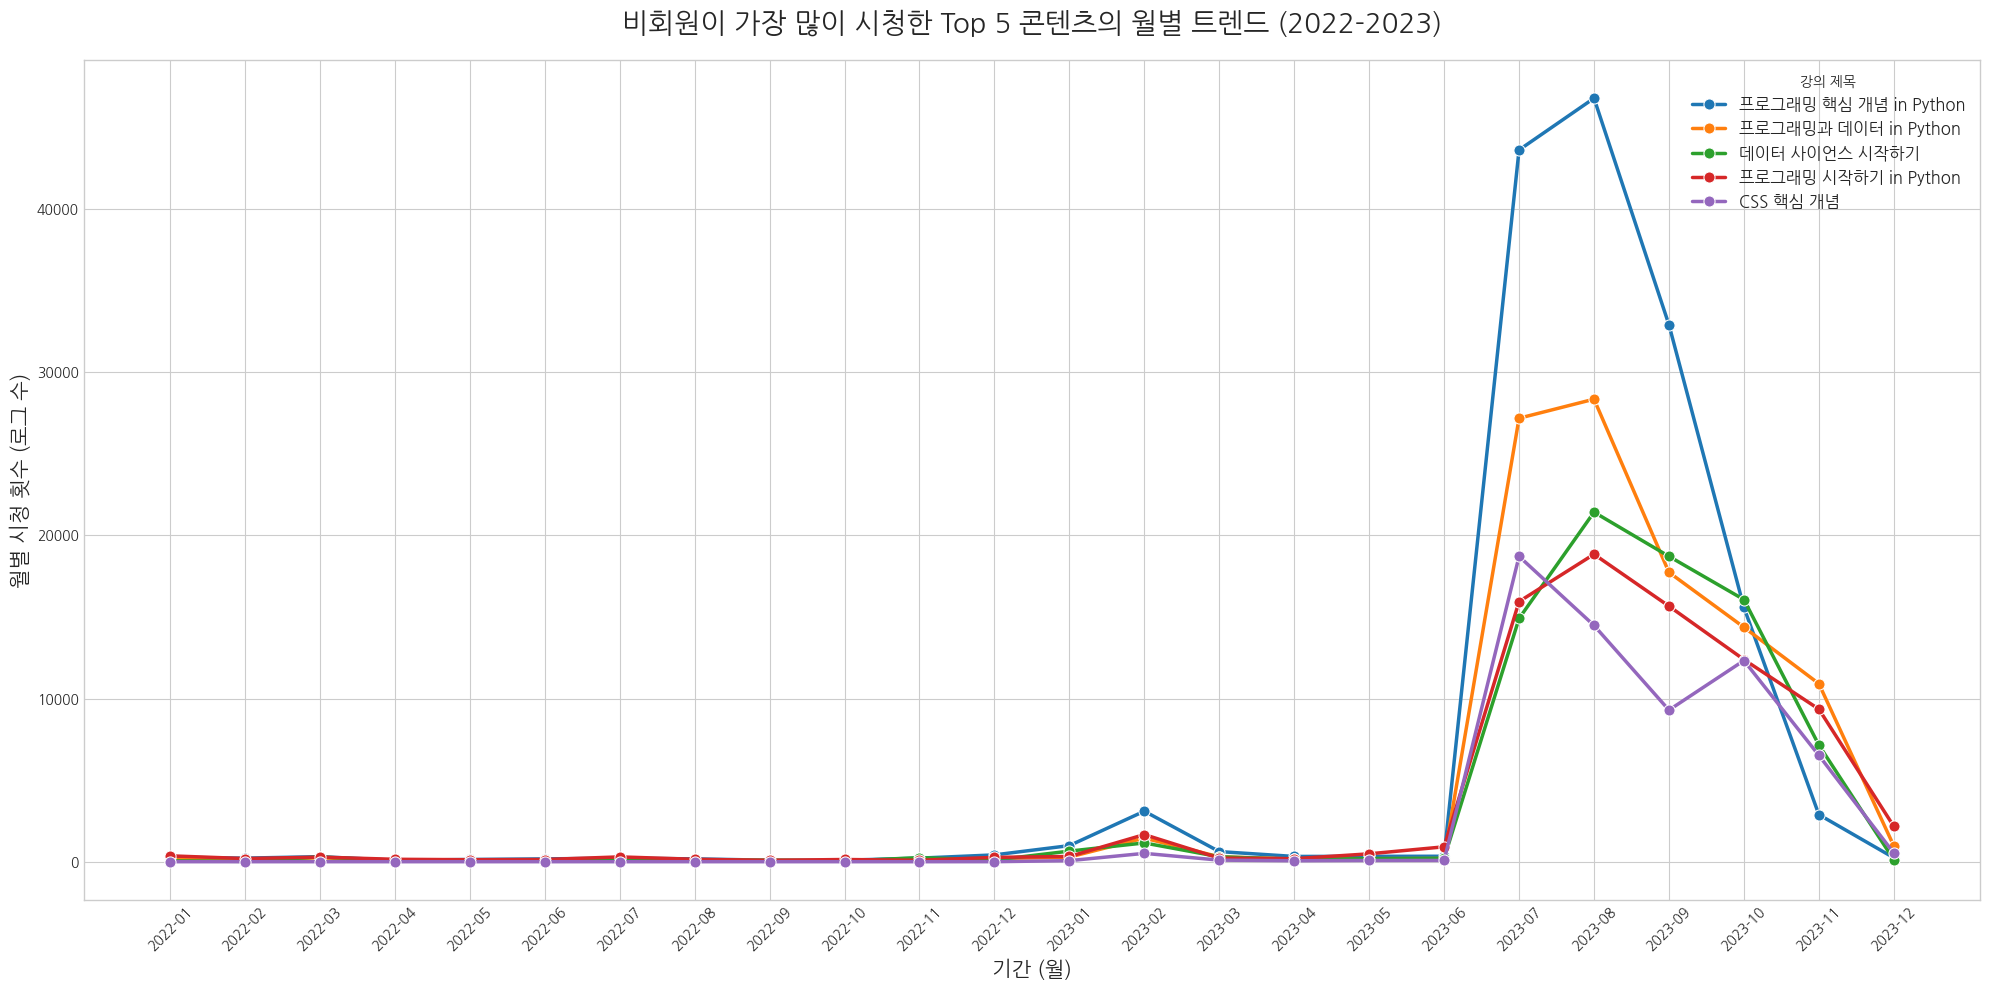

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï]
# 1. null_id_enter_lesson_df: Î™®Îì† ÎπÑÌöåÏõê Î°úÍ∑∏
# 2. infomation_df: 'content.id'ÏôÄ 'topic.name' Îì± Í∞ïÏùò Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

# -------------------- 1Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏†Î≥Ñ ÏãúÏ≤≠ ÌöüÏàò ÏßëÍ≥Ñ --------------------
print("‚úÖ 1Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏†Î≥Ñ ÏãúÏ≤≠ ÌöüÏàòÎ•º ÏßëÍ≥ÑÌï©ÎãàÎã§...")

# Î∂ÑÏÑù Í∏∞Í∞Ñ ÌïÑÌÑ∞ÎßÅ
temp_df = null_id_enter_lesson_df.dropna(subset=['content.id']).copy()
start_date = '2022-01-01'
end_date = '2023-12-31'
temp_df = temp_df[(temp_df['client_event_time'] >= start_date) & (temp_df['client_event_time'] <= end_date)]
temp_df['year_month'] = temp_df['client_event_time'].dt.to_period('M')

# ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏† IDÎ≥Ñ Î°úÍ∑∏ Ïàò ÏßëÍ≥Ñ ÌõÑ, Ìëú ÌòïÌÉúÎ°ú Î≥ÄÌôò
monthly_view_counts = temp_df.groupby(['year_month', 'content.id']).size().unstack(fill_value=0)


# -------------------- 2Îã®Í≥Ñ: 'Ï£ºÏù∏Í≥µ' Top 5 ÏΩòÌÖêÏ∏† ÏÑ†Ï†ï --------------------
print("‚úÖ 2Îã®Í≥Ñ: ÏµúÍ≥† ÏãúÏ≤≠ ÌöüÏàòÎ•º Í∏∞Î°ùÌïú Top 5 ÏΩòÌÖêÏ∏†Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§...")

# Í∞Å ÏΩòÌÖêÏ∏†Ïùò 'ÏµúÍ≥† ÏãúÏ≤≠ ÌöüÏàò(peak)'Î•º Í≥ÑÏÇ∞ÌïòÏó¨, Í∞ÄÏû• ÎÜíÏùÄ 5Í∞úÎ•º Ï∞æÏäµÎãàÎã§.
top_5_content_ids = monthly_view_counts.max().nlargest(5).index.tolist()

# Top 5 ÏΩòÌÖêÏ∏†Ïùò ÏõîÎ≥Ñ ÏãúÏ≤≠ ÌöüÏàò Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂úÌï©ÎãàÎã§.
top_5_trends_df = monthly_view_counts[top_5_content_ids]


# -------------------- 3Îã®Í≥Ñ: 'content.id'Î•º ÌïúÍ∏Ä 'topic.name'ÏúºÎ°ú Î≥ÄÌôò --------------------
print("‚úÖ 3Îã®Í≥Ñ: ÏΩòÌÖêÏ∏† IDÎ•º ÏùΩÍ∏∞ Ïâ¨Ïö¥ ÌïúÍ∏Ä Í∞ïÏùò Ï†úÎ™©ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§...")

# id_info_dfÏóêÏÑú content.idÏôÄ topic.nameÏùò Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨Î•º ÎßåÎì≠ÎãàÎã§.
# (Î®ºÏ†Ä 'infomation_df'Ïùò Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ïã§Ï†ú Ïù¥Î¶ÑÏúºÎ°ú ÏàòÏ†ïÌï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§.)
id_to_name_map = infomation_df.set_index('content.id')['topic.name'].to_dict()

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÌïúÍ∏Ä Í∞ïÏùò Ï†úÎ™©ÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
top_5_trends_df.rename(columns=id_to_name_map, inplace=True)


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî --------------------
print("‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")

plt.rc('font', family='NanumGothic') # Colab ÌïúÍ∏Ä Ìè∞Ìä∏
plt.figure(figsize=(20, 10))

# Ïù∏Îç±Ïä§Î•º 'YYYY-MM' ÌòïÏãùÏùò Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ xÏ∂ïÏúºÎ°ú ÏÇ¨Ïö©
plot_data = top_5_trends_df.copy()
plot_data.index = plot_data.index.strftime('%Y-%m')

# Top 5 ÏΩòÌÖêÏ∏†Ïùò Ìä∏Î†åÎìúÎ•º ÏÑ† Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î¶ΩÎãàÎã§.
ax = sns.lineplot(data=plot_data, marker='o', markersize=8, dashes=False, linewidth=2.5)

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.title('ÎπÑÌöåÏõêÏù¥ Í∞ÄÏû• ÎßéÏù¥ ÏãúÏ≤≠Ìïú Top 5 ÏΩòÌÖêÏ∏†Ïùò ÏõîÎ≥Ñ Ìä∏Î†åÎìú (2022-2023)', fontsize=20, pad=20)
plt.xlabel('Í∏∞Í∞Ñ (Ïõî)', fontsize=15)
plt.ylabel('ÏõîÎ≥Ñ ÏãúÏ≤≠ ÌöüÏàò (Î°úÍ∑∏ Ïàò)', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Í∞ïÏùò Ï†úÎ™©', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

‚úÖ 1Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏†Î≥Ñ ÏãúÏ≤≠ ÌöüÏàòÎ•º ÏßëÍ≥ÑÌï©ÎãàÎã§...
‚úÖ 2Îã®Í≥Ñ: ÏµúÍ≥† ÏãúÏ≤≠ ÌöüÏàòÎ•º Í∏∞Î°ùÌïú Top 5 ÏΩòÌÖêÏ∏†Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§...
‚úÖ 3Îã®Í≥Ñ: ÏΩòÌÖêÏ∏† IDÎ•º ÏùΩÍ∏∞ Ïâ¨Ïö¥ ÌïúÍ∏Ä Í∞ïÏùò Ï†úÎ™©ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§...
‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...


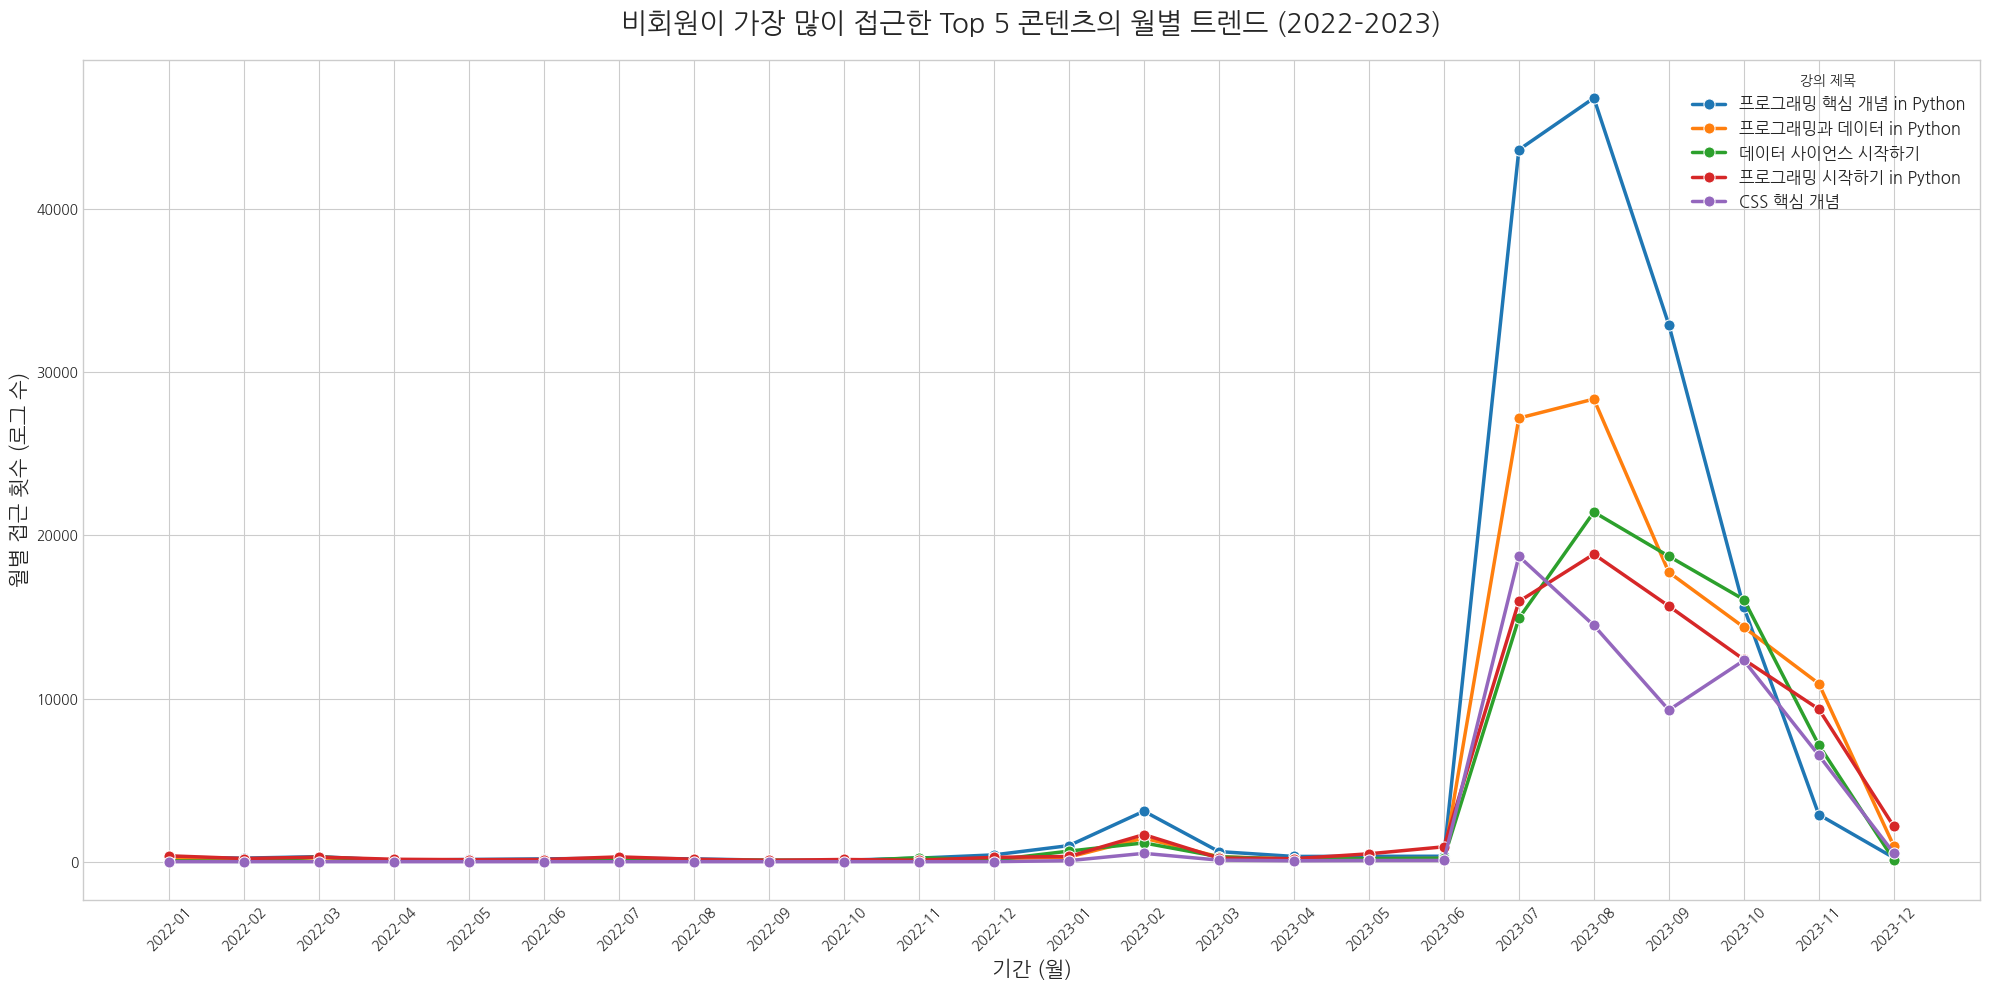

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï]
# 1. null_id_enter_lesson_df: Î™®Îì† ÎπÑÌöåÏõê Î°úÍ∑∏
# 2. infomation_df: 'content.id'ÏôÄ 'topic.name' Îì± Í∞ïÏùò Ï†ïÎ≥¥Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

# -------------------- 1Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏†Î≥Ñ ÏãúÏ≤≠ ÌöüÏàò ÏßëÍ≥Ñ --------------------
print("‚úÖ 1Îã®Í≥Ñ: ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏†Î≥Ñ ÏãúÏ≤≠ ÌöüÏàòÎ•º ÏßëÍ≥ÑÌï©ÎãàÎã§...")

# Î∂ÑÏÑù Í∏∞Í∞Ñ ÌïÑÌÑ∞ÎßÅ
temp_df = null_id_enter_lesson_df.dropna(subset=['content.id']).copy()
start_date = '2022-01-01'
end_date = '2023-12-31'
temp_df = temp_df[(temp_df['client_event_time'] >= start_date) & (temp_df['client_event_time'] <= end_date)]
temp_df['year_month'] = temp_df['client_event_time'].dt.to_period('M')

# ÏõîÎ≥Ñ, ÏΩòÌÖêÏ∏† IDÎ≥Ñ Î°úÍ∑∏ Ïàò ÏßëÍ≥Ñ ÌõÑ, Ìëú ÌòïÌÉúÎ°ú Î≥ÄÌôò
monthly_view_counts = temp_df.groupby(['year_month', 'content.id']).size().unstack(fill_value=0)


# -------------------- 2Îã®Í≥Ñ: 'Ï£ºÏù∏Í≥µ' Top 5 ÏΩòÌÖêÏ∏† ÏÑ†Ï†ï --------------------
print("‚úÖ 2Îã®Í≥Ñ: ÏµúÍ≥† ÏãúÏ≤≠ ÌöüÏàòÎ•º Í∏∞Î°ùÌïú Top 5 ÏΩòÌÖêÏ∏†Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§...")

# Í∞Å ÏΩòÌÖêÏ∏†Ïùò 'ÏµúÍ≥† ÏãúÏ≤≠ ÌöüÏàò(peak)'Î•º Í≥ÑÏÇ∞ÌïòÏó¨, Í∞ÄÏû• ÎÜíÏùÄ 5Í∞úÎ•º Ï∞æÏäµÎãàÎã§.
top_5_content_ids = monthly_view_counts.max().nlargest(5).index.tolist()

# Top 5 ÏΩòÌÖêÏ∏†Ïùò ÏõîÎ≥Ñ ÏãúÏ≤≠ ÌöüÏàò Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂úÌï©ÎãàÎã§.
top_5_trends_df = monthly_view_counts[top_5_content_ids]


# -------------------- 3Îã®Í≥Ñ: 'content.id'Î•º ÌïúÍ∏Ä 'topic.name'ÏúºÎ°ú Î≥ÄÌôò --------------------
print("‚úÖ 3Îã®Í≥Ñ: ÏΩòÌÖêÏ∏† IDÎ•º ÏùΩÍ∏∞ Ïâ¨Ïö¥ ÌïúÍ∏Ä Í∞ïÏùò Ï†úÎ™©ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§...")

# id_info_dfÏóêÏÑú content.idÏôÄ topic.nameÏùò Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨Î•º ÎßåÎì≠ÎãàÎã§.
# (Î®ºÏ†Ä 'infomation_df'Ïùò Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÌôïÏù∏ÌïòÍ≥†, Ïã§Ï†ú Ïù¥Î¶ÑÏúºÎ°ú ÏàòÏ†ïÌï¥Ïïº Ìï† Ïàò ÏûàÏäµÎãàÎã§.)
id_to_name_map = infomation_df.set_index('content.id')['topic.name'].to_dict()

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïª¨Îüº Ïù¥Î¶ÑÏùÑ ÌïúÍ∏Ä Í∞ïÏùò Ï†úÎ™©ÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
top_5_trends_df.rename(columns=id_to_name_map, inplace=True)


# -------------------- 4Îã®Í≥Ñ: ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî --------------------
print("‚úÖ 4Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")

# 1. Î®ºÏ†Ä seaborn Ïä§ÌÉÄÏùºÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§.
plt.style.use('seaborn-v0_8-whitegrid')

# 2. [ÌïµÏã¨] Í∑∏ Îã§ÏùåÏóê, ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ïÏùÑ 'Îã§Ïãú ÌïúÎ≤à' Ïã§ÌñâÌïòÏó¨ ÎçÆÏñ¥Ïì∞Í∏∞ Ìï©ÎãàÎã§.
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))

# Ïù∏Îç±Ïä§Î•º 'YYYY-MM' ÌòïÏãùÏùò Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ xÏ∂ïÏúºÎ°ú ÏÇ¨Ïö©
plot_data = top_5_trends_df.copy()
plot_data.index = plot_data.index.strftime('%Y-%m')

# Top 5 ÏΩòÌÖêÏ∏†Ïùò Ìä∏Î†åÎìúÎ•º ÏÑ† Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î¶ΩÎãàÎã§.
ax = sns.lineplot(data=plot_data, marker='o', markersize=8, dashes=False, linewidth=2.5)

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.title('ÎπÑÌöåÏõêÏù¥ Í∞ÄÏû• ÎßéÏù¥ Ï†ëÍ∑ºÌïú Top 5 ÏΩòÌÖêÏ∏†Ïùò ÏõîÎ≥Ñ Ìä∏Î†åÎìú (2022-2023)', fontsize=20, pad=20)
plt.xlabel('Í∏∞Í∞Ñ (Ïõî)', fontsize=15)
plt.ylabel('ÏõîÎ≥Ñ Ï†ëÍ∑º ÌöüÏàò (Î°úÍ∑∏ Ïàò)', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Í∞ïÏùò Ï†úÎ™©', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

‚úÖ 1Îã®Í≥Ñ: Ìù©Ïñ¥Ï†∏ ÏûàÎäî Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú ÌÜµÌï©Ìï©ÎãàÎã§...
  - Ï¥ù 107Í∞úÏùò 'ÏΩòÌÖêÏ∏†-Ïπ¥ÌÖåÍ≥†Î¶¨' Îß§Ìïë Í¥ÄÍ≥ÑÎ•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: Î™®Îì† ÎπÑÌöåÏõê ÌôúÎèô Î°úÍ∑∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º Î∂ÄÏó¨Ìï©ÎãàÎã§...

‚úÖ 3Îã®Í≥Ñ: Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ 'Ï†ÑÏ≤¥ Í≤ΩÌóòÏûê Ïàò(Î∂ÑÎ™®)'ÏôÄ 'Í∞ÄÏûÖ Ï†ÑÌôòÏûê Ïàò(Î∂ÑÏûê)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...

‚úÖ 4Îã®Í≥Ñ: 'Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÏµúÏ¢Ö ÌÖåÏù¥Î∏îÏùÑ ÎßåÎì≠ÎãàÎã§...


--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ---
              total_sessions  converted_sessions  conversion_rate(%)
category                                                            
Î®∏Ïã†Îü¨Îãù/ Îî•Îü¨Îãù               4546                 695               15.29
ÎîîÏûêÏù∏                     1221                 163               13.35
Í∞úÎ∞ú ÎèÑÍµ¨/Ïª¥Ìì®ÌÑ∞ Í≥ºÌïô            8736                1080               12.36
Í∞úÎ∞ú ÎèÑÍµ¨/ Ïª¥Ìì®ÌÑ∞              7338               

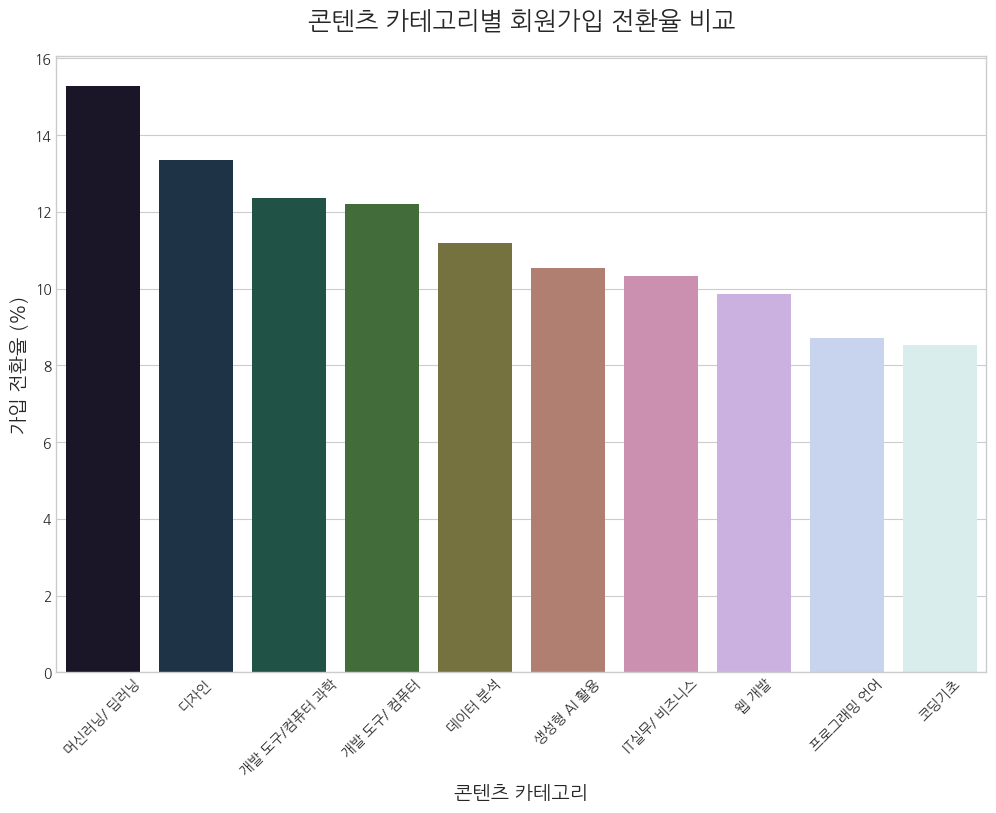

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú ÏïÑÎûò Î≥ÄÏàòÎì§Ïù¥ Î™®Îëê Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. null_id_enter_lesson_df: Î™®Îì† ÎπÑÌöåÏõê Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)
# 2. id_info_df: content.idÎ≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥('category 1', 'category2', 'category3')Í∞Ä Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# 3. complete_signup_df: ÌöåÏõêÍ∞ÄÏûÖ Î°úÍ∑∏ (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ date Ïª¨ÎüºÏù¥ Ï∂îÍ∞ÄÎêú ÏÉÅÌÉú)


# -------------------- 1Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Î•º 'Long Format'ÏúºÎ°ú Î≥ÄÌôò --------------------
print("‚úÖ 1Îã®Í≥Ñ: Ìù©Ïñ¥Ï†∏ ÏûàÎäî Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú ÌÜµÌï©Ìï©ÎãàÎã§...")

# id_varsÎäî Í≥†Ï†ïÌï† Ïª¨Îüº, value_varsÎäî 'ÎÖπÏó¨ÏÑú' ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú ÎßåÎì§ ÎåÄÏÉÅ Ïª¨ÎüºÎì§ÏûÖÎãàÎã§.
category_long_df = pd.melt(
    infomation_df,
    id_vars=['content.id'],
    value_vars=['category 1', 'category2', 'category3'],
    value_name='category' # ÏÉàÎ°ú ÎßåÎì§Ïñ¥Ïßà Ïª¨ÎüºÏùò Ïù¥Î¶Ñ
)
# Ïù¥Ï†ú category Ïª¨ÎüºÏóêÎäî NaN Í∞íÍ≥º Ï§ëÎ≥µÎêú Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶ÑÎì§Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
# Î∂àÌïÑÏöîÌïú Ìñâ(NaN)Í≥º Ïª¨Îüº('variable')ÏùÑ Ï†úÍ±∞ÌïòÍ≥†, Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÏó¨ Íπ®ÎÅóÌïòÍ≤å ÎßåÎì≠ÎãàÎã§.
category_long_df = category_long_df.dropna(subset=['category']).drop(columns=['variable'])

print(f"  - Ï¥ù {len(category_long_df)}Í∞úÏùò 'ÏΩòÌÖêÏ∏†-Ïπ¥ÌÖåÍ≥†Î¶¨' Îß§Ìïë Í¥ÄÍ≥ÑÎ•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥ Î≥ëÌï© --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: Î™®Îì† ÎπÑÌöåÏõê ÌôúÎèô Î°úÍ∑∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º Î∂ÄÏó¨Ìï©ÎãàÎã§...")

# ÎπÑÌöåÏõê Î°úÍ∑∏ÏôÄ Long-format Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º 'content.id'Î•º Í∏∞Ï§ÄÏúºÎ°ú Ìï©Ïπ©ÎãàÎã§.
# ÌïòÎÇòÏùò Î°úÍ∑∏Í∞Ä Ïó¨Îü¨ Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÏÜçÌï† Ïàò ÏûàÏúºÎØÄÎ°ú, Î°úÍ∑∏ ÏàòÍ∞Ä ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏù¥ Ï†ïÏÉÅÏûÖÎãàÎã§.
non_member_logs_with_category = pd.merge(
    null_id_enter_lesson_df,
    category_long_df,
    on='content.id',
    how='inner' # Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Í∞Ä ÏûàÎäî Î°úÍ∑∏Îßå ÎåÄÏÉÅÏúºÎ°ú Ìï®
)


# -------------------- 3Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ 'Ï†ÑÏ≤¥ Î™®Ïàò' Î∞è 'Í∞ÄÏûÖ Ï†ÑÌôò Ïàò' Í≥ÑÏÇ∞ --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ 'Ï†ÑÏ≤¥ Í≤ΩÌóòÏûê Ïàò(Î∂ÑÎ™®)'ÏôÄ 'Í∞ÄÏûÖ Ï†ÑÌôòÏûê Ïàò(Î∂ÑÏûê)'Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")

# Î∂ÑÎ™®: Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Í≤ΩÌóòÌïú Í≥†Ïú†Ìïú ÎπÑÌöåÏõê ÏÑ∏ÏÖò(date+fingerprint)Ïùò Ïàò
total_pool_by_category = non_member_logs_with_category.groupby('category')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
total_pool_by_category.name = 'total_sessions'

# Î∂ÑÏûê: Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Í≤ΩÌóòÌïòÍ≥†, Í∞ÄÏûÖÍπåÏßÄ Ìïú Í≥†Ïú†Ìïú ÎπÑÌöåÏõê ÏÑ∏ÏÖòÏùò Ïàò
converted_sessions_df = pd.merge(
    non_member_logs_with_category,
    complete_signup_df[['date', 'fingerprint']].drop_duplicates(),
    on=['date', 'fingerprint'],
    how='inner'
)
converters_by_category = converted_sessions_df.groupby('category')[['date', 'fingerprint']].apply(
    lambda g: len(g.drop_duplicates())
)
converters_by_category.name = 'converted_sessions'


# -------------------- 4Îã®Í≥Ñ: 'Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï†ÑÌôòÏú®' Í≥ÑÏÇ∞ Î∞è ÏµúÏ¢Ö ÌÖåÏù¥Î∏î ÏÉùÏÑ± --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: 'Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú®'ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÏµúÏ¢Ö ÌÖåÏù¥Î∏îÏùÑ ÎßåÎì≠ÎãàÎã§...")

# Îëê SeriesÎ•º DataFrameÏúºÎ°ú Ìï©Ïπ©ÎãàÎã§.
category_conversion_df = pd.concat([total_pool_by_category, converters_by_category], axis=1).fillna(0)
category_conversion_df['conversion_rate(%)'] = \
    (category_conversion_df['converted_sessions'] / category_conversion_df['total_sessions'] * 100).fillna(0)

# Ï†ÑÌôòÏú®Ïù¥ ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§.
category_conversion_df.sort_values(by='conversion_rate(%)', ascending=False, inplace=True)

print("\n\n--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® ---")
print(category_conversion_df.round(2))


# -------------------- 5Îã®Í≥Ñ: ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî --------------------
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=category_conversion_df, x=category_conversion_df.index, y='conversion_rate(%)', palette='cubehelix')

plt.title('ÏΩòÌÖêÏ∏† Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ï†ÑÌôòÏú® ÎπÑÍµê', fontsize=18, pad=20)
plt.xlabel('ÏΩòÌÖêÏ∏† Ïπ¥ÌÖåÍ≥†Î¶¨', fontsize=14)
plt.ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

‚úÖ 1Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏ†úÌïòÍ≥† ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú ÌÜµÌï©Ìï©ÎãàÎã§...
  - Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ ÌÜµÏùº Î∞è Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôòÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.

‚úÖ 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÌôúÎèô Î°úÍ∑∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º Î∂ÄÏó¨Ìï©ÎãàÎã§...

‚úÖ 3Îã®Í≥Ñ: Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï†ÑÌôòÏú®ÏùÑ Ïû¨Í≥ÑÏÇ∞Ìï©ÎãàÎã§...


--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® (Ï†ïÏ†ú ÌõÑ) ---
              total_sessions  converted_sessions  conversion_rate(%)
category                                                            
Î®∏Ïã†Îü¨Îãù/ Îî•Îü¨Îãù               4546                 695               15.29
ÎîîÏûêÏù∏                     1221                 163               13.35
Í∞úÎ∞ú ÎèÑÍµ¨/Ïª¥Ìì®ÌÑ∞ Í≥ºÌïô           15136                1752               11.58
Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù                 14866                1665               11.20
ÏÉùÏÑ±Ìòï AI ÌôúÏö©               9740                1027               10.54
ITÏã§Î¨¥/ ÎπÑÏ¶àÎãàÏä§             21603         

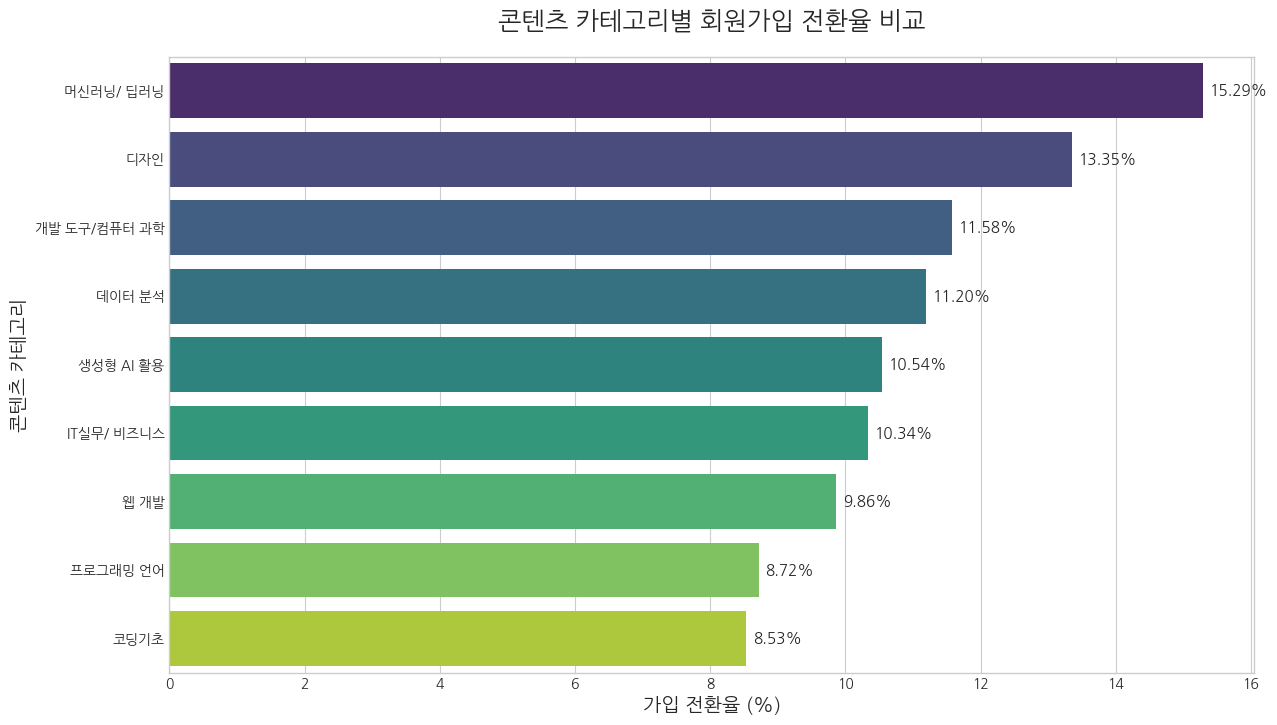

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# [Í∞ÄÏ†ï] Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Î™®Îì† ÌïÑÏöîÌïú Î≥ÄÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêú ÏÉÅÌÉú
# 1. null_id_enter_lesson_df, id_info_df, complete_signup_df

# -------------------- [ÌïµÏã¨ ÏàòÏ†ï] 1Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Î∞è 'Long Format' Î≥ÄÌôò --------------------
print("‚úÖ 1Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÏ†úÌïòÍ≥† ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú ÌÜµÌï©Ìï©ÎãàÎã§...")

# [Ï∂îÍ∞Ä] 'Í∞úÎ∞ú ÎèÑÍµ¨/ Ïª¥Ìì®ÌÑ∞'Î•º 'Í∞úÎ∞ú ÎèÑÍµ¨/Ïª¥Ìì®ÌÑ∞ Í≥ºÌïô'ÏúºÎ°ú ÌÜµÏùºÌï©ÎãàÎã§.
infomation_df.replace({'Í∞úÎ∞ú ÎèÑÍµ¨/ Ïª¥Ìì®ÌÑ∞': 'Í∞úÎ∞ú ÎèÑÍµ¨/Ïª¥Ìì®ÌÑ∞ Í≥ºÌïô'}, inplace=True)

category_long_df = pd.melt(
    infomation_df,
    id_vars=['content.id'],
    value_vars=['category 1', 'category2', 'category3'],
    value_name='category'
)
category_long_df = category_long_df.dropna(subset=['category']).drop(columns=['variable'])
print("  - Ïπ¥ÌÖåÍ≥†Î¶¨ Ïù¥Î¶Ñ ÌÜµÏùº Î∞è Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôòÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


# -------------------- 2Îã®Í≥Ñ: ÎπÑÌöåÏõê Î°úÍ∑∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥ Î≥ëÌï© (Ïù¥Ï†ÑÍ≥º ÎèôÏùº) --------------------
print("\n‚úÖ 2Îã®Í≥Ñ: ÎπÑÌöåÏõê ÌôúÎèô Î°úÍ∑∏Ïóê Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥Î•º Î∂ÄÏó¨Ìï©ÎãàÎã§...")
non_member_logs_with_category = pd.merge(
    null_id_enter_lesson_df,
    category_long_df,
    on='content.id',
    how='inner'
)

# -------------------- 3Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ (Ïù¥Ï†ÑÍ≥º ÎèôÏùº) --------------------
print("\n‚úÖ 3Îã®Í≥Ñ: Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï†ÑÌôòÏú®ÏùÑ Ïû¨Í≥ÑÏÇ∞Ìï©ÎãàÎã§...")
# Î∂ÑÎ™®
total_pool_by_category = non_member_logs_with_category.groupby('category')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
total_pool_by_category.name = 'total_sessions'
# Î∂ÑÏûê
converted_sessions_df = pd.merge(non_member_logs_with_category, complete_signup_df[['date', 'fingerprint']].drop_duplicates(), on=['date', 'fingerprint'], how='inner')
converters_by_category = converted_sessions_df.groupby('category')[['date', 'fingerprint']].apply(lambda g: len(g.drop_duplicates()))
converters_by_category.name = 'converted_sessions'
# ÏµúÏ¢Ö ÌÖåÏù¥Î∏î
category_conversion_df = pd.concat([total_pool_by_category, converters_by_category], axis=1).fillna(0)
category_conversion_df['conversion_rate(%)'] = (category_conversion_df['converted_sessions'] / category_conversion_df['total_sessions'] * 100).fillna(0)
category_conversion_df.sort_values(by='conversion_rate(%)', ascending=False, inplace=True)

print("\n\n--- [Í∞ÄÏÑ§ Í≤ÄÏ¶ù ÏµúÏ¢Ö Í≤∞Í≥º] Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® (Ï†ïÏ†ú ÌõÑ) ---")
print(category_conversion_df.round(2))


# -------------------- [ÌïµÏã¨ Ï∂îÍ∞Ä] 4Îã®Í≥Ñ: ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ¶ù (Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï) --------------------
print("\n‚úÖ 4Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞Ñ Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïúÏßÄ Í≤ÄÏ¶ùÌï©ÎãàÎã§...")

# Î∂ÑÌï†Ìëú ÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ 'ÎπÑÍ∞ÄÏûÖ ÏÑ∏ÏÖò Ïàò' Ïª¨Îüº Ï∂îÍ∞Ä
category_conversion_df['non_converted_sessions'] = category_conversion_df['total_sessions'] - category_conversion_df['converted_sessions']
# Ï†ïÏàòÌòïÏúºÎ°ú Î≥ÄÌôò
observed_values = category_conversion_df[['converted_sessions', 'non_converted_sessions']].astype(int).values

chi2, p_value, _, _ = chi2_contingency(observed_values)

print(f"\n--- Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º ---")
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("   Í≤∞Î°†: Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú®ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.")
else:
    print("   Í≤∞Î°†: Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞Ñ Í∞ÄÏûÖ Ï†ÑÌôòÏú® Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†µÏäµÎãàÎã§.")


# -------------------- [ÌïµÏã¨ ÏàòÏ†ï] 5Îã®Í≥Ñ: ÏµúÏ¢Ö ÏãúÍ∞ÅÌôî (Ïà´Ïûê ÌëúÏãú Ï∂îÍ∞Ä) --------------------
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=category_conversion_df, x='conversion_rate(%)', y=category_conversion_df.index, palette='viridis')

plt.title('ÏΩòÌÖêÏ∏† Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌöåÏõêÍ∞ÄÏûÖ Ï†ÑÌôòÏú® ÎπÑÍµê', fontsize=18, pad=20)
plt.xlabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', fontsize=14)
plt.ylabel('ÏΩòÌÖêÏ∏† Ïπ¥ÌÖåÍ≥†Î¶¨', fontsize=14)

# Í∞Å ÎßâÎåÄ ÏòÜÏóê Í∞í(%) ÌëúÏãú
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2,
             f'{width:.2f}%',
             va='center',
             fontsize=11)

plt.show()



--- [ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥º] Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∏∞Ïó¨ÎèÑ(Ï†ÑÌôò Ïù∏Ïõê) Î∞è Ìö®Ïú®ÏÑ±(Ï†ÑÌôòÏú®) ---
              total_sessions  converted_sessions  conversion_rate(%)  \
category                                                               
ÏΩîÎî©Í∏∞Ï¥à                   42944                3664                8.53   
ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥               39712                3463                8.72   
Ïõπ Í∞úÎ∞ú                   24602                2426                9.86   
ITÏã§Î¨¥/ ÎπÑÏ¶àÎãàÏä§             21603                2234               10.34   
Í∞úÎ∞ú ÎèÑÍµ¨/Ïª¥Ìì®ÌÑ∞ Í≥ºÌïô           15136                1752               11.58   
Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù                 14866                1665               11.20   
ÏÉùÏÑ±Ìòï AI ÌôúÏö©               9740                1027               10.54   
Î®∏Ïã†Îü¨Îãù/ Îî•Îü¨Îãù               4546                 695               15.29   
ÎîîÏûêÏù∏                     1221                 163               13.35   

          

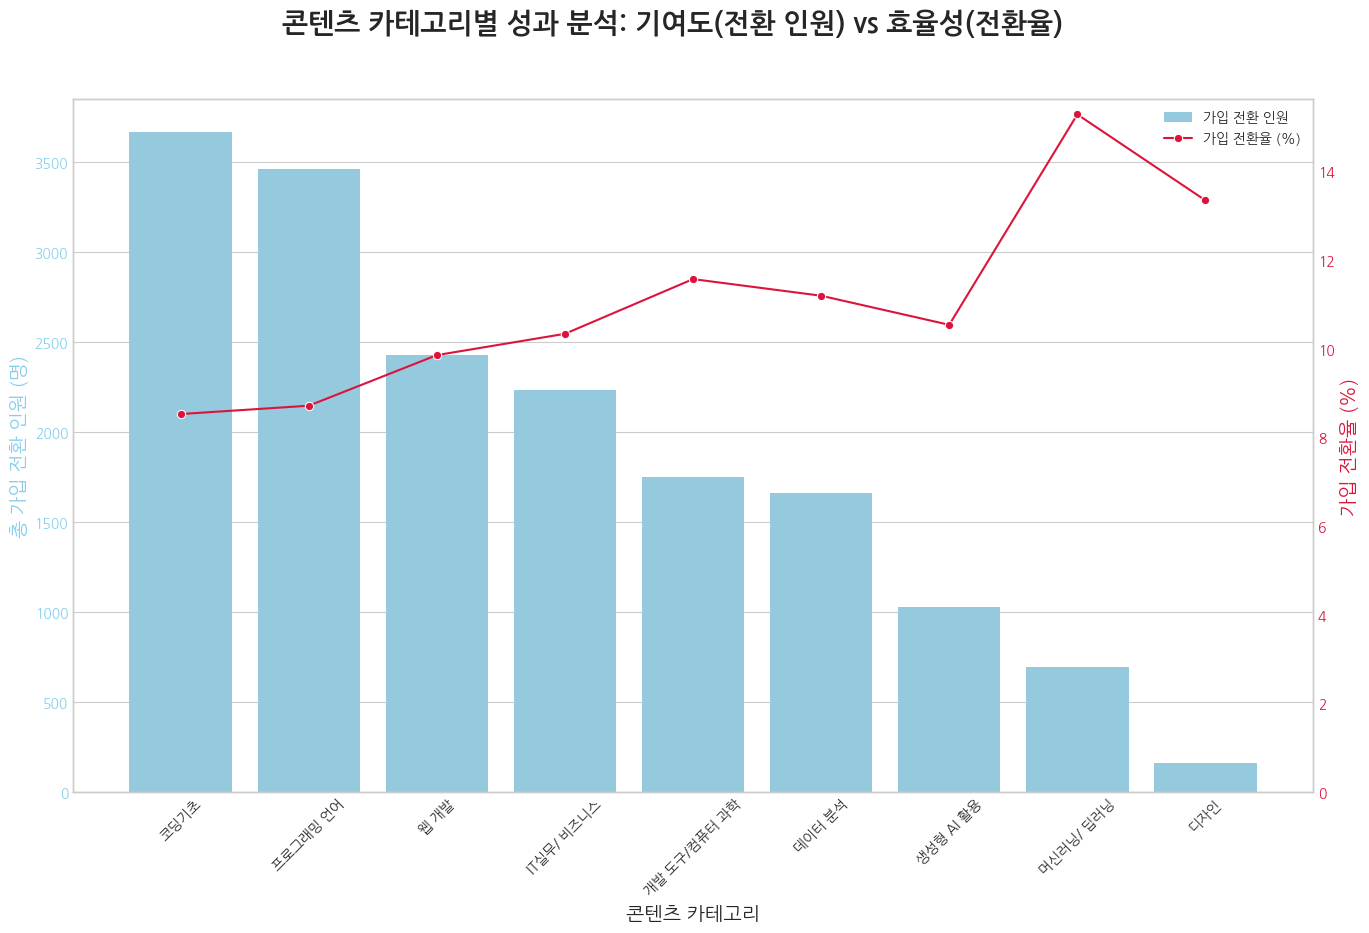

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------- [ÏàòÏ†ï] 4Îã®Í≥Ñ: ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Ïû¨Ï†ïÎ†¨ --------------------
# [ÌïµÏã¨] 'Ï¥ù Í∞ÄÏûÖ Ï†ÑÌôò Ïù∏Ïõê'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨, Í∞ÄÏû• Í∏∞Ïó¨ÎèÑÍ∞Ä ÎÜíÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨Î∂ÄÌÑ∞ Î≥¥Ïó¨Ï§çÎãàÎã§.
plot_df = category_conversion_df.sort_values(by='converted_sessions', ascending=False)

print("\n\n--- [ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥º] Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∏∞Ïó¨ÎèÑ(Ï†ÑÌôò Ïù∏Ïõê) Î∞è Ìö®Ïú®ÏÑ±(Ï†ÑÌôòÏú®) ---")
print(plot_df.round(2))


# -------------------- [ÌïµÏã¨ ÏàòÏ†ï] 5Îã®Í≥Ñ: Ïù¥Ï§ë Ï∂ï Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî --------------------
print("\n‚úÖ 5Îã®Í≥Ñ: ÏµúÏ¢Ö Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ïù¥Ï§ë Ï∂ï Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§...")
plt.rc('font', family='NanumGothic')

# 1. Ï∫îÎ≤ÑÏä§ÏôÄ Ï≤´ Î≤àÏß∏ YÏ∂ï(ax1, ÎßâÎåÄÍ∑∏ÎûòÌîÑÏö©)ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
fig, ax1 = plt.subplots(figsize=(16, 9))
fig.suptitle('ÏΩòÌÖêÏ∏† Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÑ±Í≥º Î∂ÑÏÑù: Í∏∞Ïó¨ÎèÑ(Ï†ÑÌôò Ïù∏Ïõê) vs Ìö®Ïú®ÏÑ±(Ï†ÑÌôòÏú®)', fontsize=20, weight='bold')

# 2. Ï≤´ Î≤àÏß∏ YÏ∂ï(ax1)Ïóê 'Ï¥ù Í∞ÄÏûÖ Ï†ÑÌôò Ïù∏Ïõê' ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
color_bar = 'skyblue'
sns.barplot(data=plot_df, x=plot_df.index, y='converted_sessions',
            ax=ax1, color=color_bar, label='Í∞ÄÏûÖ Ï†ÑÌôò Ïù∏Ïõê')
ax1.set_xlabel('ÏΩòÌÖêÏ∏† Ïπ¥ÌÖåÍ≥†Î¶¨', fontsize=14)
ax1.set_ylabel('Ï¥ù Í∞ÄÏûÖ Ï†ÑÌôò Ïù∏Ïõê (Î™Ö)', color=color_bar, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.tick_params(axis='x', rotation=45) # xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ

# 3. Îëê Î≤àÏß∏ YÏ∂ï(ax2, ÏÑ† Í∑∏ÎûòÌîÑÏö©)ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
ax2 = ax1.twinx()
color_line = 'crimson'
ax2.set_ylabel('Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)', color=color_line, fontsize=14)

# 4. Îëê Î≤àÏß∏ YÏ∂ï(ax2)Ïóê 'Í∞ÄÏûÖ Ï†ÑÌôòÏú®' ÏÑ† Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
sns.lineplot(data=plot_df, x=plot_df.index, y='conversion_rate(%)',
             ax=ax2, color=color_line, marker='o', sort=False, label='Í∞ÄÏûÖ Ï†ÑÌôòÏú® (%)')
ax2.tick_params(axis='y', labelcolor=color_line)

# yÏ∂ï Î≤îÏúÑÎ•º Ï°∞Ï†ïÌïòÏó¨ ÏÑ† Í∑∏ÎûòÌîÑÍ∞Ä Ïûò Î≥¥Ïù¥Í≤å Ìï©ÎãàÎã§.
ax2.set_ylim(bottom=0)

# 5. Î≤îÎ°Ä(Legend)Î•º ÌïòÎÇòÎ°ú Ìï©Ï≥êÏÑú ÍπîÎÅîÌïòÍ≤å ÌëúÏãúÌï©ÎãàÎã§.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
ax1.get_legend().remove() # ÏõêÎûòÏùò Î≤îÎ°ÄÎäî Ï†úÍ±∞

plt.grid(False) # Ïù¥Ï§ë Ï∂ï Ï∞®Ìä∏ÏóêÏÑúÎäî Í∑∏Î¶¨ÎìúÎ•º ÎÅÑÎäî Í≤ÉÏù¥ Îçî ÍπîÎÅîÌï©ÎãàÎã§.
plt.show()